# Predicting Customer Churn for Telco Systems  <a class="tocSkip">

## Notebook 2/4 - EDA of my Data  <a class="tocSkip">

by: __Neel Chudasama__

This notebook contains the steps I took to explore my data. Furthermore, I will plot the distribution of the data to support my findings and understanding.

__Notebook Contents__

1. [EDA and distributions](#eda)
1. [Numerical Columns](#num)
2. [Categorical Columns](#cat)
3. [Conclusions](#conc)

In [5]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
from matplotlib import style
import plotly.express as px
plt.rcParams["figure.dpi"] = 300 # to ensure that plots are not blurry

import capstone_utils
import joblib

In [6]:
from importlib import reload
reload(capstone_utils)

<module 'capstone_utils' from '/Users/neelc/Library/CloudStorage/OneDrive-Personal/Documents/Brainstation/Capstone/capstone_utils.py'>

In [7]:
#Loading the data from the pkl file 
telco_df = joblib.load('Data/telco_df.pkl')

In [8]:
telco_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   
7031              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7027              Yes               Mailed check          84.80       1990.50   
7028              Yes    Credit card (automatic)         103.20       7362.90   
7029              Yes           Electronic check          29.60        346.45   
7030              Yes               Mailed check          74.40        306.60   
7031              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7027      0  
7028      0  
7029      0  
7030      1  
7031      0  

[7032 rows x 21 columns]

<a id='eda'></a>
## EDA and distributions 

Given that I have a large number of columns to work through and analyse, instead of going through each individual column and producing a visualisation. I have chosen to split the columns into two: categorical columns and numerical columns. Then automate the method for plotting the visualisations for both. This will speed up the process and help provide me with a high level understanding of the data for each column. 

Many of the columns in my dataframe are currently categorical and will be converted to binary columns in Notebook 3 - Preprocessing. For now, I will just conduct analysis on the dataframe in its current form.

In [9]:
num_col_list = list(telco_df.select_dtypes("number").columns)
cat_col_list = list(telco_df.select_dtypes("object").columns)

### Distribution: Churn

Before exploring both the categorical and numerical columns, I first want to explore the churn data column. Given this is the target column which I will be predicting whilst conducting machine learning techniques. 

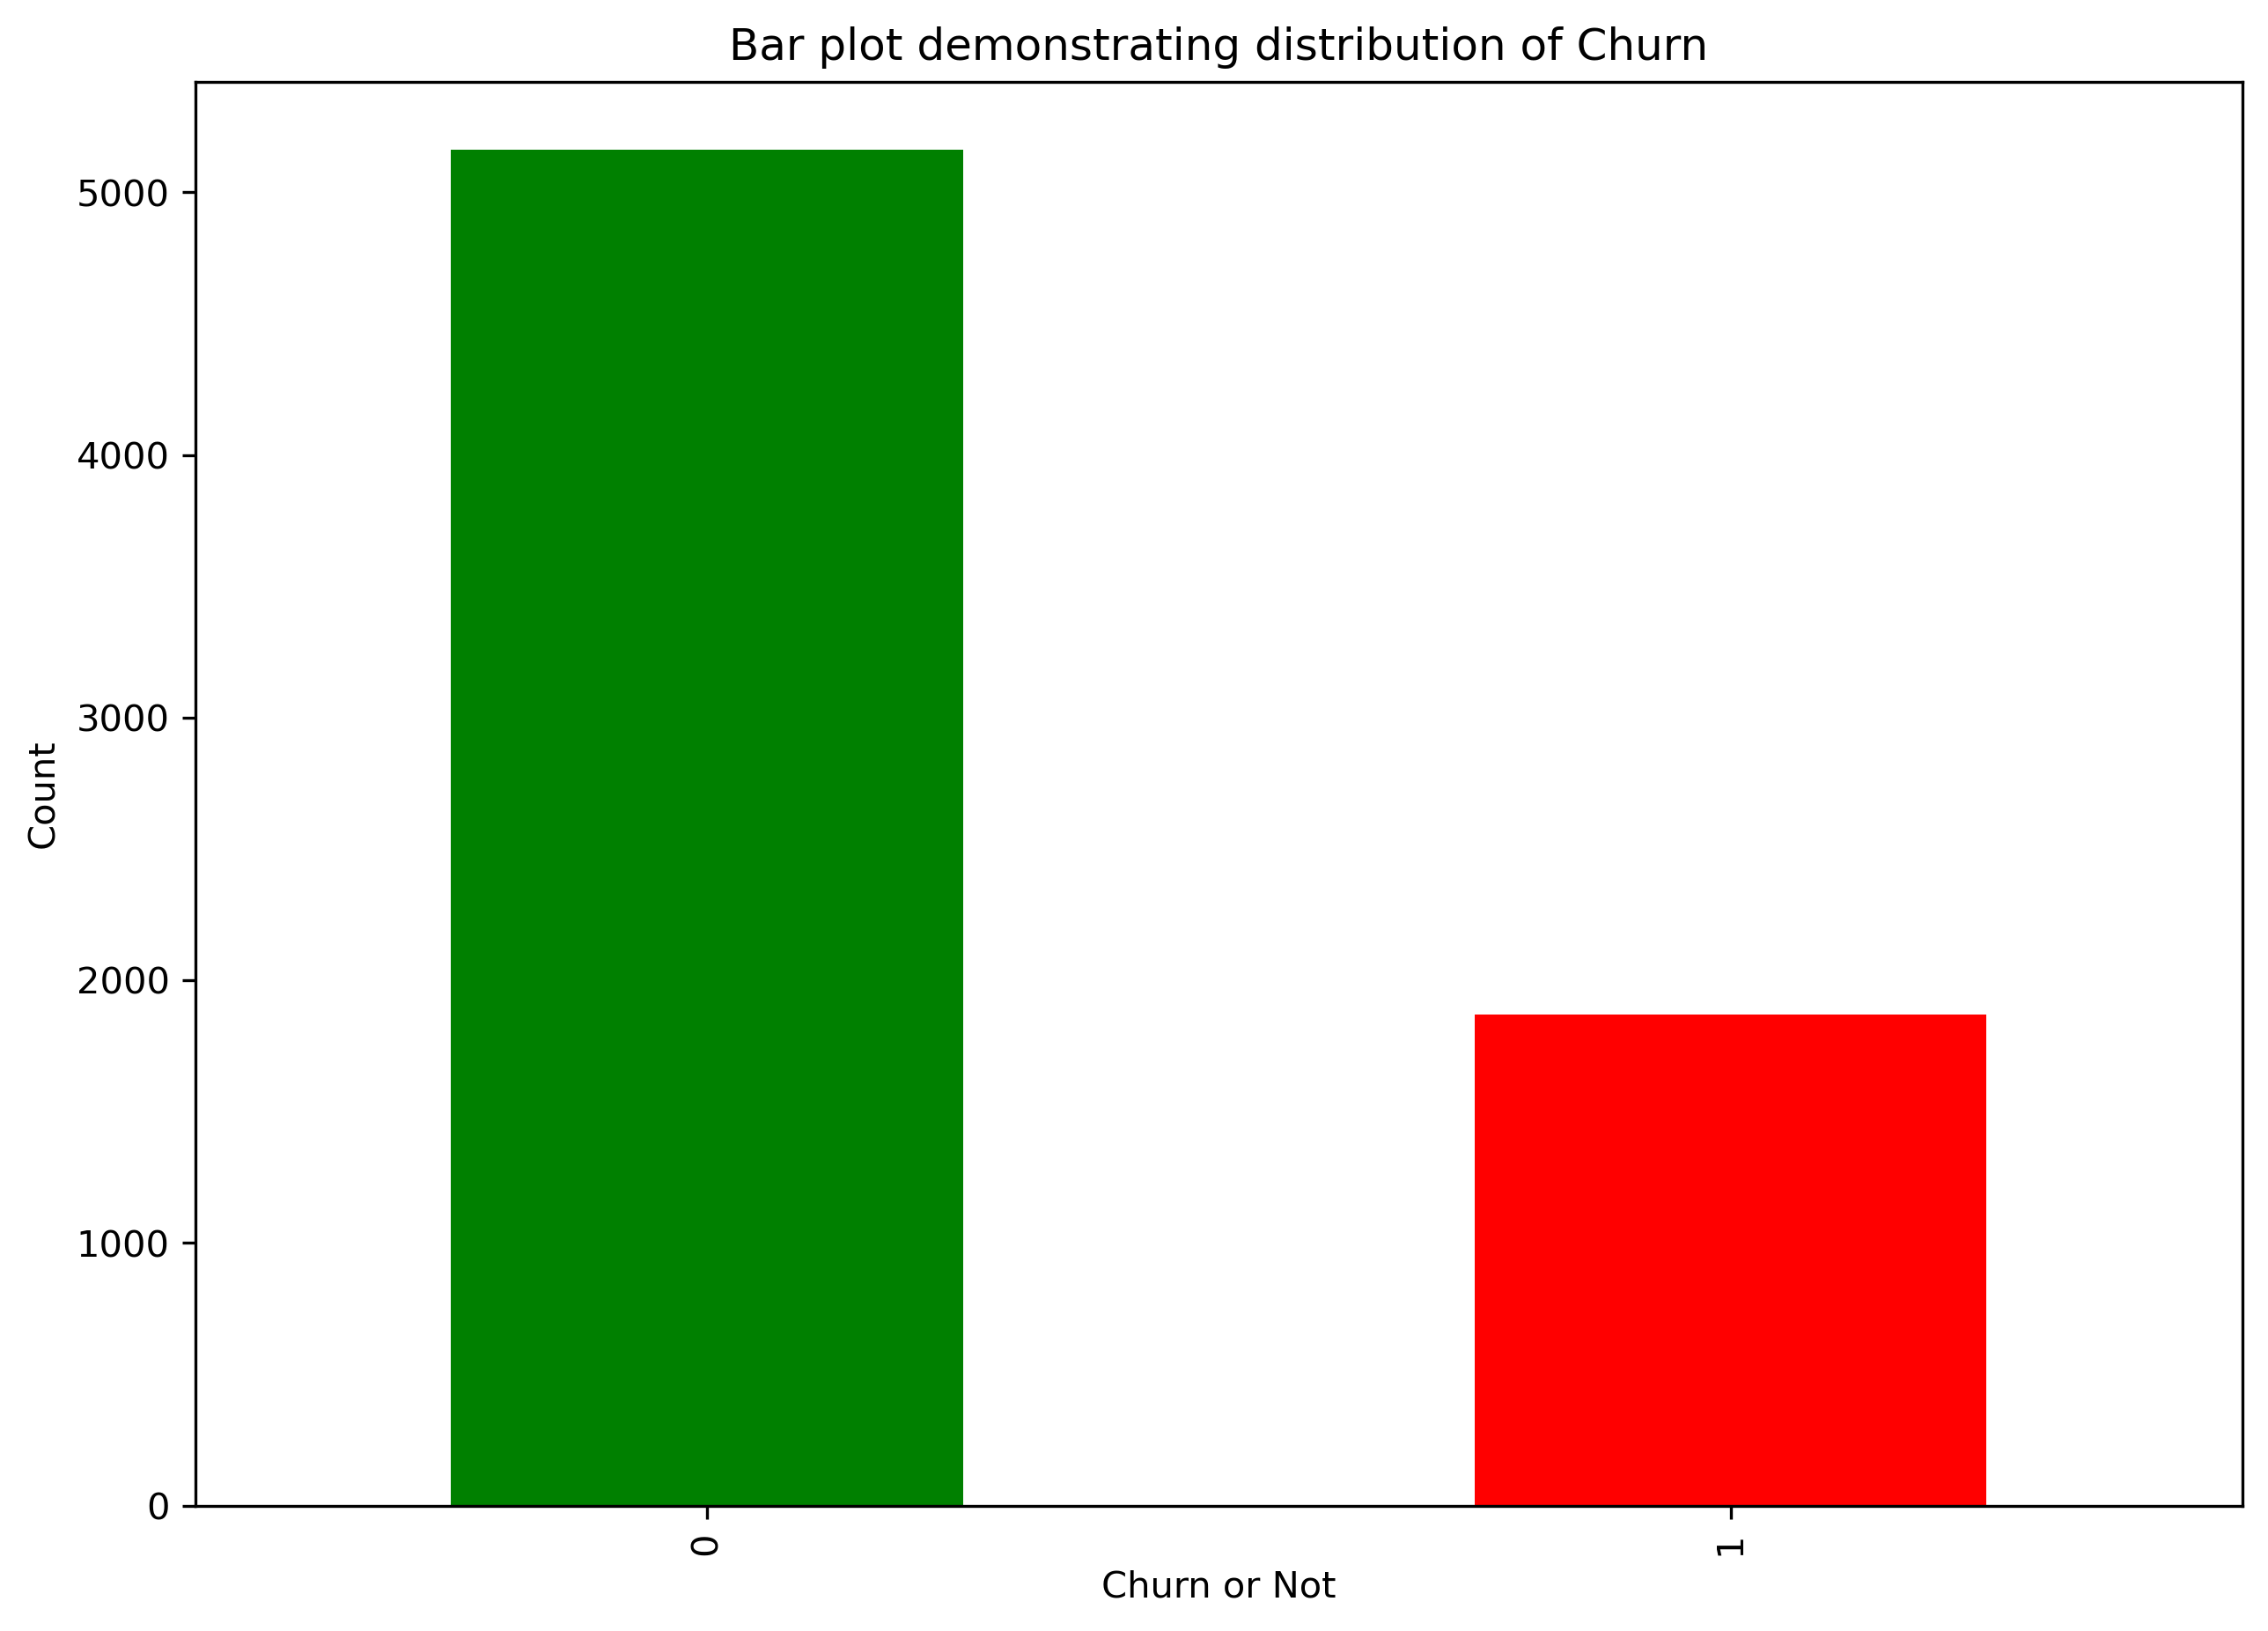

In [10]:
plt.figure(figsize = (10,7))
telco_df['Churn'].value_counts().plot(kind = "bar", color = ["green","red"])
plt.title("Bar plot demonstrating distribution of Churn")
plt.xlabel("Churn or Not")
plt.ylabel("Count")
plt.show()

From the bar plot above, the bar plot demonstrates the churn in Telco. A higher proportion of customers have not churned which is a good but it is determining why the other proportion of cutomers did churn. 27% of customers in the dataframe churned, this is the minimal base value that is expected of my models to correctly classify whether a customer churned or not. 

The bar plot also demonstrates a class imbalance in the data, models will have an easier time predicting for when customers don't churn - 0, compared with those who do - 1. This class imbalance will have to be accounted for when conducting machine learning models also should be noted when looking at distribution of customer who churn/don't churn throughout this notebook

<a id='num'></a>
## Numerical Columns 

Before I conduct analysis on the columns I want to look at the correlation of the columns. The goal of this is to determine if there is any colinearity between the columns in the dataframe as this will pose problems in the future when I start the modelling process.

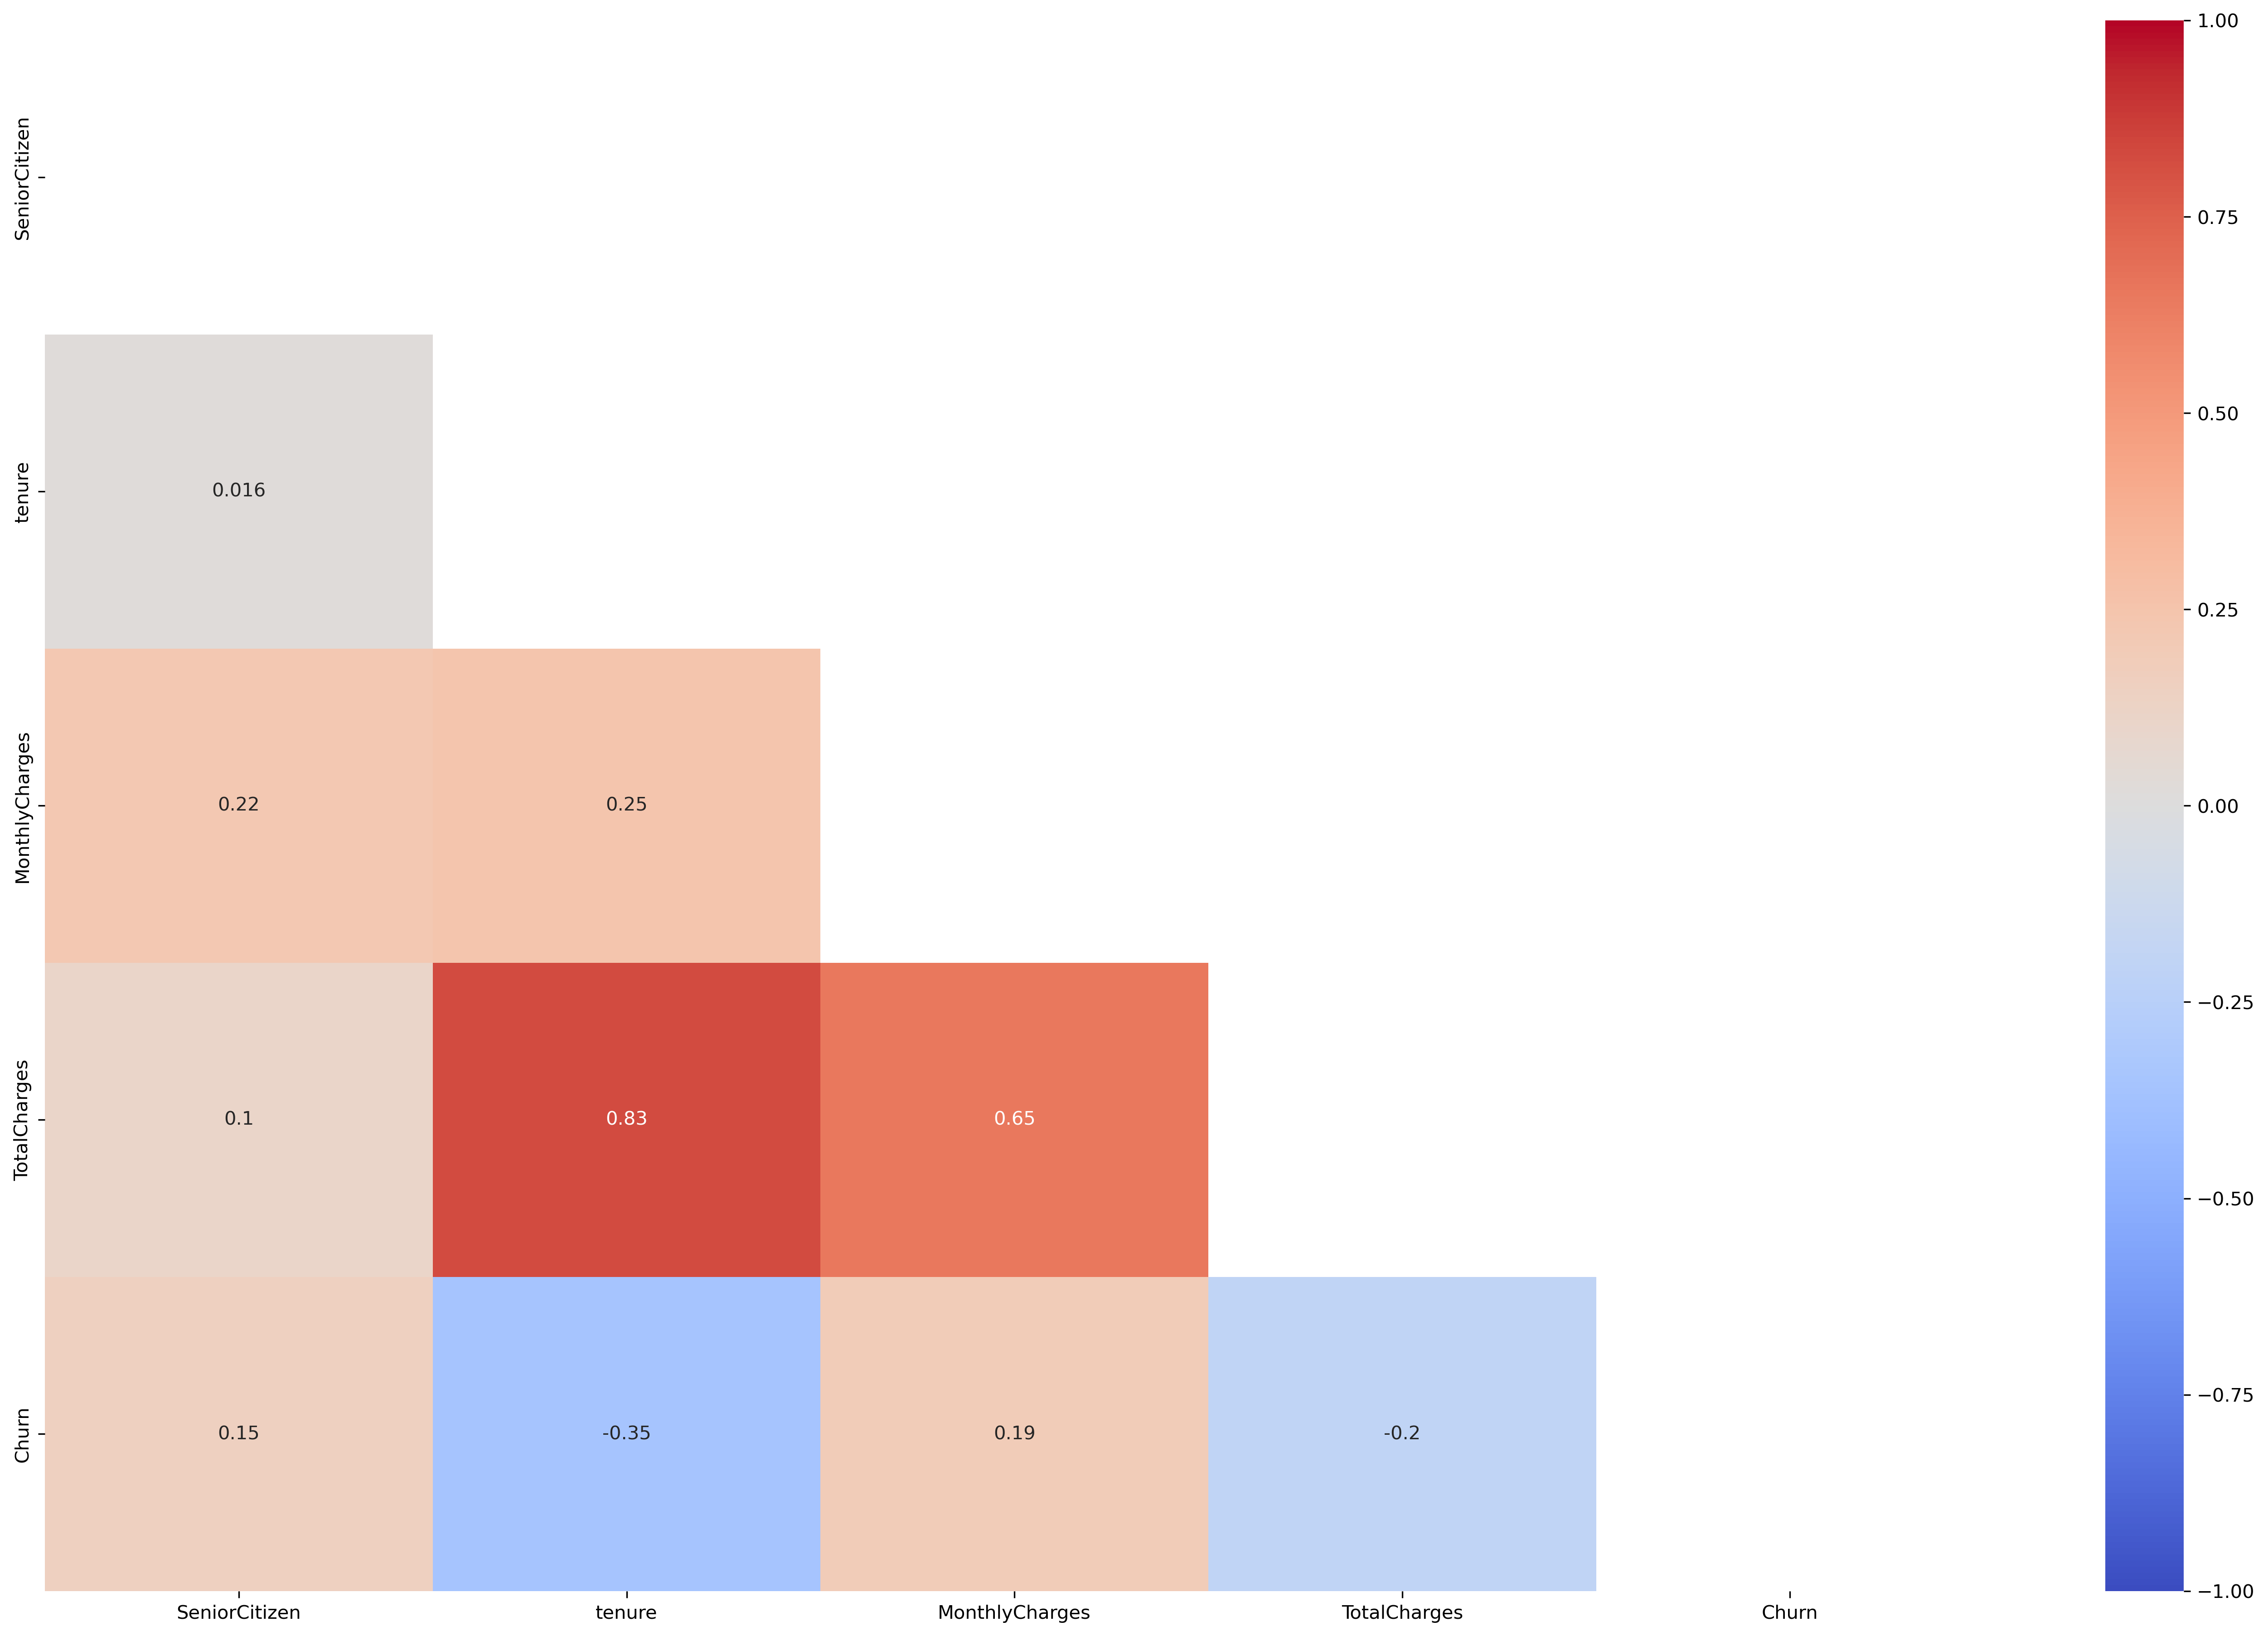

In [11]:
capstone_utils.heat_map(telco_df)

Looking at the plot above of the correlation of the numerical columns, there seems to be some colinearity between the tenure and the TotalCharges column, also, the MonthlyCharges and TotalCharges column. As discovered in Notebook 1 - Loading and Cleaning Data, the value of the TotalCharges column is directly impacted by the value of the tenure and MonthyCharges. This will pose some problems during the modelling process and will be explored further in Notebook 3 - Preprocessing. 

However, it should be noted that there is an inverse correlation between the tenure and the Churn column which would be expected. The longer you stay with a company the less chance you have of leaving them and in the case of Telco that has been seen to be true, but I did expect the correlation to be stronger than 0.35. 

Again, I would expected there to be a larger correlation between TotalCharges and Churn. However, it is very interesting to see that the correlation is negative - meaning that when TotalCharges is high the churn is low. This could be due to the fact that customers who stay with the company for a long time have a very high Total Charges meaning they will not likely churn. Also, the fact that customers who have high Total Charges could imply that they pay for many services provided by Telco and they are happy with what they have. 

Finally, the correlation between MonthlyCharges and SeniorCitizen is very interesting. This implies that customers who are above the age of 65 also have high monthly charge bills. This could be for a multitude of reasons - these specific customers could have paid for many services as they didn't want to have to go somewhere else to get it. Or due to technical illiteracy stopping them from understanding in full what they are paying for 

These correlation will be kept in mind during modelling stage. 

Now I can explore the data held in the numerical columns:

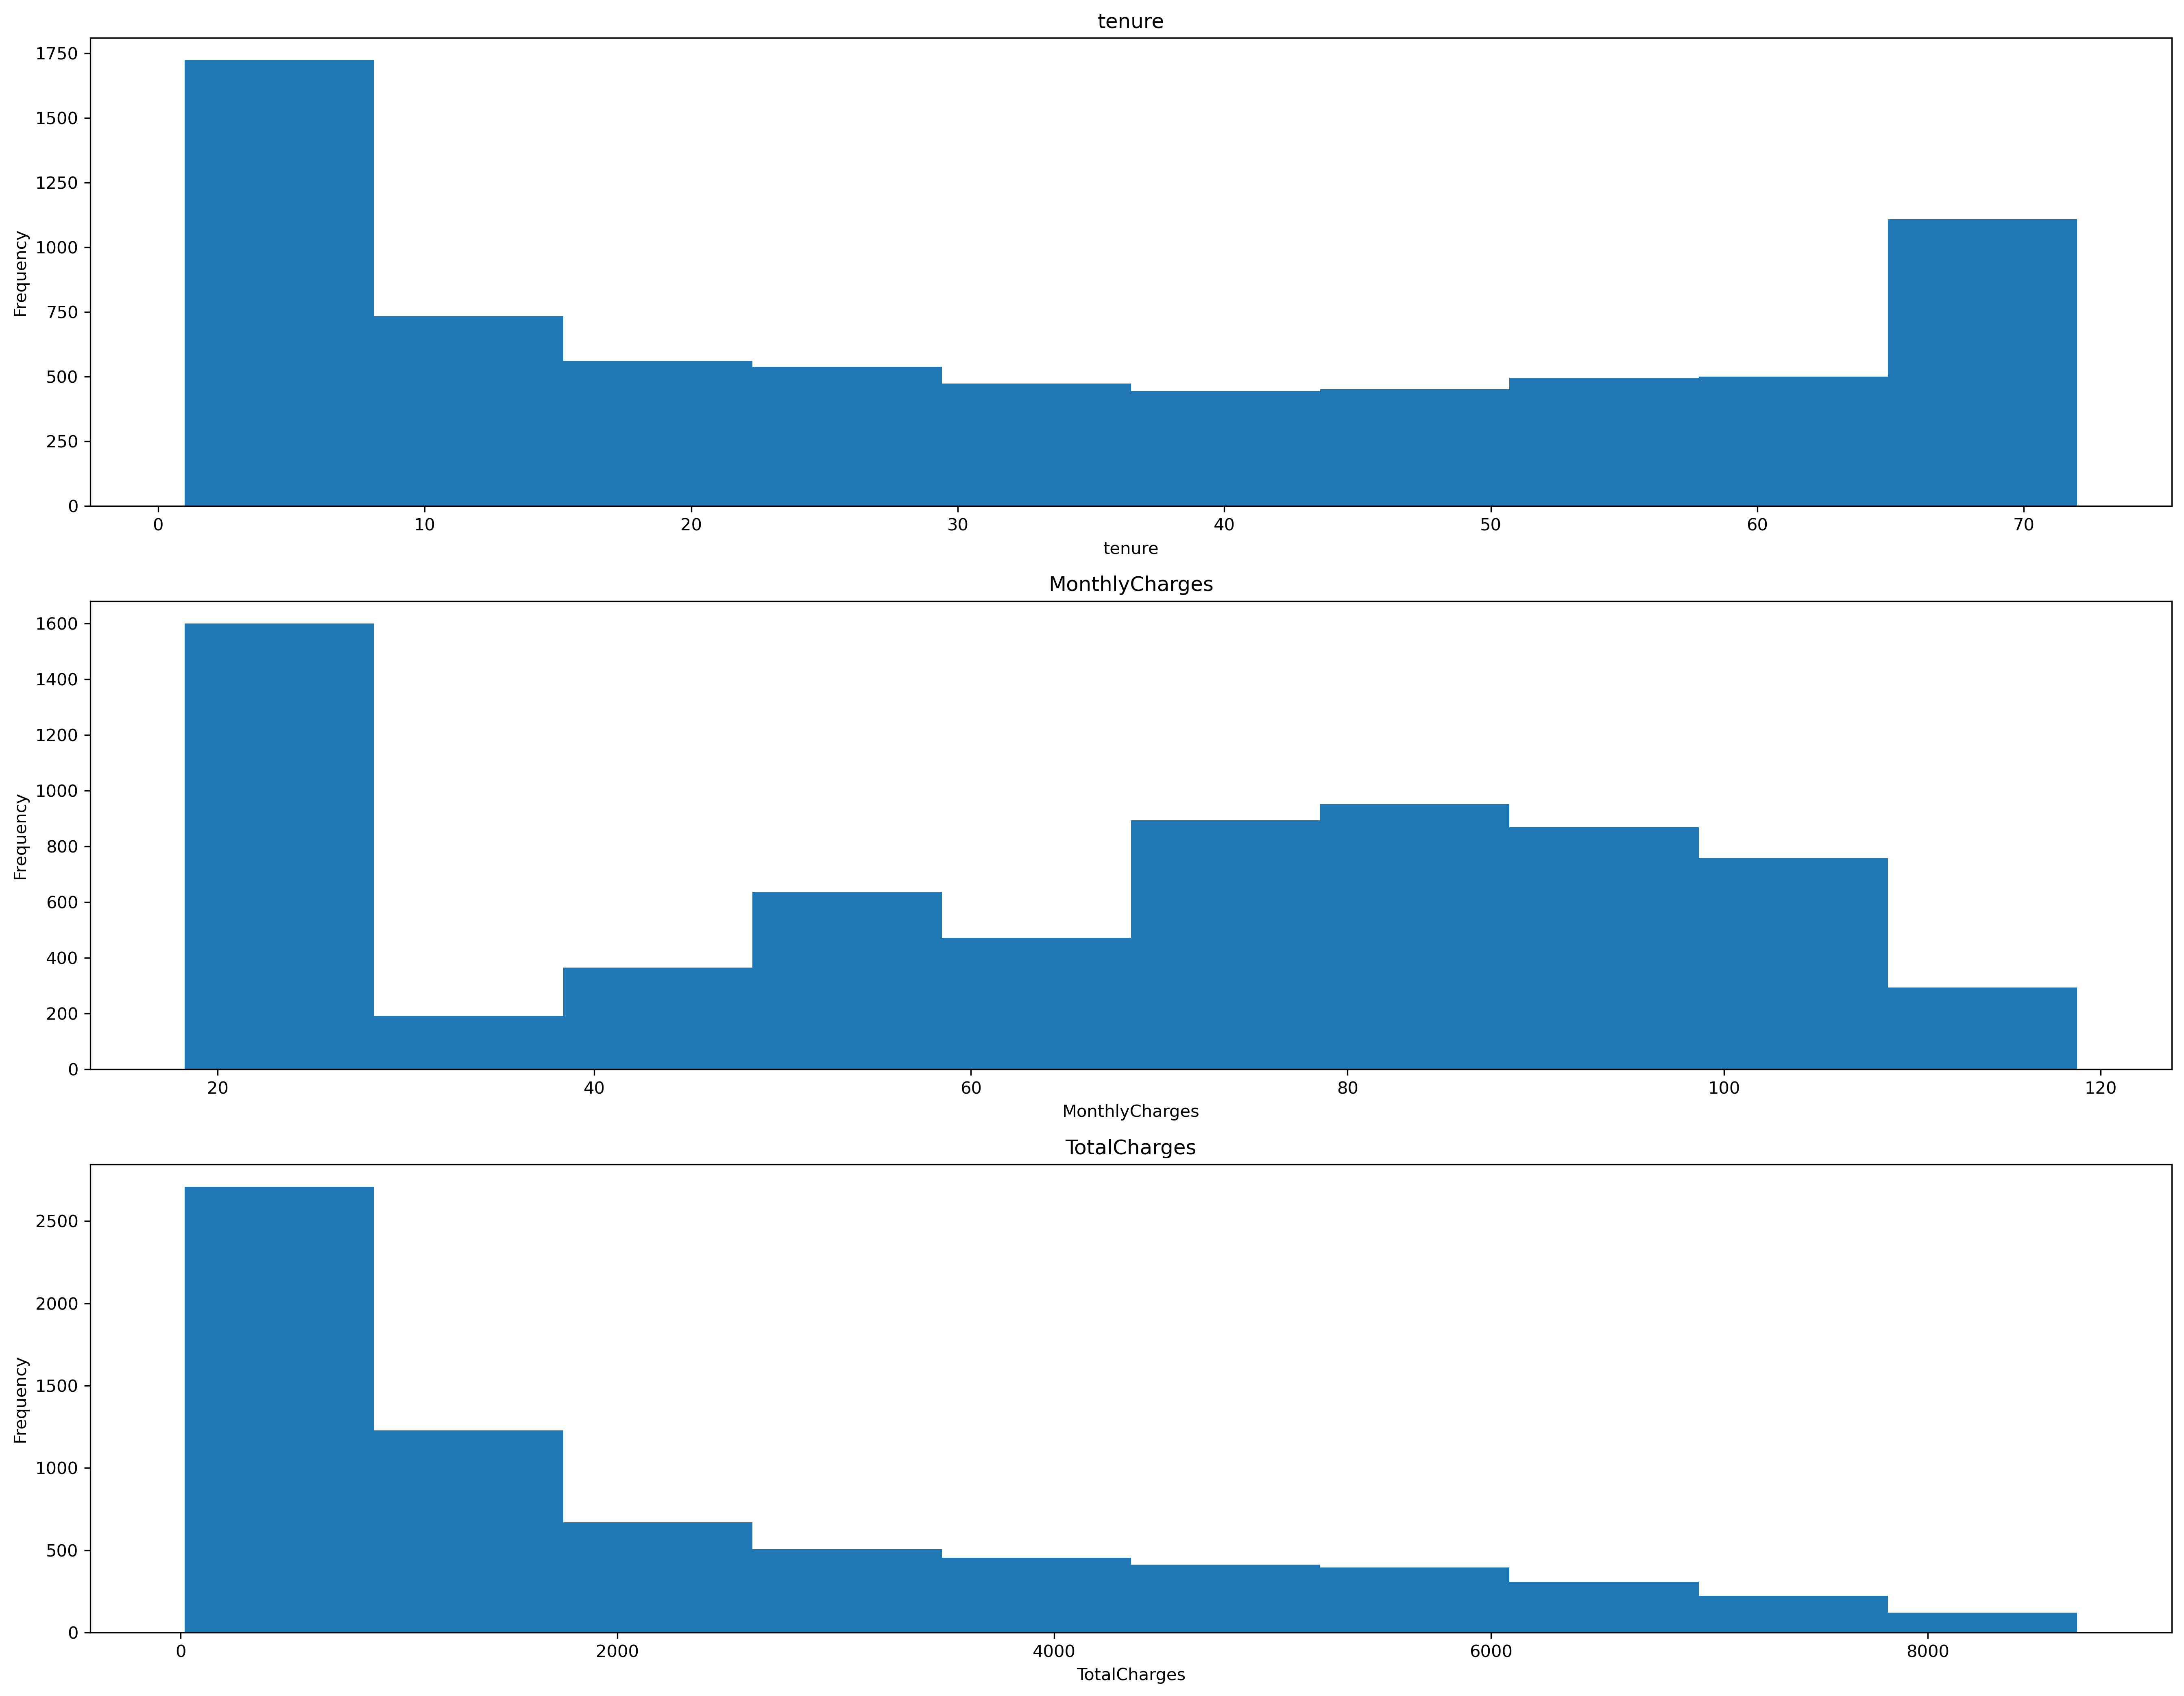

In [12]:
list1 = [ elem for elem in num_col_list if elem != 'SeniorCitizen']
list1 = [ elem for elem in list1 if elem != 'Churn']
capstone_utils.numerical_subplots(telco_df,list1,3,1)

Looking at the three histogram plots above, there are some expected and unexpected distributions. 

Firstly, the tenure column seems to have two peaks - one at the low end and one at the top end. This would imply that there are a large amount of customers who have been with Telco for a small and large amount of time. The contrast in tenure length is interesting because I would expect there to be a peak at the start as there will be a large number of people who joined the company and then would have churned within the first few months causing an initial peak. However, the second peak at the other end would imply that Telco has been able to provide an incredible experience to these customers retaining them for an incredibly long time. But this data could be dependent on when the data was recorded and inputted into the dataframe.

Secondly, there is a massive initial peak at the start for MonthylCharges which is also quite interesting. Further analysis will need to be conducted into why this is the case. However, my assumption is that there may have been a deal or promotion price promoted which attracted a large number of customers at a lower price which led to a massive bulk of customers paying the same low price. In addition, without the initial peak the distribution of monthly charge seems to be following a normal distribution. 

Lastly, the Total Charges column is a distribution I expected after analysing the plot of the monthly charges column. With a large number of people paying a low price this will correlate to a low total amount that they would have to pay hence the large inital peak. The drop in values of the total charge is expected as less and less people will want to pay a higher amount than needed.

### Distribution: Tenure

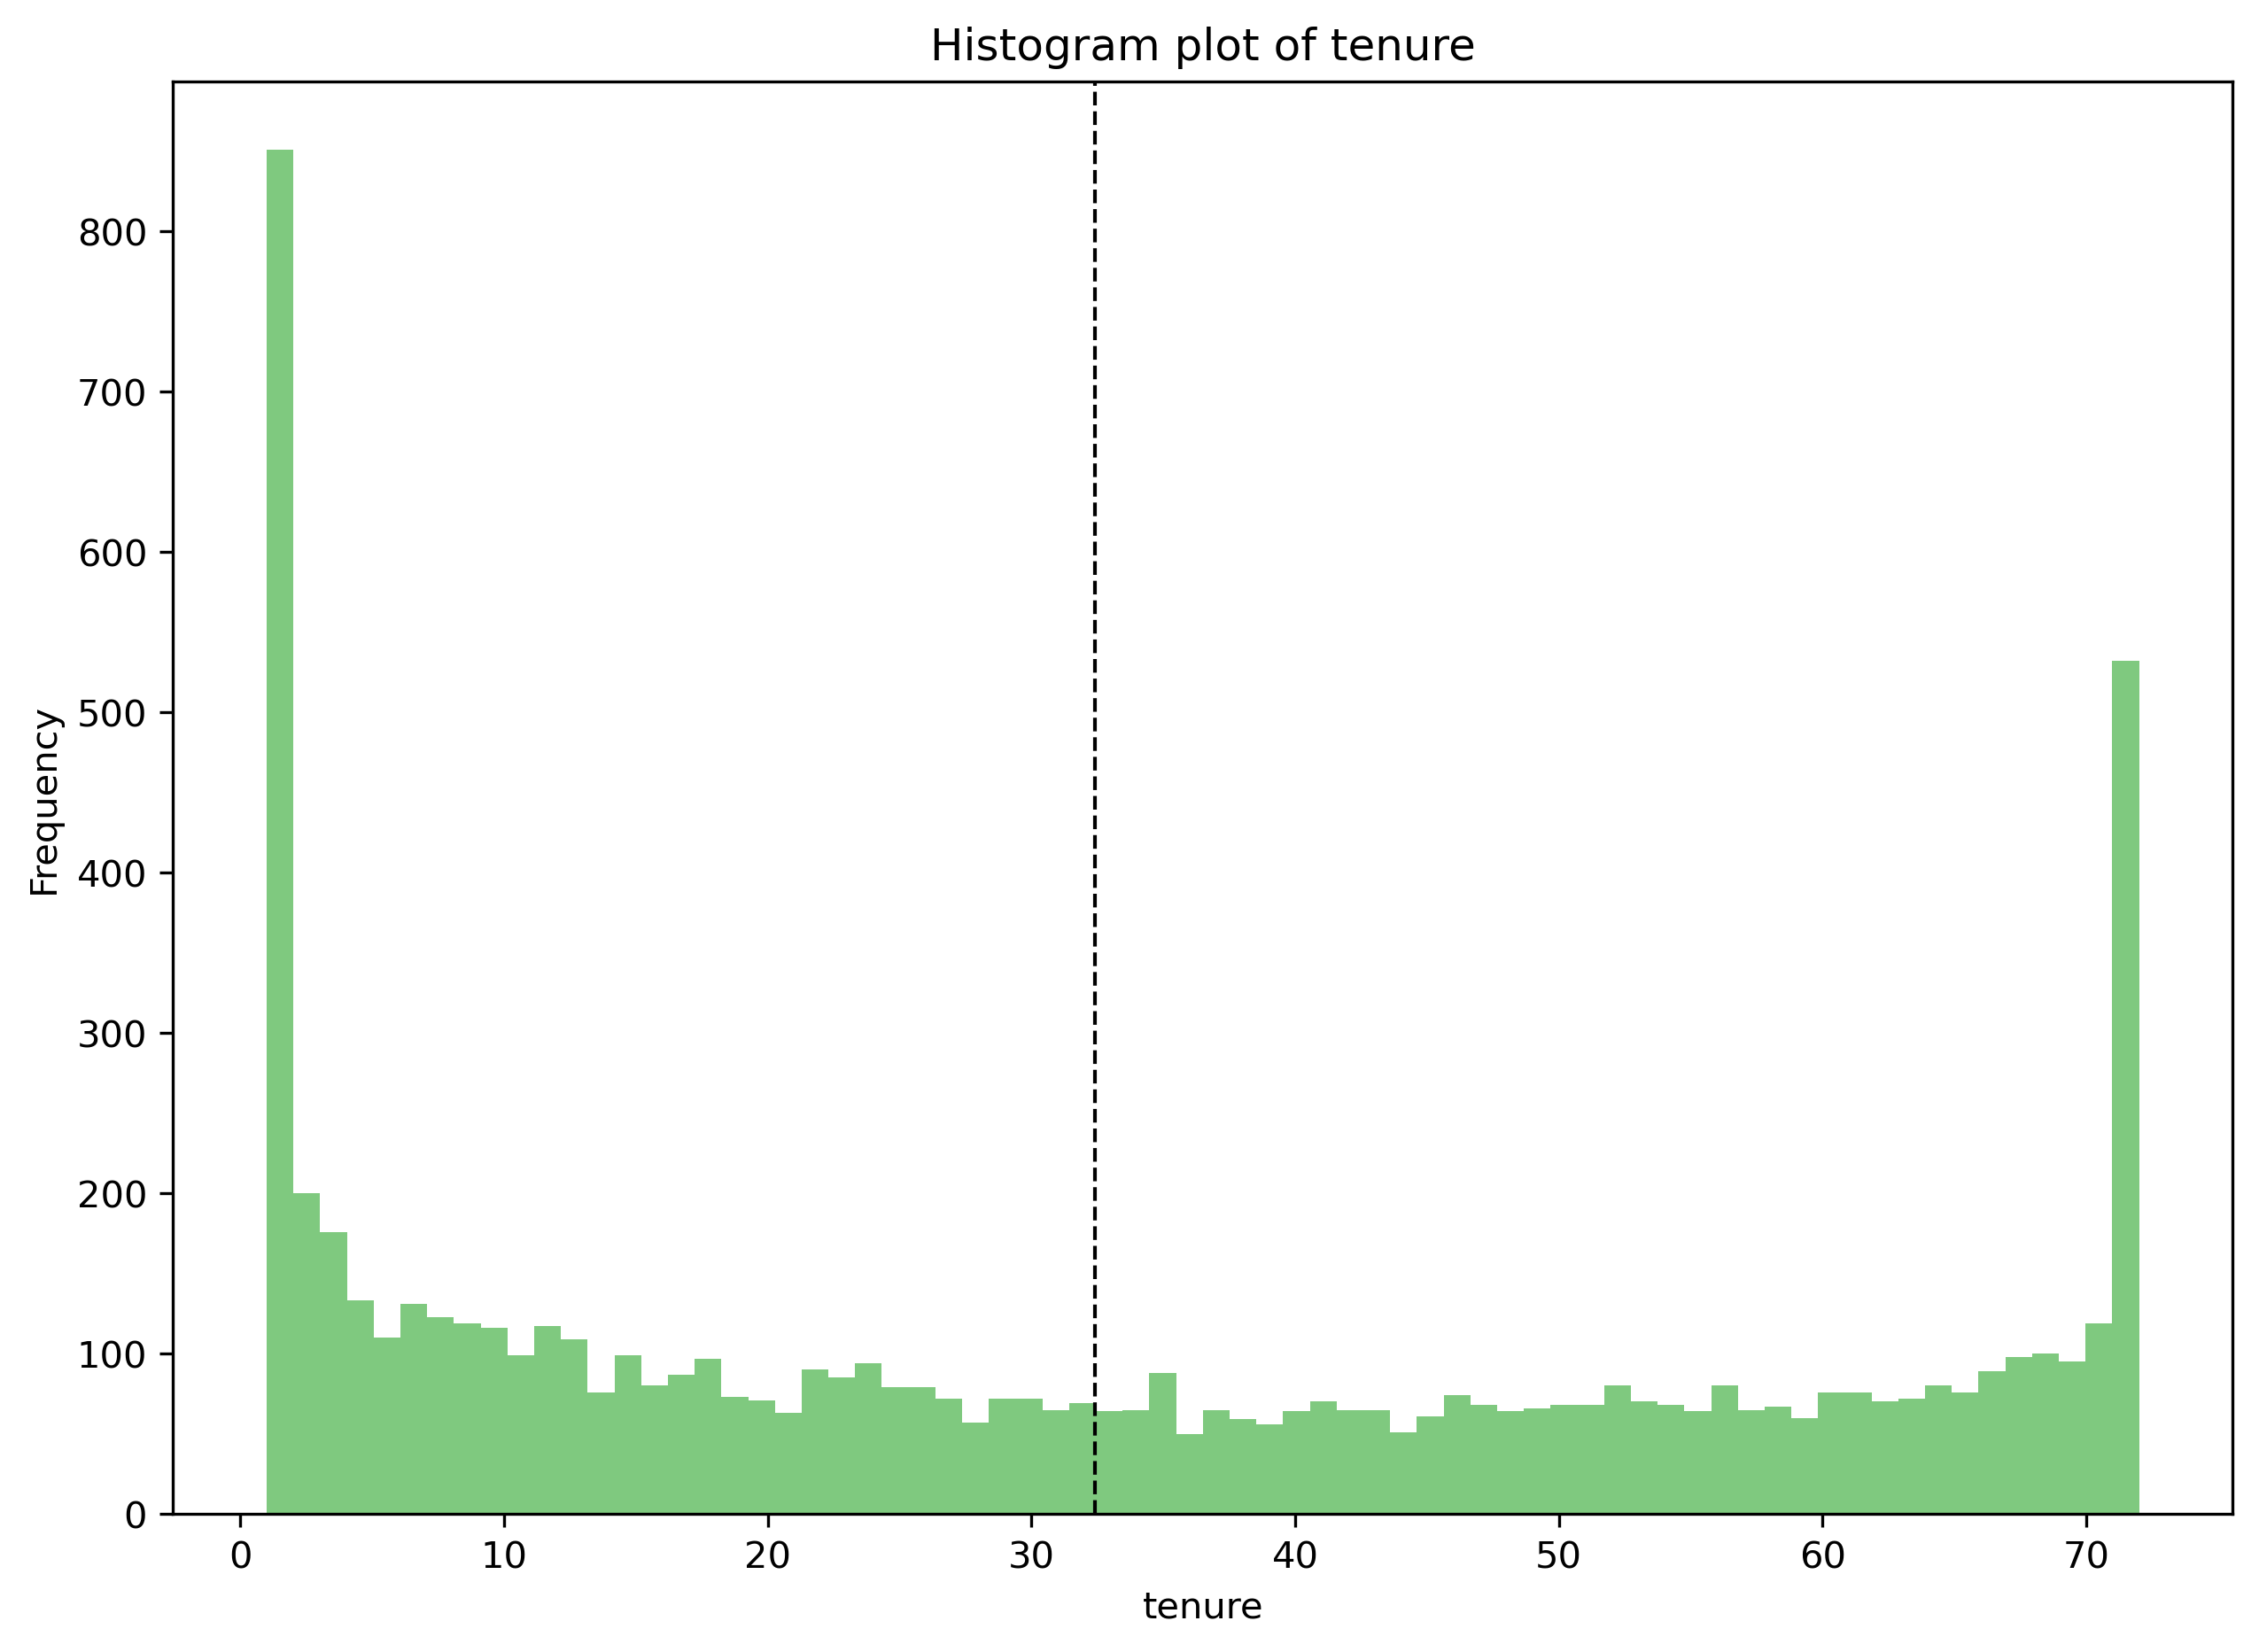

In [13]:
capstone_utils.df_histogram(telco_df,'tenure',bins=70)

Looking at the histogram plot above there are two extremes to the tenure data. There is high peak on the left and I assume that a large amount of people in this peak churned. Furthermore, there is a large peak on the right side - these customers have been with the company for a very long time and it will be incredibly hard for these customers to churn. The dashed line represents the mean and it seems to be around three years which is interesting. This could mean that Telco provide an auto-renewal service to their contracts causing the contract to run past the two year mark before people decide to cancel it.

In [14]:
capstone_utils.boxplot(telco_df,"Churn","tenure")

<Figure size 2700x4500 with 0 Axes>

In case, plotly does not render.

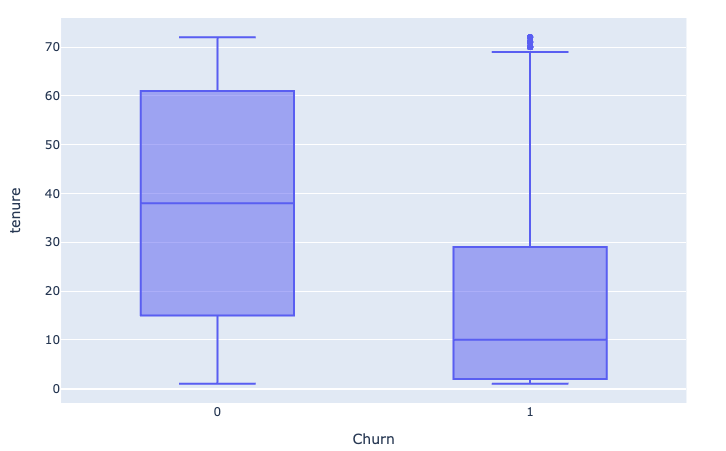

As expected those who churned stayed with the company for less time than those didn't. With 75% of people who churned staying with the company for 29 months or less. This is more than two years with the company which could imply that many of these customers had a two year contract and waited till their contract finished before churning. I will explore this. Furthermore, there are two ouitliers in the data where two customers spent 70 and 72 months respectively before churning - why they churned needs to be explored.

In [15]:
tenure_churn = telco_df[(telco_df['tenure']<29)&(telco_df['Churn']==1)].copy()

I have created a dataframe to explore the customers who churned and spent less than 29 months with the company to understand their behaviours. 

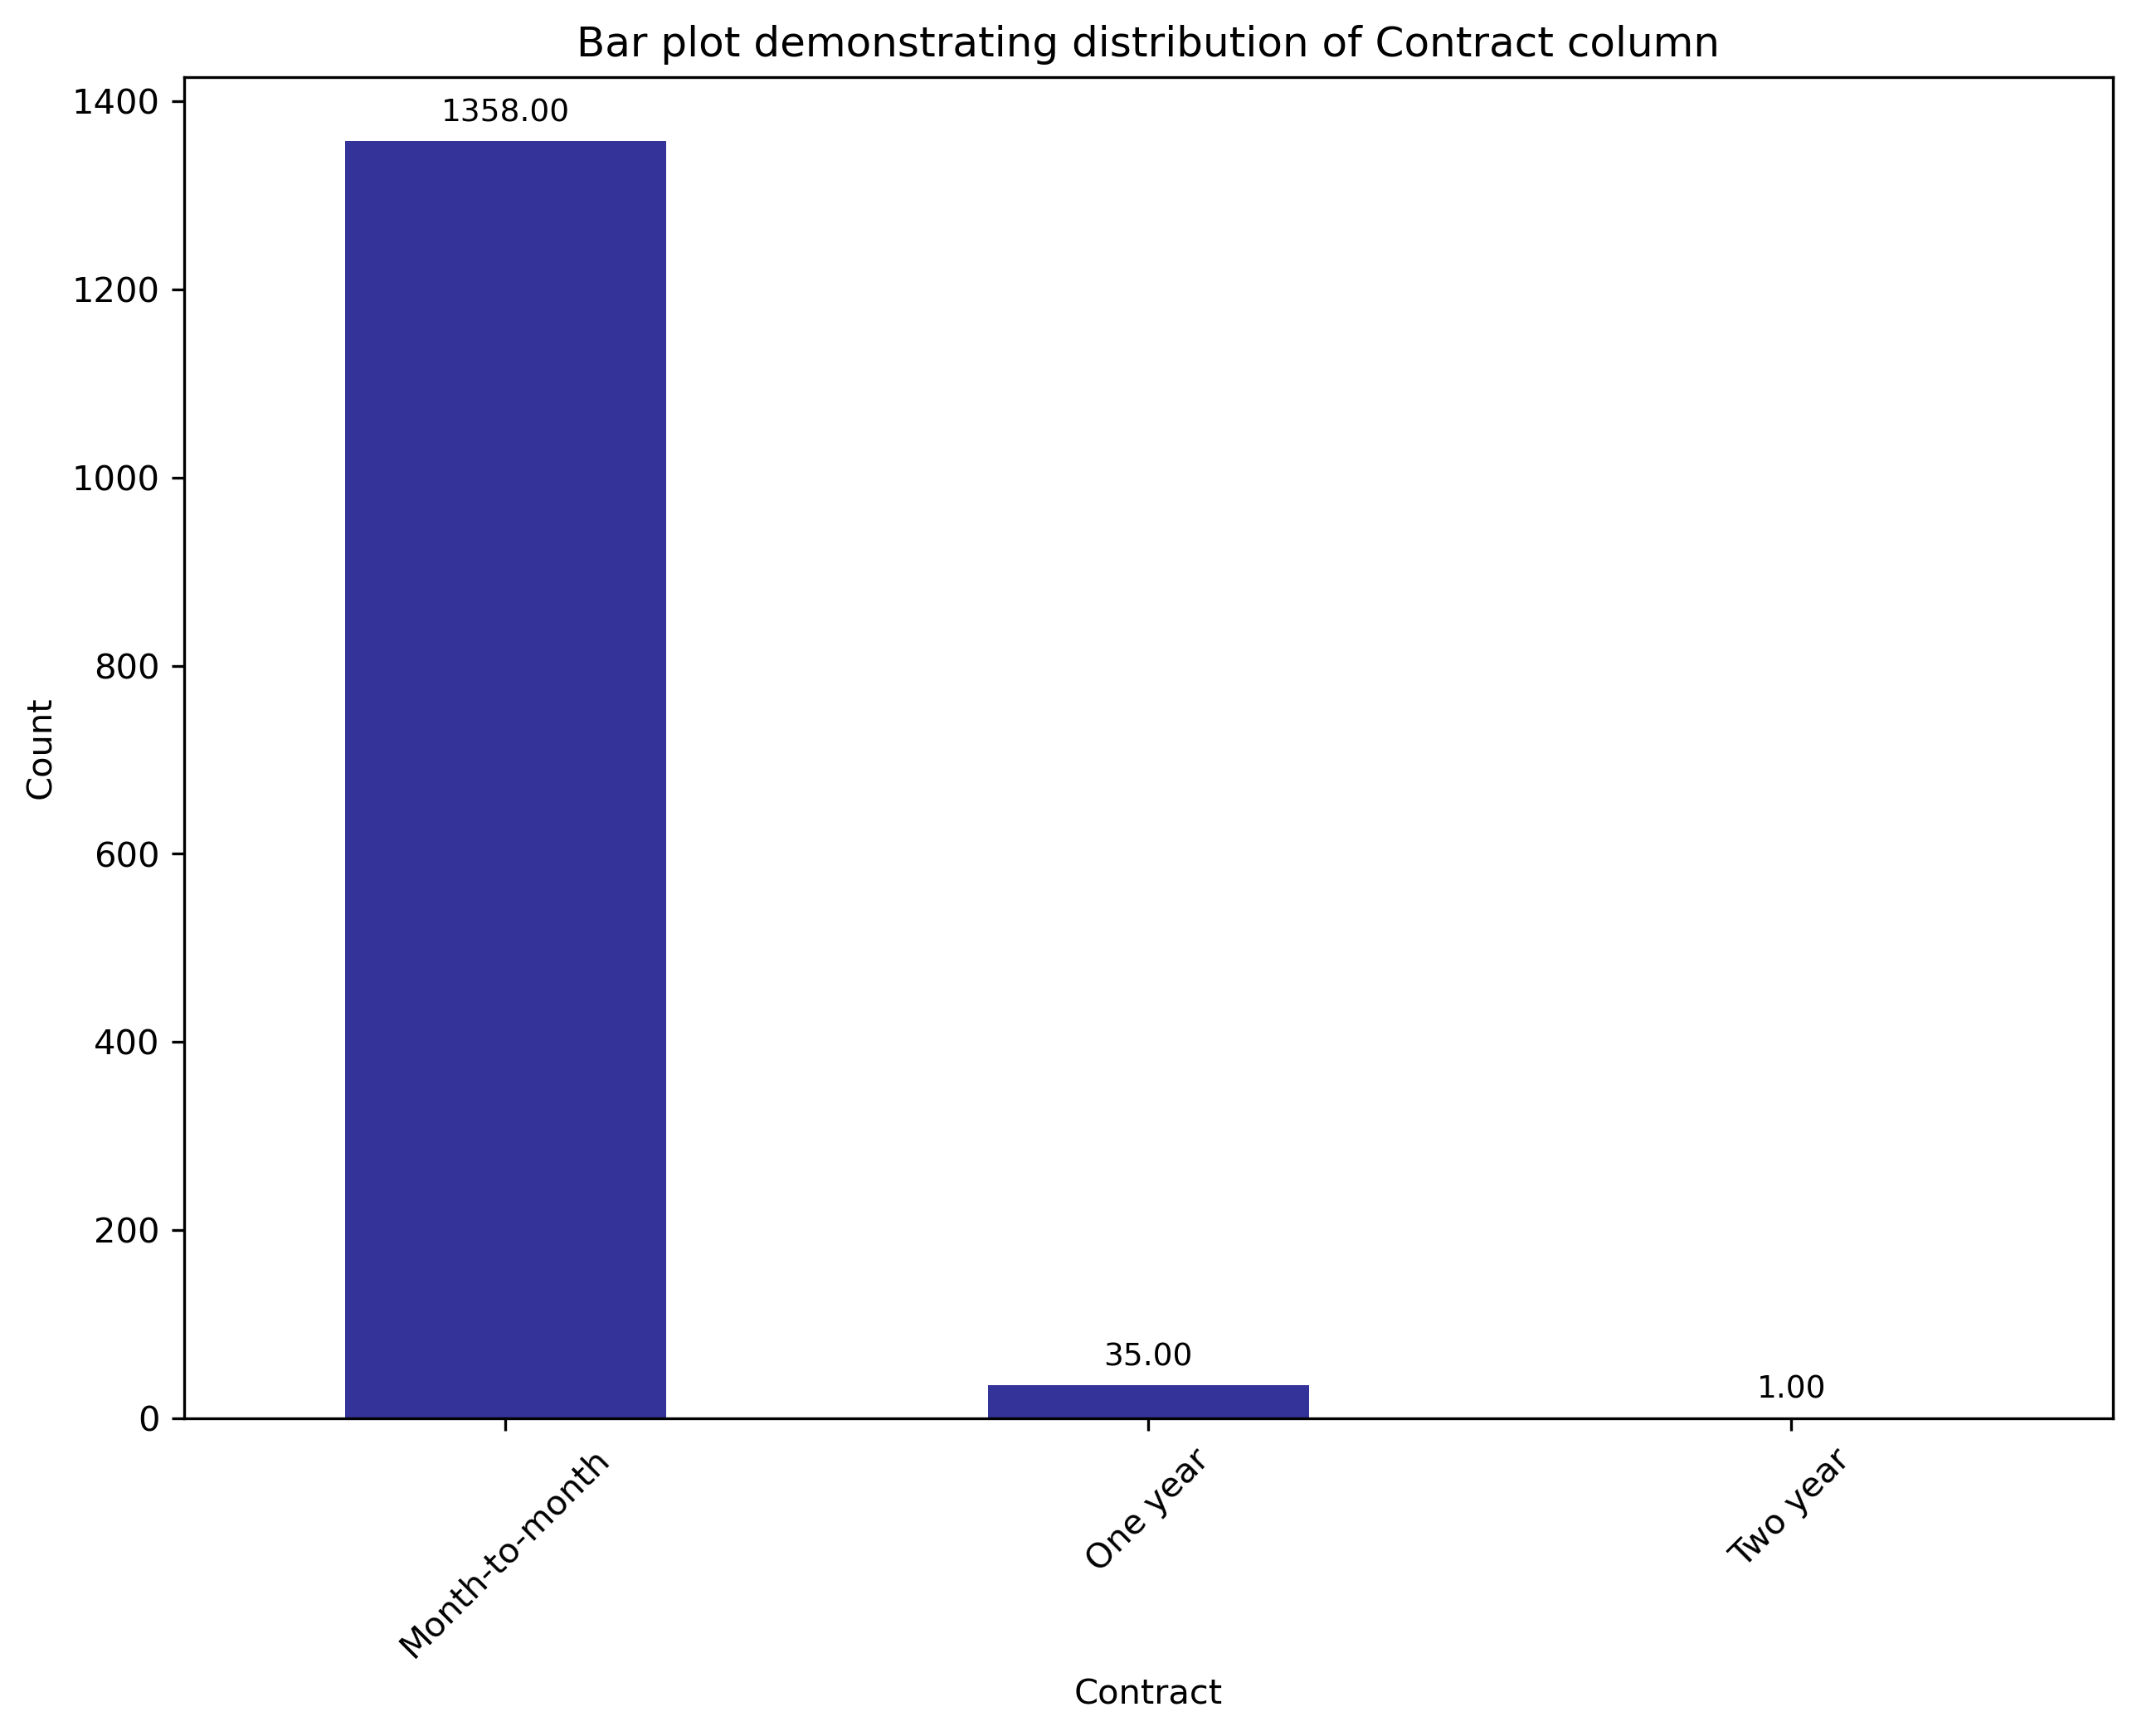

In [16]:
capstone_utils.bar_plot_count(tenure_churn,'Contract', 'terrain')

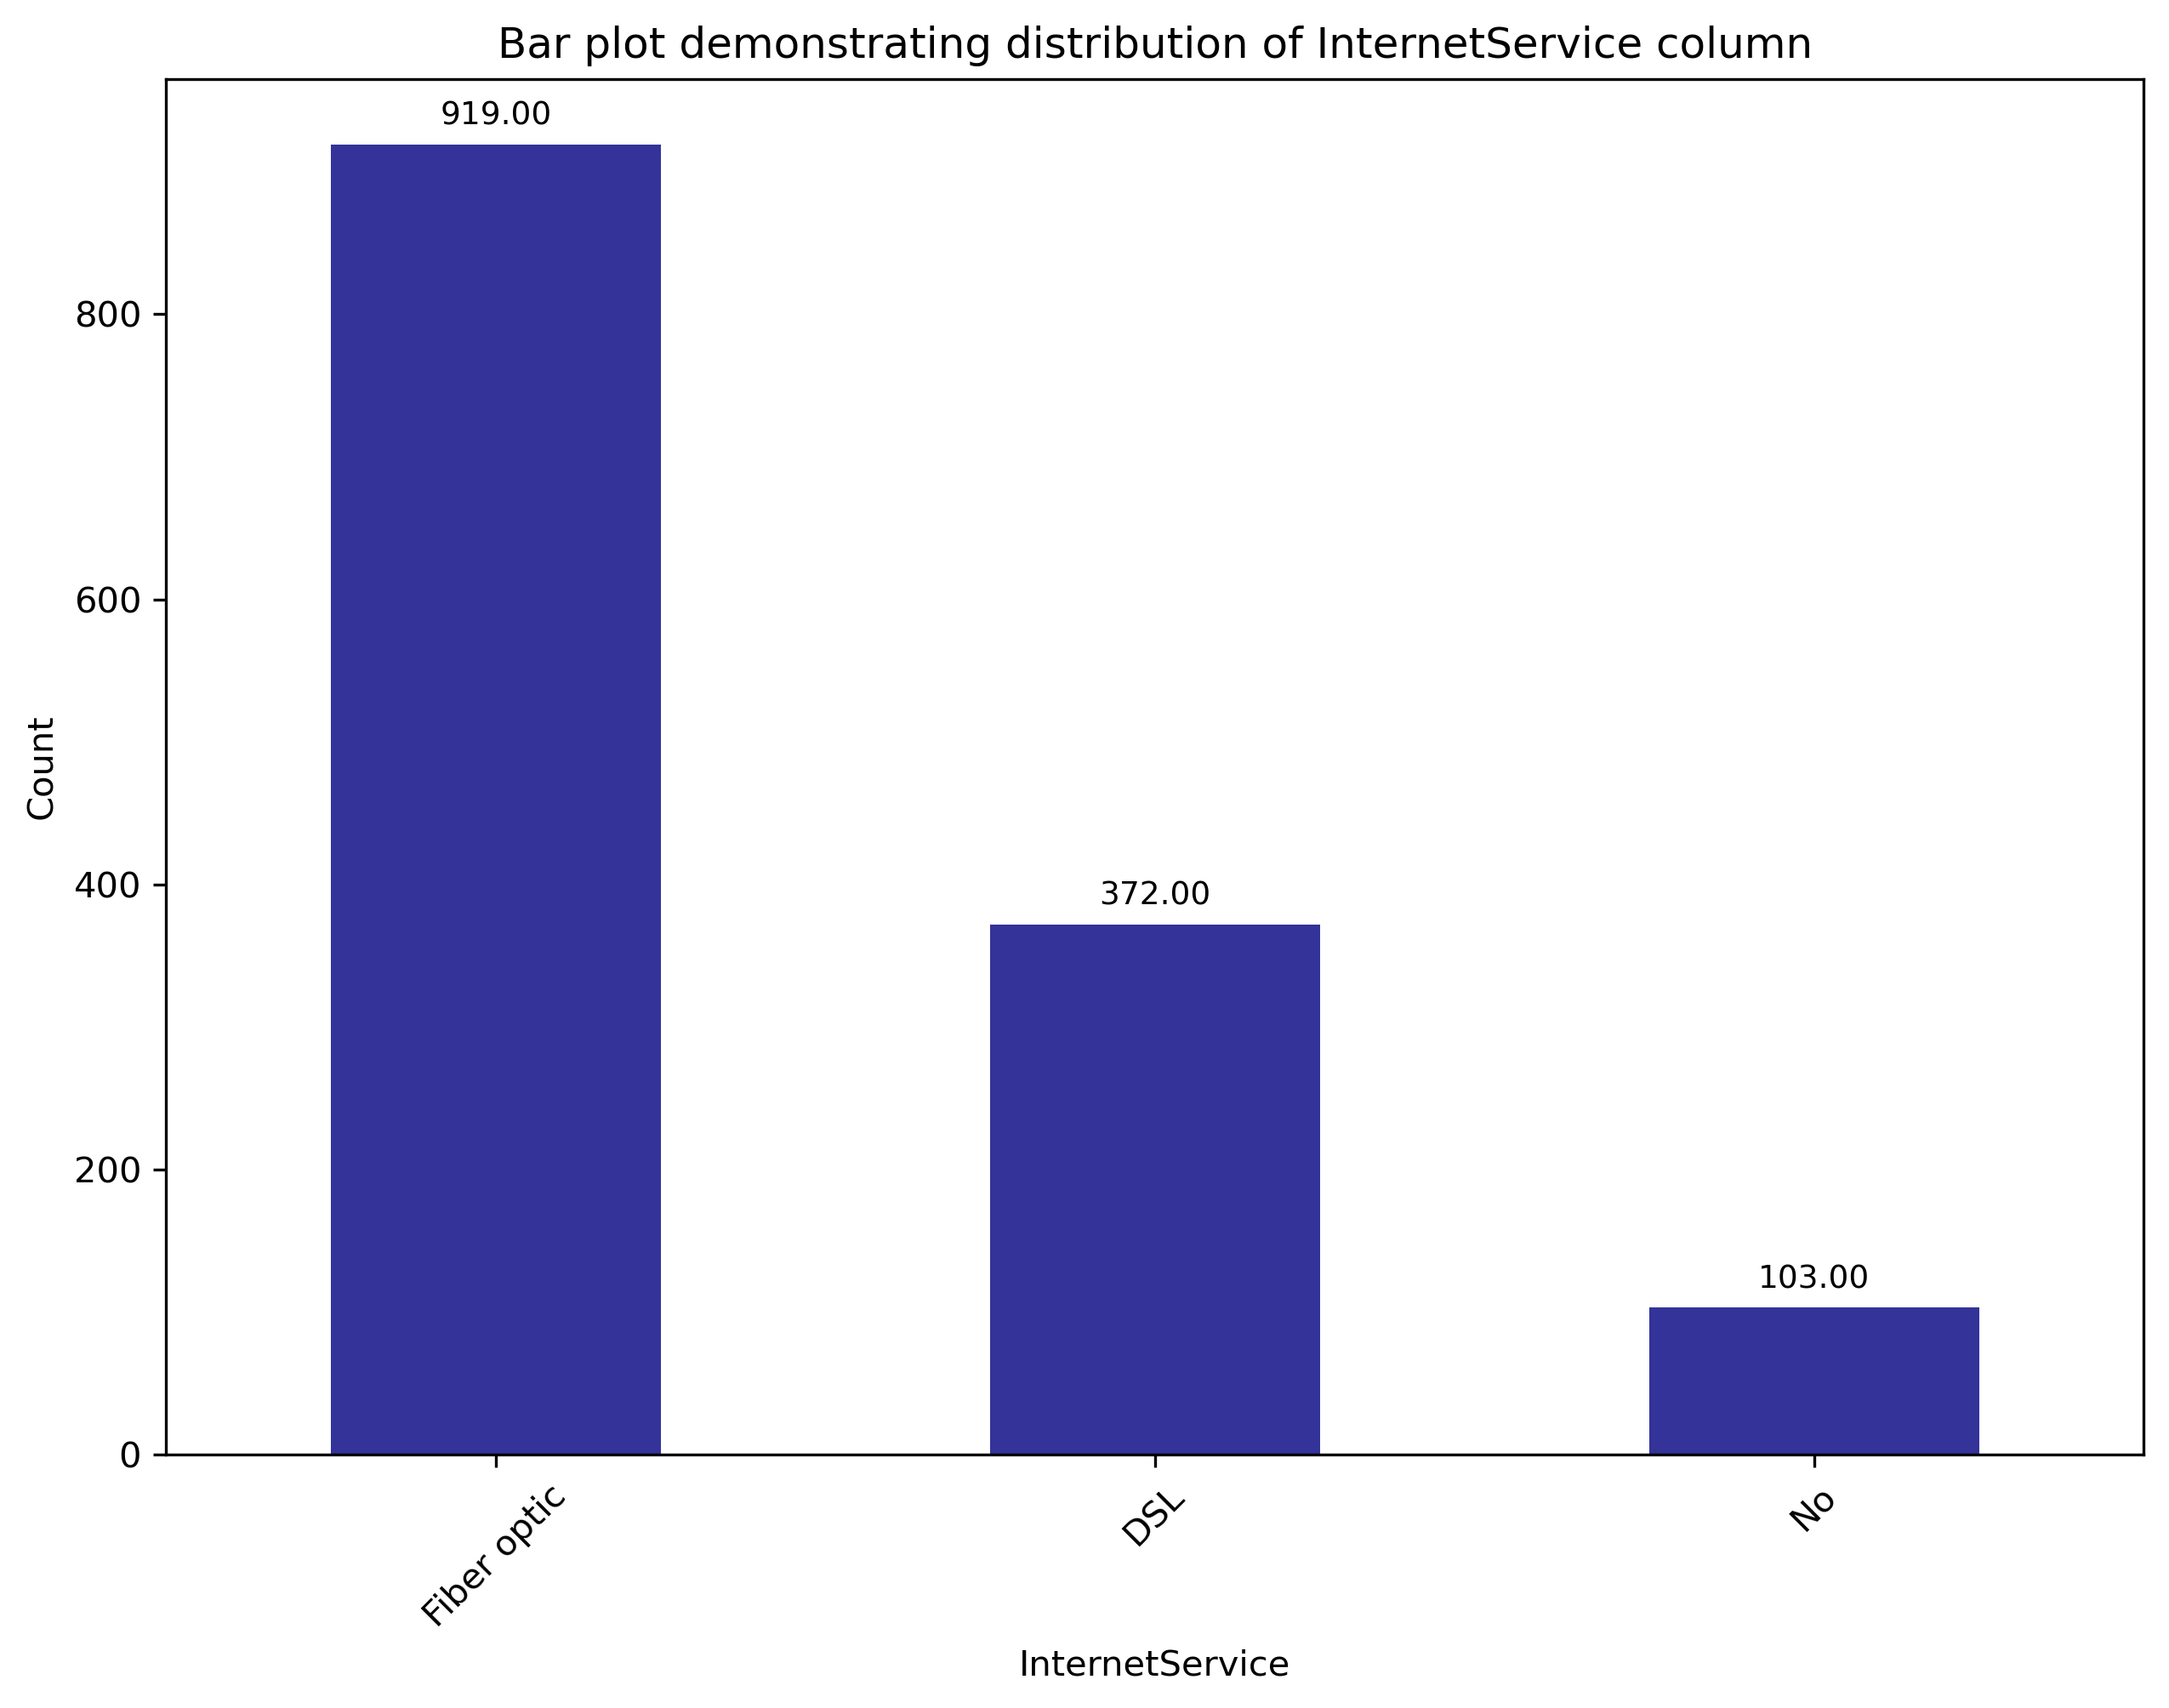

In [17]:
capstone_utils.bar_plot_count(tenure_churn,'InternetService', 'terrain')

However, contrary to my assumptions many of the customers did not actually have two year contracts but month-to-month contracts. These customers spent slightly more than the basic service provided by Telco - which is just a phone line service. 75% of the customers who churned had a phone line and internet service with a larger population paying for the premium Fiber Optic compared to DSL. This knowledge questioned the assumption I had on the reason for churning - my previous thought was that the reason for these customers churning was due to the fact they paid for the basic service and were not using all the services provided by Telco so they were able to leave much more swiftly. But there could be the other reasoning that these customers were unsatisfied with the Fiber Optic service they were receiving, such as slow or unreliable internet which caused them to change. The higher pricing of Fiber Optic compared to DSL backs up my thinking.

Furthermore, I want to see the amount of services these customers were paying for and if that may provide an insight into why these customers churned. To do I will convert the tenure_churn dataframe to a binary format and sum up the values. Given I only care about the services column, I will slice the data for those specific columns. 

In [18]:
capstone_utils.binarise_data([x for x in tenure_churn.columns], tenure_churn)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
2     3668-QPYBK     NaN            NaN        0           0       2   
4     9237-HQITU     NaN            NaN        0           0       2   
5     9305-CDSKC     NaN            NaN        0           0       8   
8     7892-POOKP     NaN            NaN        1           0      28   
18    4190-MFLUW     NaN            NaN        1           1      10   
...          ...     ...            ...      ...         ...     ...   
7007  1122-JWTJW     NaN            NaN        1           1       1   
7010  1699-HPSBG     NaN            NaN        0           0      12   
7015  8775-CEBBJ     NaN            NaN        0           0       9   
7021  6894-LFHLY     NaN            NaN        0           0       1   
7030  8361-LTMKD     NaN            NaN        1           0       4   

      PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
2                1              0             DSL               1  ...   
4                1              0     Fiber optic               0  ...   
5                1              1     Fiber optic               0  ...   
8                1              1     Fiber optic               0  ...   
18               1              0             DSL               0  ...   
...            ...            ...             ...             ...  ...   
7007             1              0     Fiber optic               0  ...   
7010             1              0             DSL               0  ...   
7015             1              0             DSL               0  ...   
7021             1              1     Fiber optic               0  ...   
7030             1              1     Fiber optic               0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
2                    0            0            0                0   
4                    0            0            0                0   
5                    1            0            1                1   
8                    1            1            1                1   
18                   1            1            0                0   
...                ...          ...          ...              ...   
7007                 0            0            0                0   
7010                 0            1            1                0   
7015                 0            0            0                0   
7021                 0            0            0                0   
7030                 0            0            0                0   

            Contract PaperlessBilling              PaymentMethod  \
2     Month-to-month                1               Mailed check   
4     Month-to-month                1           Electronic check   
5     Month-to-month                1           Electronic check   
8     Month-to-month                1           Electronic check   
18    Month-to-month                0    Credit card (automatic)   
...              ...              ...                        ...   
7007  Month-to-month                1               Mailed check   
7010        One year                1           Electronic check   
7015  Month-to-month                1  Bank transfer (automatic)   
7021  Month-to-month                1           Electronic check   
7030  Month-to-month                1               Mailed check   

     MonthlyCharges  TotalCharges  Churn  
2             53.85        108.15      1  
4             70.70        151.65      1  
5             99.65        820.50      1  
8            104.80       3046.05      1  
18            55.20        528.35      1  
...             ...           ...    ...  
7007          70.65         70.65      1  
7010          59.80        727.80      1  
7015          44.20        403.35      1  
7021          75.75         75.75      1  
7030          74.40        306.60      1  

[1394 rows x 21 columns]

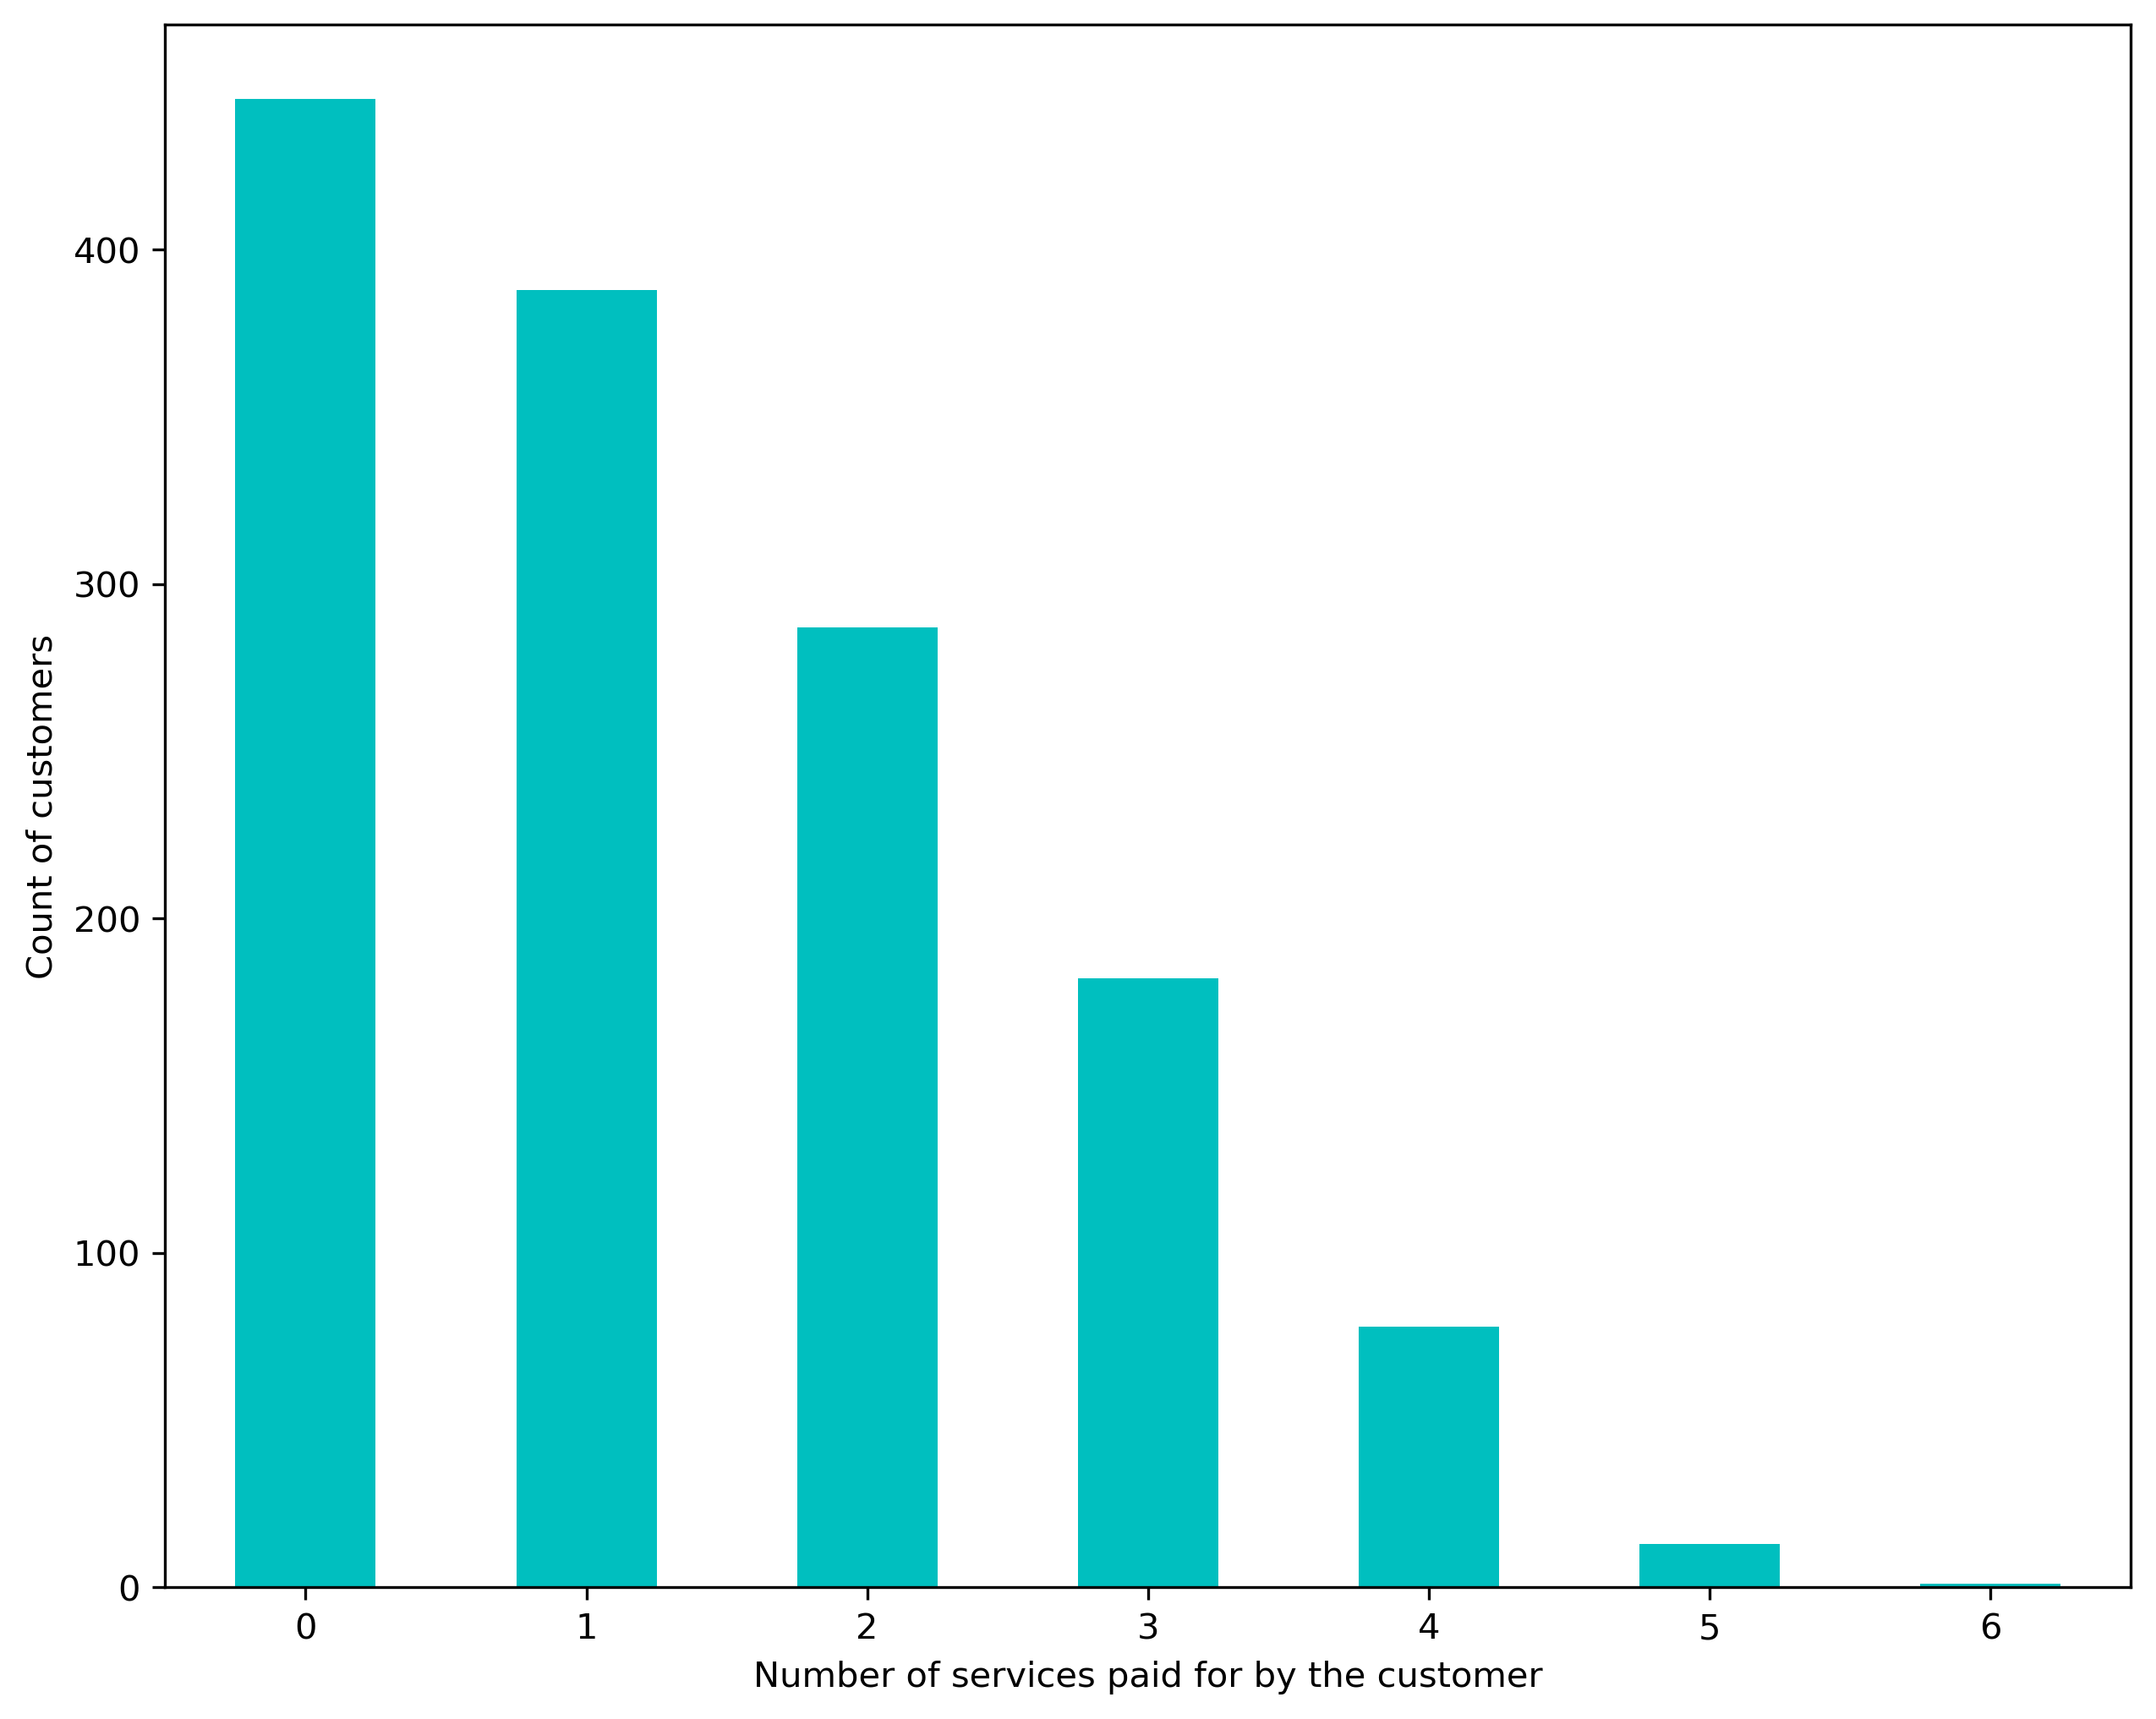

In [19]:
services = tenure_churn.iloc[:, 9:15]
services['serv'] = services.sum(axis=1)
plt.figure(figsize = (10,8))
services['serv'].value_counts().plot(kind = 'bar', color = 'c')
plt.xlabel('Number of services paid for by the customer')
plt.xticks(rotation = 0)
plt.ylabel('Count of customers')
plt.show()

Fom the bar plot it is clear to see that a massive majority of these customers did not pay for any extra services provided by Telco and this could be a reason as to why they have churned. 

Looking at the other side, I wanted to explore what services were being provided to customers who weren't churning. Again I looked at what 75% of those who not churned were paying for.

In [20]:
tenure_not_churn = telco_df[(telco_df['tenure']<61)&(telco_df['Churn']==0)].copy()

In [21]:
tenure_not_churn["MonthlyCharges"].mean()

56.82391530267582

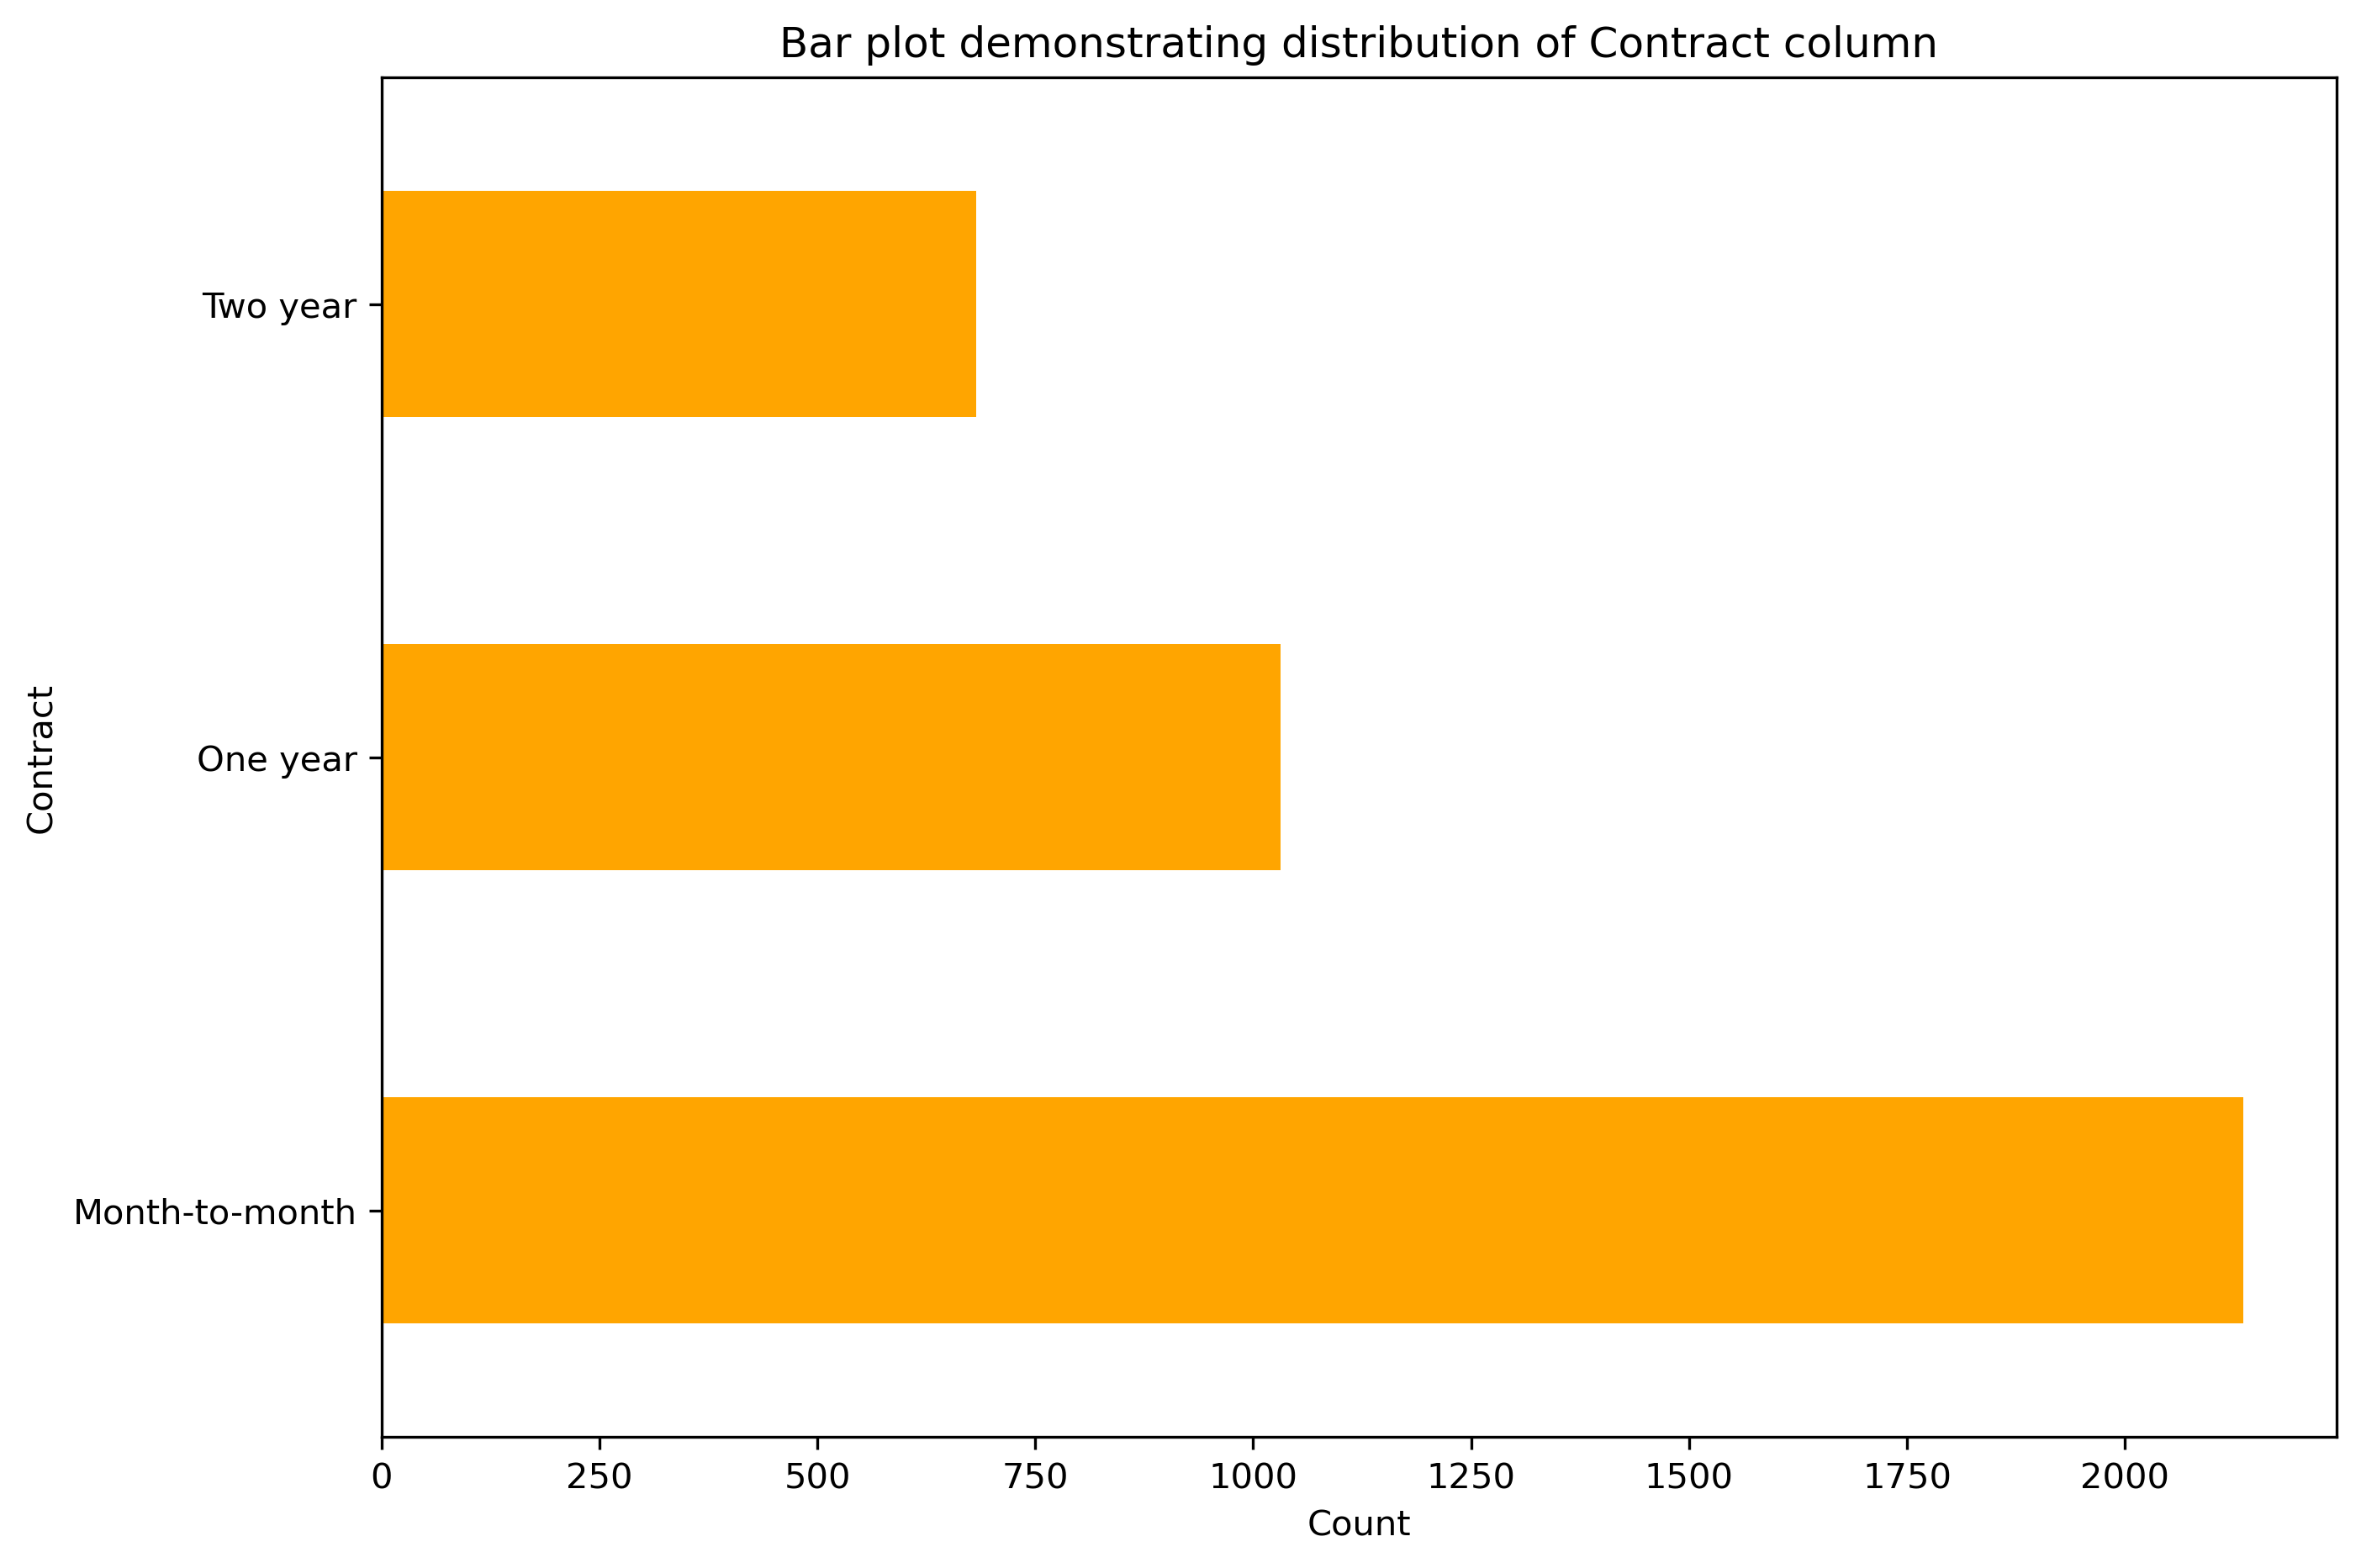

In [22]:
capstone_utils.horizontal_bar_plot_count(tenure_not_churn,'Contract', color = 'Orange')

The average monthly charge of those who did not churn was much lower than those who did. However, there seems to be much more variance in the services that these customers signed up for, on average customers had signed up for more than two services - which is much more than the customers who did Churn. A larger proportion of the customers were tied into contracts which could be a reason why the average monthly charge was lower. Furthermore, there could have been a promotional offer available which lowered the price and attracted these customers to Telco and given the services they were being provided at the price they were paying - they were happy to stay at Telco.

I want to explore how many services these customers were paying for so I can be able to get an idea as to what their behaviours were.

In [23]:
capstone_utils.binarise_data([x for x in tenure_not_churn.columns], tenure_not_churn)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG     NaN            NaN        1           0       1   
1     5575-GNVDE     NaN            NaN        0           0      34   
3     7795-CFOCW     NaN            NaN        0           0      45   
6     1452-KIOVK     NaN            NaN        0           1      22   
7     6713-OKOMC     NaN            NaN        0           0      10   
...          ...     ...            ...      ...         ...     ...   
7022  9767-FFLEM     NaN            NaN        0           0      38   
7024  8456-QDAVC     NaN            NaN        0           0      19   
7025  7750-EYXWZ     NaN            NaN        0           0      12   
7027  6840-RESVB     NaN            NaN        1           1      24   
7029  4801-JZAZL     NaN            NaN        1           1      11   

      PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0                0              0             DSL               0  ...   
1                1              0             DSL               1  ...   
3                0              0             DSL               1  ...   
6                1              1     Fiber optic               0  ...   
7                0              0             DSL               1  ...   
...            ...            ...             ...             ...  ...   
7022             1              0     Fiber optic               0  ...   
7024             1              0     Fiber optic               0  ...   
7025             0              0             DSL               0  ...   
7027             1              1             DSL               1  ...   
7029             0              0             DSL               1  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
3                    1            1            0                0   
6                    0            0            1                0   
7                    0            0            0                0   
...                ...          ...          ...              ...   
7022                 0            0            0                0   
7024                 0            0            1                0   
7025                 1            1            1                1   
7027                 1            1            1                1   
7029                 0            0            0                0   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month                1           Electronic check   
1           One year                0               Mailed check   
3           One year                0  Bank transfer (automatic)   
6     Month-to-month                1    Credit card (automatic)   
7     Month-to-month                0               Mailed check   
...              ...              ...                        ...   
7022  Month-to-month                1    Credit card (automatic)   
7024  Month-to-month                1  Bank transfer (automatic)   
7025        One year                0           Electronic check   
7027        One year                1               Mailed check   
7029  Month-to-month                1           Electronic check   

     MonthlyCharges  TotalCharges  Churn  
0             29.85         29.85      0  
1             56.95       1889.50      0  
3             42.30       1840.75      0  
6             89.10       1949.40      0  
7             29.75        301.90      0  
...             ...           ...    ...  
7022          69.50       2625.25      0  
7024          78.70       1495.10      0  
7025          60.65        743.30      0  
7027          84.80       1990.50      0  
7029          29.60        346.45      0  

[3849 rows x 21 columns]

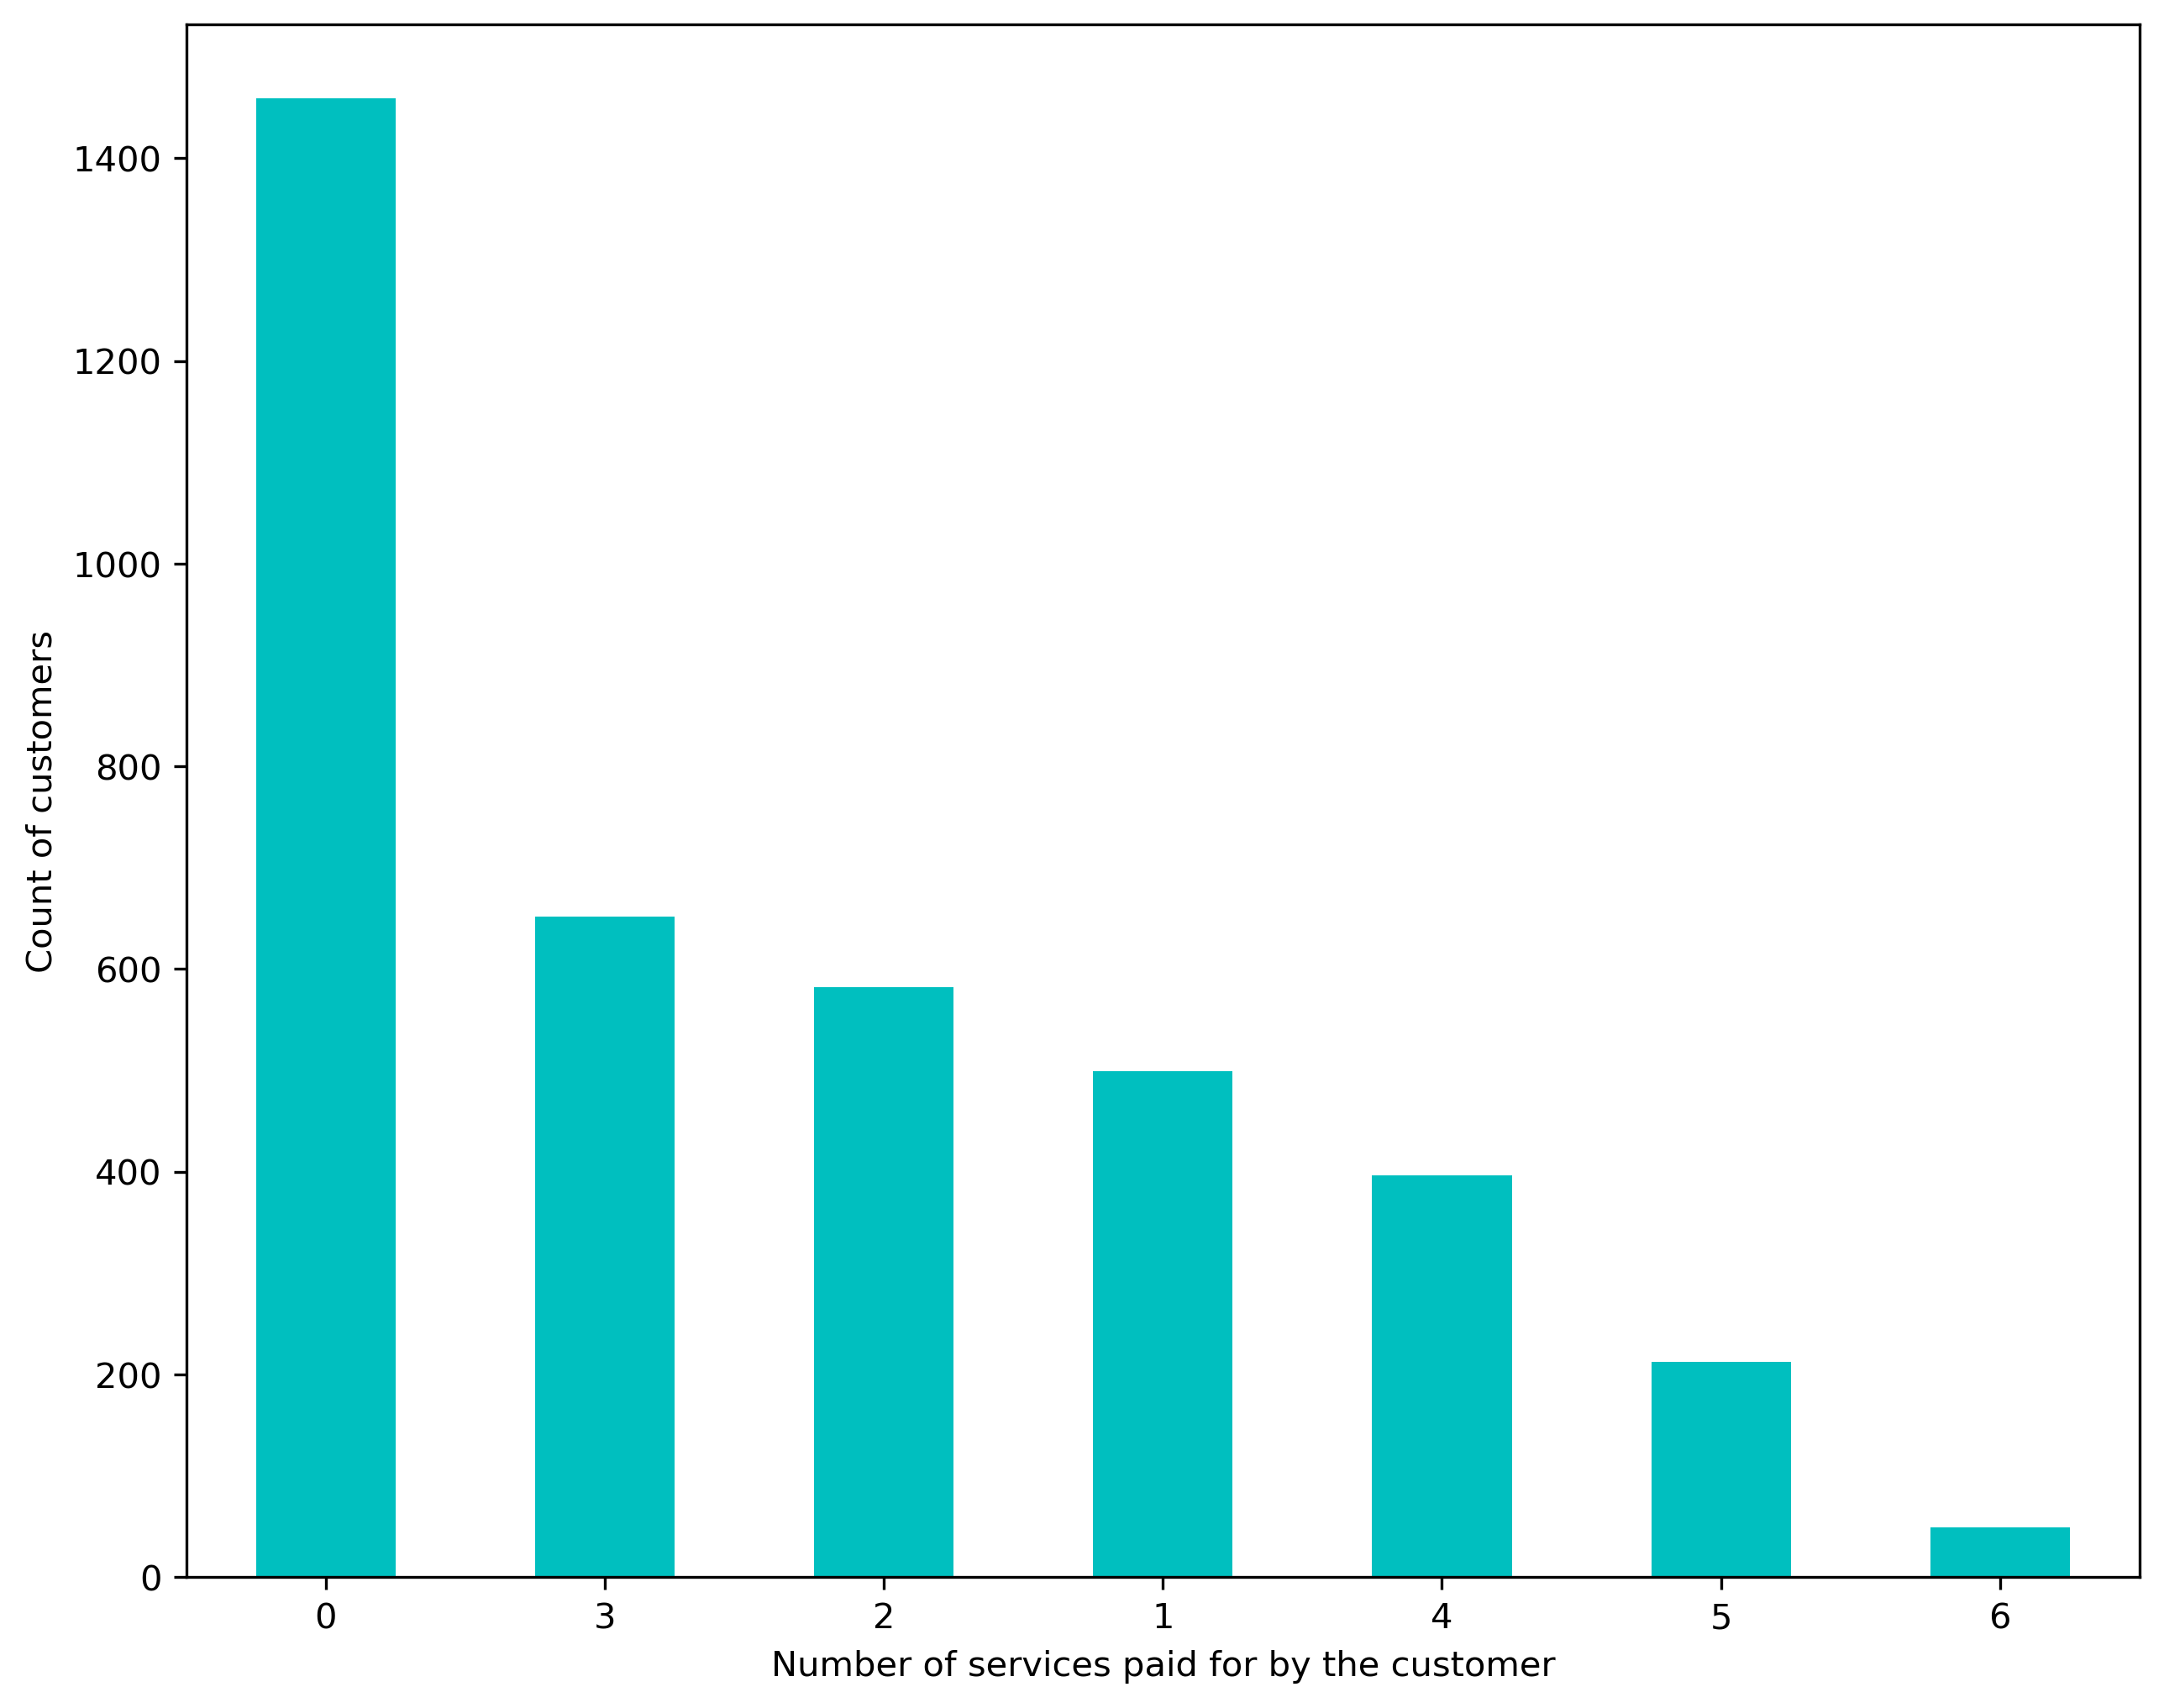

In [24]:
services = tenure_not_churn.iloc[:, 9:15]
services['serv'] = services.sum(axis=1)
plt.figure(figsize = (10,8))
services['serv'].value_counts().plot(kind = 'bar', color = 'c')
plt.xlabel('Number of services paid for by the customer')
plt.xticks(rotation = 0)
plt.ylabel('Count of customers')
plt.show()

This is very different than before, it seems again that a large portion of customers did not pay for extra services. However, there does seem to be much more engagement after that. With customers paying for 3 services which could mean that the customer likes the services being provided and does not want to change. 

### Distribution: Monthly Charge

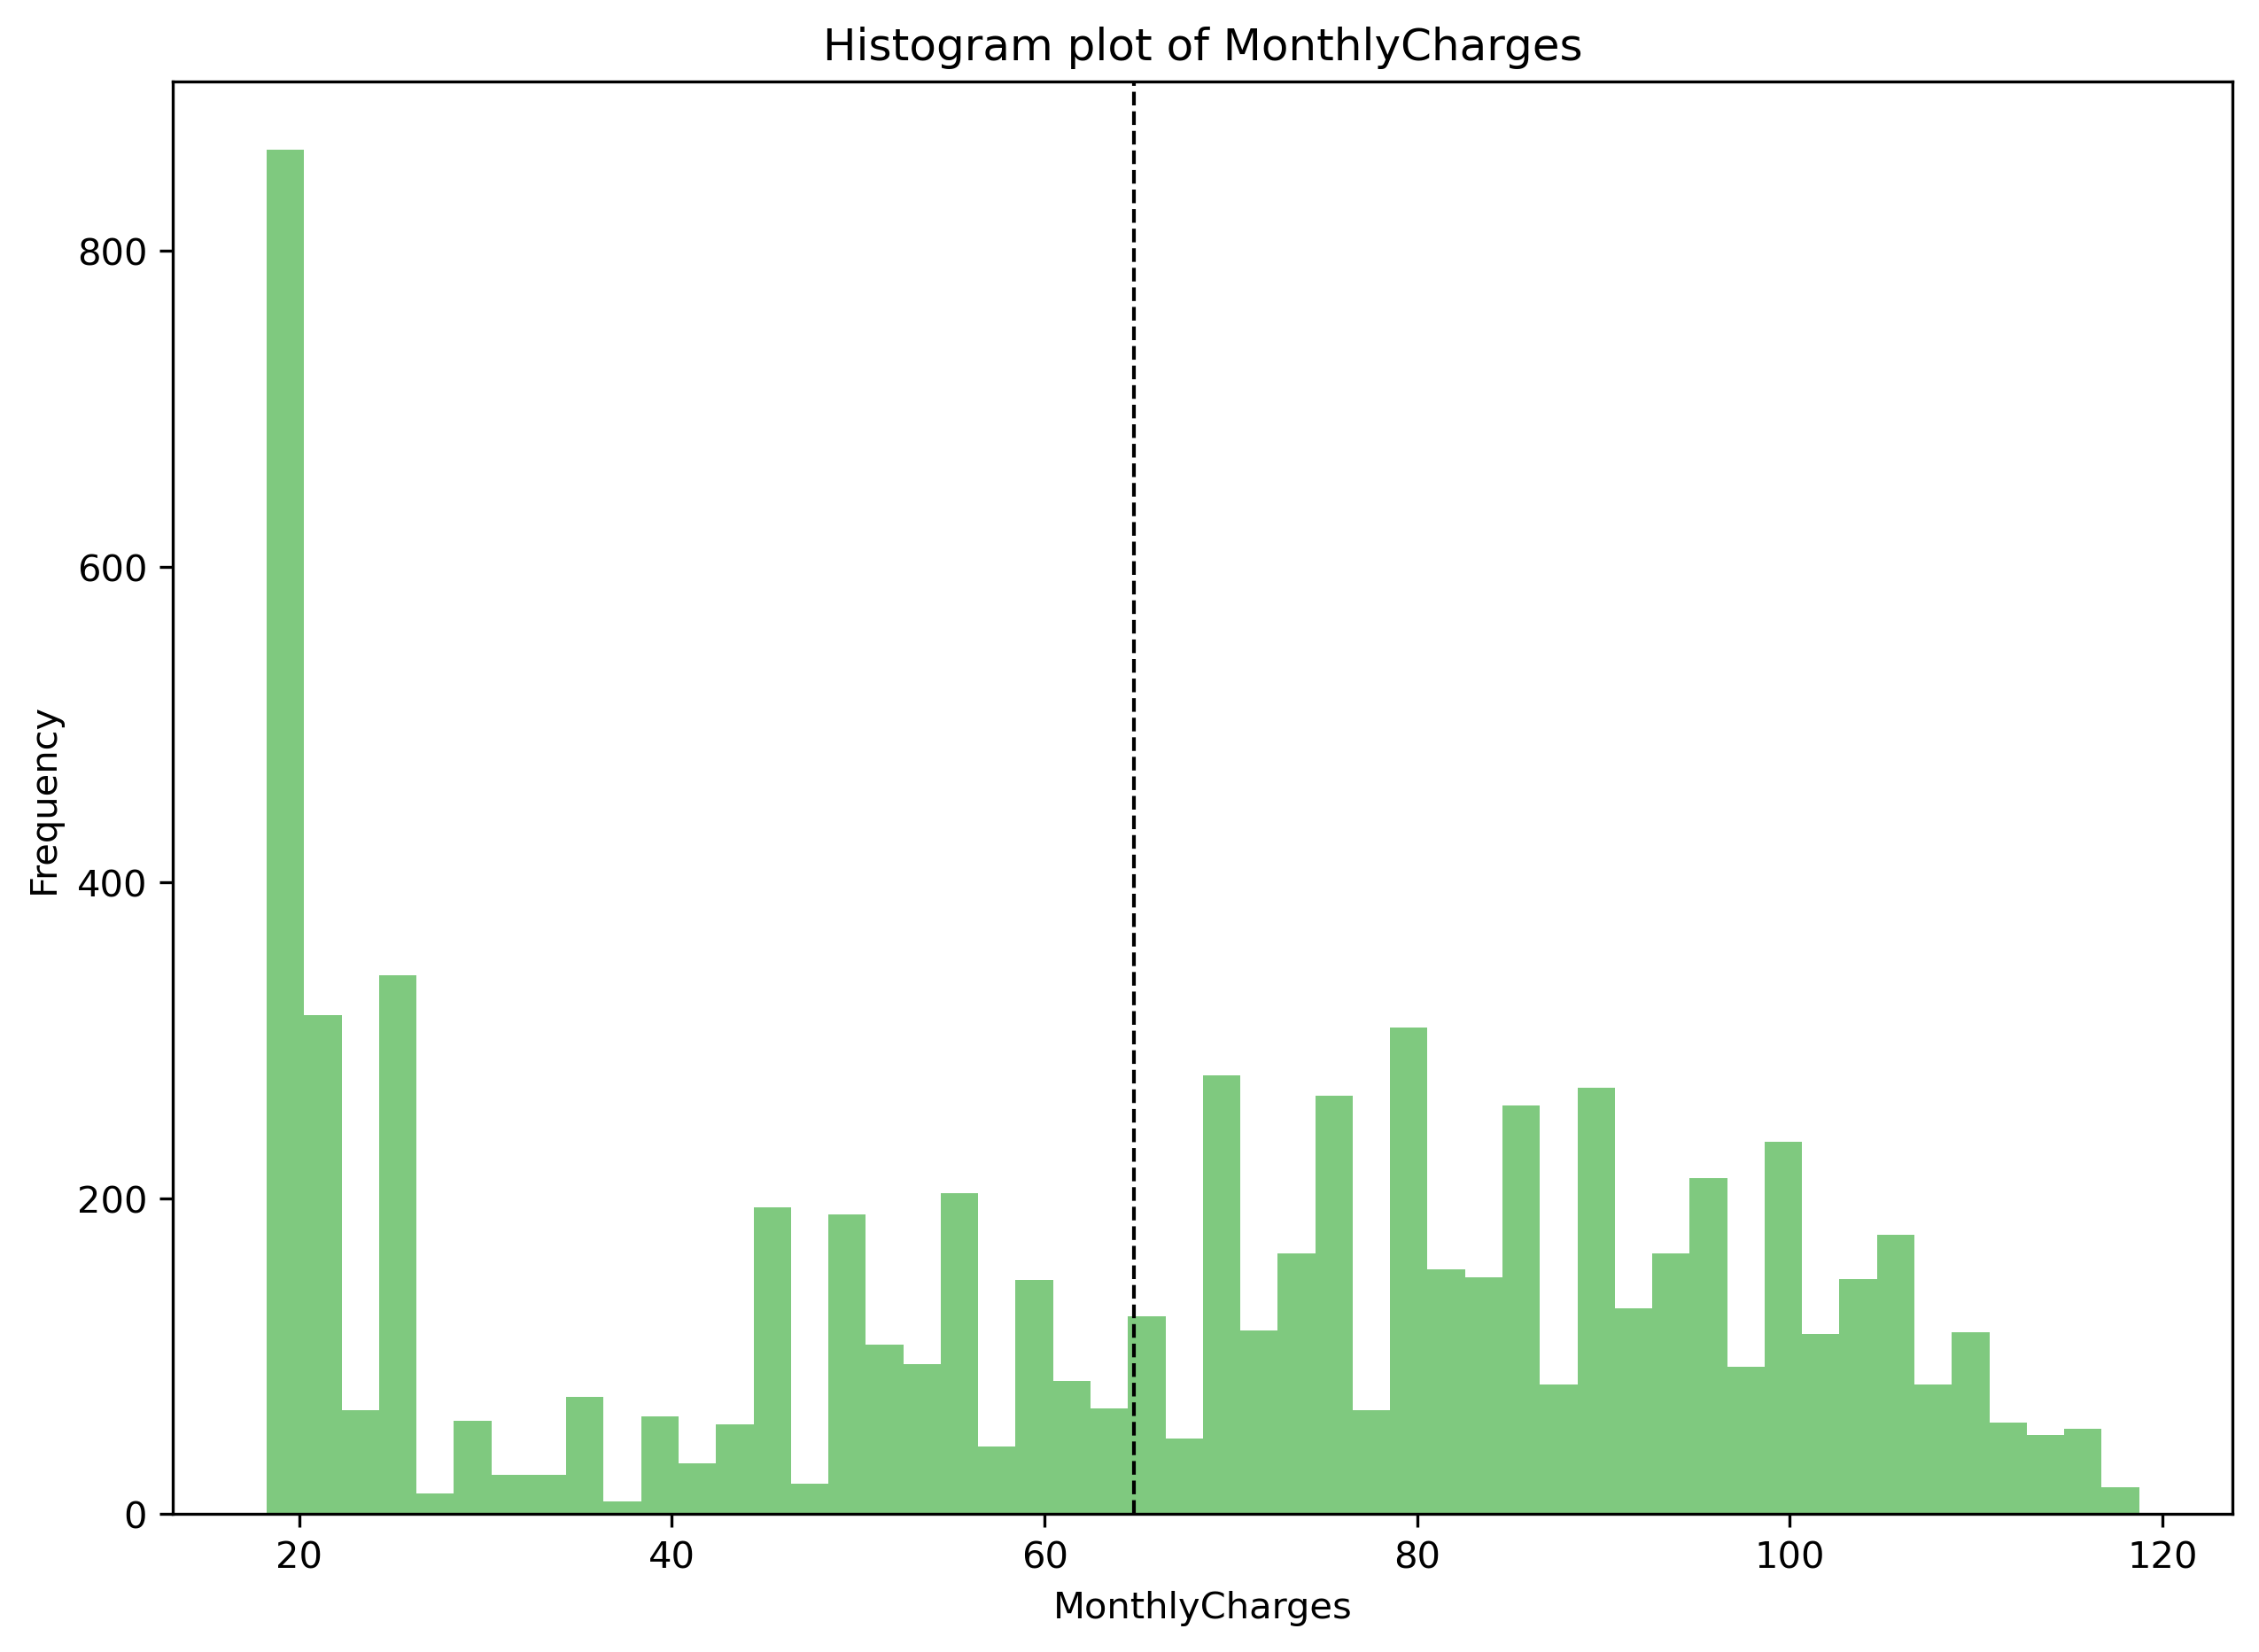

In [25]:
capstone_utils.df_histogram(telco_df,'MonthlyCharges')

Analysis of the histogram of the Monthly Charges it is clear to see that there is a massive peak and then the values drop down. Studying the graph after the peak, the data seems to follow a normal distribution. However, I want to see whether there is pattern between monthly charges and tenure for customers who churned and didn't. 

Furthermore, the average monthly charge seems to be around $65 which is interesting given the massive initial peak. I thought it would have been slightly more to the left. 

In [26]:
churn = telco_df[telco_df['Churn']==1]
not_churn = telco_df[telco_df['Churn']==0]

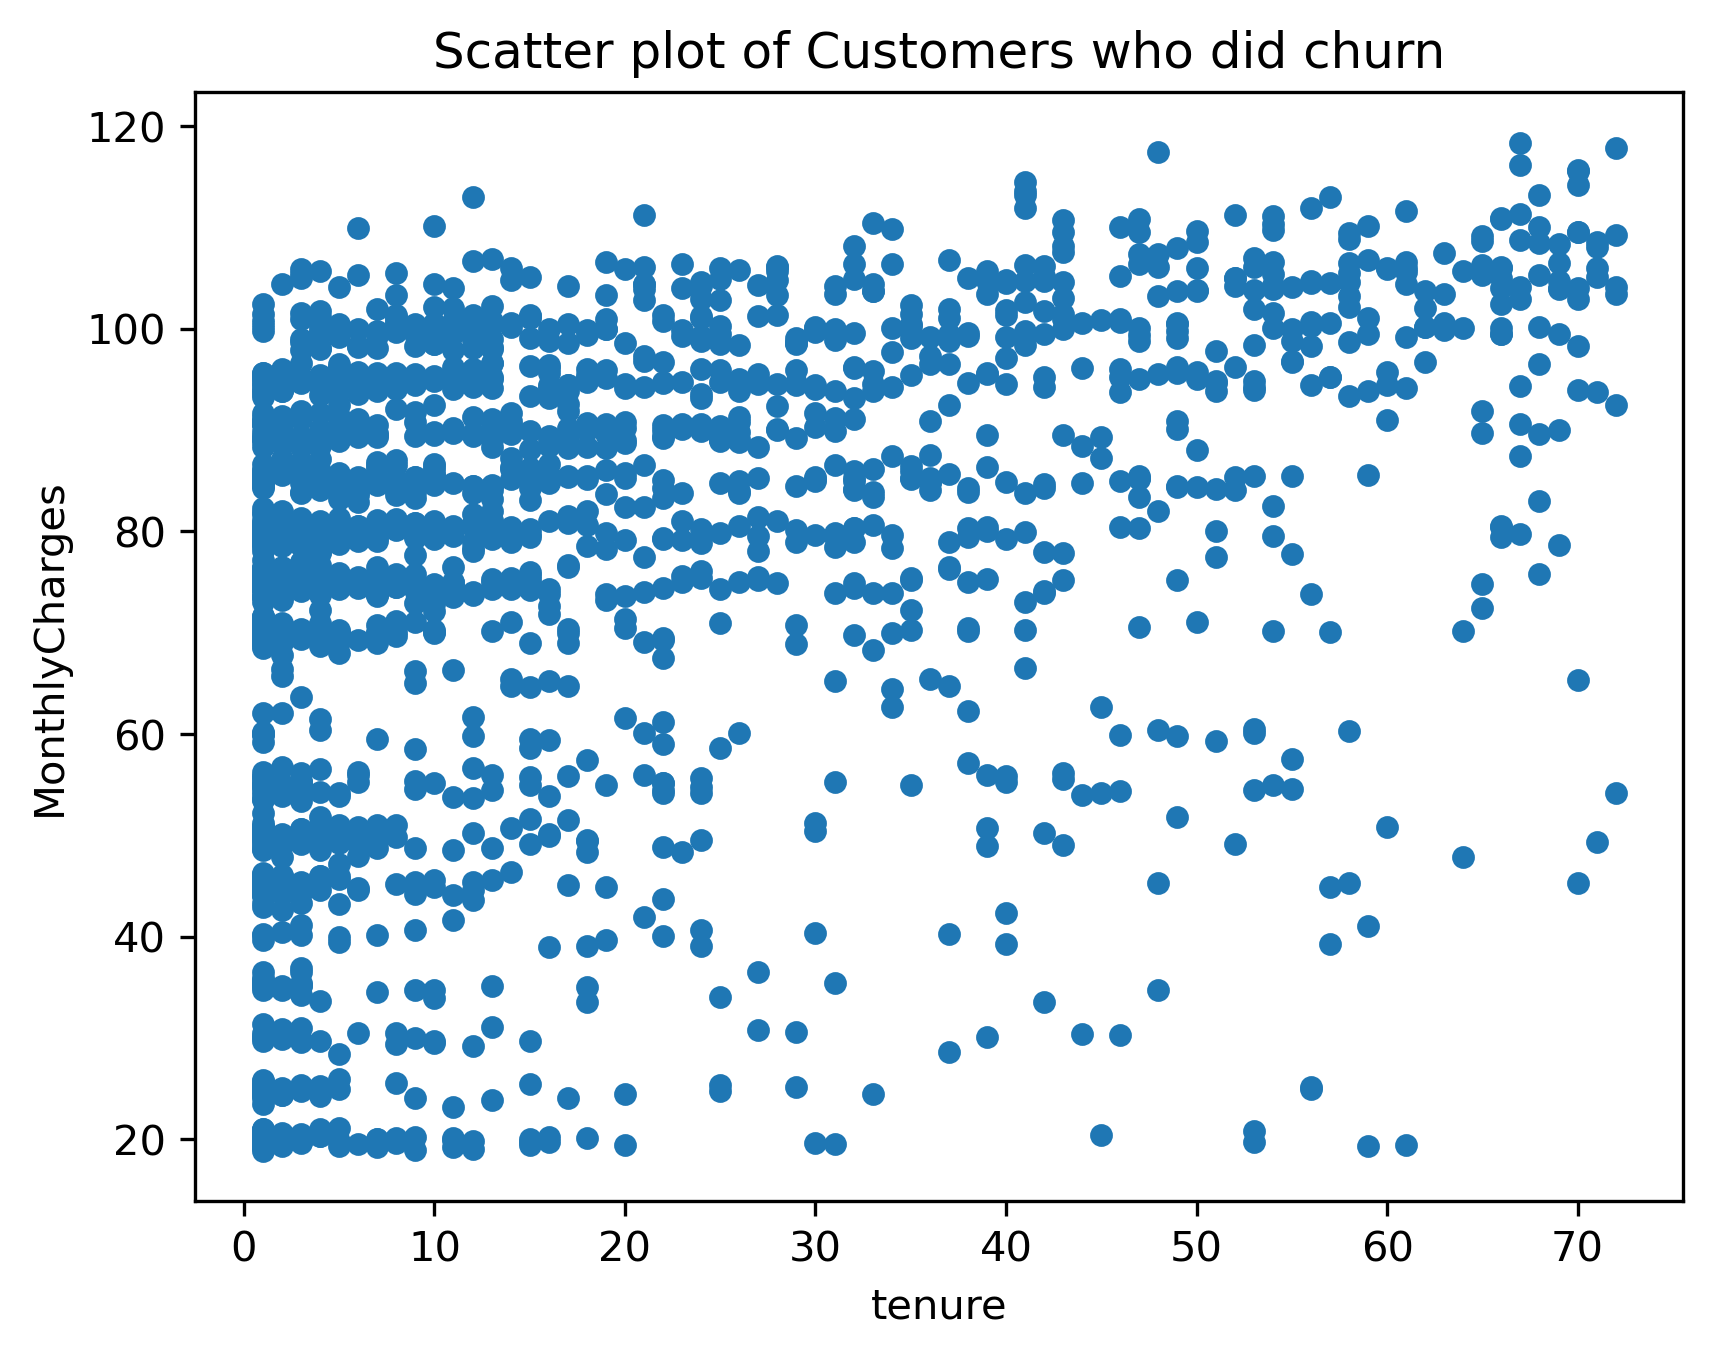

In [27]:
churn.plot.scatter(x='tenure',y='MonthlyCharges')
plt.title('Scatter plot of Customers who did churn')
plt.show()

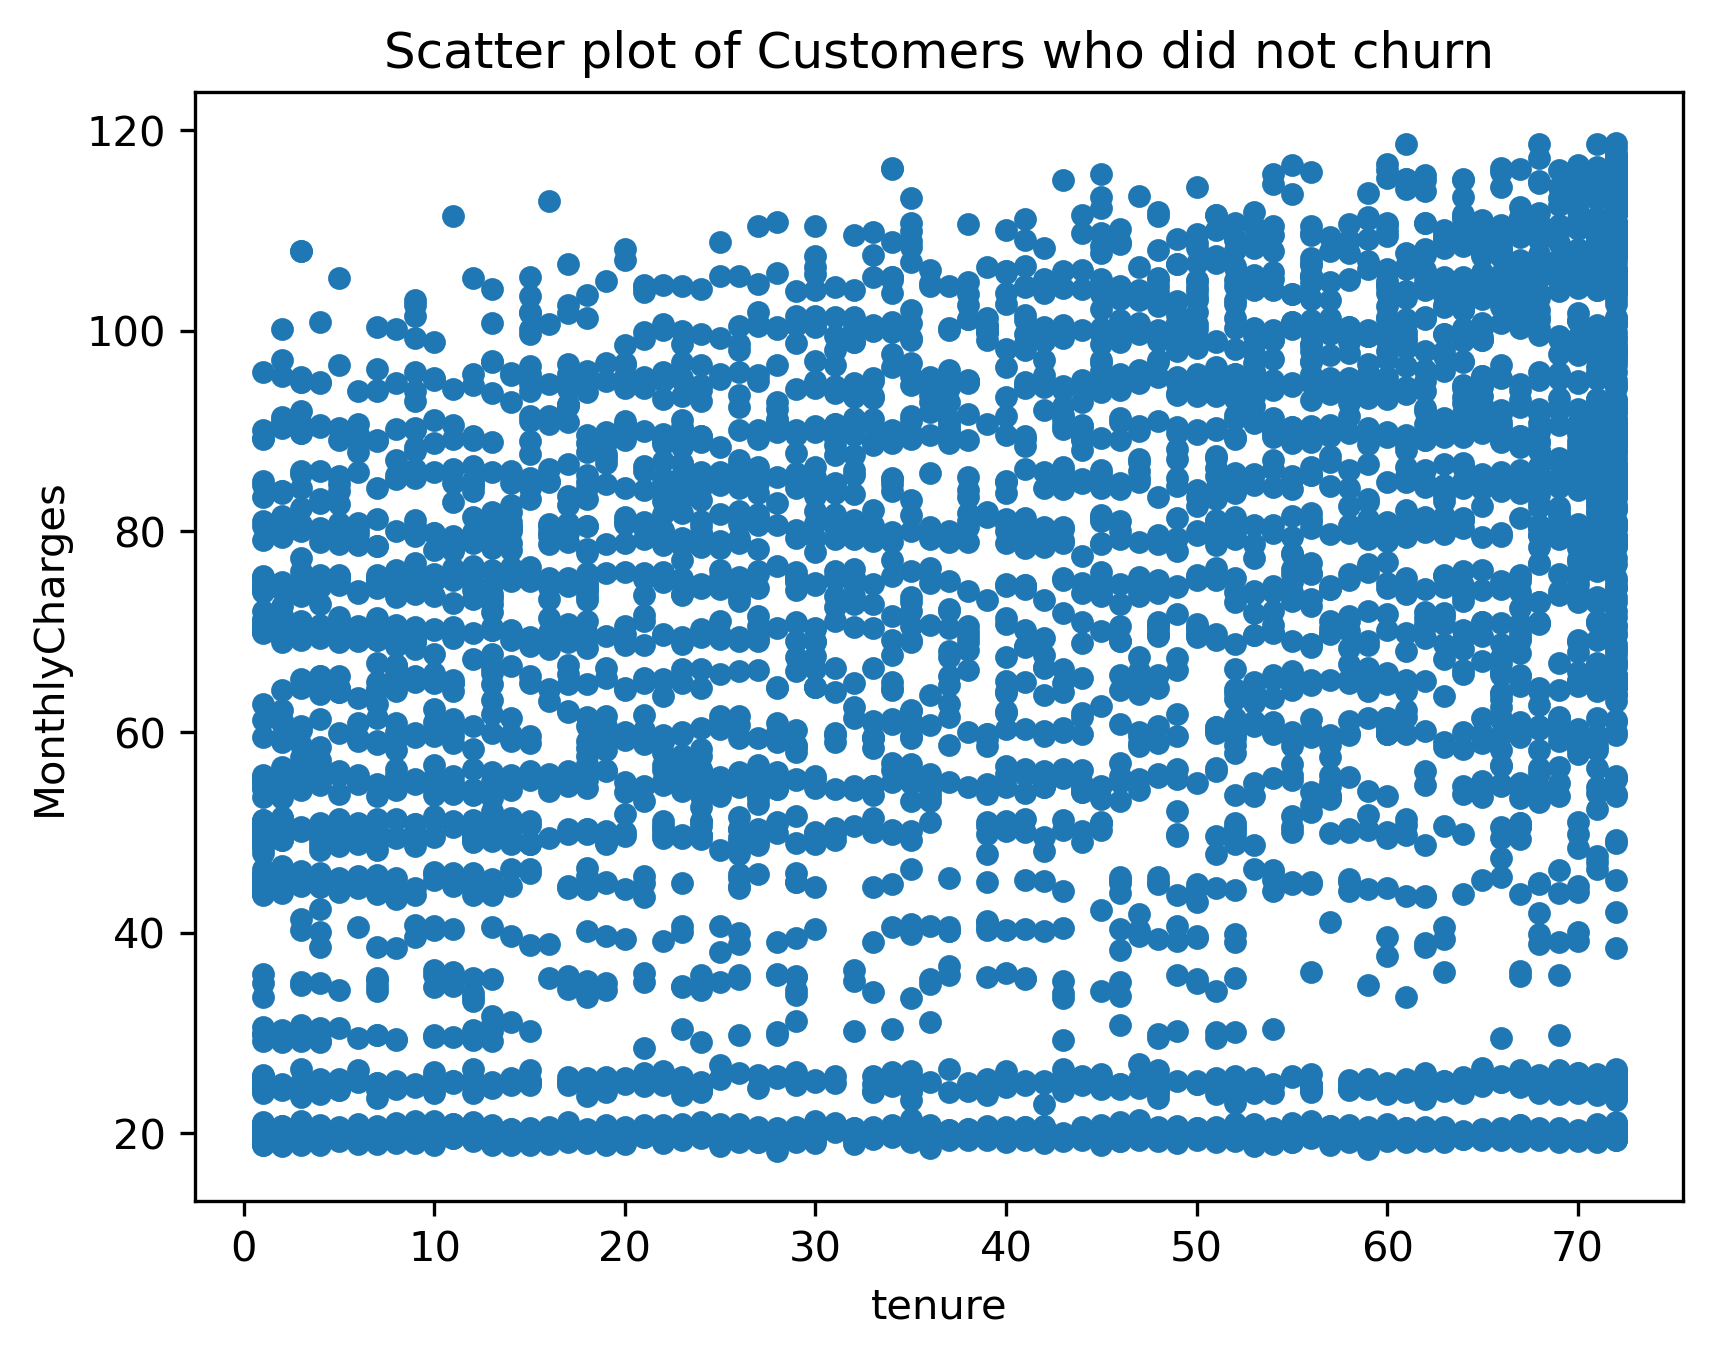

In [28]:
not_churn.plot.scatter(x='tenure',y='MonthlyCharges')
plt.title('Scatter plot of Customers who did not churn')
plt.show()

Looking at the two scatter graphs, there seems to be a slight patteren of behaviour. The customers who did churn had a very low tenure on average and had a common spend around $80. Demonstrated by the dense cluster of spots. Meanwhile the tenure of the customers who did not churn was much higher with a large density in the upper right.

Given the large peak at the start demonstrated in the histogram, I want to explore that further.

In [29]:
maxi1 = np.argmax(np.gradient(sorted(telco_df['MonthlyCharges'])))
print((sorted(telco_df['MonthlyCharges']))[maxi1])

33.15


With the help of external [research](https://datascience.stackexchange.com/questions/77259/is-it-valid-to-use-numpy-gradient-to-find-slope-of-line-as-well-as-slope-of-curv) on the internet I was able to take advantage of the gradient method. By calculating the point with the highest gradient this will help to determine the point where the end of the peak is. Finding that index value I was able to calculate that it was 33.15.

In [30]:
sample = telco_df.copy()
sample['Monthly charge < 33.15'] = sample['MonthlyCharges'].apply(lambda x: x < 33.15)

In [31]:
sample[sample['Monthly charge < 33.15']==True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
7     6713-OKOMC  Female              0      No         No      10   
11    7469-LKBCI    Male              0      No         No      16   
16    8191-XWSZG  Female              0      No         No      52   
21    1680-VDCWW    Male              0     Yes         No      12   
...          ...     ...            ...     ...        ...     ...   
7008  9710-NJERN  Female              0      No         No      39   
7009  9837-FWLCH    Male              0     Yes        Yes      12   
7019  0871-OPBXW  Female              0      No         No       2   
7026  2569-WGERO  Female              0      No         No      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No phone service             DSL                   No  ...   
7              No  No phone service             DSL                  Yes  ...   
11            Yes                No              No  No internet service  ...   
16            Yes                No              No  No internet service  ...   
21            Yes                No              No  No internet service  ...   
...           ...               ...             ...                  ...  ...   
7008          Yes                No              No  No internet service  ...   
7009          Yes                No              No  No internet service  ...   
7019          Yes                No              No  No internet service  ...   
7026          Yes                No              No  No internet service  ...   
7029           No  No phone service             DSL                  Yes  ...   

              TechSupport          StreamingTV      StreamingMovies  \
0                      No                   No                   No   
7                      No                   No                   No   
11    No internet service  No internet service  No internet service   
16    No internet service  No internet service  No internet service   
21    No internet service  No internet service  No internet service   
...                   ...                  ...                  ...   
7008  No internet service  No internet service  No internet service   
7009  No internet service  No internet service  No internet service   
7019  No internet service  No internet service  No internet service   
7026  No internet service  No internet service  No internet service   
7029                   No                   No                   No   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
7     Month-to-month               No               Mailed check   
11          Two year               No    Credit card (automatic)   
16          One year               No               Mailed check   
21          One year               No  Bank transfer (automatic)   
...              ...              ...                        ...   
7008        Two year               No               Mailed check   
7009  Month-to-month              Yes           Electronic check   
7019  Month-to-month              Yes               Mailed check   
7026        Two year              Yes  Bank transfer (automatic)   
7029  Month-to-month              Yes           Electronic check   

     MonthlyCharges TotalCharges  Churn  Monthly charge < 33.15  
0             29.85        29.85      0                    True  
7             29.75       301.90      0                    True  
11            18.95       326.80      0                    True  
16            20.65      1022.95      0                    True  
21            19.80       202.25      0                    True  
...             ...          ...    ...                     ...  
7008          20.15       826.00      0                    T

With this data filtered, I could explore the initial peak to see if it provided any insights about why there so many customers at this price. Below demonstrates there is a large peak around 20 dollars, a smaller one around 25 dollars and even smaller one around 30 dollars.

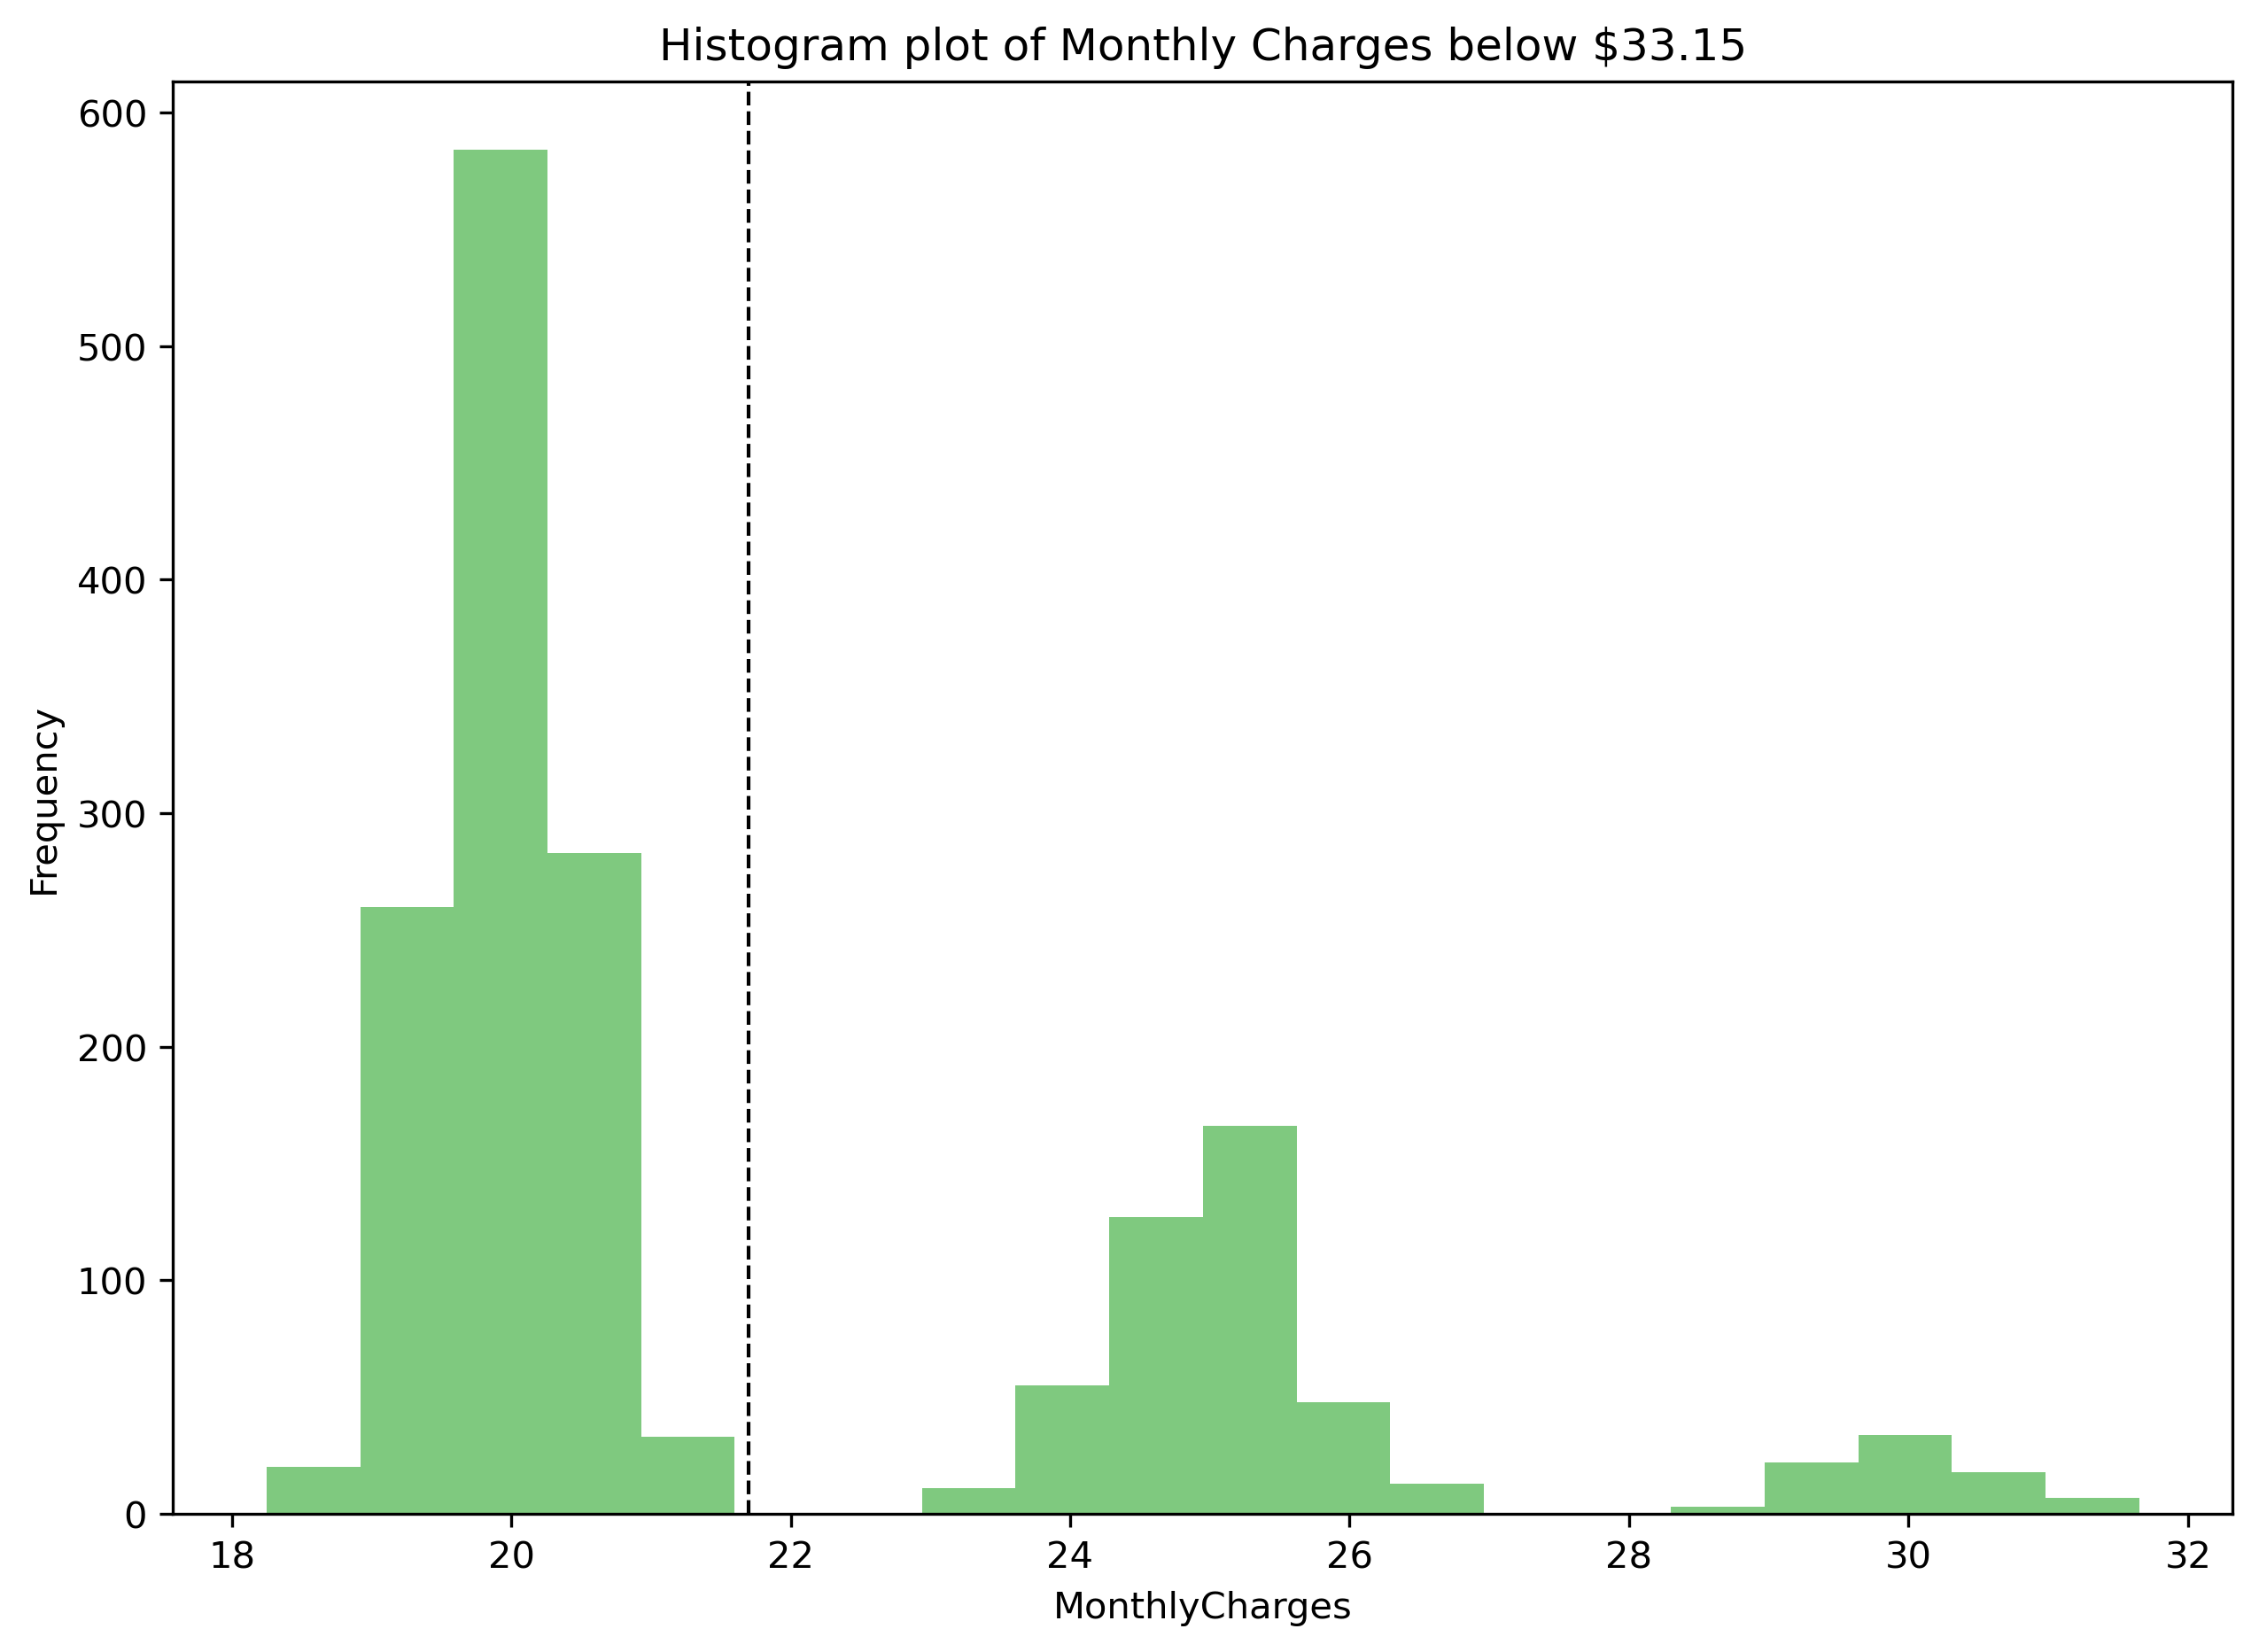

In [32]:
charges_below = sample[sample['Monthly charge < 33.15']==True]
capstone_utils.df_histogram(charges_below,'MonthlyCharges',bins = 20)
plt.title("Histogram plot of Monthly Charges below $33.15")
plt.show()

I want to explore the first initial peak at ~20 dollars.

In [33]:
telco_df[telco_df['MonthlyCharges']<21].head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
11  7469-LKBCI    Male              0      No         No      16          Yes   
16  8191-XWSZG  Female              0      No         No      52          Yes   
21  1680-VDCWW    Male              0     Yes         No      12          Yes   
22  1066-JKSGK    Male              0      No         No       1          Yes   
33  7310-EGVHZ    Male              0      No         No       1          Yes   
42  9867-JCZSP  Female              0     Yes        Yes      17          Yes   
68  3170-NMYVV  Female              0     Yes        Yes      50          Yes   
71  0731-EBJQB  Female              0     Yes        Yes      52          Yes   
84  0318-ZOPWS  Female              0     Yes         No      49          Yes   
87  1862-QRWPE  Female              0     Yes        Yes      48          Yes   

   MultipleLines InternetService       OnlineSecurity  ...  \
11            No              No  No internet service  ...   
16            No              No  No internet service  ...   
21            No              No  No internet service  ...   
22            No              No  No internet service  ...   
33            No              No  No internet service  ...   
42            No              No  No internet service  ...   
68            No              No  No internet service  ...   
71            No              No  No internet service  ...   
84            No              No  No internet service  ...   
87            No              No  No internet service  ...   

       DeviceProtection          TechSupport          StreamingTV  \
11  No internet service  No internet service  No internet service   
16  No internet service  No internet service  No internet service   
21  No internet service  No internet service  No internet service   
22  No internet service  No internet service  No internet service   
33  No internet service  No internet service  No internet service   
42  No internet service  No internet service  No internet service   
68  No internet service  No internet service  No internet service   
71  No internet service  No internet service  No internet service   
84  No internet service  No internet service  No internet service   
87  No internet service  No internet service  No internet service   

        StreamingMovies        Contract PaperlessBilling  \
11  No internet service        Two year               No   
16  No internet service        One year               No   
21  No internet service        One year               No   
22  No internet service  Month-to-month               No   
33  No internet service  Month-to-month               No   
42  No internet service        One year               No   
68  No internet service        Two year               No   
71  No internet service        One year              Yes   
84  No internet service        Two year              Yes   
87  No internet service        Two year               No   

                PaymentMethod MonthlyCharges  TotalCharges  Churn  
11    Credit card (automatic)          18.95        326.80      0  
16               Mailed check          20.65       1022.95      0  
21  Bank transfer (automatic)          19.80        202.25      0  
22               Mailed check          20.15         20.15      1  
33  Bank transfer (automatic)          20.20         20.20      0  
42               Mailed check          20.75        418.25      0  
68  Bank transfer (automatic)          20.15        930.90      0  
71           Electronic check          20.40       1090.65      0  
84  Bank transfer (automatic)          20.15        973.35      0  
87  Bank transfer (automatic)          20.65       1057.00      0  

[10 rows x 21 columns]

Looking at a snippet of the dataframe above for where the monthly charge is below $21. Looking at the data, this is the base service that customers can obtain where they strictly get a Phone service with no multiple lines and nothing else. Hence why there is a such a large peak around this value as there are a large amount of customers who want the basic service. This may be a key group who are churning as they are not using all the services provided by Telco and this will be explored further. To do this, I created a copy of the dataset and created a new column "Monthly Charge < 33.15".

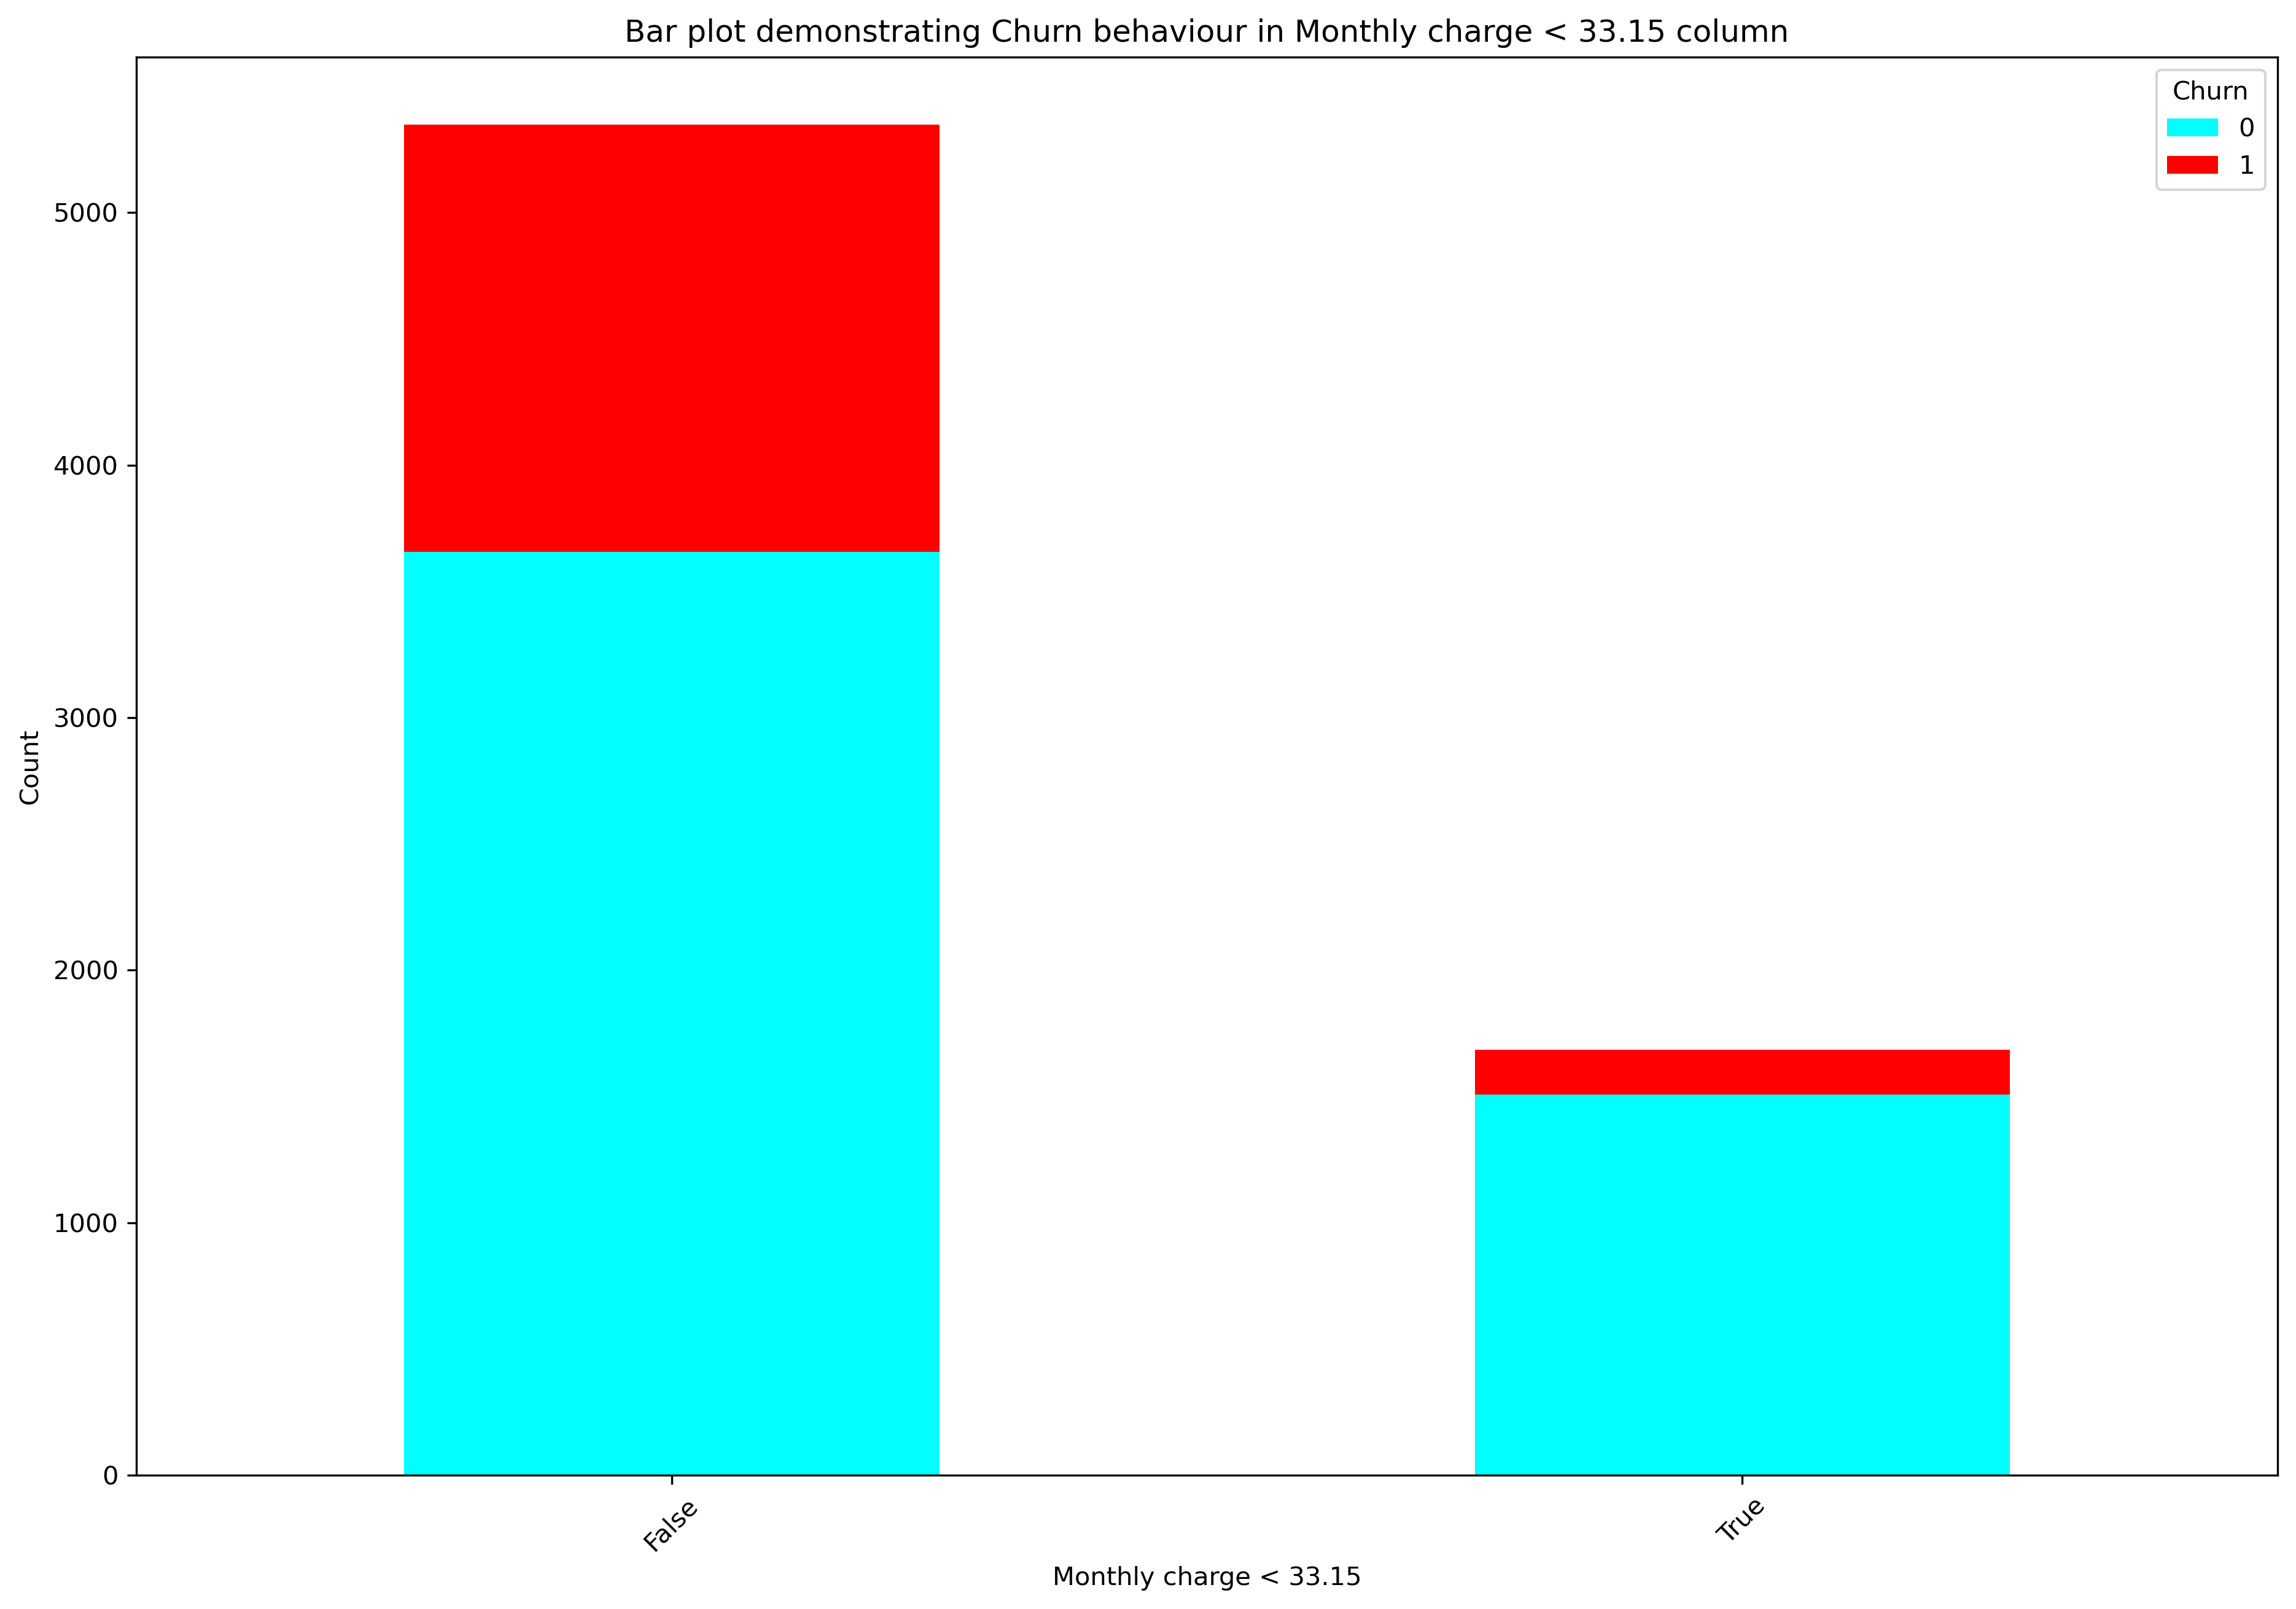

In [34]:
sample  = telco_df.copy()
sample["Monthly charge < 33.15"] = sample["MonthlyCharges"].apply(lambda x: True if x < 33.15 else False)
capstone_utils.plot_stacked_dist(sample,"Monthly charge < 33.15")

In [35]:
capstone_utils.churn_percentage(sample,"Monthly charge < 33.15")

Monthly charge < 33.15
{False: 31.7, True: 10.5}


However, contrary to my previous thought customers who had a monthly charge higher than 33.15 churned at a higher rate than those who did not - the false in this case means that they spent more than 33.15. This may have been due to the fact that those who spent less than 33.15 had a basic service and did not need any other services provided to them. Therefore, they had no reason to churn. Let's take a look at the distribution of monthly charges above 33.15 dollars.

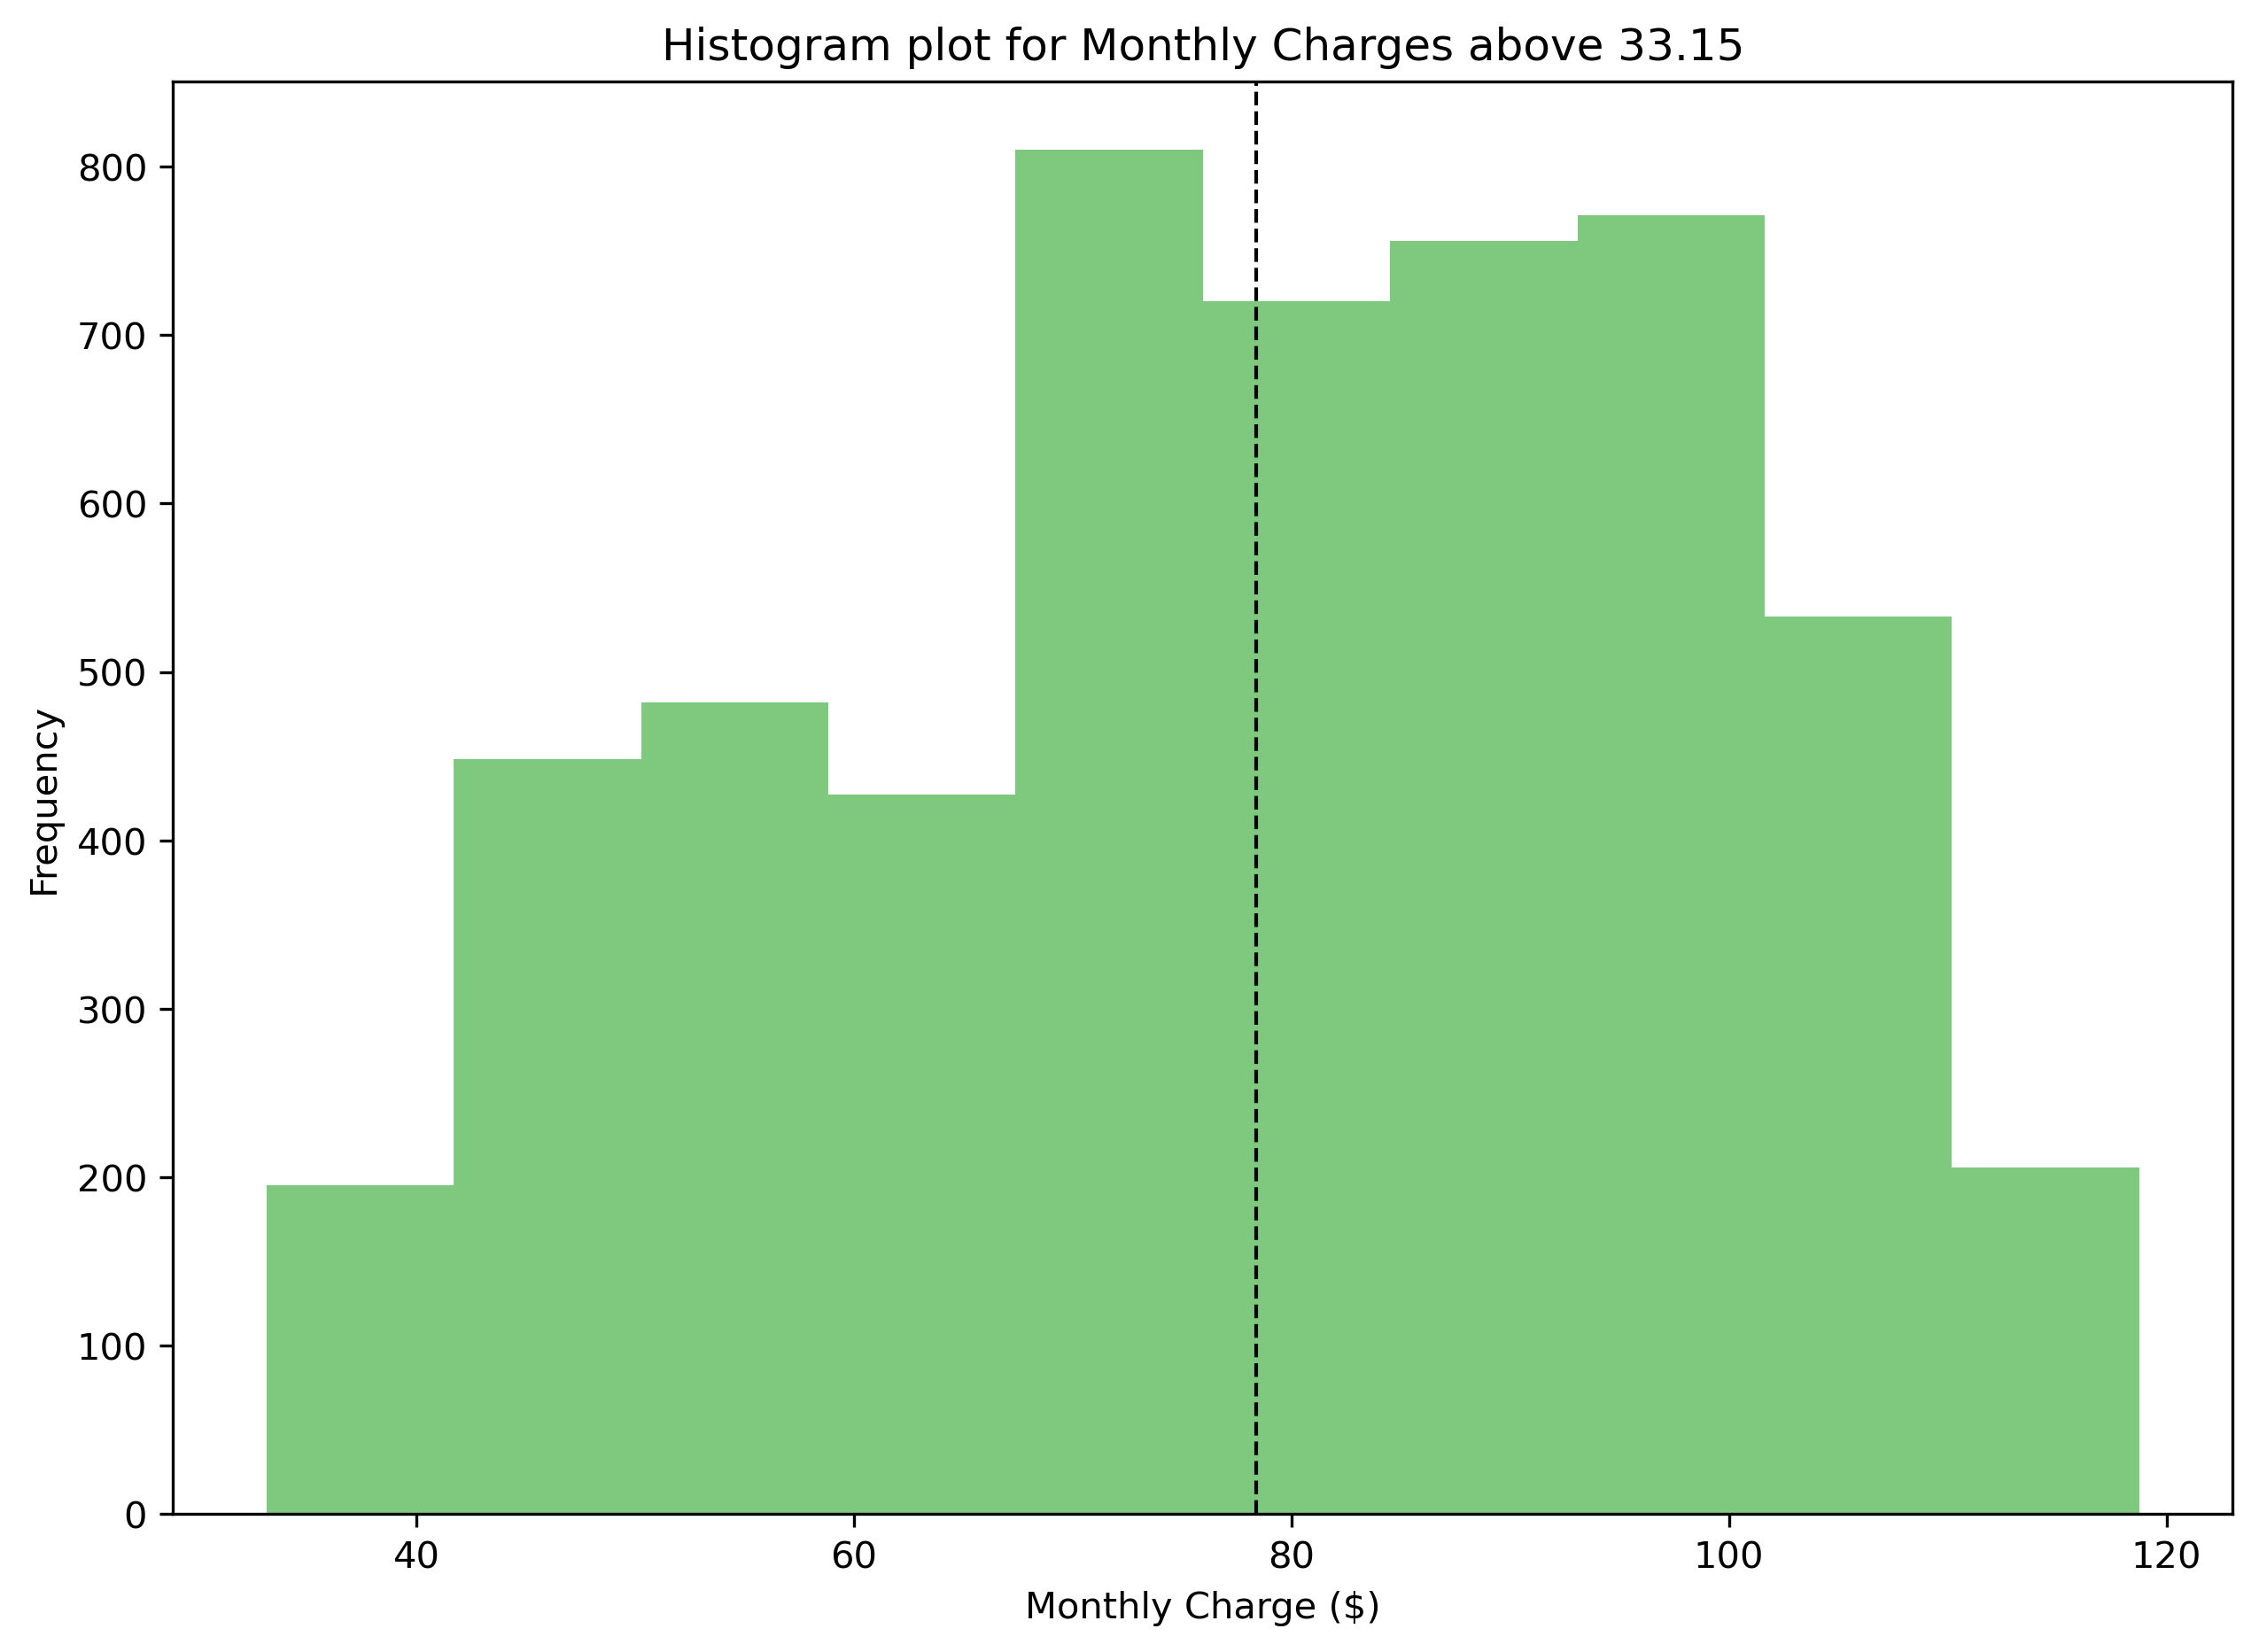

In [36]:
monthly_above = sample[sample['Monthly charge < 33.15']==False]
capstone_utils.df_histogram(monthly_above,"MonthlyCharges",bins=10)
plt.xlabel("Monthly Charge ($)")
plt.title("Histogram plot for Monthly Charges above 33.15")
plt.show()

Referring to the histogram above, without the initial peak the data seems to follow the shape of a normal distribution with a rise and fall in data. The peak seems to be around the 75-80. As noted earlier this price is when customers pay for two or more services. Often it is the Fiber optic and phone line service - however, this can differ. Furthermore, referring back to the scatter plot it was around this price that a large number of customers who churned were clustered. There could be a multitude of reasons for this such as the price being too high compared to competitors or customers did not see the value in paying such a high monthly cost for a poor service - either way these two services had a direct part to play in why these customers churned. 

### Distribution: Total Charges

Before exploring data in the Total charges column, referring back to the correlation plot there was a strong correlation between total charges and tenure as well as total charges as monthly charges. It is easy to understand why there is a correlation between total charges and monthly charges, however, I want to explore what the relationship between tenure and total charges is. Like before, I will split the data up into those who churned and didn't.

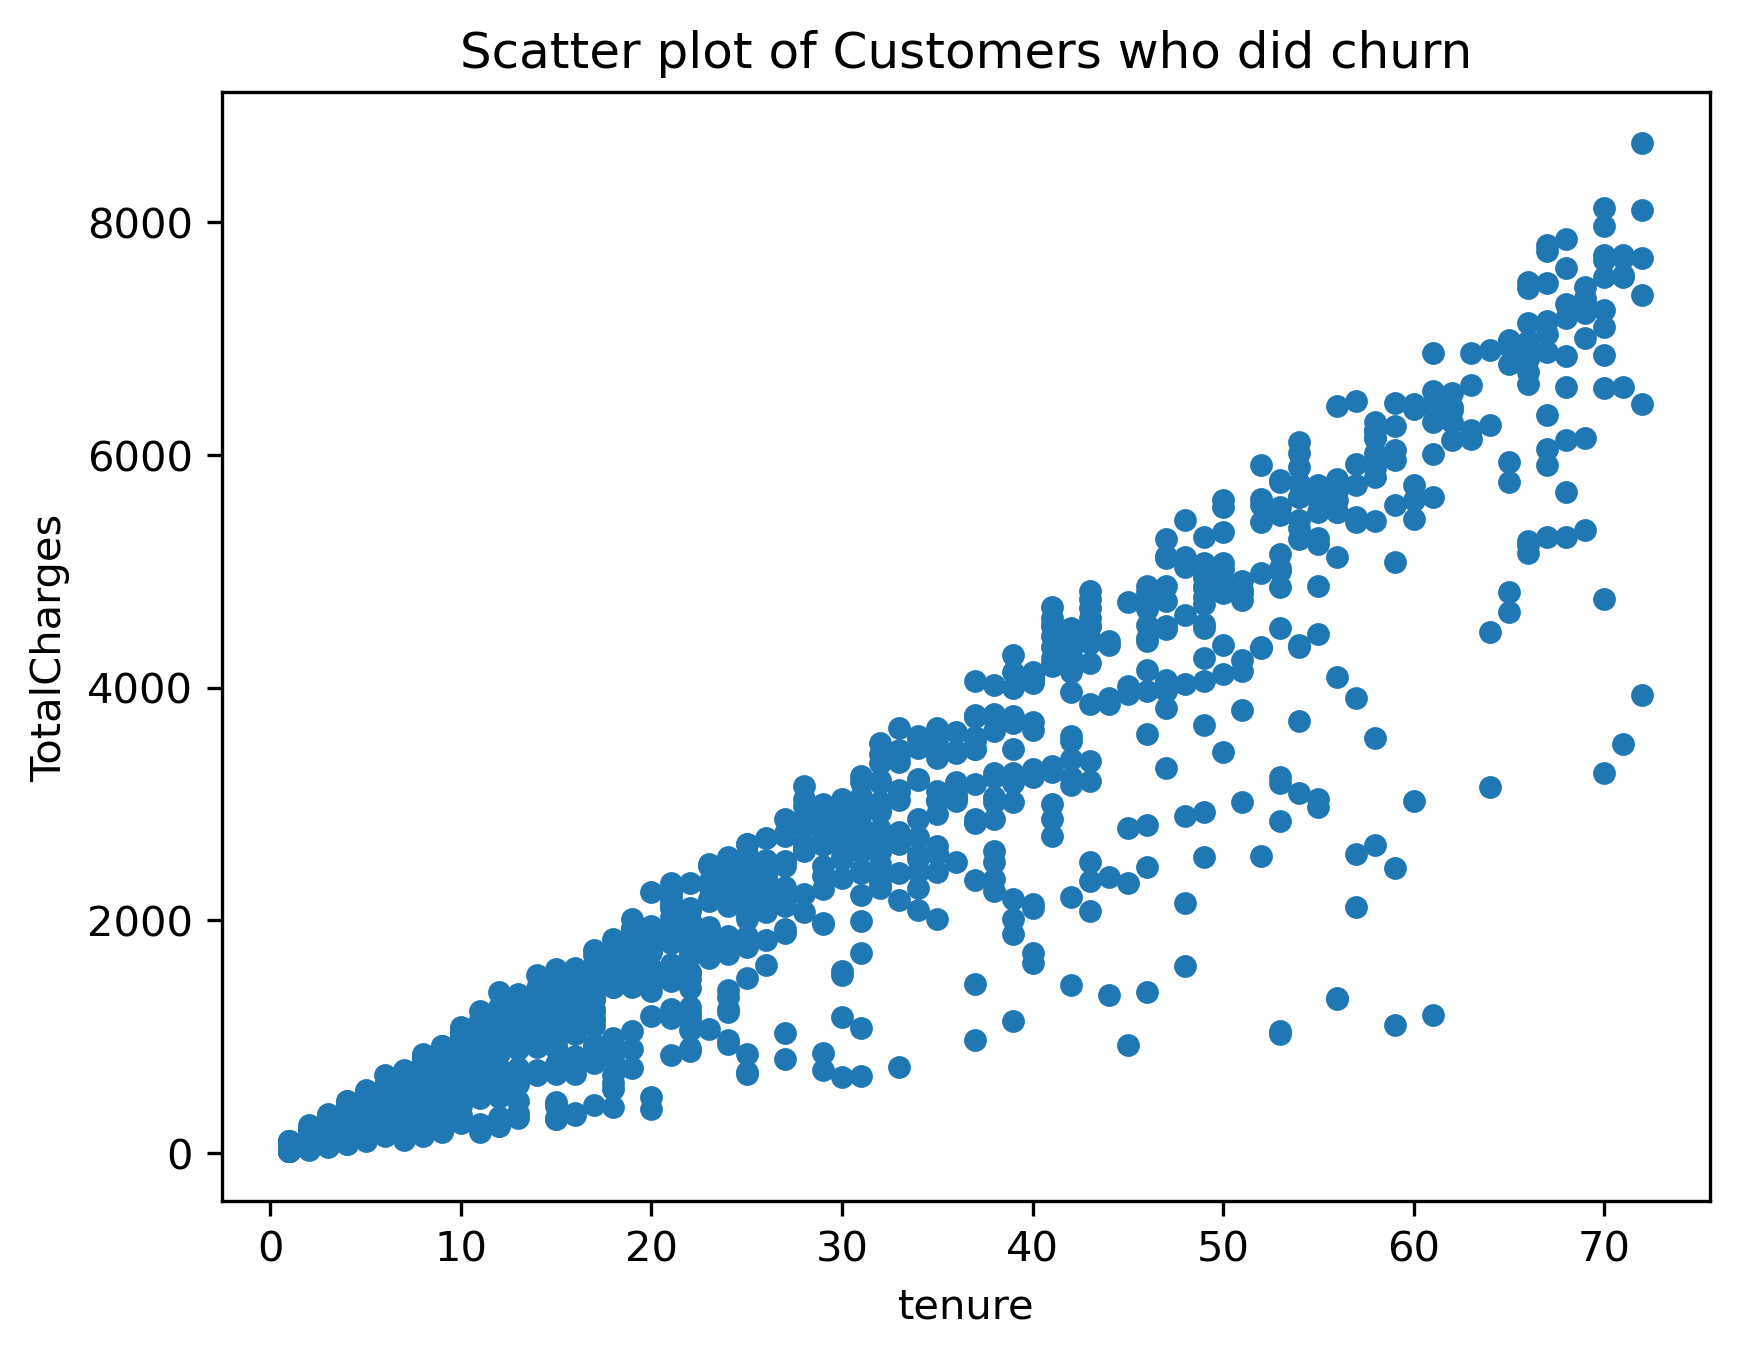

In [37]:
churn.plot.scatter(x='tenure',y='TotalCharges')
plt.title('Scatter plot of Customers who did churn')
plt.show()

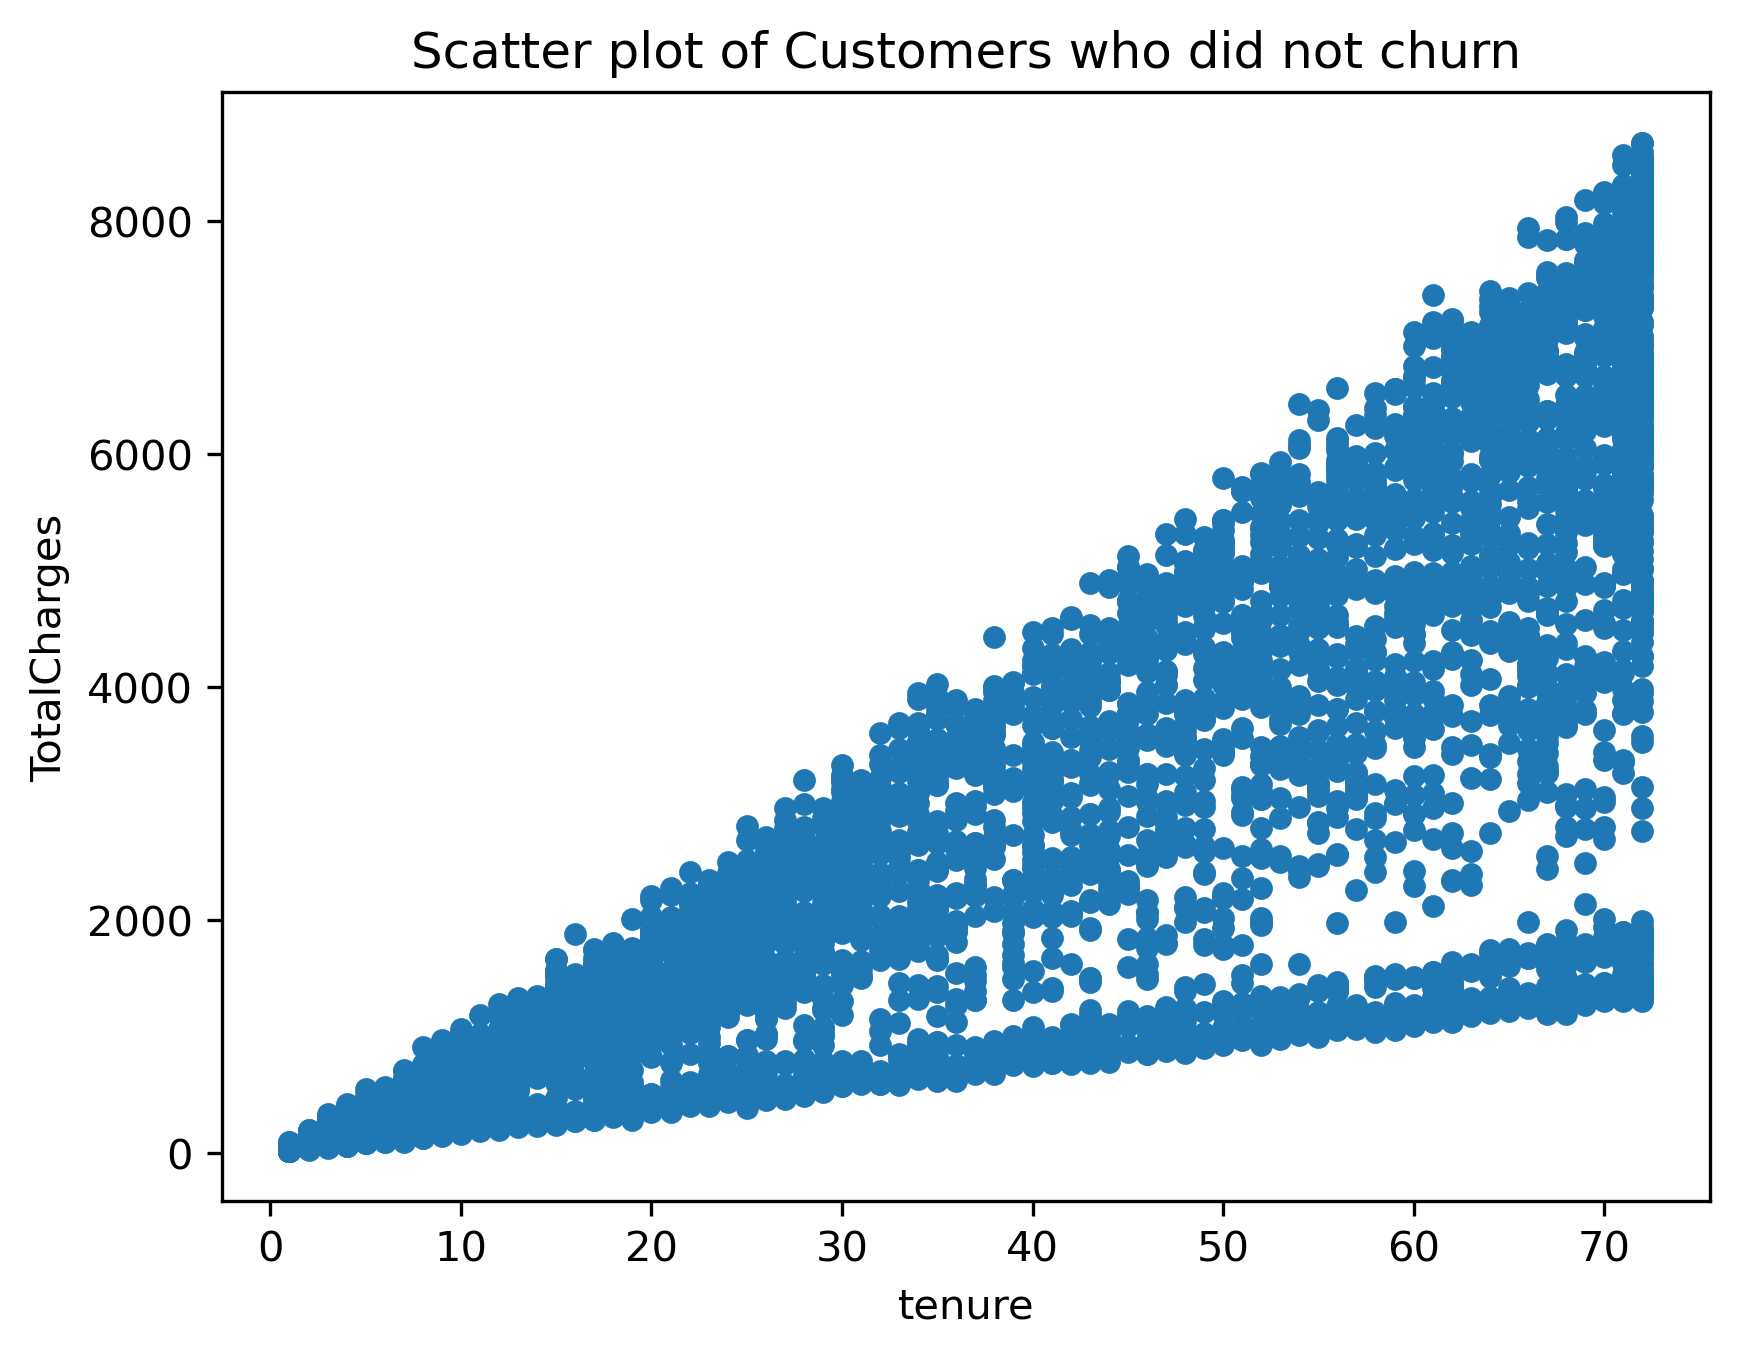

In [38]:
not_churn.plot.scatter(x='tenure',y='TotalCharges')
plt.title('Scatter plot of Customers who did not churn')
plt.show()

Given that total charges is calculated with the value for tenure, it explains the linear trend between the two. However, for customers who did churn it densely populated near the bottom left of the graph. A large population of those who churned did not like spend a lot of money or time at the company before leaving - as expected. On the other hand, for those who did not churn it is much widely populated and it is harder to make an insight. Other than the fact, in the case of the customers who did not churn the relationship between tenure and Totalcharges was not so linear implying that they may have got discounts in price or other promotions which caused them to stay with Telco.

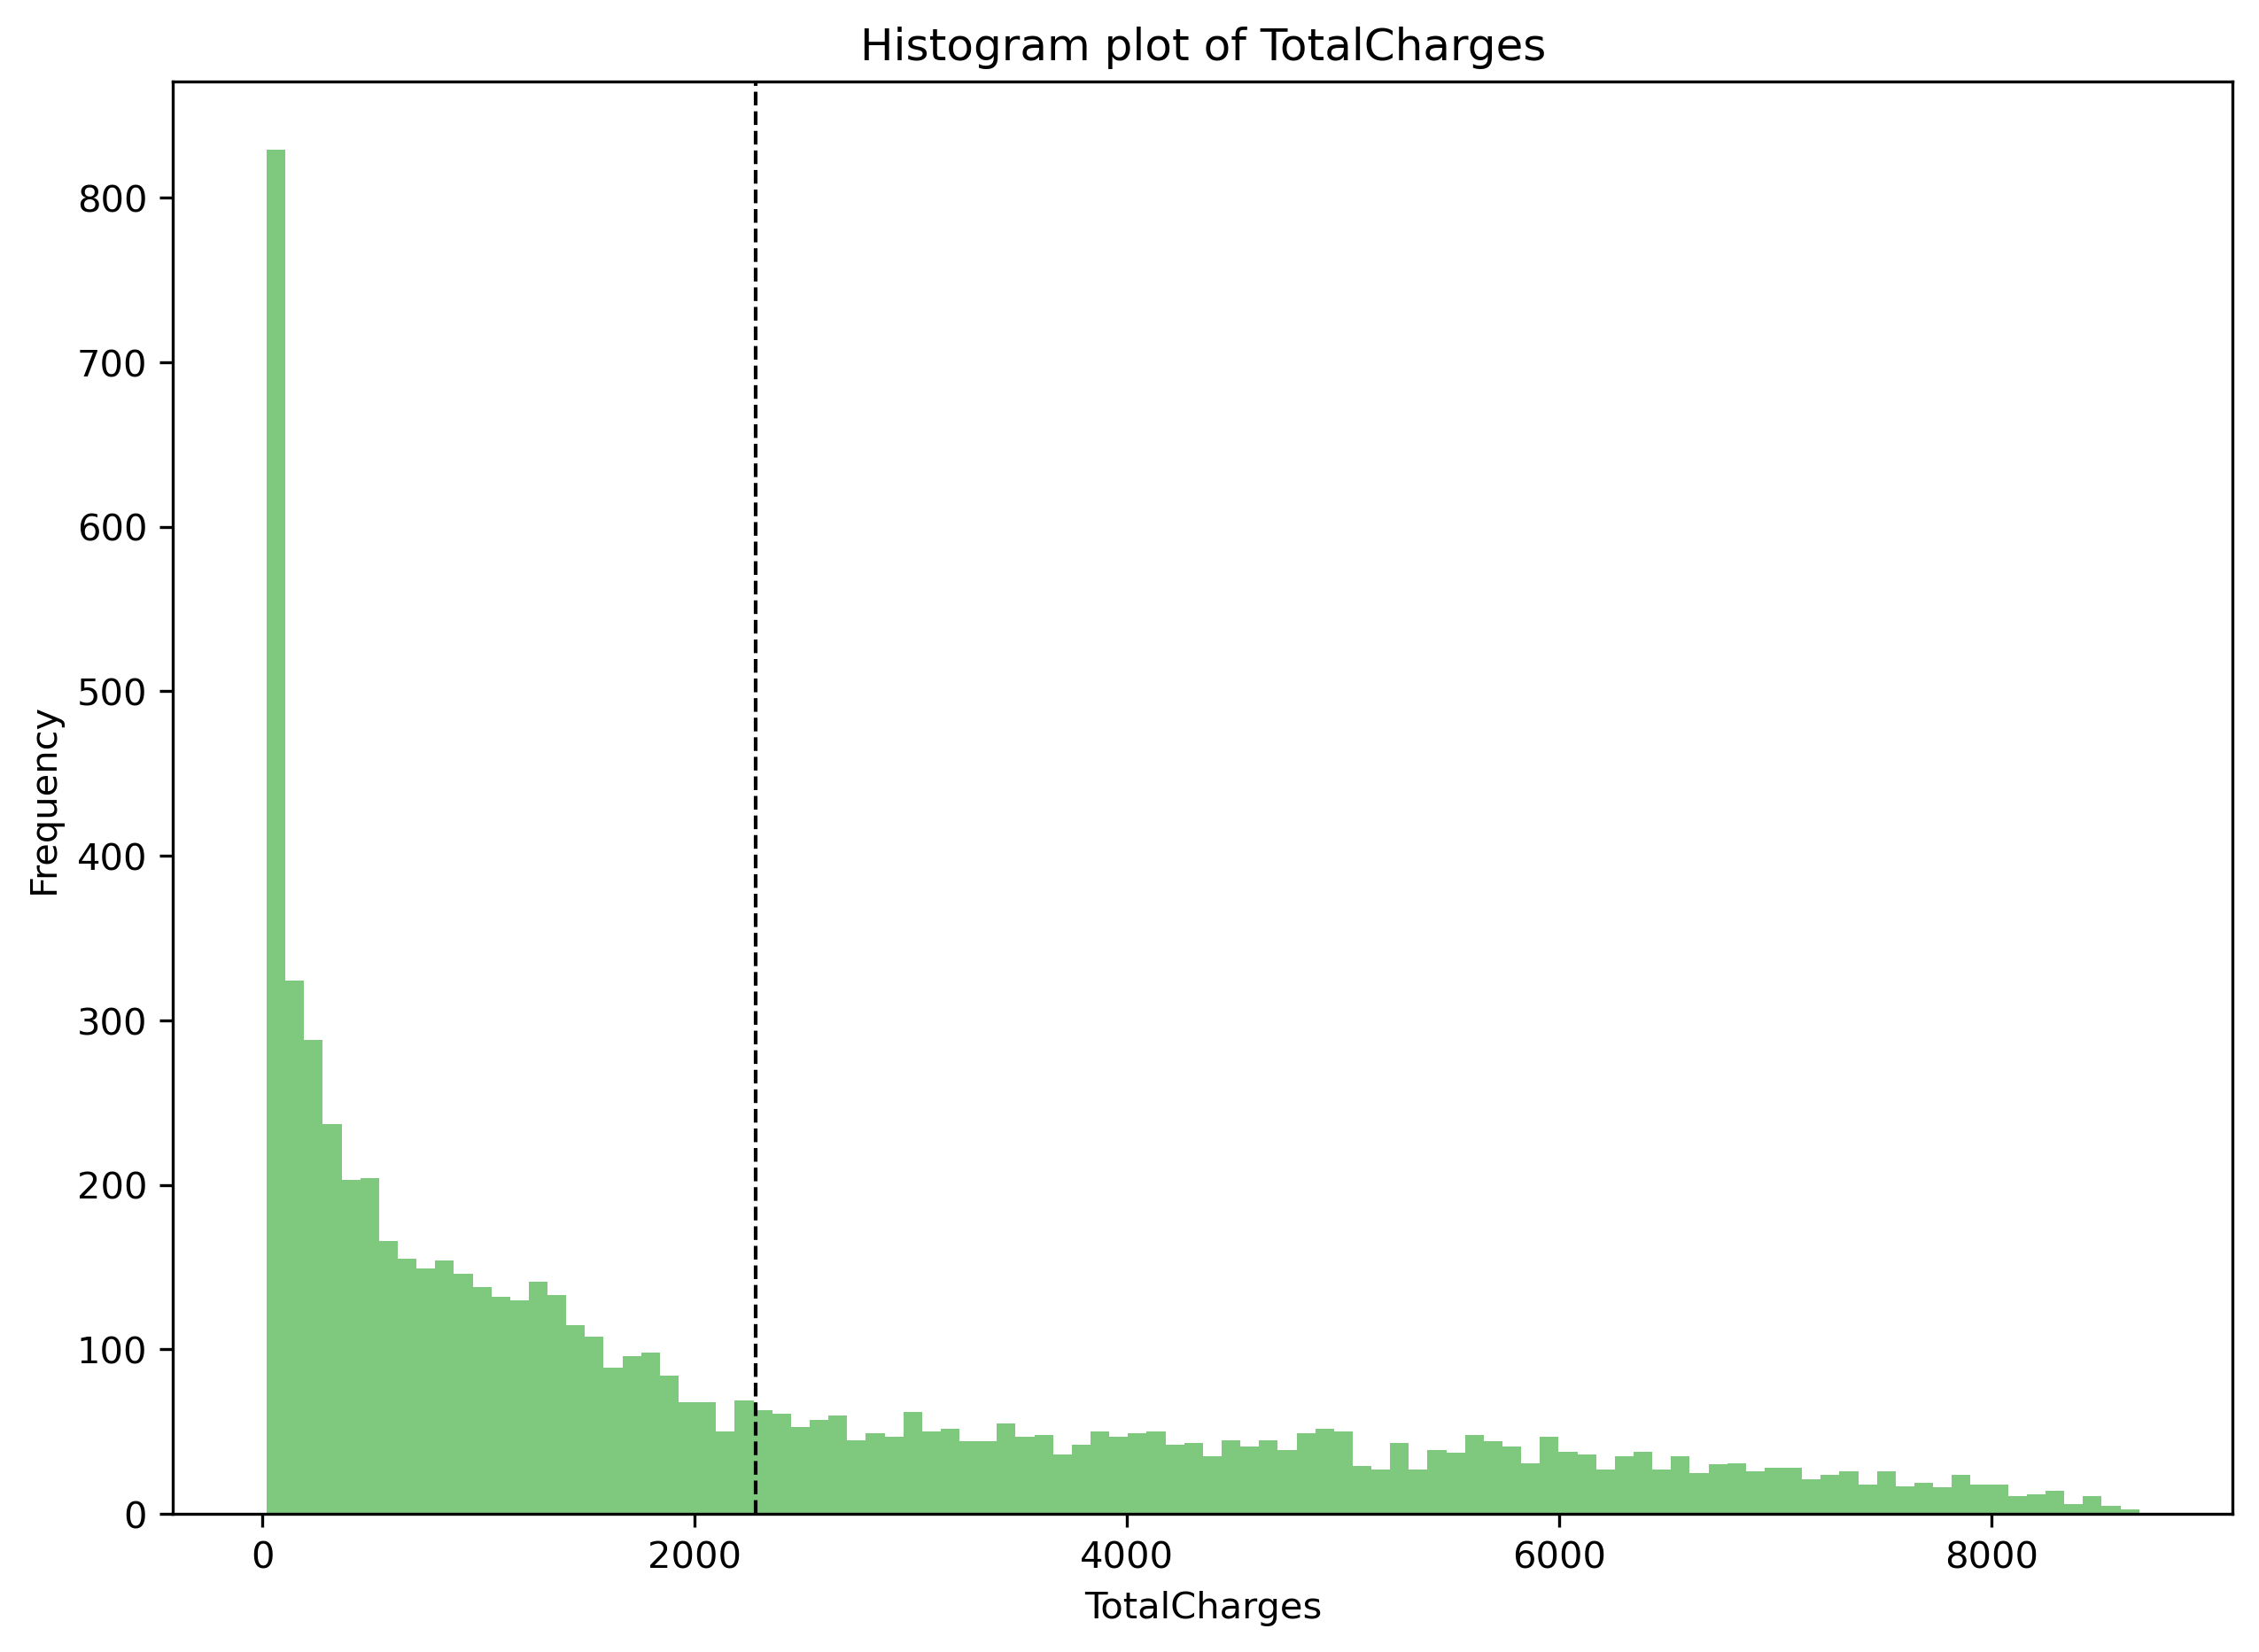

In [39]:
capstone_utils.df_histogram(telco_df, 'TotalCharges', bins = 100)

Referring to the histogram plot on total charges it seems that the total charges is skewed to one side. I want to determine why. The range of total charges is massive going from 0 to 8684, let's delve further. 

In [40]:
capstone_utils.boxplot(telco_df, "Churn", "TotalCharges")

<Figure size 2700x4500 with 0 Axes>

In case plotly doesn't generate.

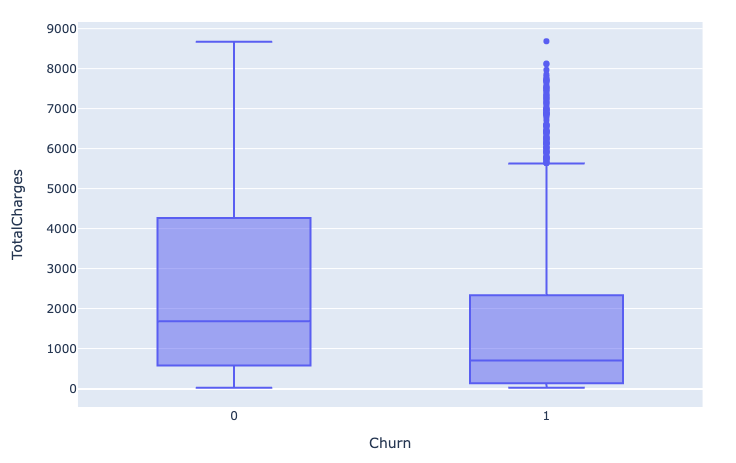

Looking at the data on the boxplots of churn against totalcharges, contrary to my assumptions made about the dataset those who did churn spent much lower in total than those who did not churn. However, there are many more outliers in the data for those who did churn compared to those who didn't. The smaller box of those who did churn implies that those who did churn spent on total similar amounts compared with the larger box of those who did not churn. I wanted to understand why the interquartile range was much smaller for those who churned compared to those who didn't.


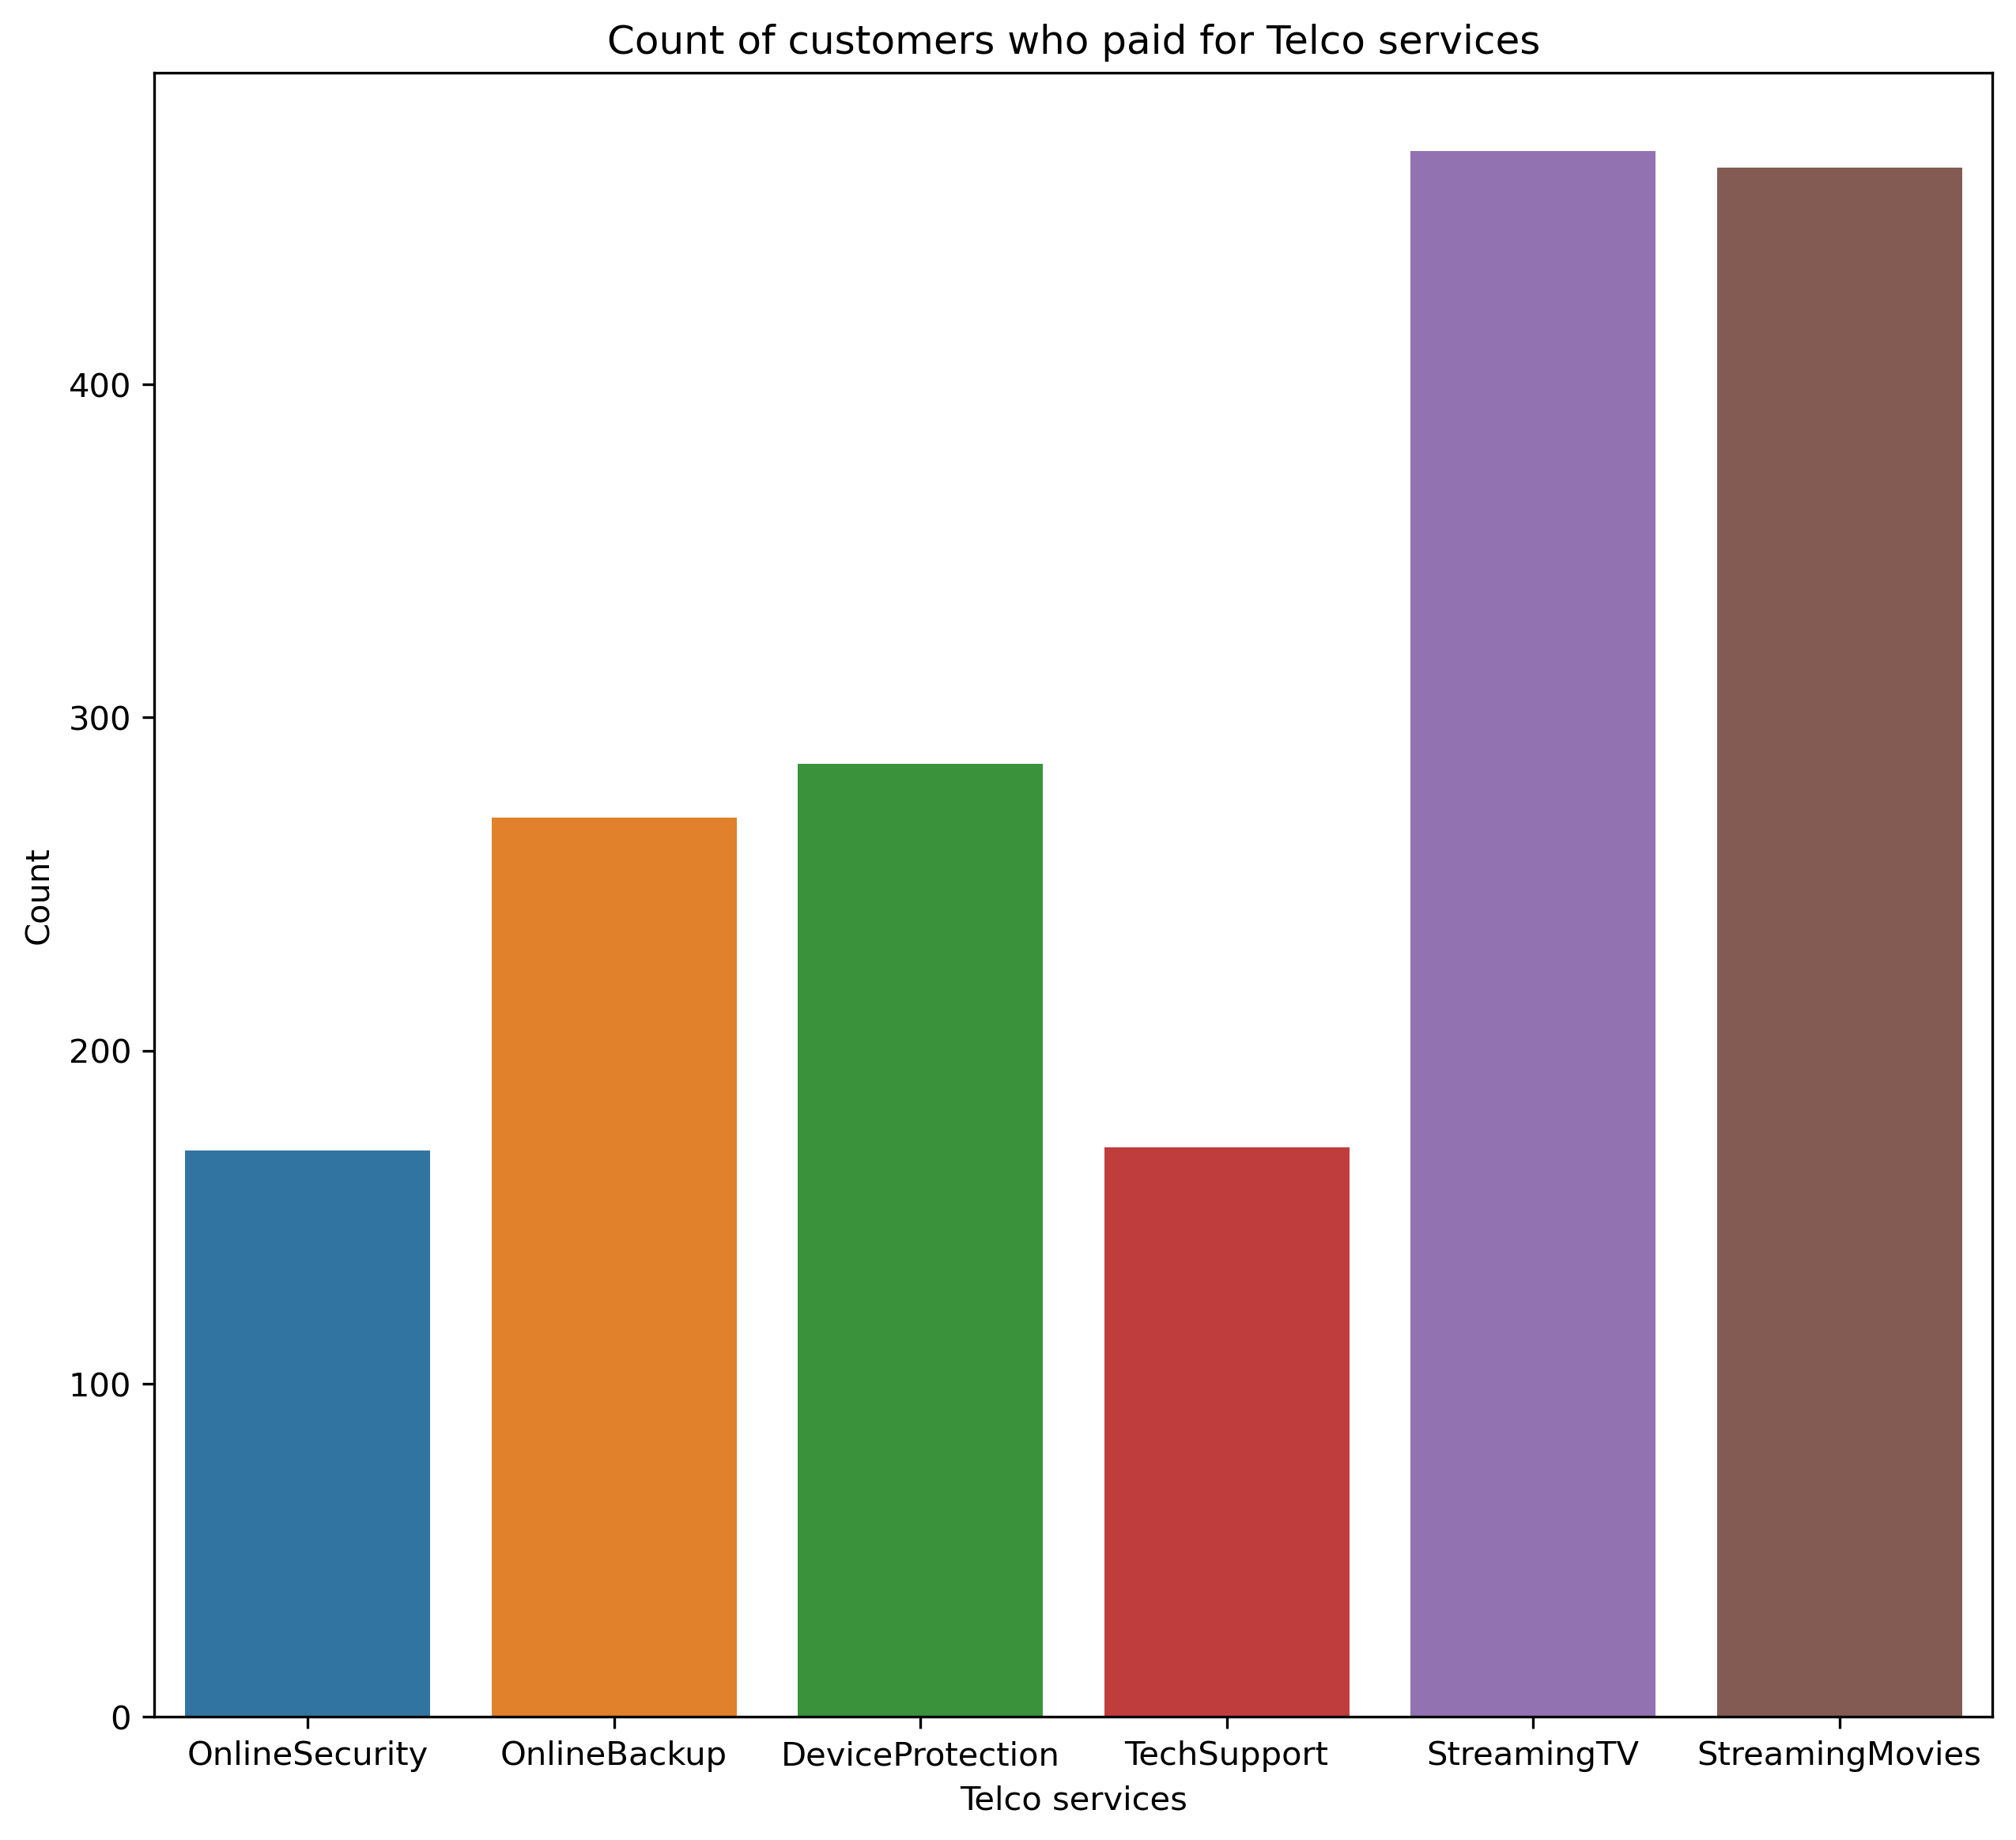

In [41]:
totalcharges_churn = telco_df[(telco_df['TotalCharges']>18.85)&(telco_df['TotalCharges']<2332.3)&(telco_df['Churn']==1)].copy()
capstone_utils.services_count(totalcharges_churn)

A large proportion of the people who churned within this range of total charges paid for fiber optic, the most expensive option for internet but did not seem to spend more money on other services provided by the company such as Online protection, Online back up etc. This provides context as to why the range of charges is so low and why they also churned. Customers were not paying for any other services hence they had no reason to stay with Telco as they did not obtain any satisfaction from other serivices. Finally, this could explain the skew in the histogram plot as this meant that a large proportion of these low charges were made by people who churned. Furthermore, previous analysis of my dataset shows that customers who had month-to-month contracts were paying more compared to those on one year or two year contracts, which is to be expected. 

### Distribution: Senior Citizen

As noted earlier, the SeniorCitizen and Churn column are the only columns which have been binarised hence why I have not plot that column as a histogram as this would not accurately visualise the data. 

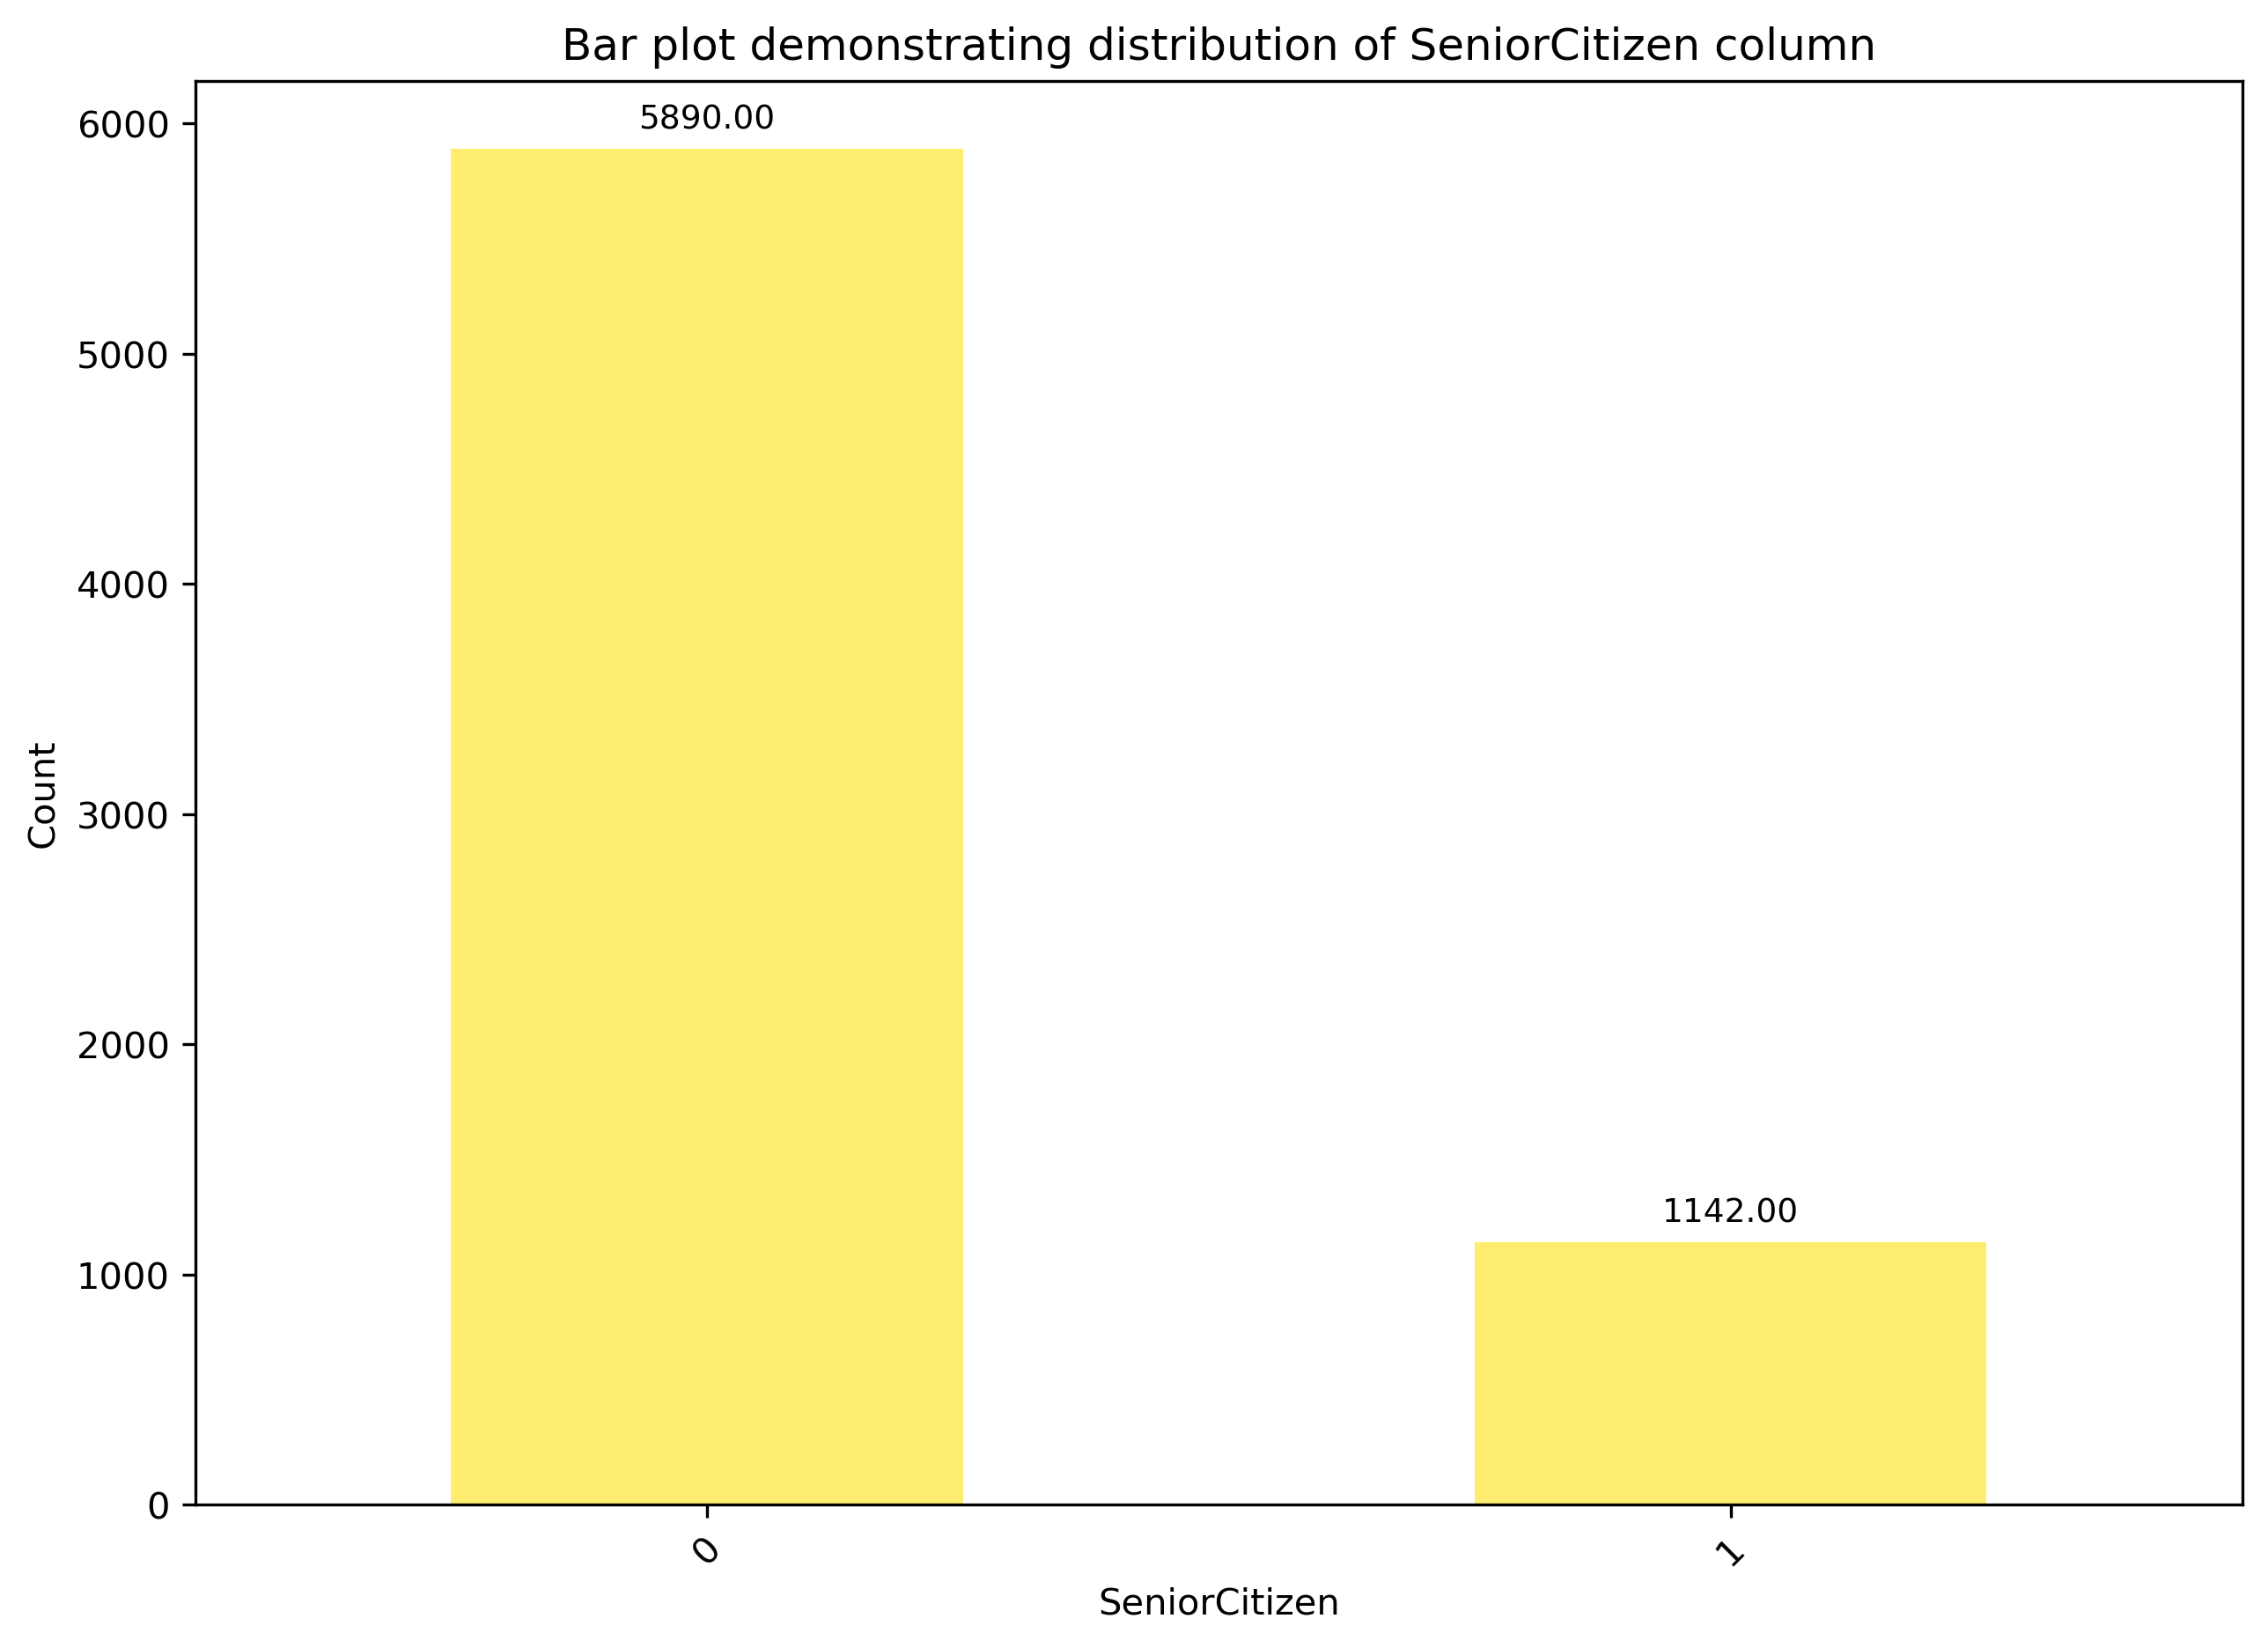

In [42]:
capstone_utils.bar_plot_count(telco_df, "SeniorCitizen", colormap='Set3_r')

From the bar plot above, it seems that there are a larger number of the customers are younger than 65. This could be explained by the fact that elderly people have a tendency to be stuck in their ways and use the technology they are used to. In general, elderly people tend to be more technically literate than other members of the population so they don't feel the need in acquiring technology services such as Internet or Online Security etc.

I created a function that automated the process for plotting the distribution of the churn in binary columns - which I will use for the following analyis on the columns.

Furthermore, given that it is hard to grasp the proportion of churn from a bar chart, I also created a function that calculates and outputs that for you.

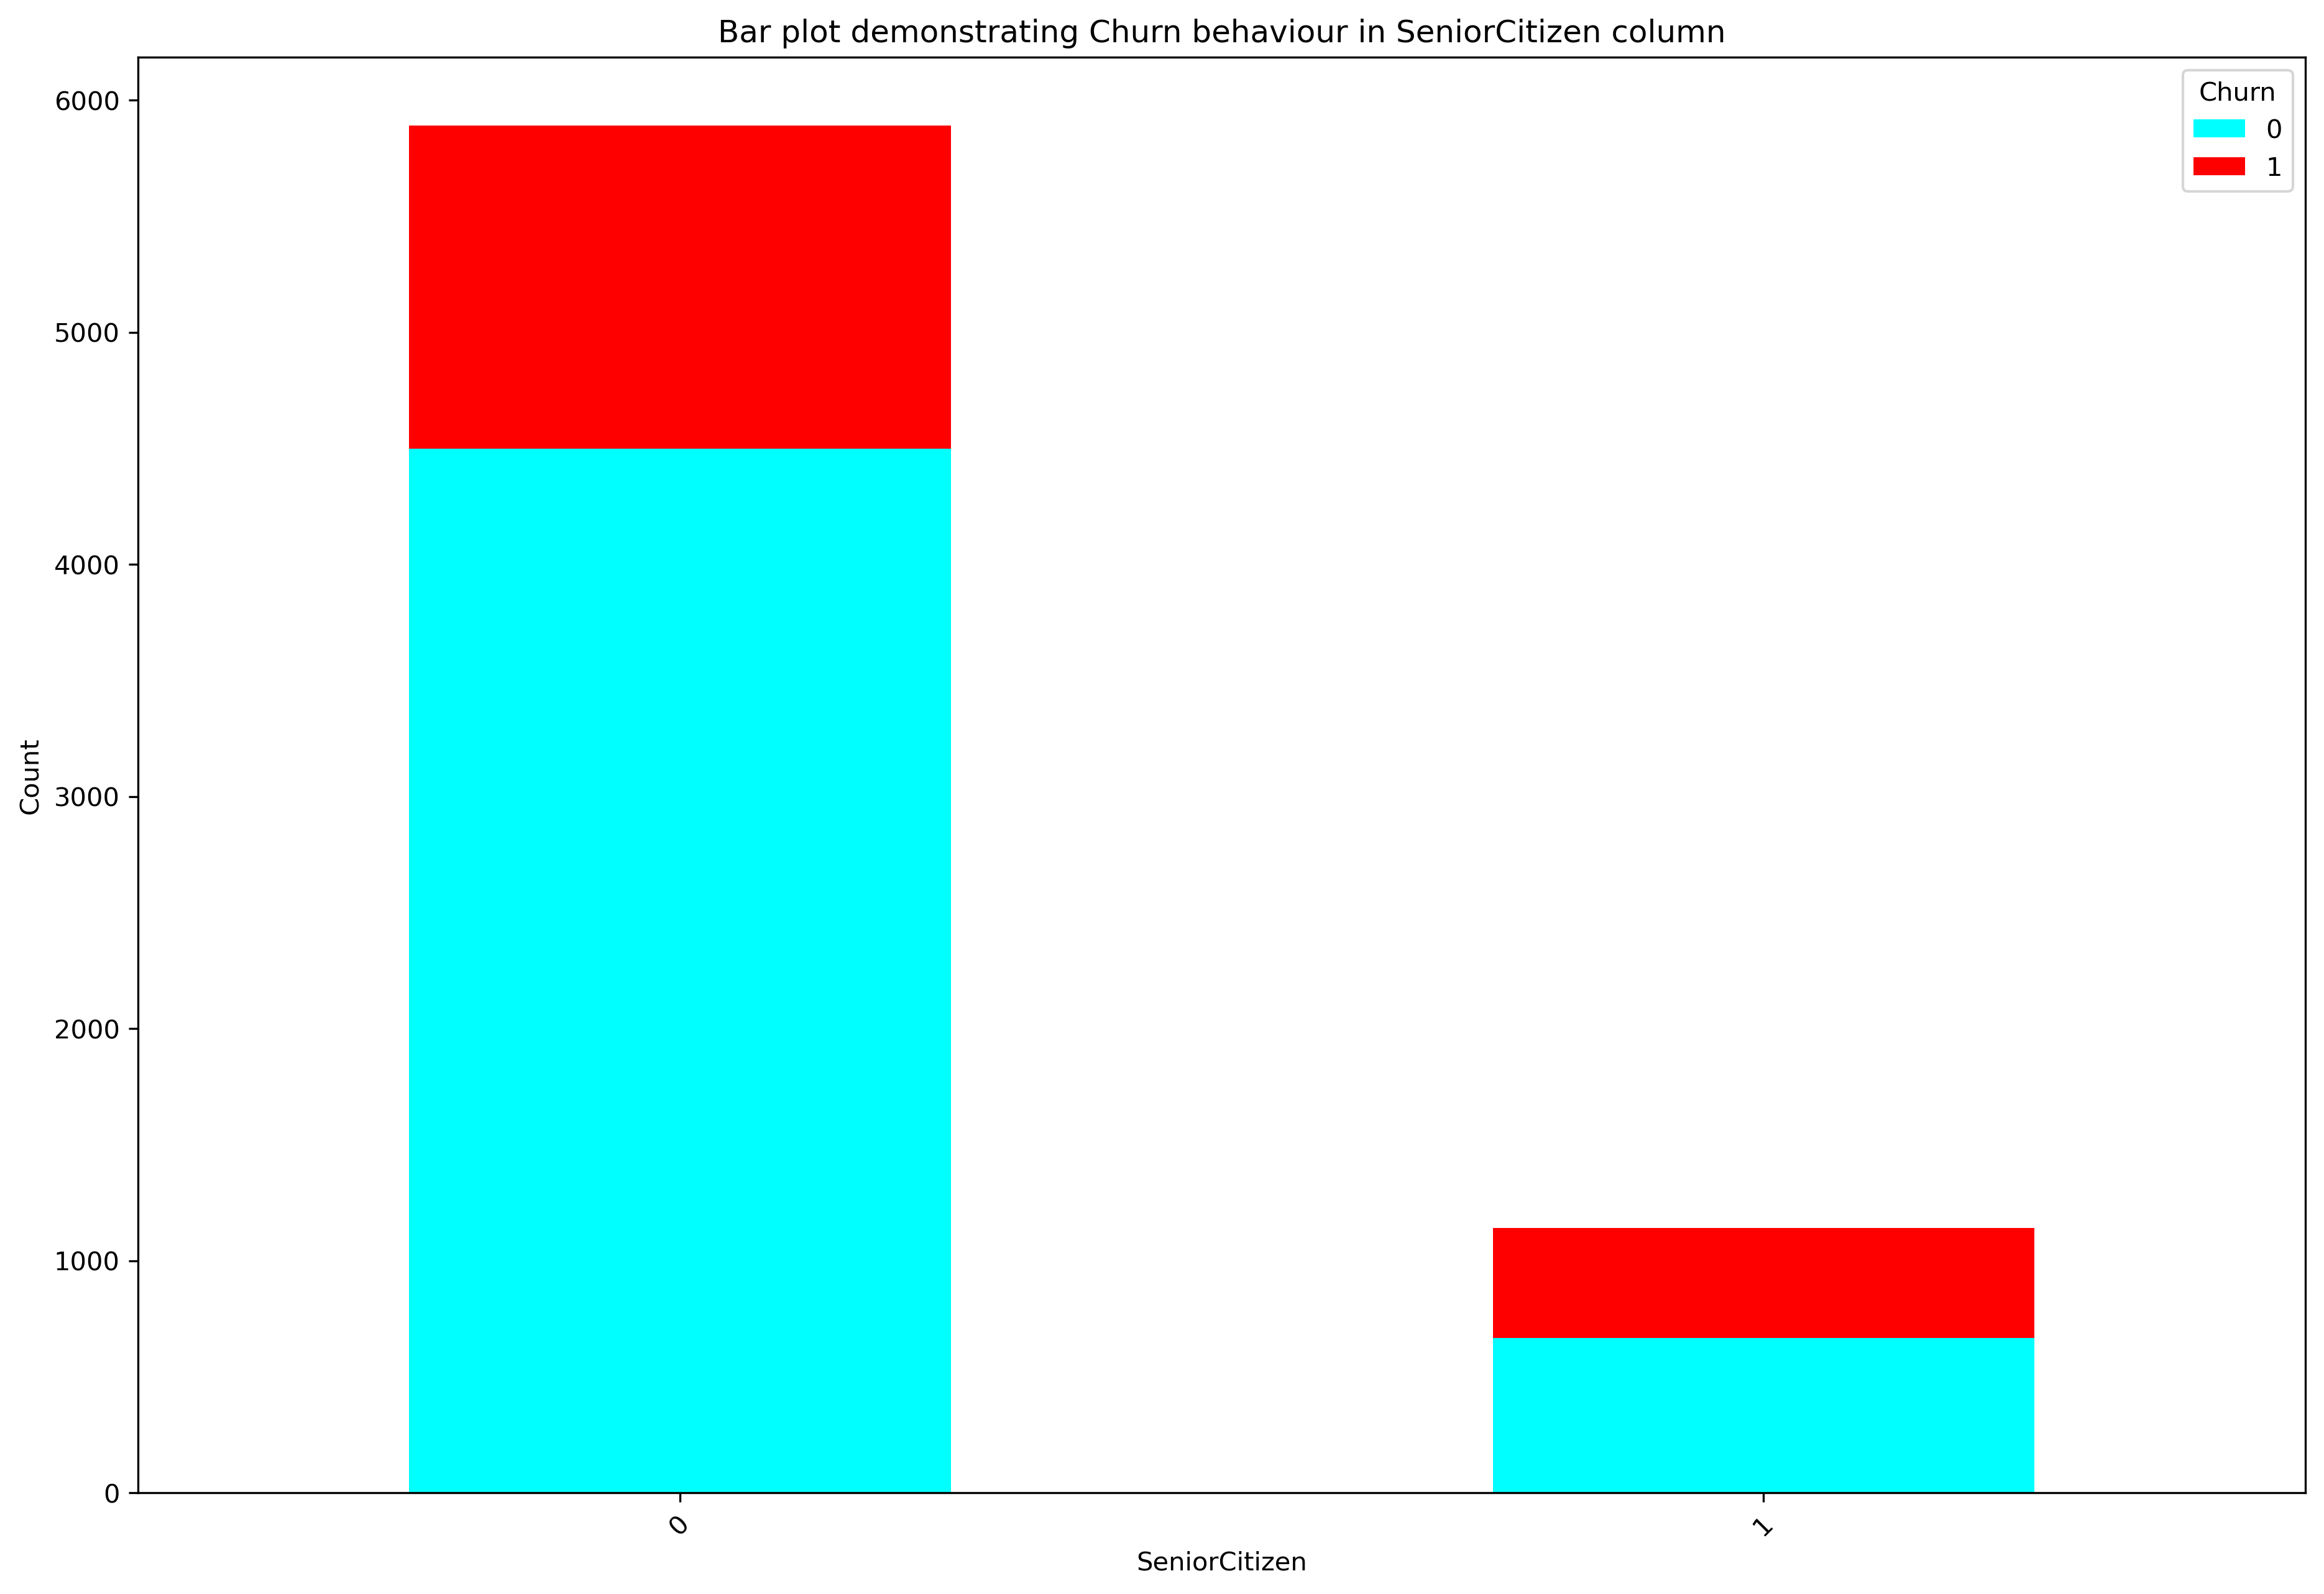

In [43]:
capstone_utils.plot_stacked_dist(telco_df,'SeniorCitizen')

In [44]:
capstone_utils.churn_percentage(telco_df,'SeniorCitizen')

SeniorCitizen
{0: 23.7, 1: 41.7}


Looking at the bar plot above, my assumptions were incorrect about the Senior Citizen. I assumed that people above the age of 65 were technicall illiterate and this would cause them to not churn as they would not want to go through the process of leaving and trying to find another provider. I also assumed that those who were 65 or older would just need a basic service such as a phone line and on the rare chance internet service as this is what they are used to. However, looking at the data - Senior Citizens churned at a much higher rate - at 42%, compared to those who weren't - 24%.

I wanted to delve further into this to see if I could gain any insights into why they may have churned.

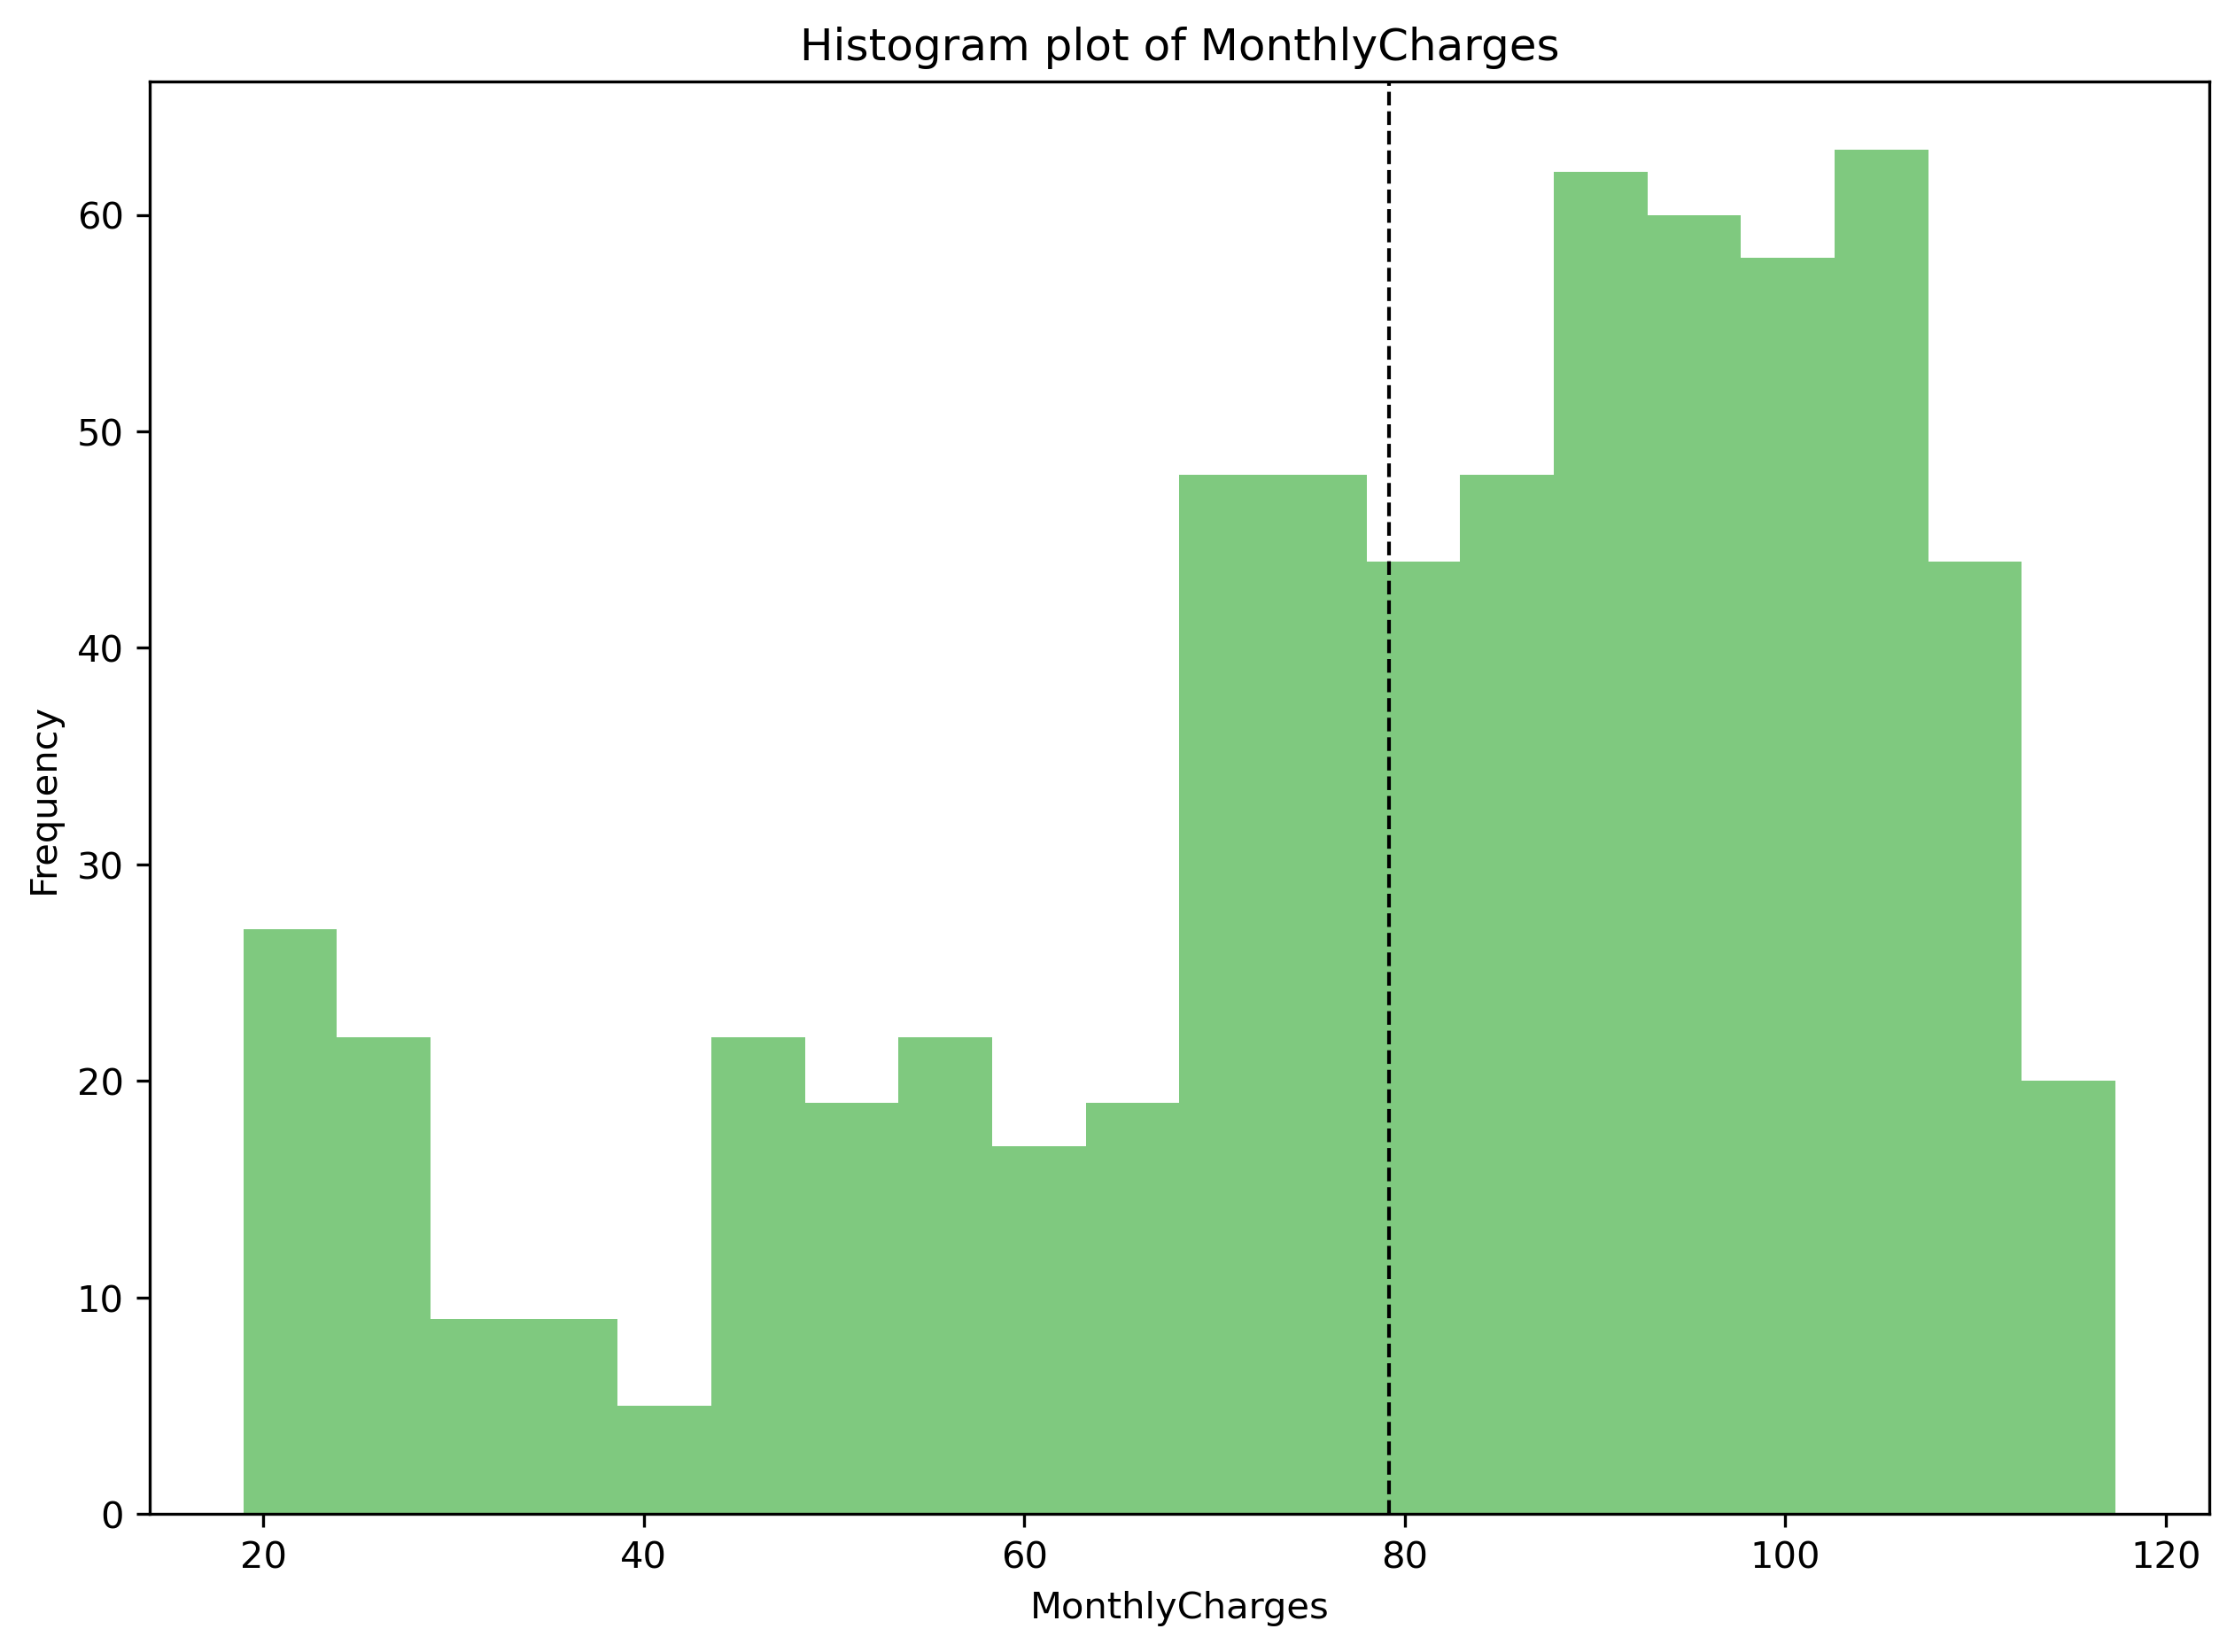

In [45]:
senior_not_churn = telco_df[(telco_df['SeniorCitizen']==1)&(telco_df['Churn']==0)]

capstone_utils.df_histogram(senior_not_churn, "MonthlyCharges", bins = 20)

The above histogram visualises the data when for customers who are not senior citizens and don't churn. I wanted to plot this histogram to provide a comparison to the below histogram. 

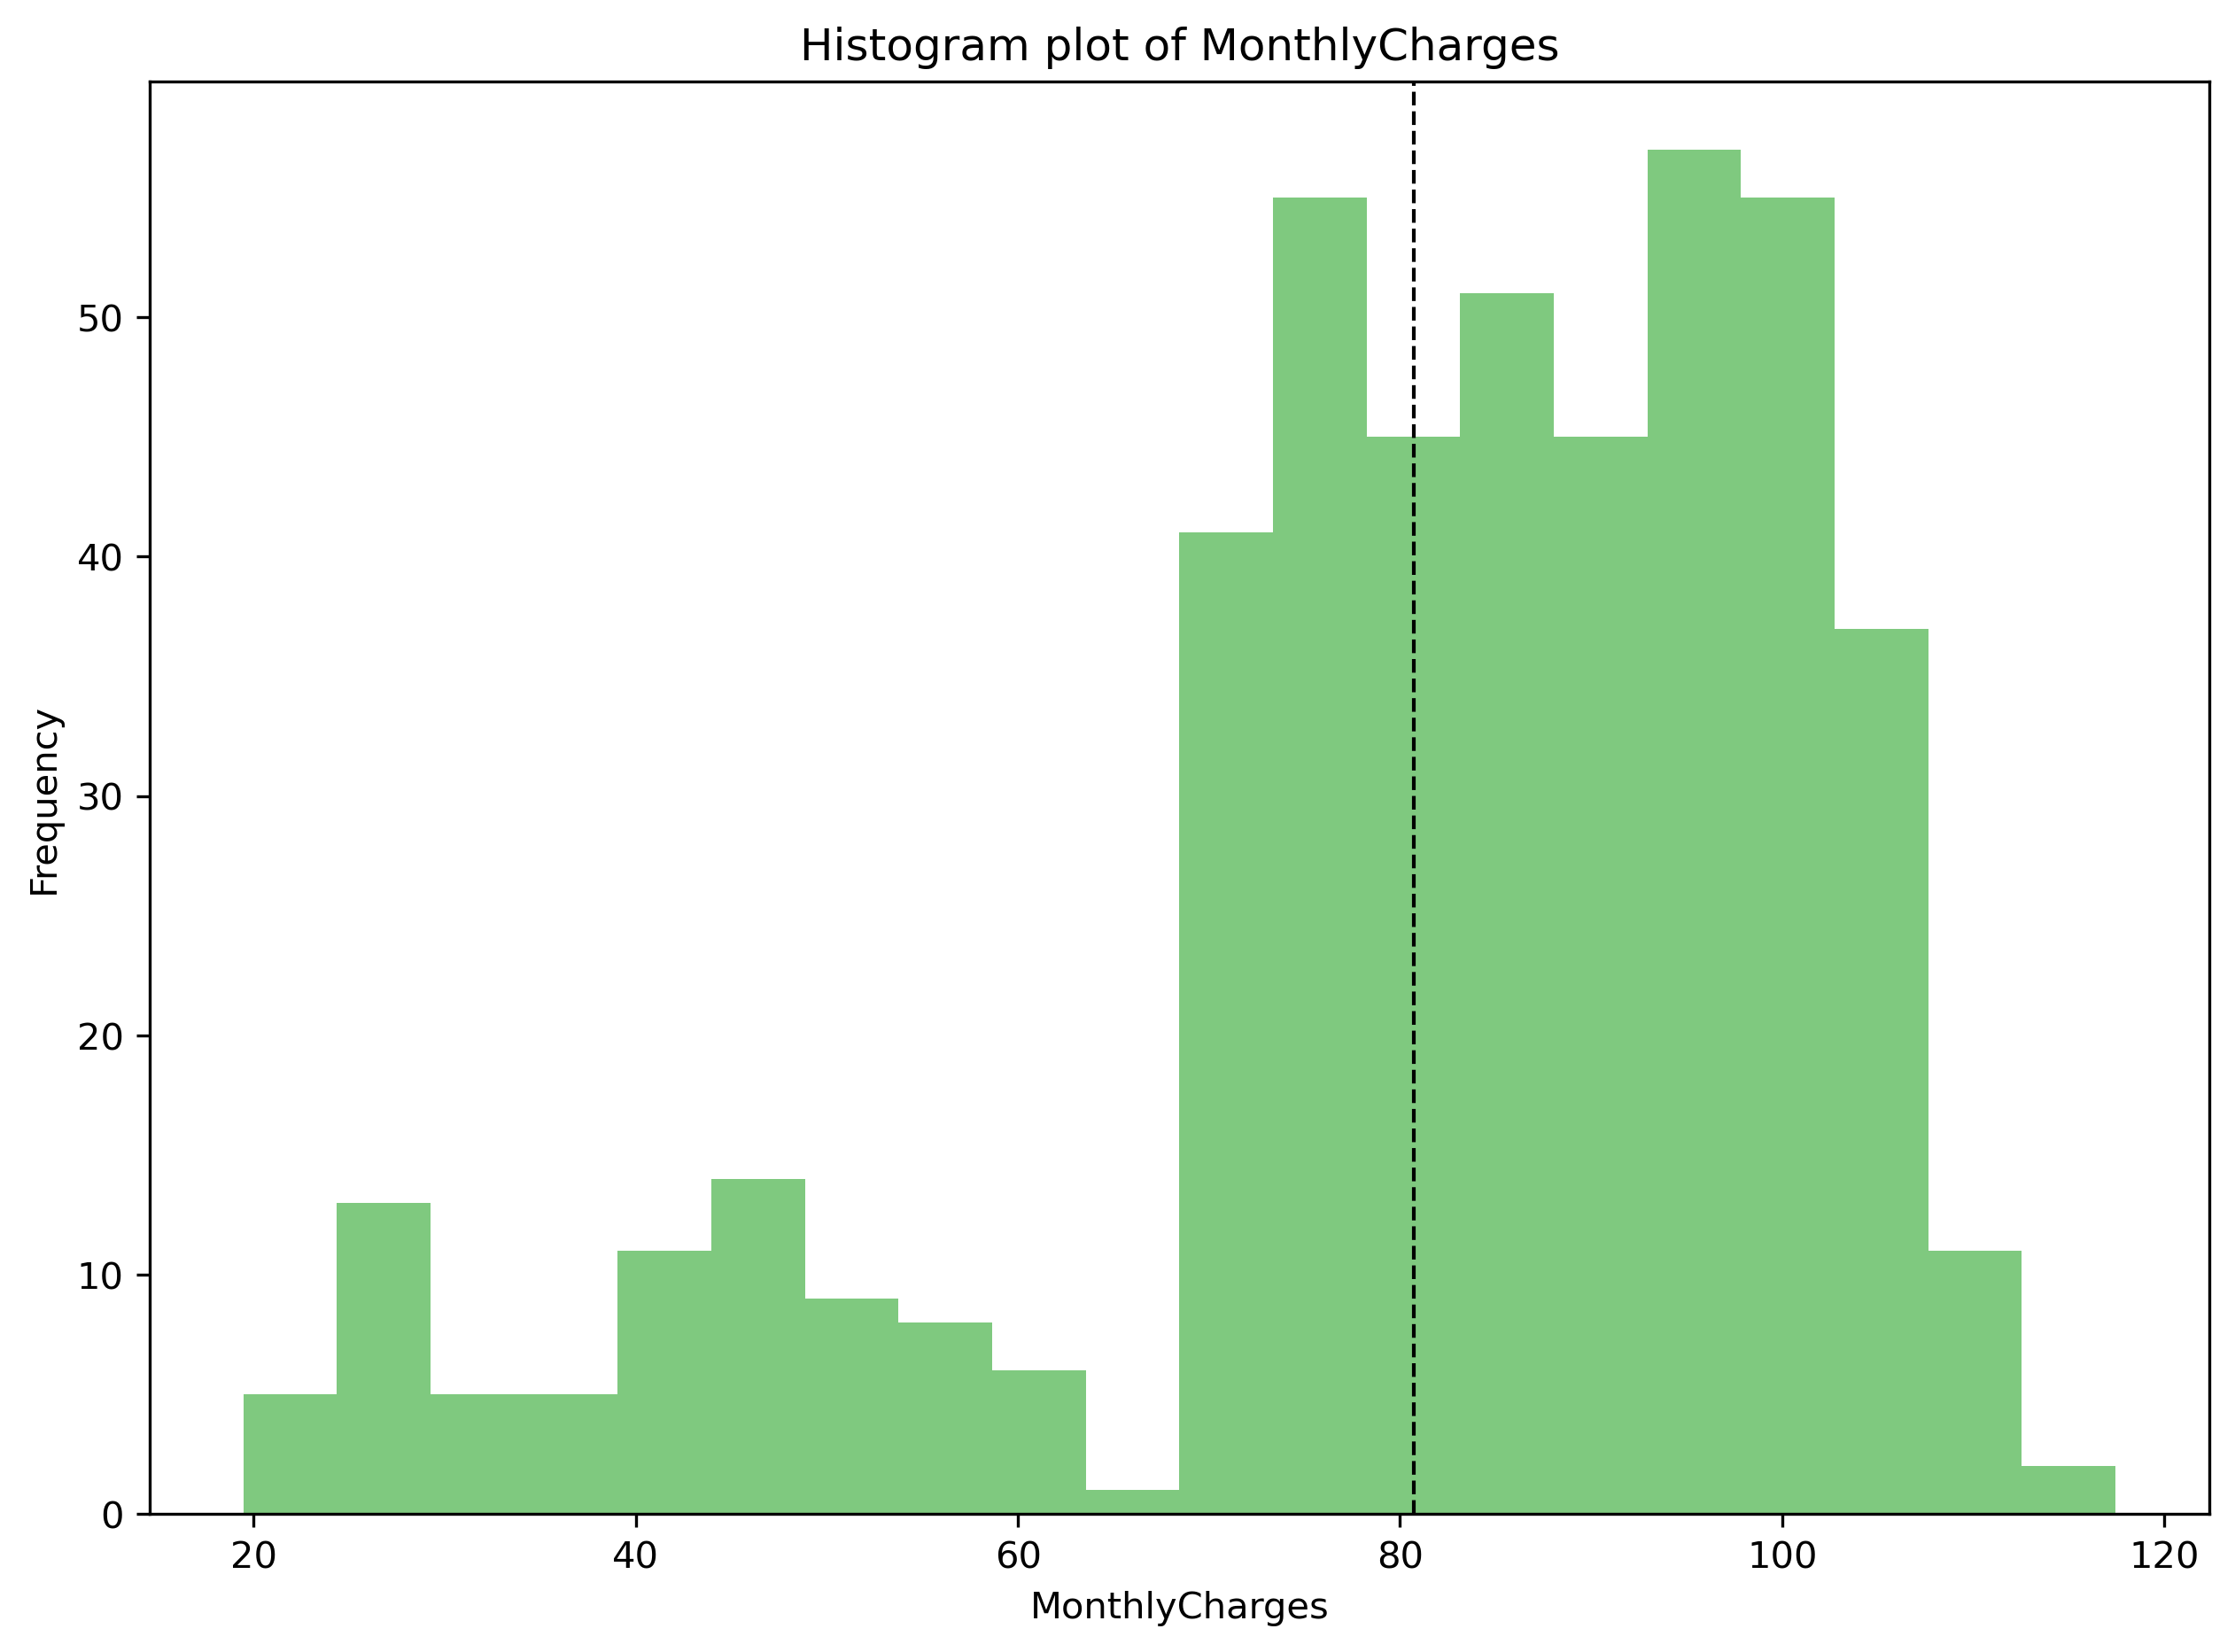

In [46]:
senior_churn = telco_df[(telco_df['SeniorCitizen']==1)&(telco_df['Churn']==1)]

capstone_utils.df_histogram(senior_churn, "MonthlyCharges", bins = 20)

Price is one of the biggest reasons why a person will churn and referring to the histogram there is peak around $80 for those senior citizen customers who churned. However, looking at the graph it is hard to see much of a difference given that the average monthly charge is very similar for both. For senior citizens who didn't churn the histogram seems to be less concentrated and more spread out. 

Price does not explain any patterns of behaviour, I will look into the services they paid for to determine if they were not happy with what was being provided. 

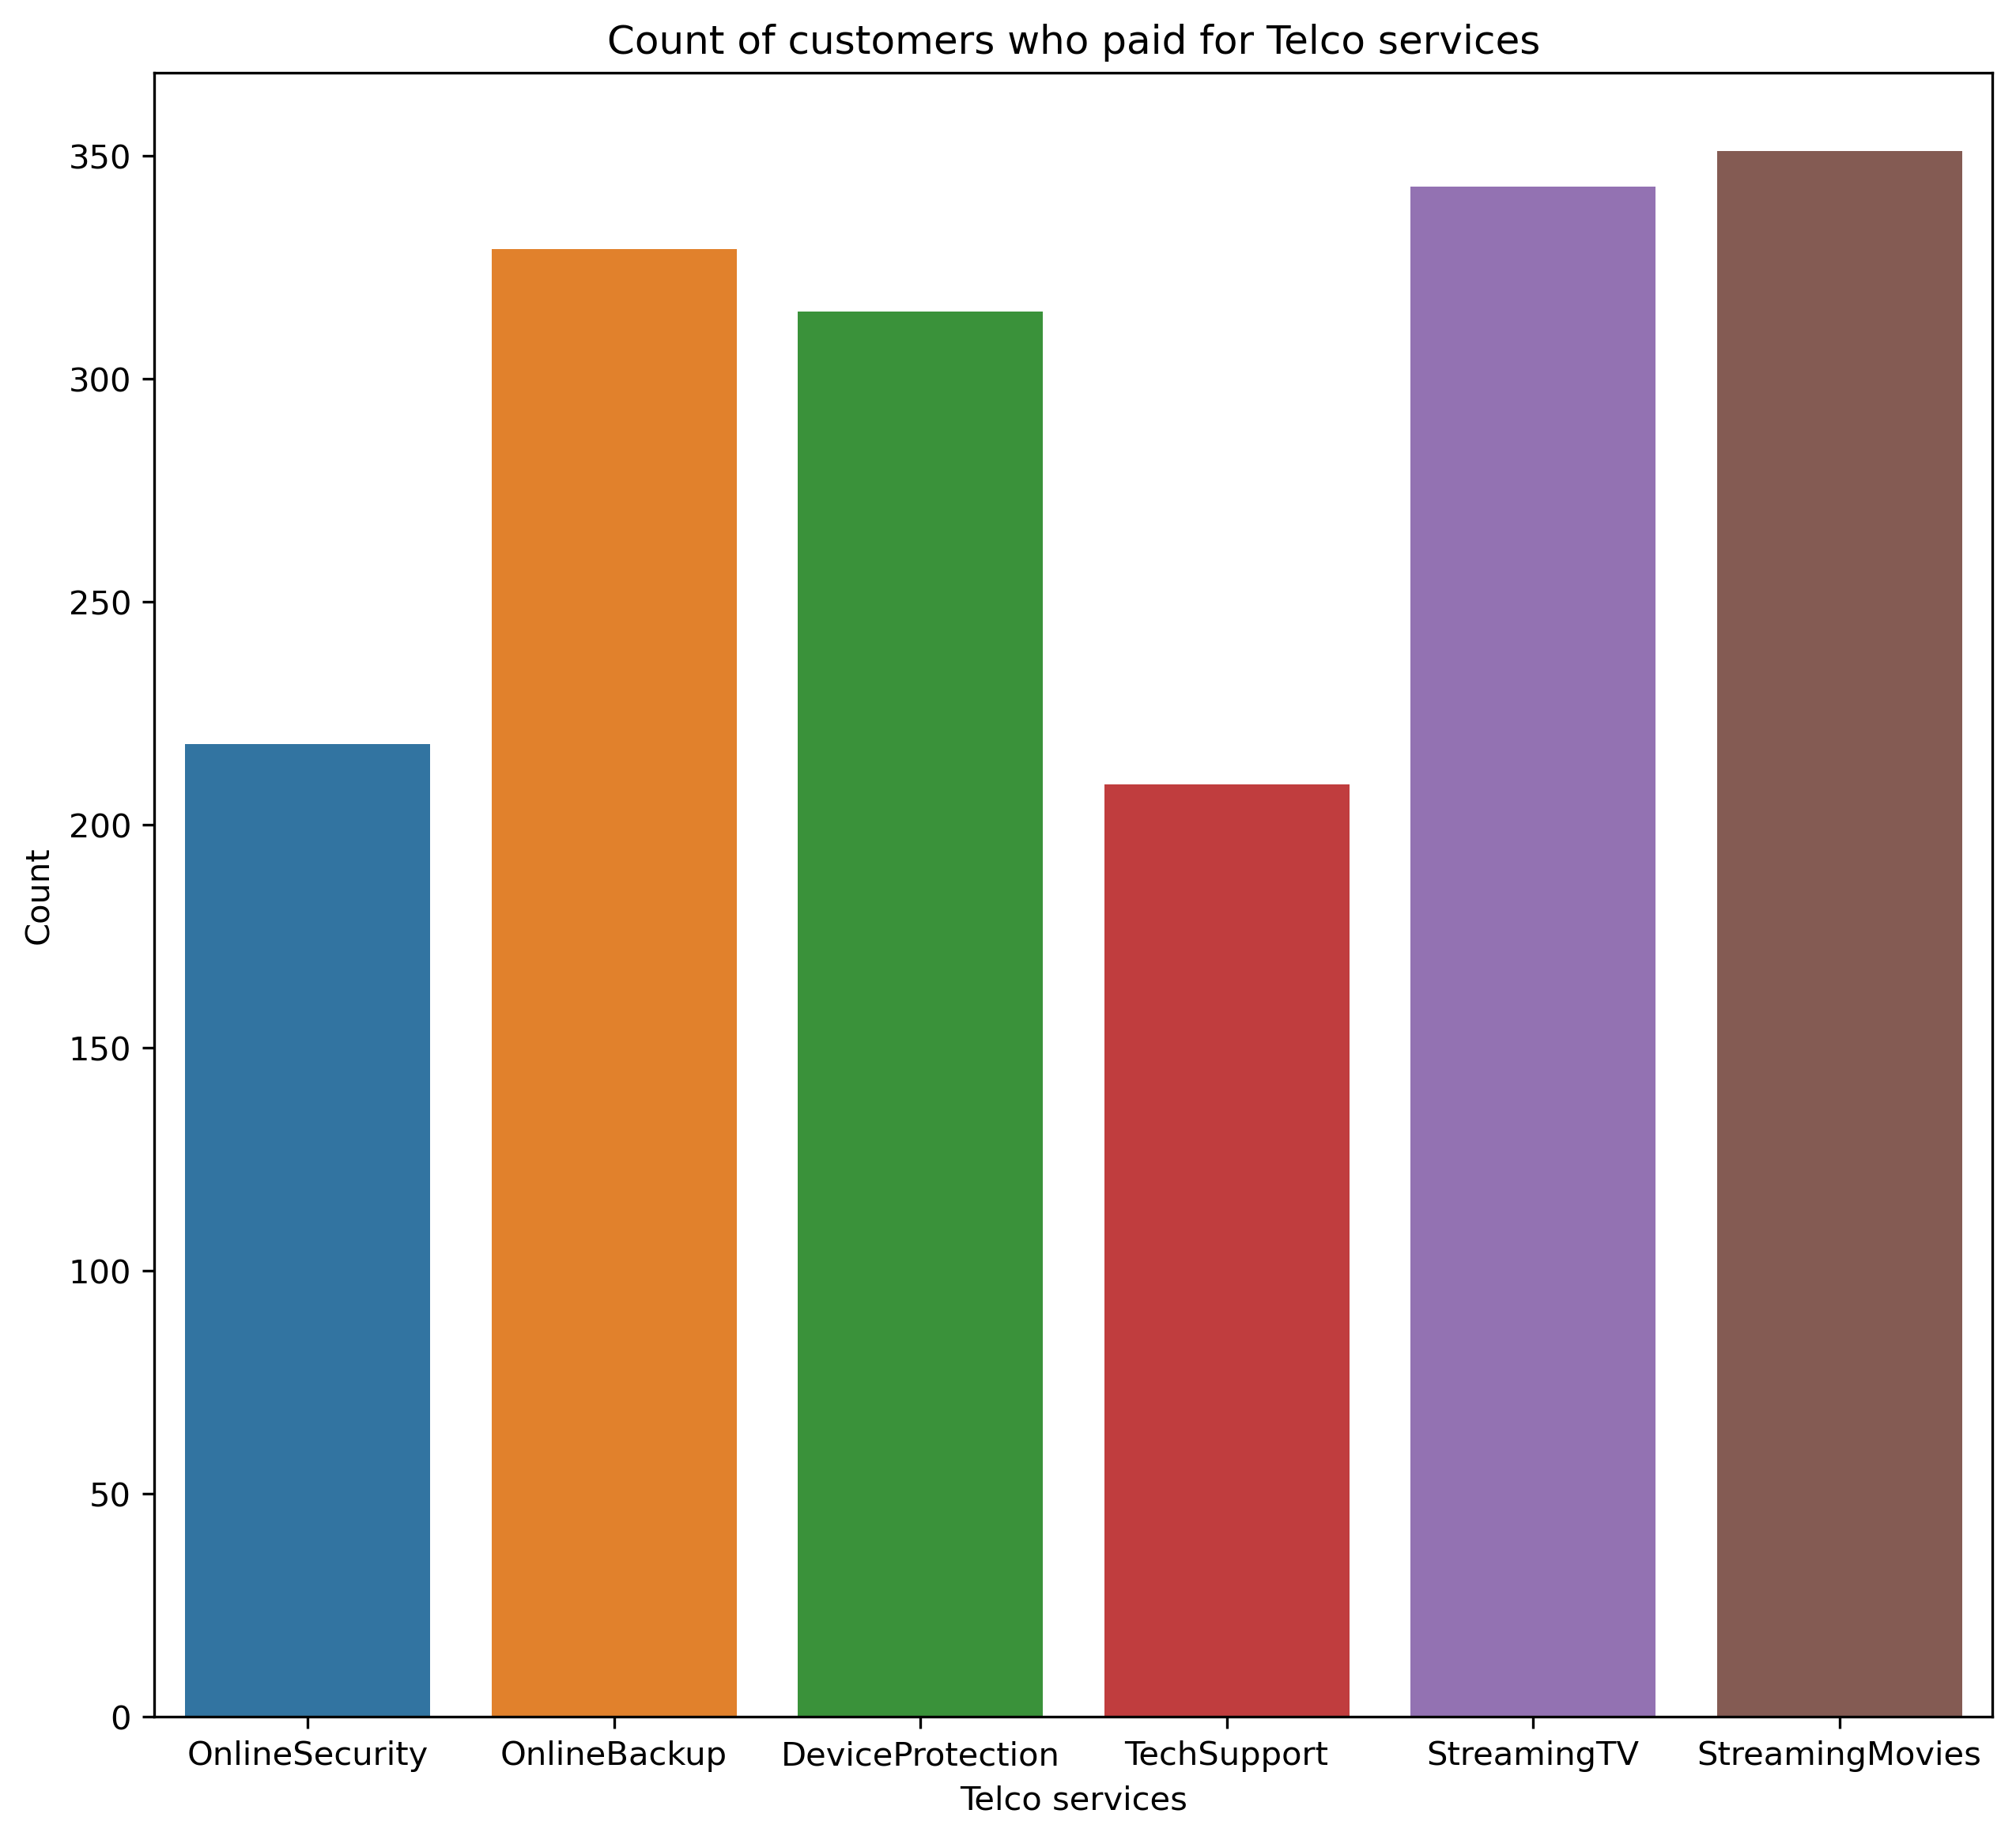

In [47]:
capstone_utils.services_count(senior_not_churn)

Looking at the bar chart of those senior citizens who did not churn and those who did below. Those customers who did churn seem to have spent less money on extra services provided by the company. They were not enticed by the services provided be it through poor marketing or price that did not encourage them. The fact that they did not pay for any extra services could have caused them to churn because they were economically independent. Or because these services compliment products such as internet service and provide greater customer satisfaction. 

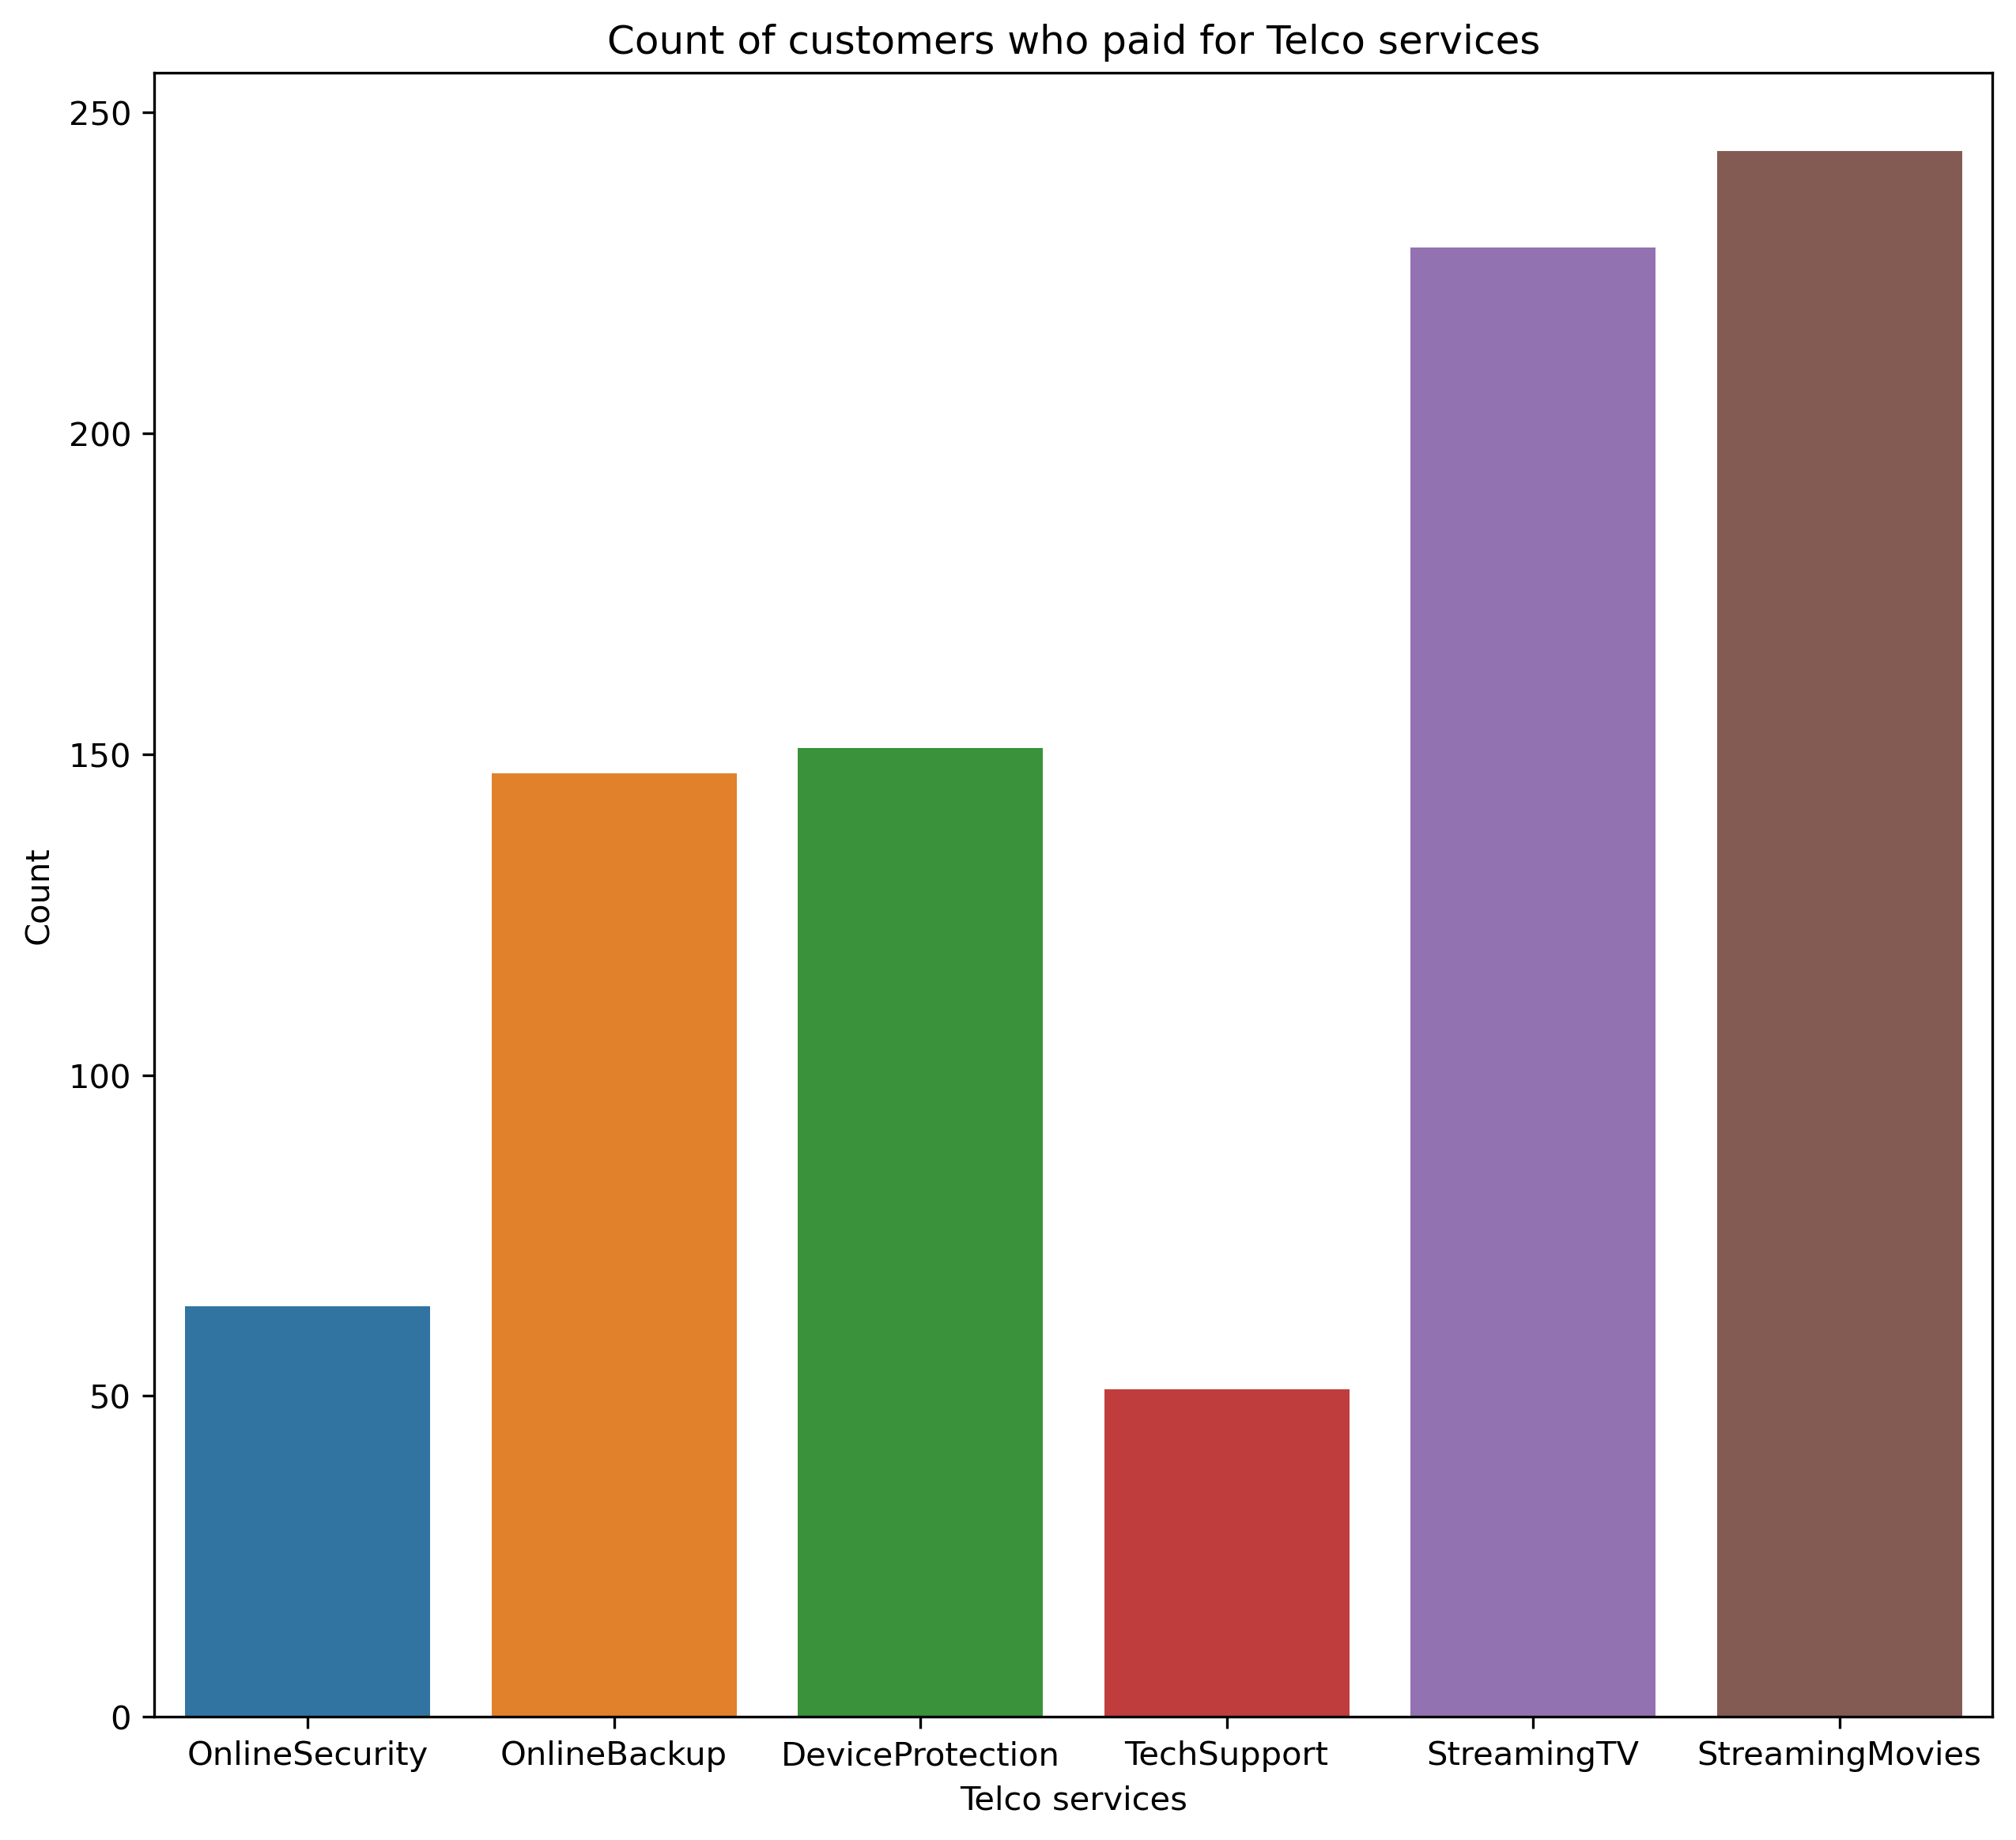

In [48]:
capstone_utils.services_count(senior_churn)

## Categorical Columns <a id='cat'></a>

I will remove the CustomerID column from the category column list as this does not provide any valuable data, other than providing an identifier for each row of the column.

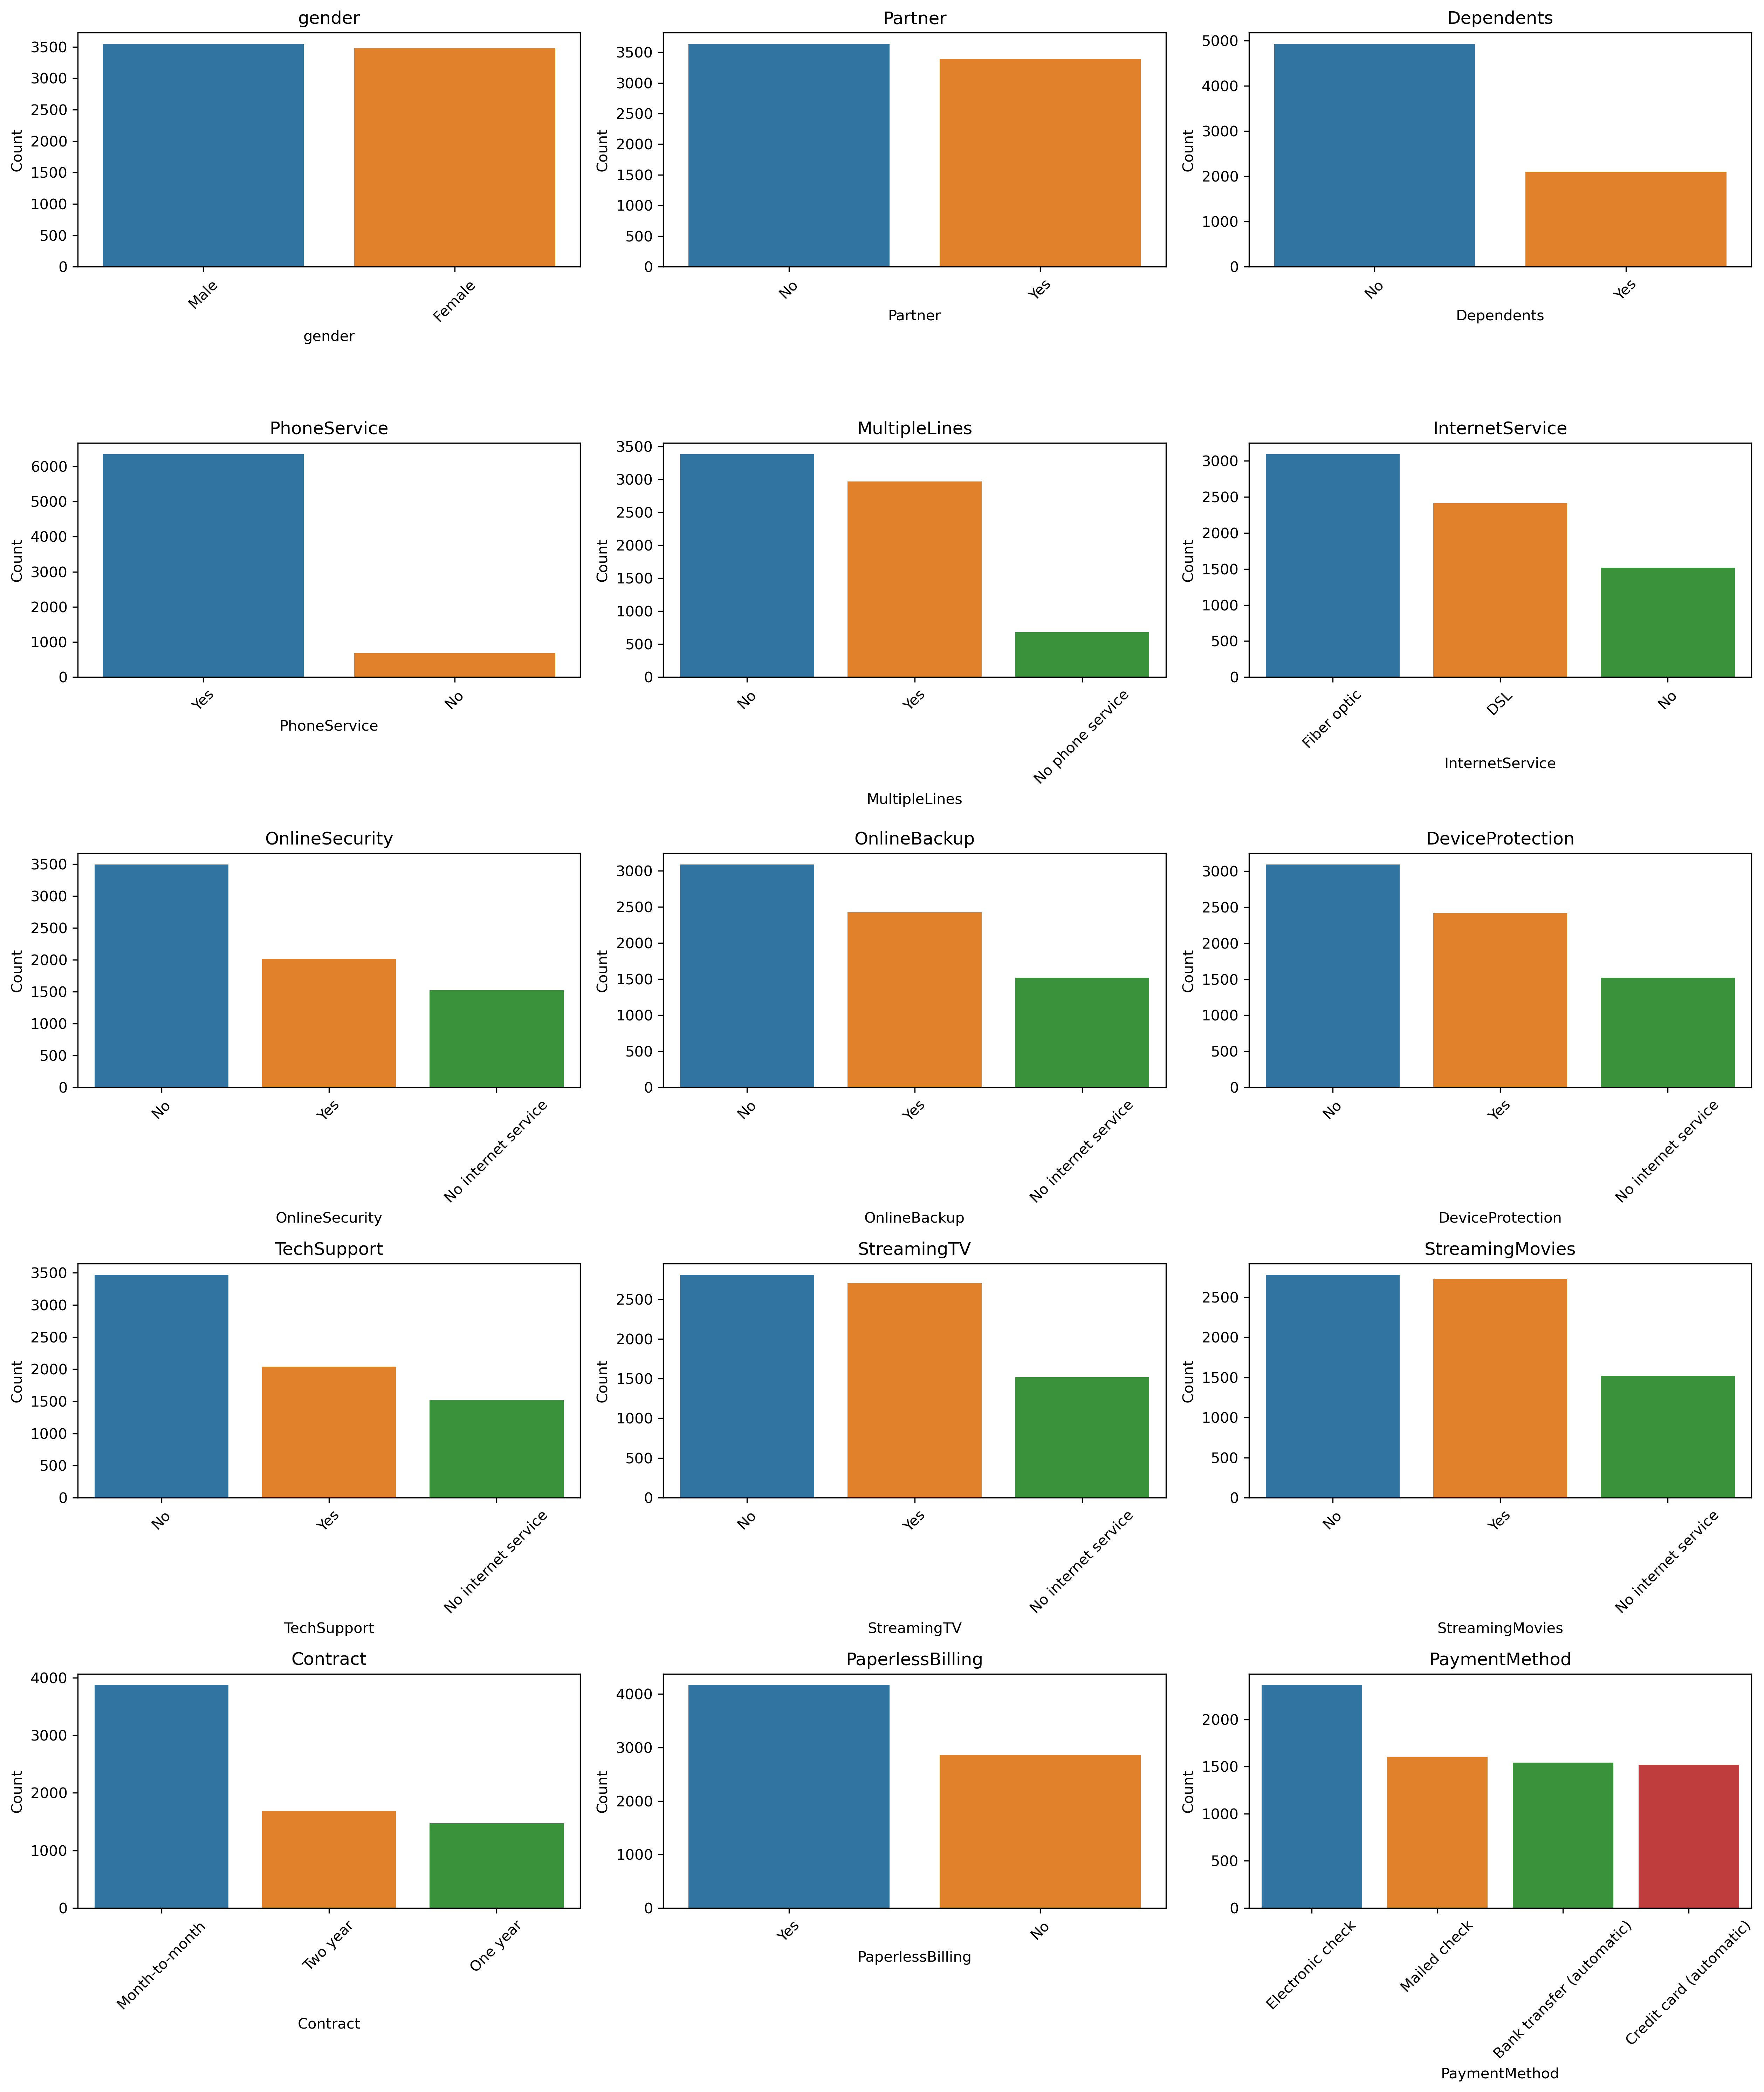

In [49]:
cat_col_list.remove("customerID")
capstone_utils.categorical_subplots(telco_df,cat_col_list)

Looking at the plots above, there are a few trends which were expected and others that need to be explored further. Both the Gender and Partner distribution are nearly equally proportioned. Further research will be conducted in Notebook 3 to determine if these columns are necessary in the dataframe or if they can dropped. However, I would like to explore whether partner has an effect on whether a customer churns or not. 

Furthermore, there is a drastic difference in proportion between those who have phone service and those who do not. As identified earlier, phone service is the basic service provided by Telco and so it is understandable that so many customers have Phone service. Whether this is necessary in the final dataframe will also be explored. 

In the following plots, there is also an additional category of "No internet service", this is something I want to explore. Whether having no internet service has an effect on churn or not. 

Lastly, the two multi-category columns of Contract and Payment Method will need to split up into dummy variables. This will be done in Notebook 3. However, it is curious that such a large amount of customers have a month-to-month contract compared to two-year or one-year contracts. This is something that needs to be explored, it would be expected that out of the the different contract categories - those who are on month-to-month contracts would churn more as they have less ties to the company. Also, they are not tied into long term deals with the company so it provides customers with the freedom to leave if they want to. 

### Distribution: Partner

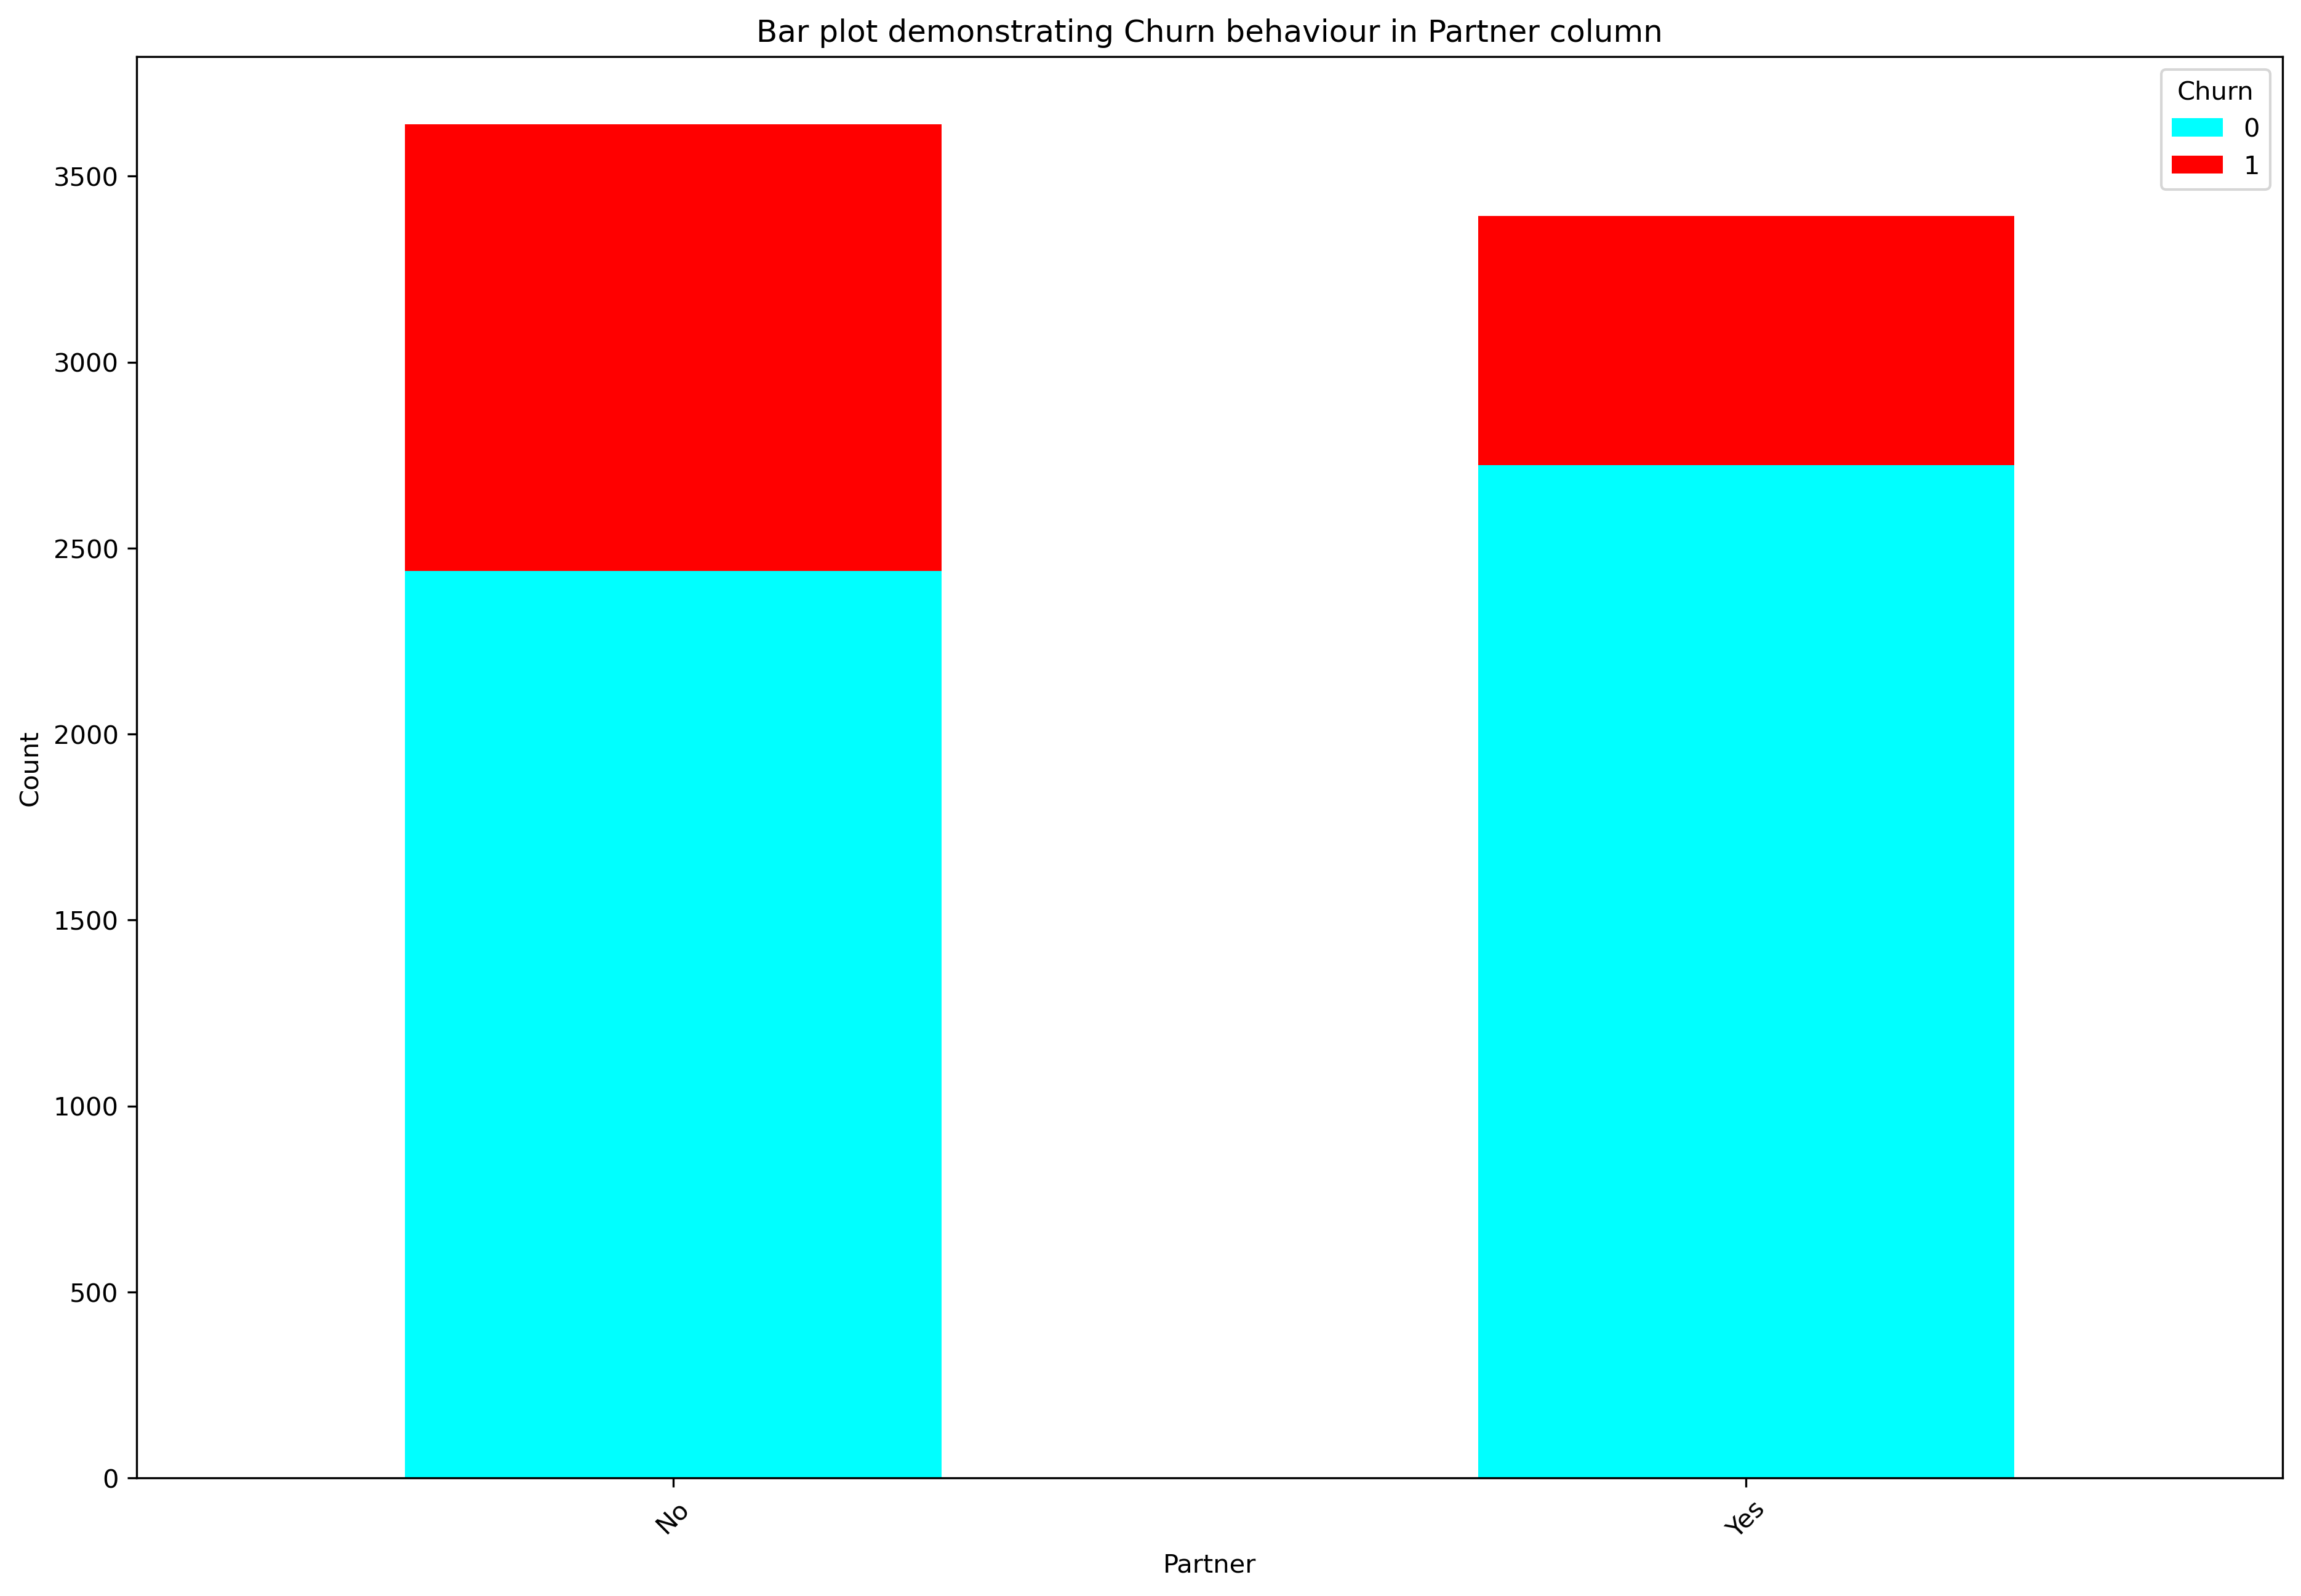

In [50]:
capstone_utils.plot_stacked_dist(telco_df, "Partner")

In [51]:
capstone_utils.churn_percentage(telco_df, "Partner")

Partner
{'No': 33.0, 'Yes': 19.7}


As expected customers who do not have a partner are much more likely to churn compared to those who do not. Out of those customers who did not have a partner - 33% of them churned. Meanwhile, those customers who did have partners only 19.7% of them churned. 

If we are to assume those who have partners live together with their partners, then these churn percentages can be easily explained. There are more barriers to exit for those customers who have partners as there is another individual also using the service. Furthermore, customers who have partners have more commitments and are more risk adverse in their actions, so are less likely to churn. 

### Distribution: Dependents

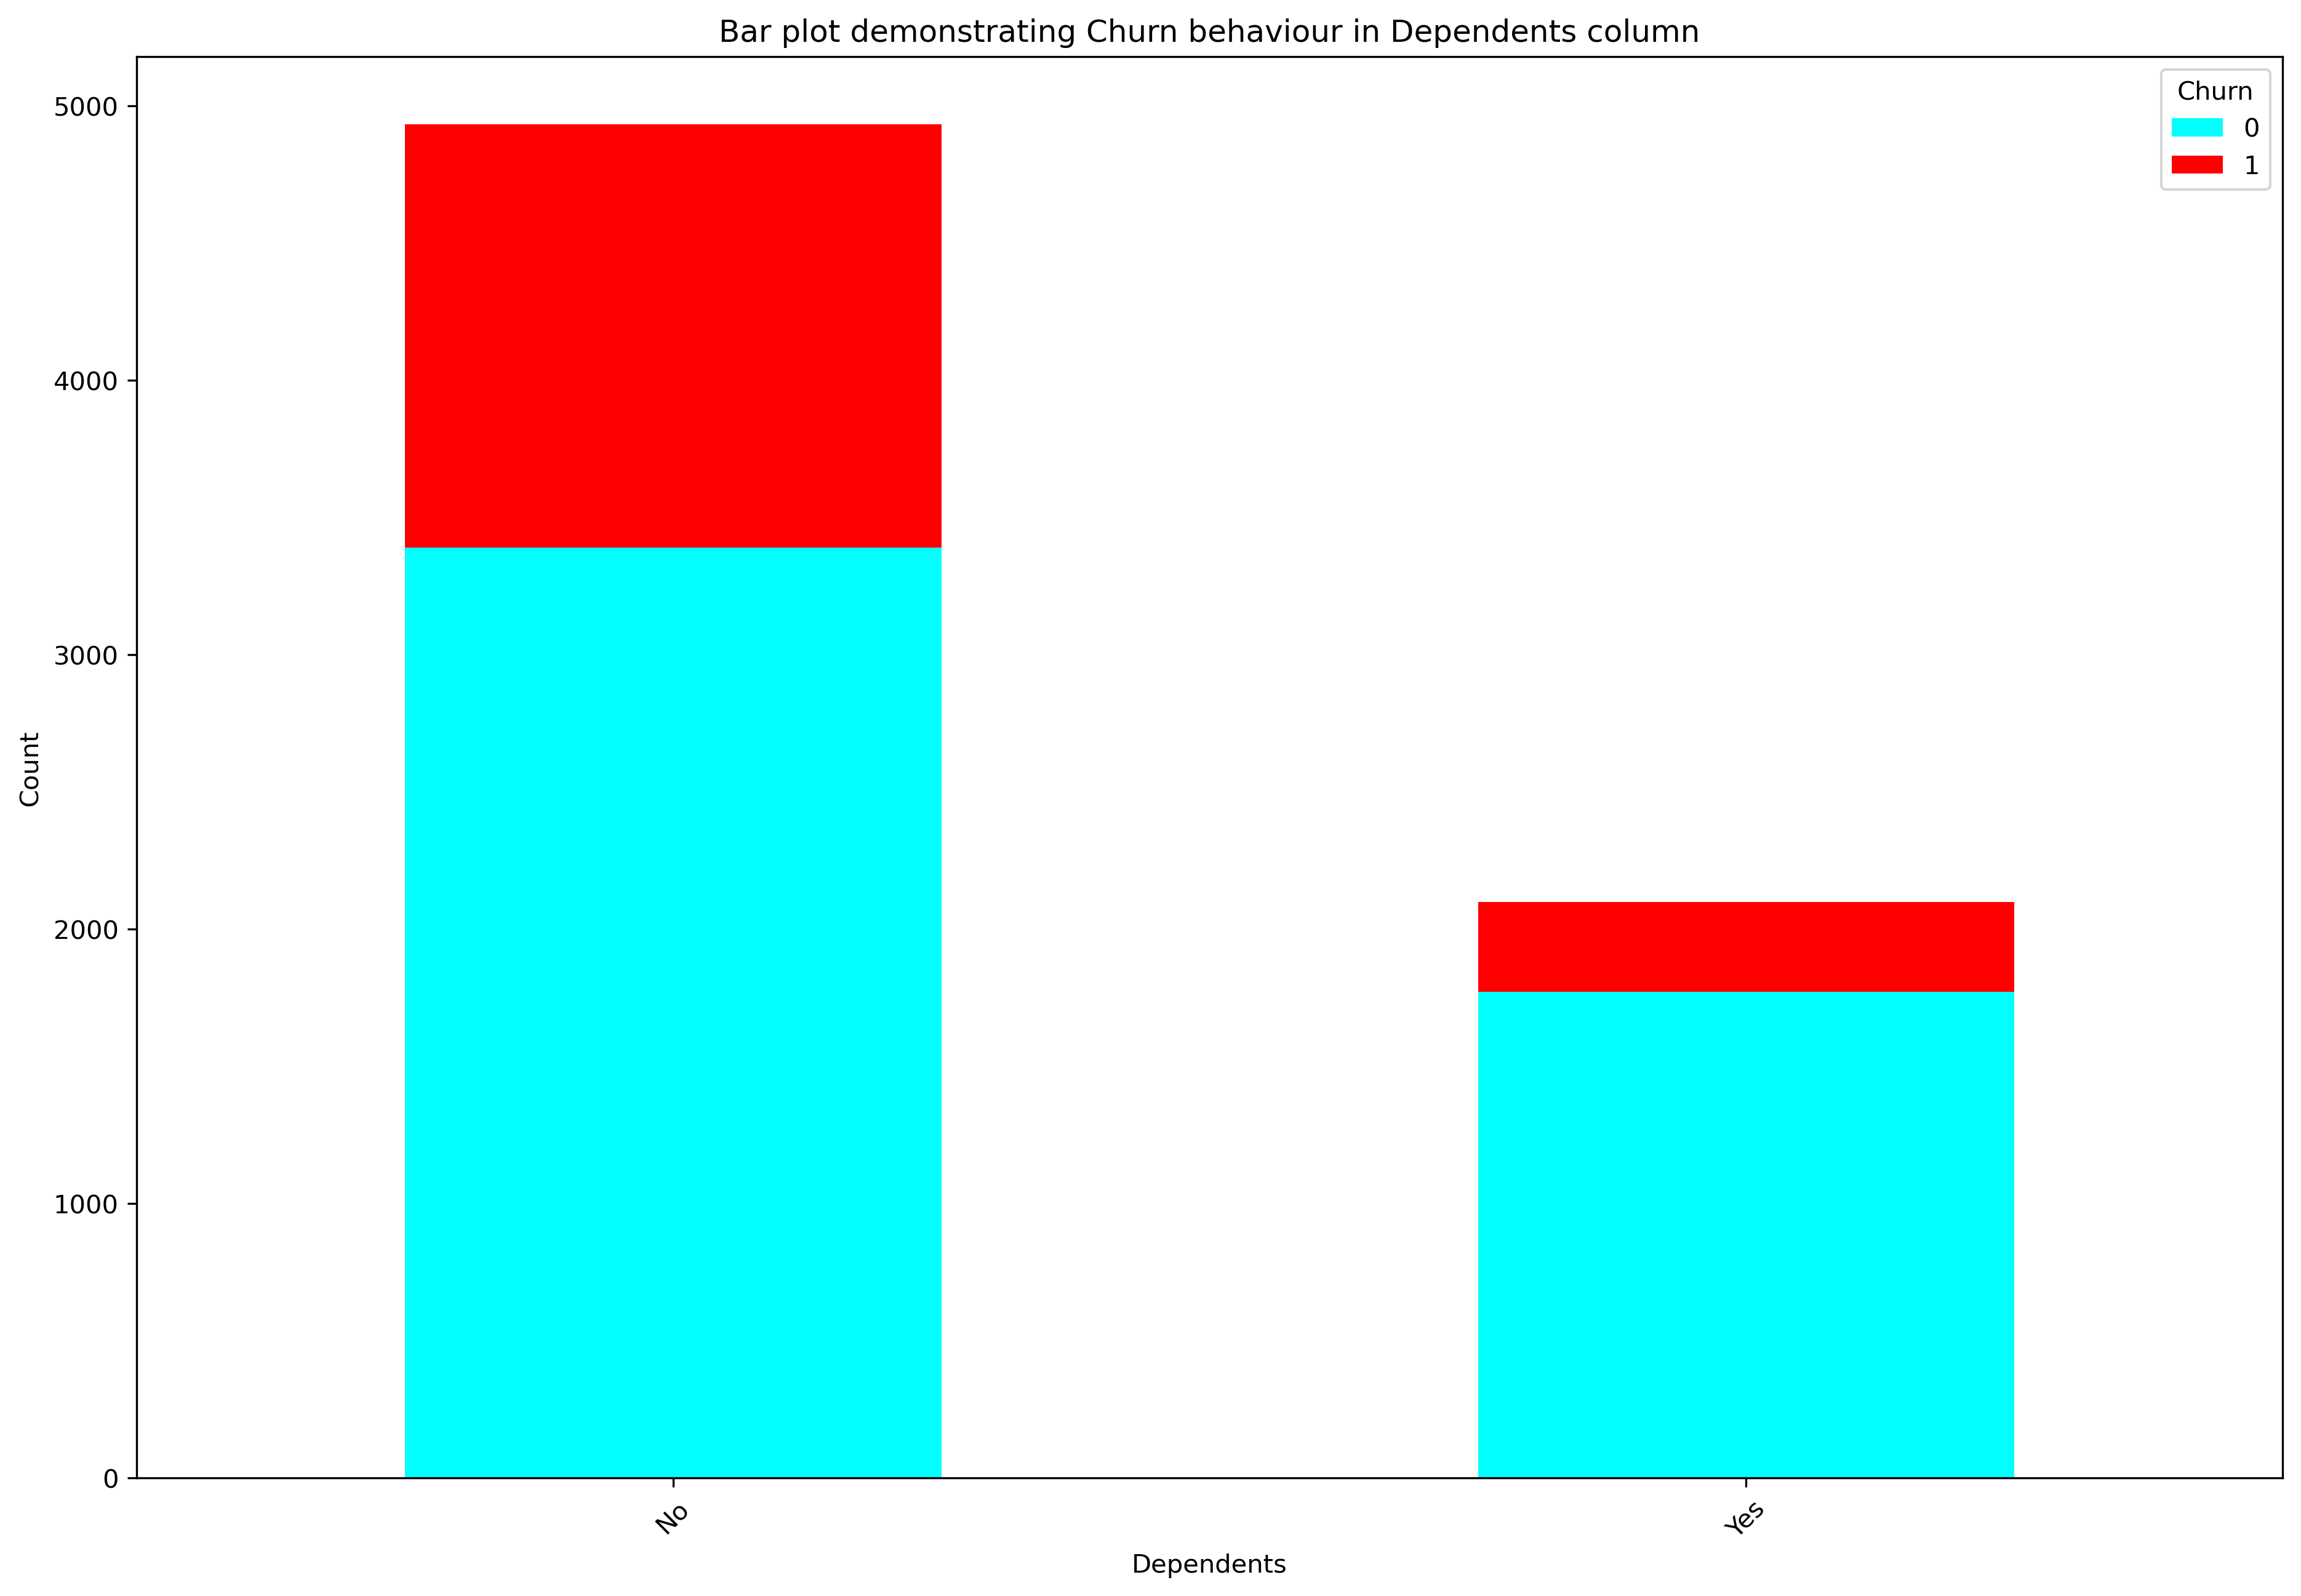

In [52]:
capstone_utils.plot_stacked_dist(telco_df, "Dependents")

In [53]:
capstone_utils.churn_percentage(telco_df, "Dependents")

Dependents
{'No': 31.3, 'Yes': 15.5}


Again, as expected those customers who do not have dependents or children, churn more - at 31.3% than those who do - at 15.5%. Following on from the explanation earlier about the partner columns, customers with children are less economically independent and so are less likely to churn. They are more risk adverse and will not take financial risks leaving the company on the chance that they will be able to find a cheaper price for the services they want. 

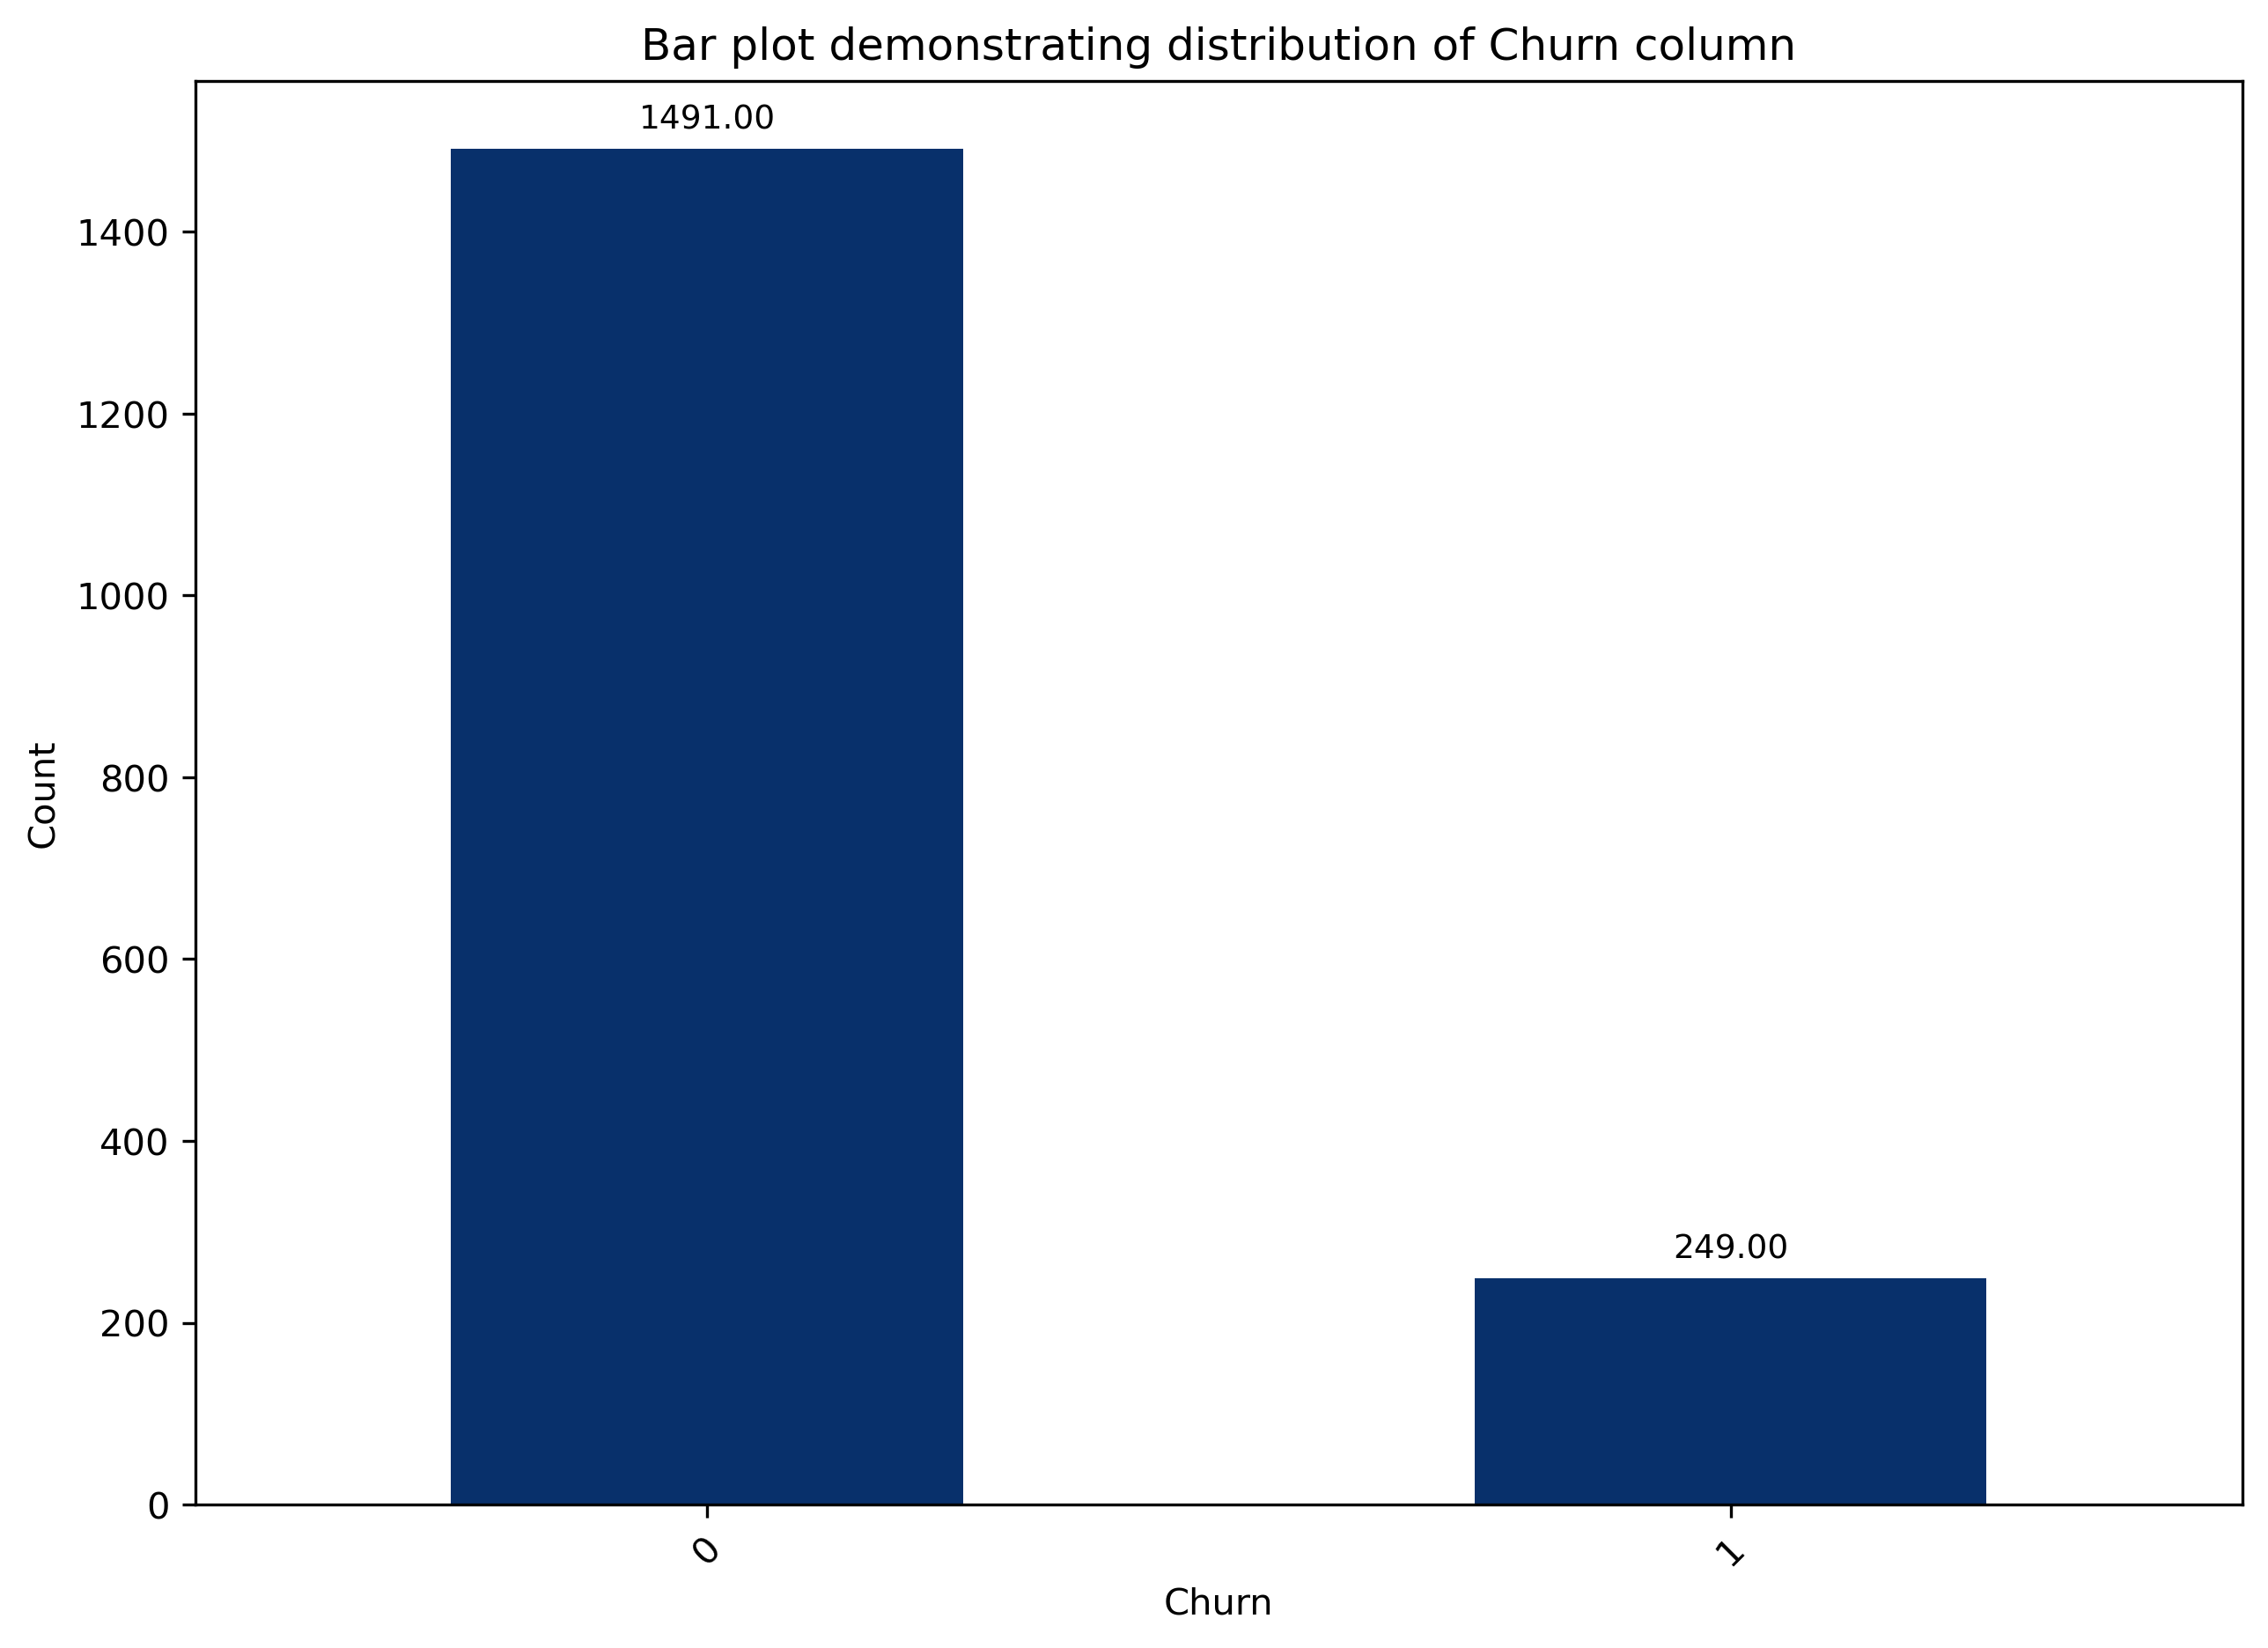

In [54]:
married_and_children = telco_df[(telco_df['Partner']=='Yes')&(telco_df['Dependents']=='Yes')]

capstone_utils.bar_plot_count(married_and_children,'Churn',colormap = 'Blues_r')

I wanted to explore if customers who had children and were also married displayed any churn behaviour. It seems that there was an even larger discrepancy between those who churned and those who didn't. Further compounding my point that customers who have children and/or partners are less economically independent and will not want to churn. 

### Distribution: MultipleLines

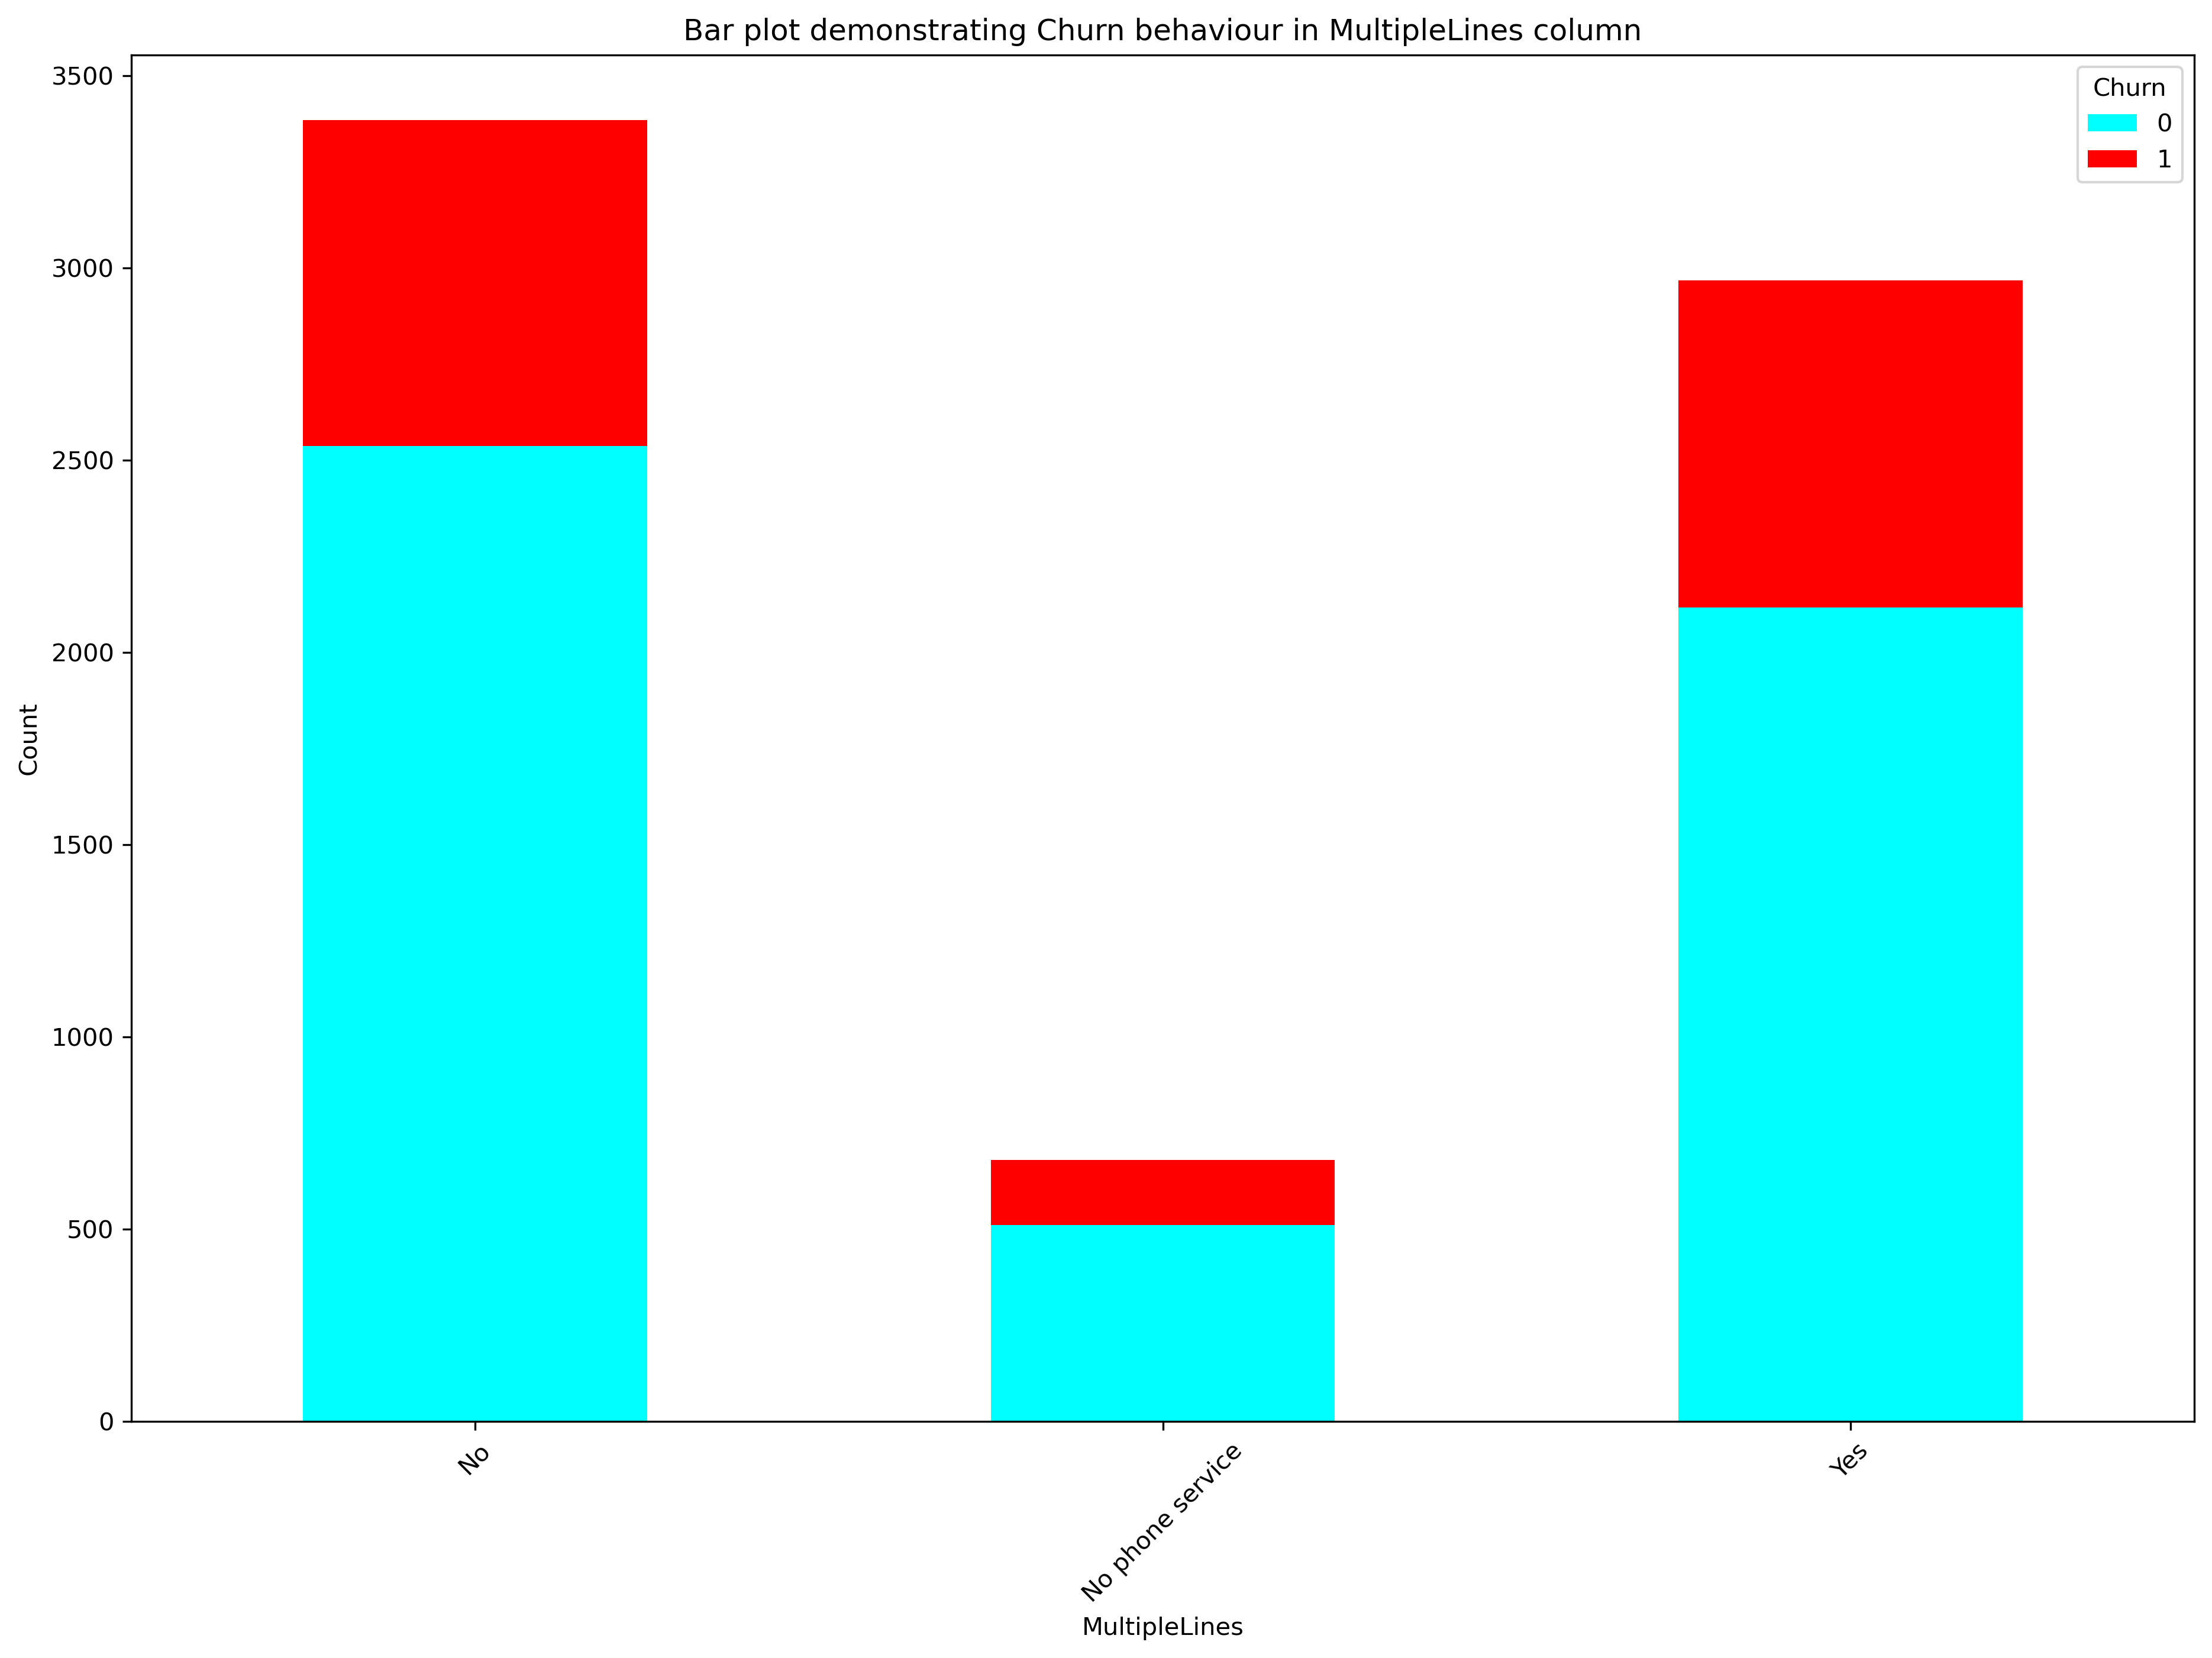

In [55]:
capstone_utils.plot_stacked_dist(telco_df, "MultipleLines")

In [56]:
capstone_utils.churn_percentage(telco_df, "MultipleLines")

MultipleLines
{'No': 25.1, 'No phone service': 25.0, 'Yes': 28.6}


This plot contradicts my assumption that I had about the data and customers. I would have assumed that those who had multiplelines with Telco would churn less than those who didn't. I felt that a customer who used more of the services Telco provided would have a hard time churning given the cost factor from the multiple services they were receiving. This could be a reflection of the company and the fact that they are not provided a high quality service to those customers who have multiple phone lines or a reflection of the current times. With the rise of mobile of phones, less and less people have landlines therefore customers could be viewing the possibility of multiplelines as redundant - leading to more churn. I want to explore whether those customers who did have multiplelines paid for any other services with Telco.

In [57]:
churn_multiple_lines = telco_df[(telco_df['MultipleLines']=='Yes')&(telco_df['Churn']==1)]
churn_multiple_lines=churn_multiple_lines.iloc[:,9:15].apply(lambda x: x.value_counts(normalize = True))
churn_multiple_lines.style.background_gradient(cmap='Blues')


Referring to the dataframe above, it seems that a large proportion of the customers paid for streaming tv and streaming movies. But they didn't spend a large amount of money on other services provided by Telco. Given the time we are in, with the rise of streaming services such as Netflix this explains why there is such a high demand for these services. With many telco companies around the world [partnering](https://www.forbes.com/sites/tomokoyokoi/2022/02/16/telco-streaming-partnerships-eyeballs-entertainment-and-billing/?sh=55989fee2d2d) up with streaming services such as Netflix, customers may have been disatisfied with the streaming service and saw other companies offering better prices with other streaming platforms such as Disney+ at a much cheaper price. 


### Distribution: InternetService

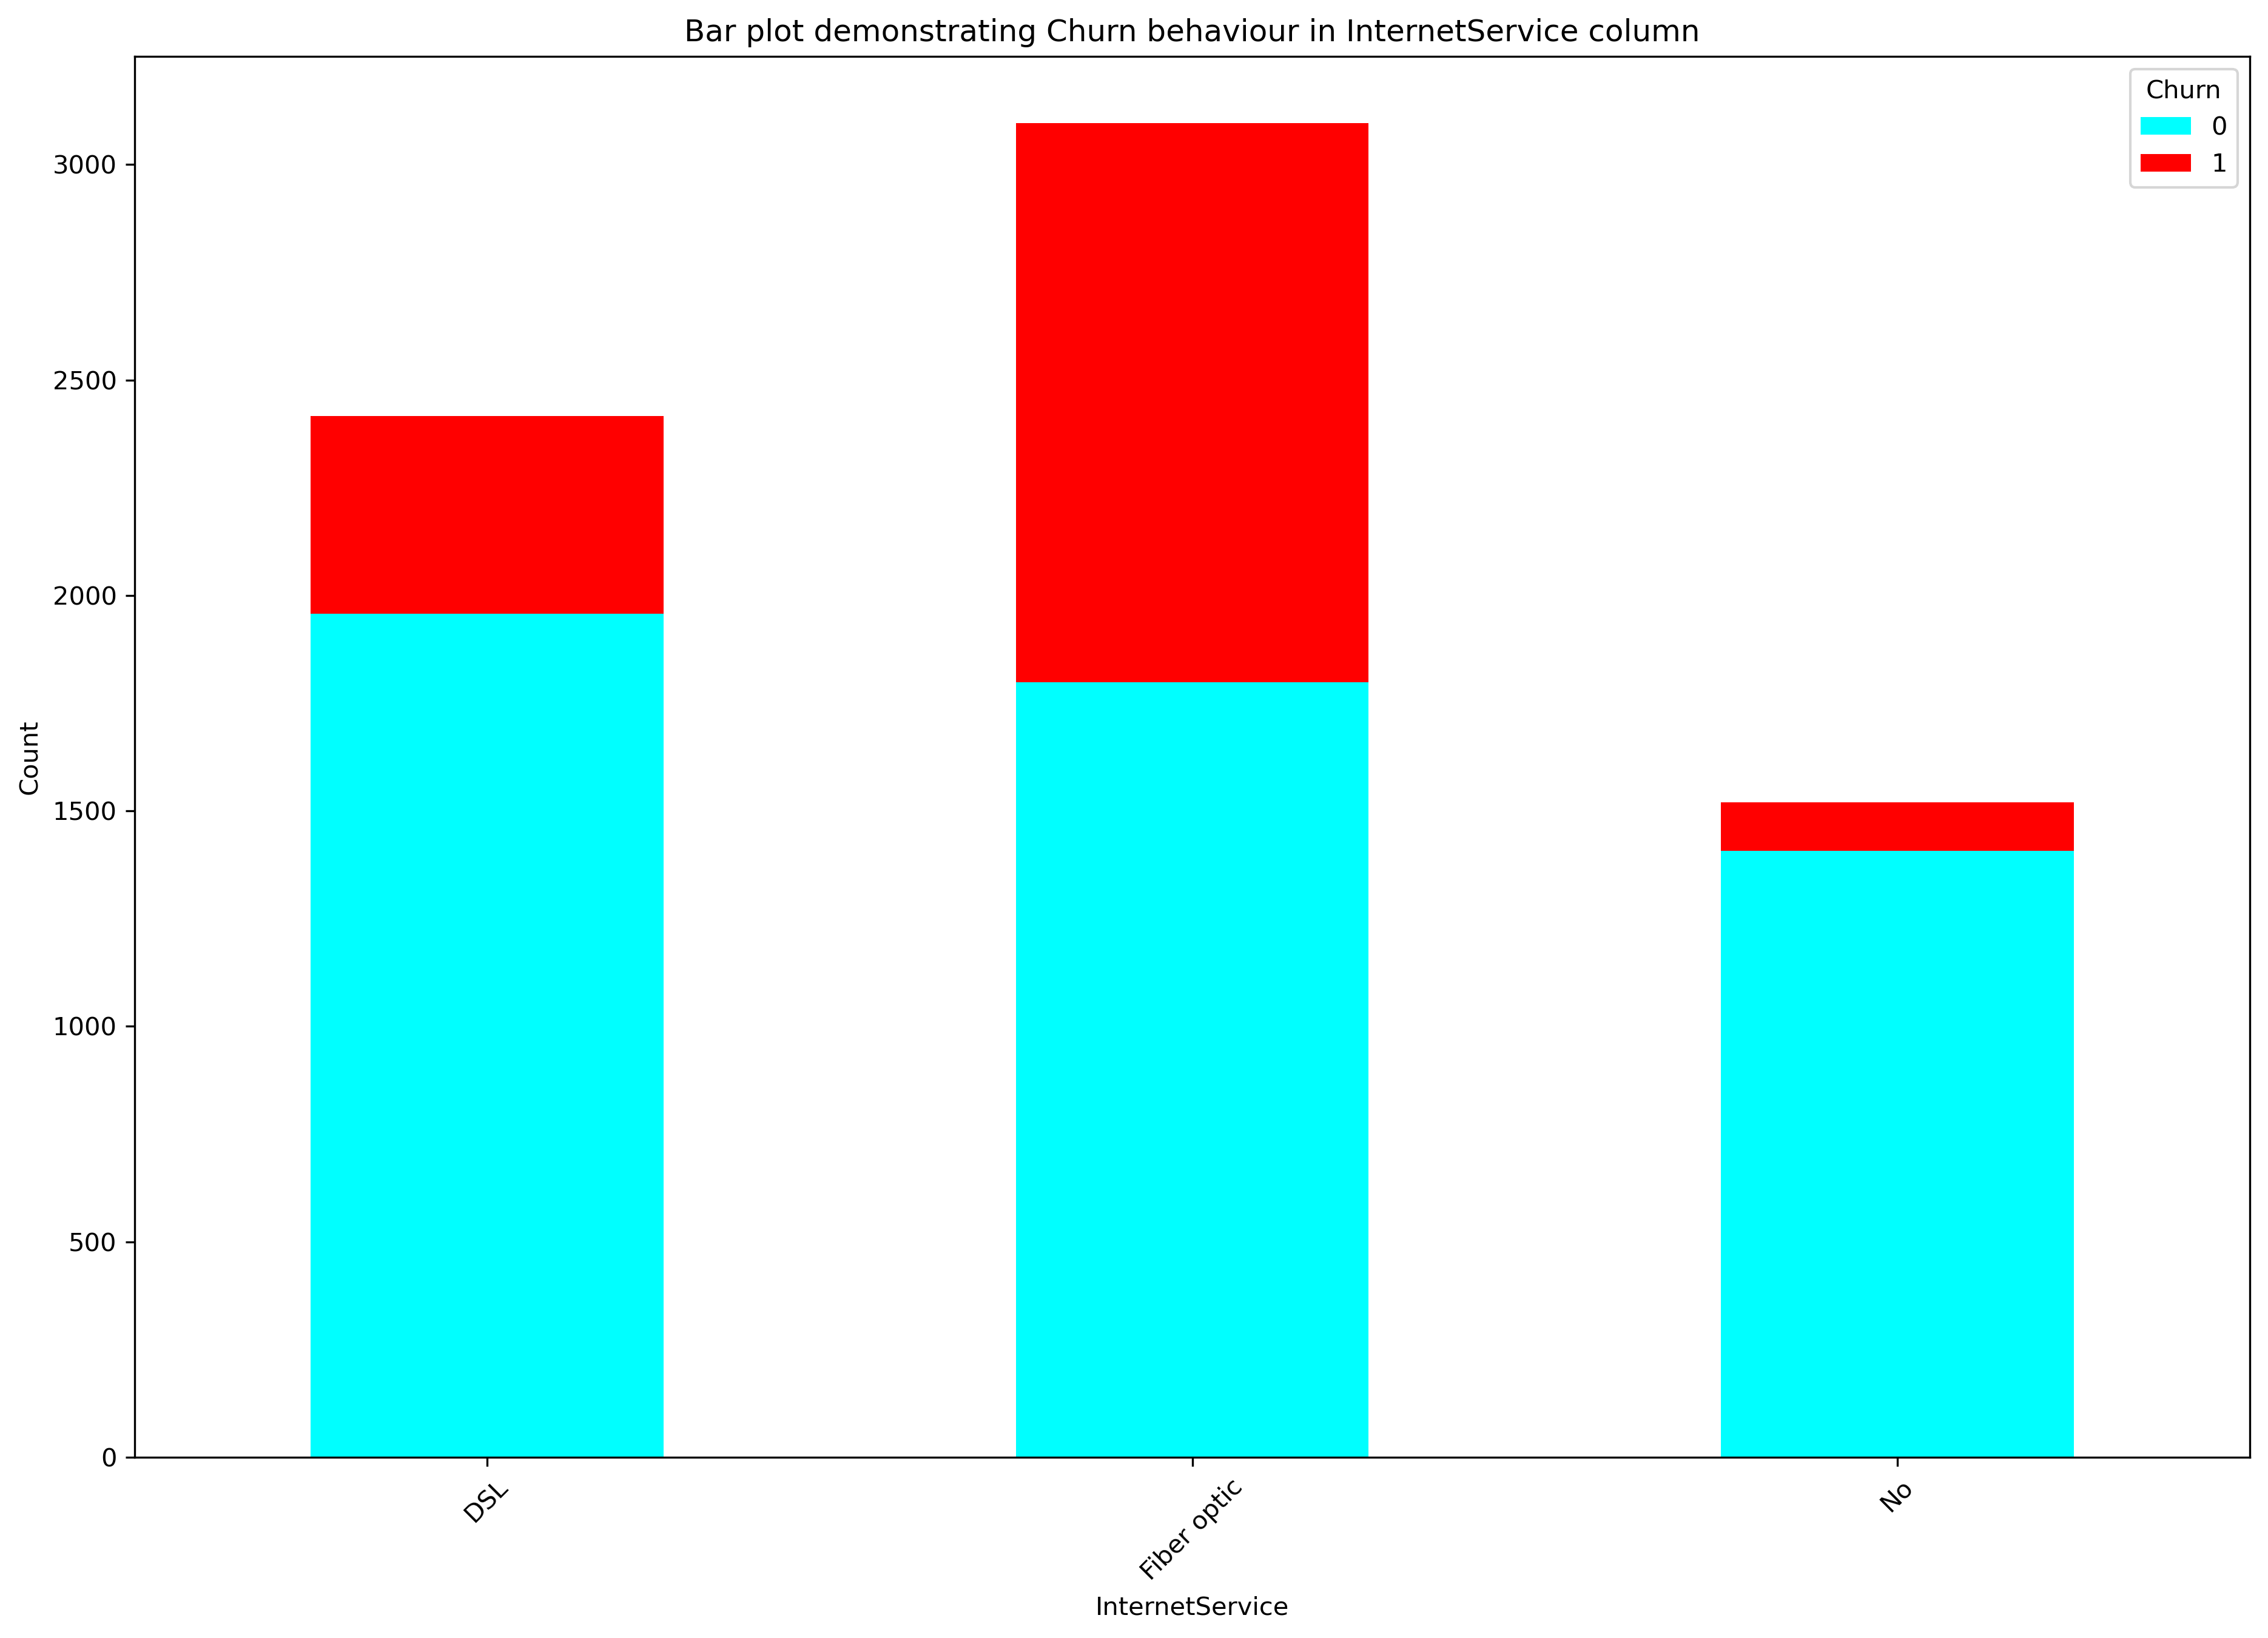

In [58]:
capstone_utils.plot_stacked_dist(telco_df, "InternetService")

In [59]:
capstone_utils.churn_percentage(telco_df,'InternetService')

InternetService
{'DSL': 19.0, 'Fiber optic': 41.9, 'No': 7.4}


Looking at the plot and the percentages, a drastically high number of people who had fiber optic churned compared to the others. This is a significantly large churn and I want to explore this further. Price is the biggest factor in why people churn, so I will first look at the monthly charges to see if there is anything strange here. 

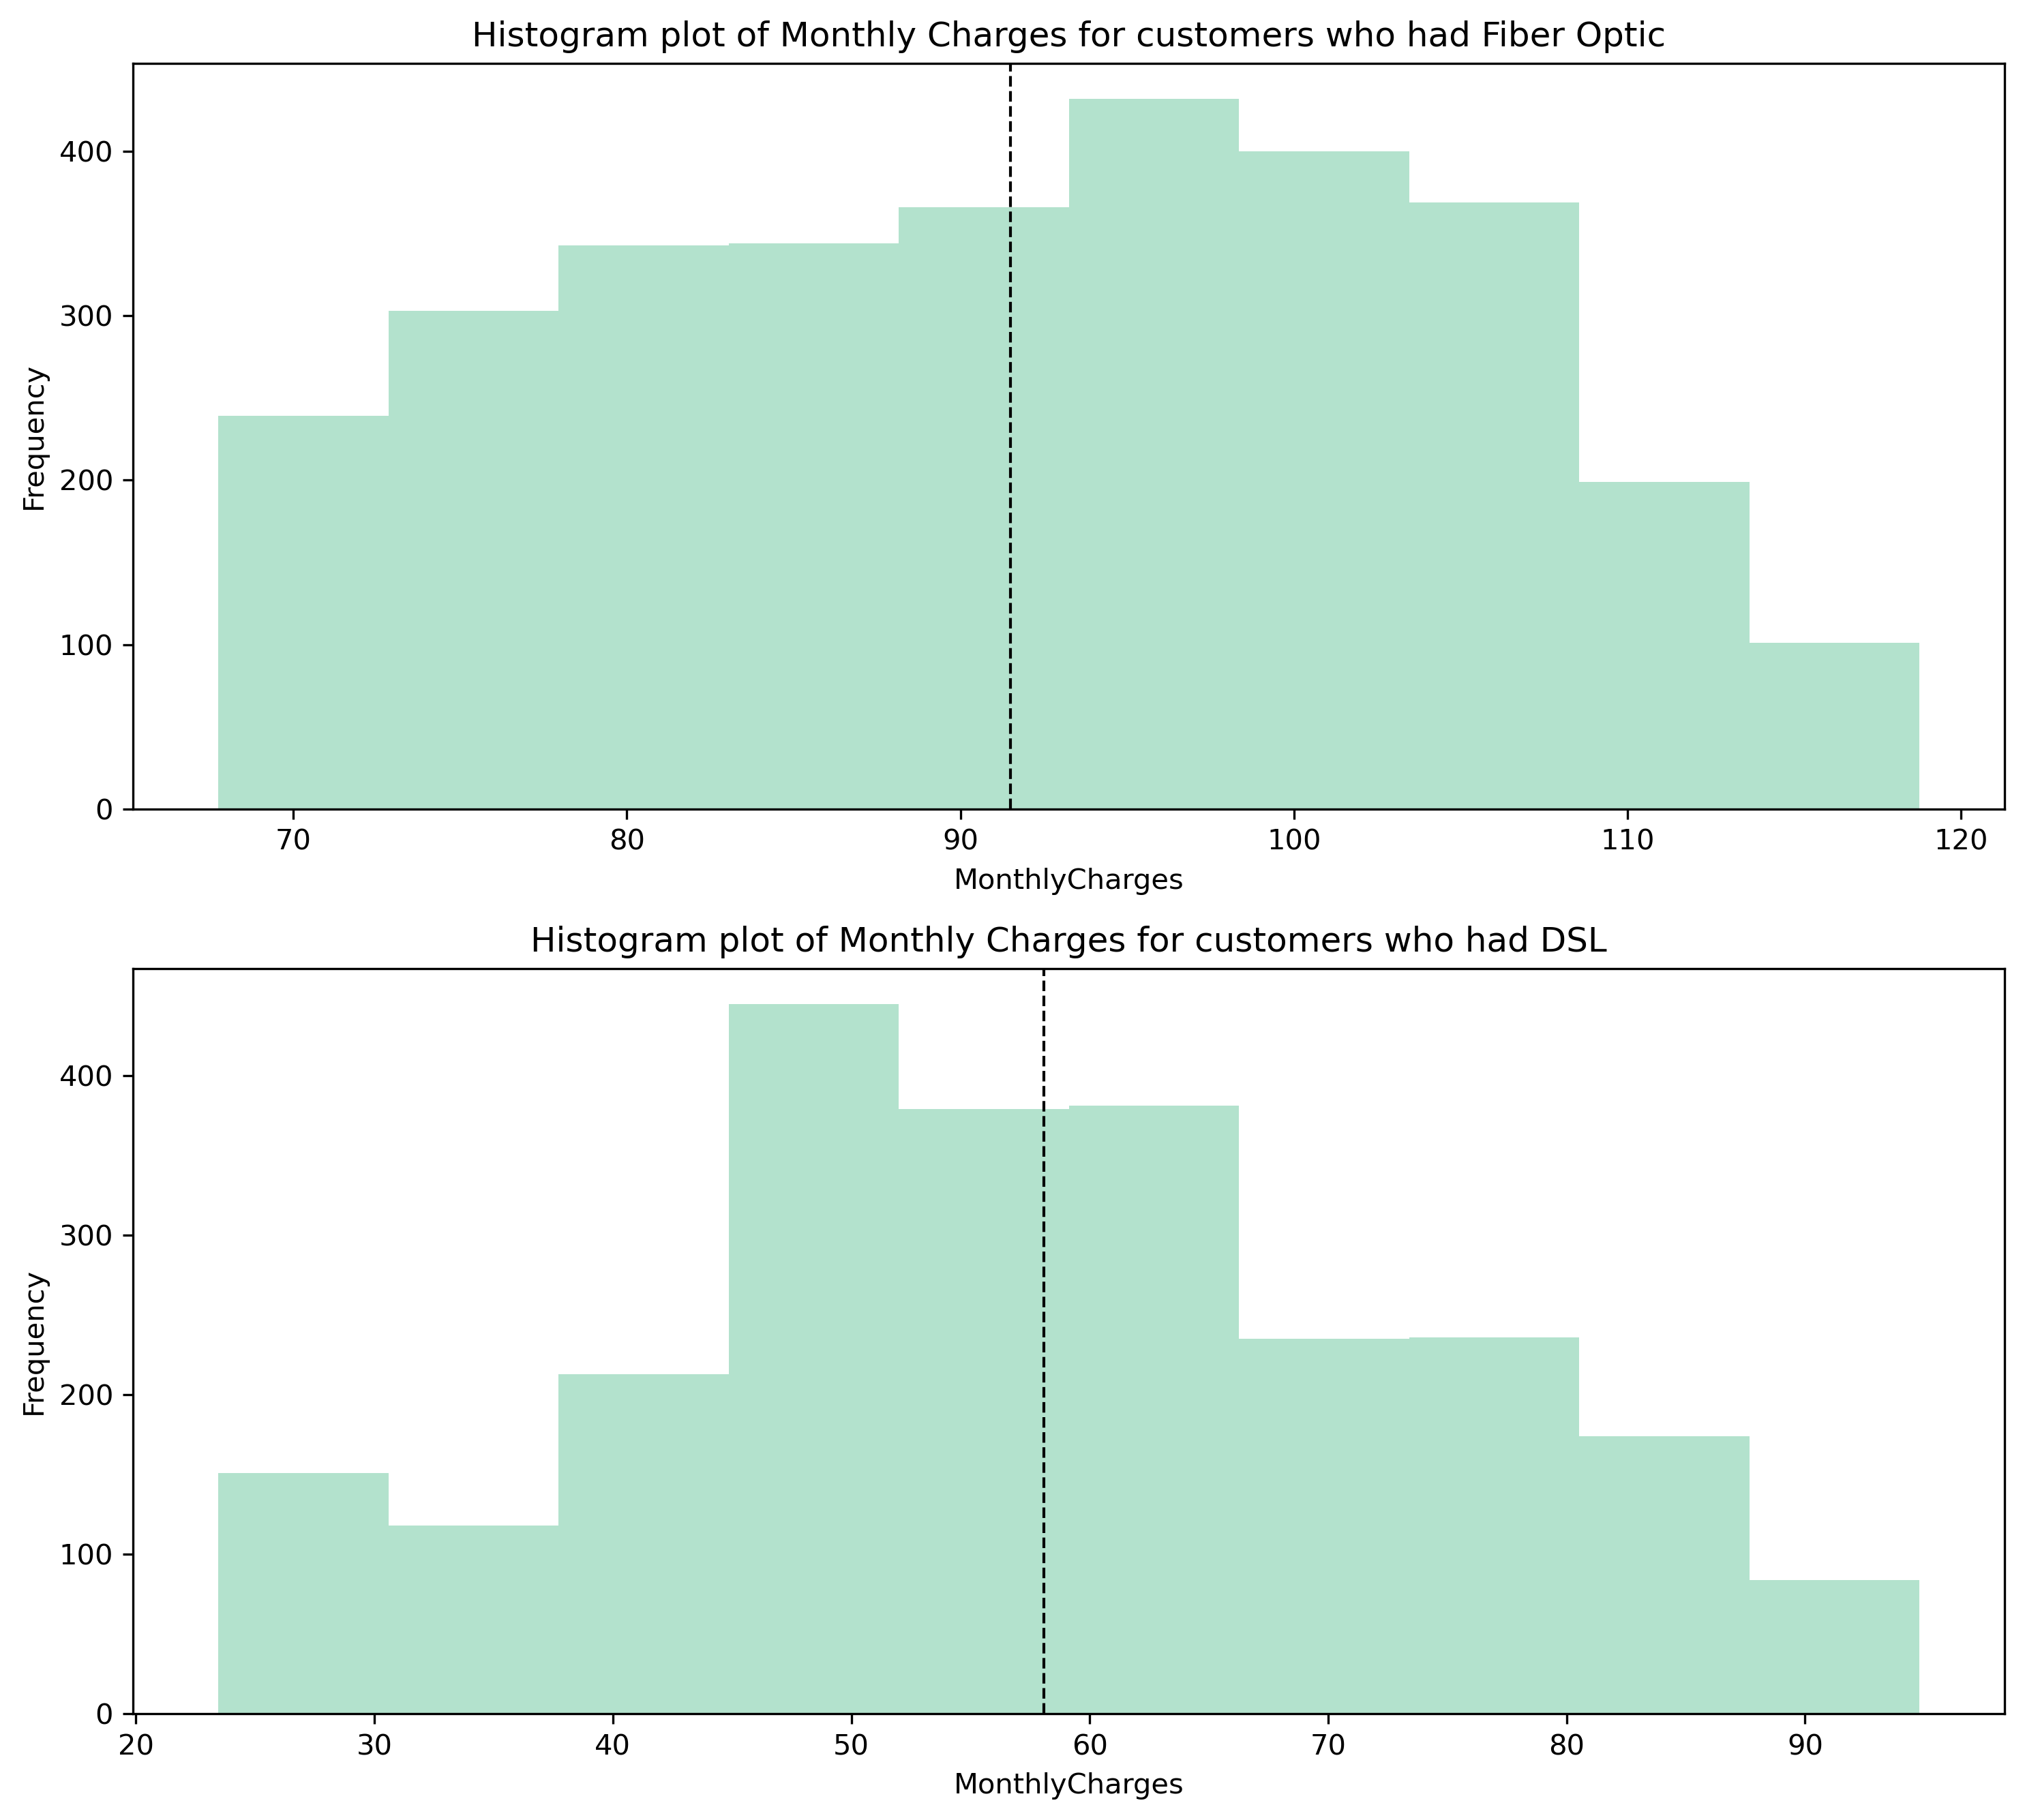

In [60]:
internet_fo = telco_df[telco_df['InternetService']=='Fiber optic']
internet_dsl = telco_df[telco_df['InternetService']=='DSL']

dfs = [internet_fo,internet_dsl]
titles = ['Histogram plot of Monthly Charges for customers who had Fiber Optic','Histogram plot of Monthly Charges for customers who had DSL']

plt.subplots(2, 1, figsize=(15, 9))
count = 1
for frame in dfs:
    plt.subplot(2,1,count)
    capstone_utils.df_histogram(frame,'MonthlyCharges',bins = 10,colormap = 'Pastel2',figsize=(10,9))
    plt.title(titles[count-1])
    count +=1

plt.tight_layout()
plt.show()


Comparing the two histogram plots of the two choices of internet services you could get, the difference in price per month is enormous. As expected Fiber optic is more expensive as it is made of transparent fiber that allows quicker internet speed than DSL. From external research, the average price of Fiber Optic is $64 which is much lower than what Telco is providing which could be a cause as to why many who have Fiber Optic are churning. 

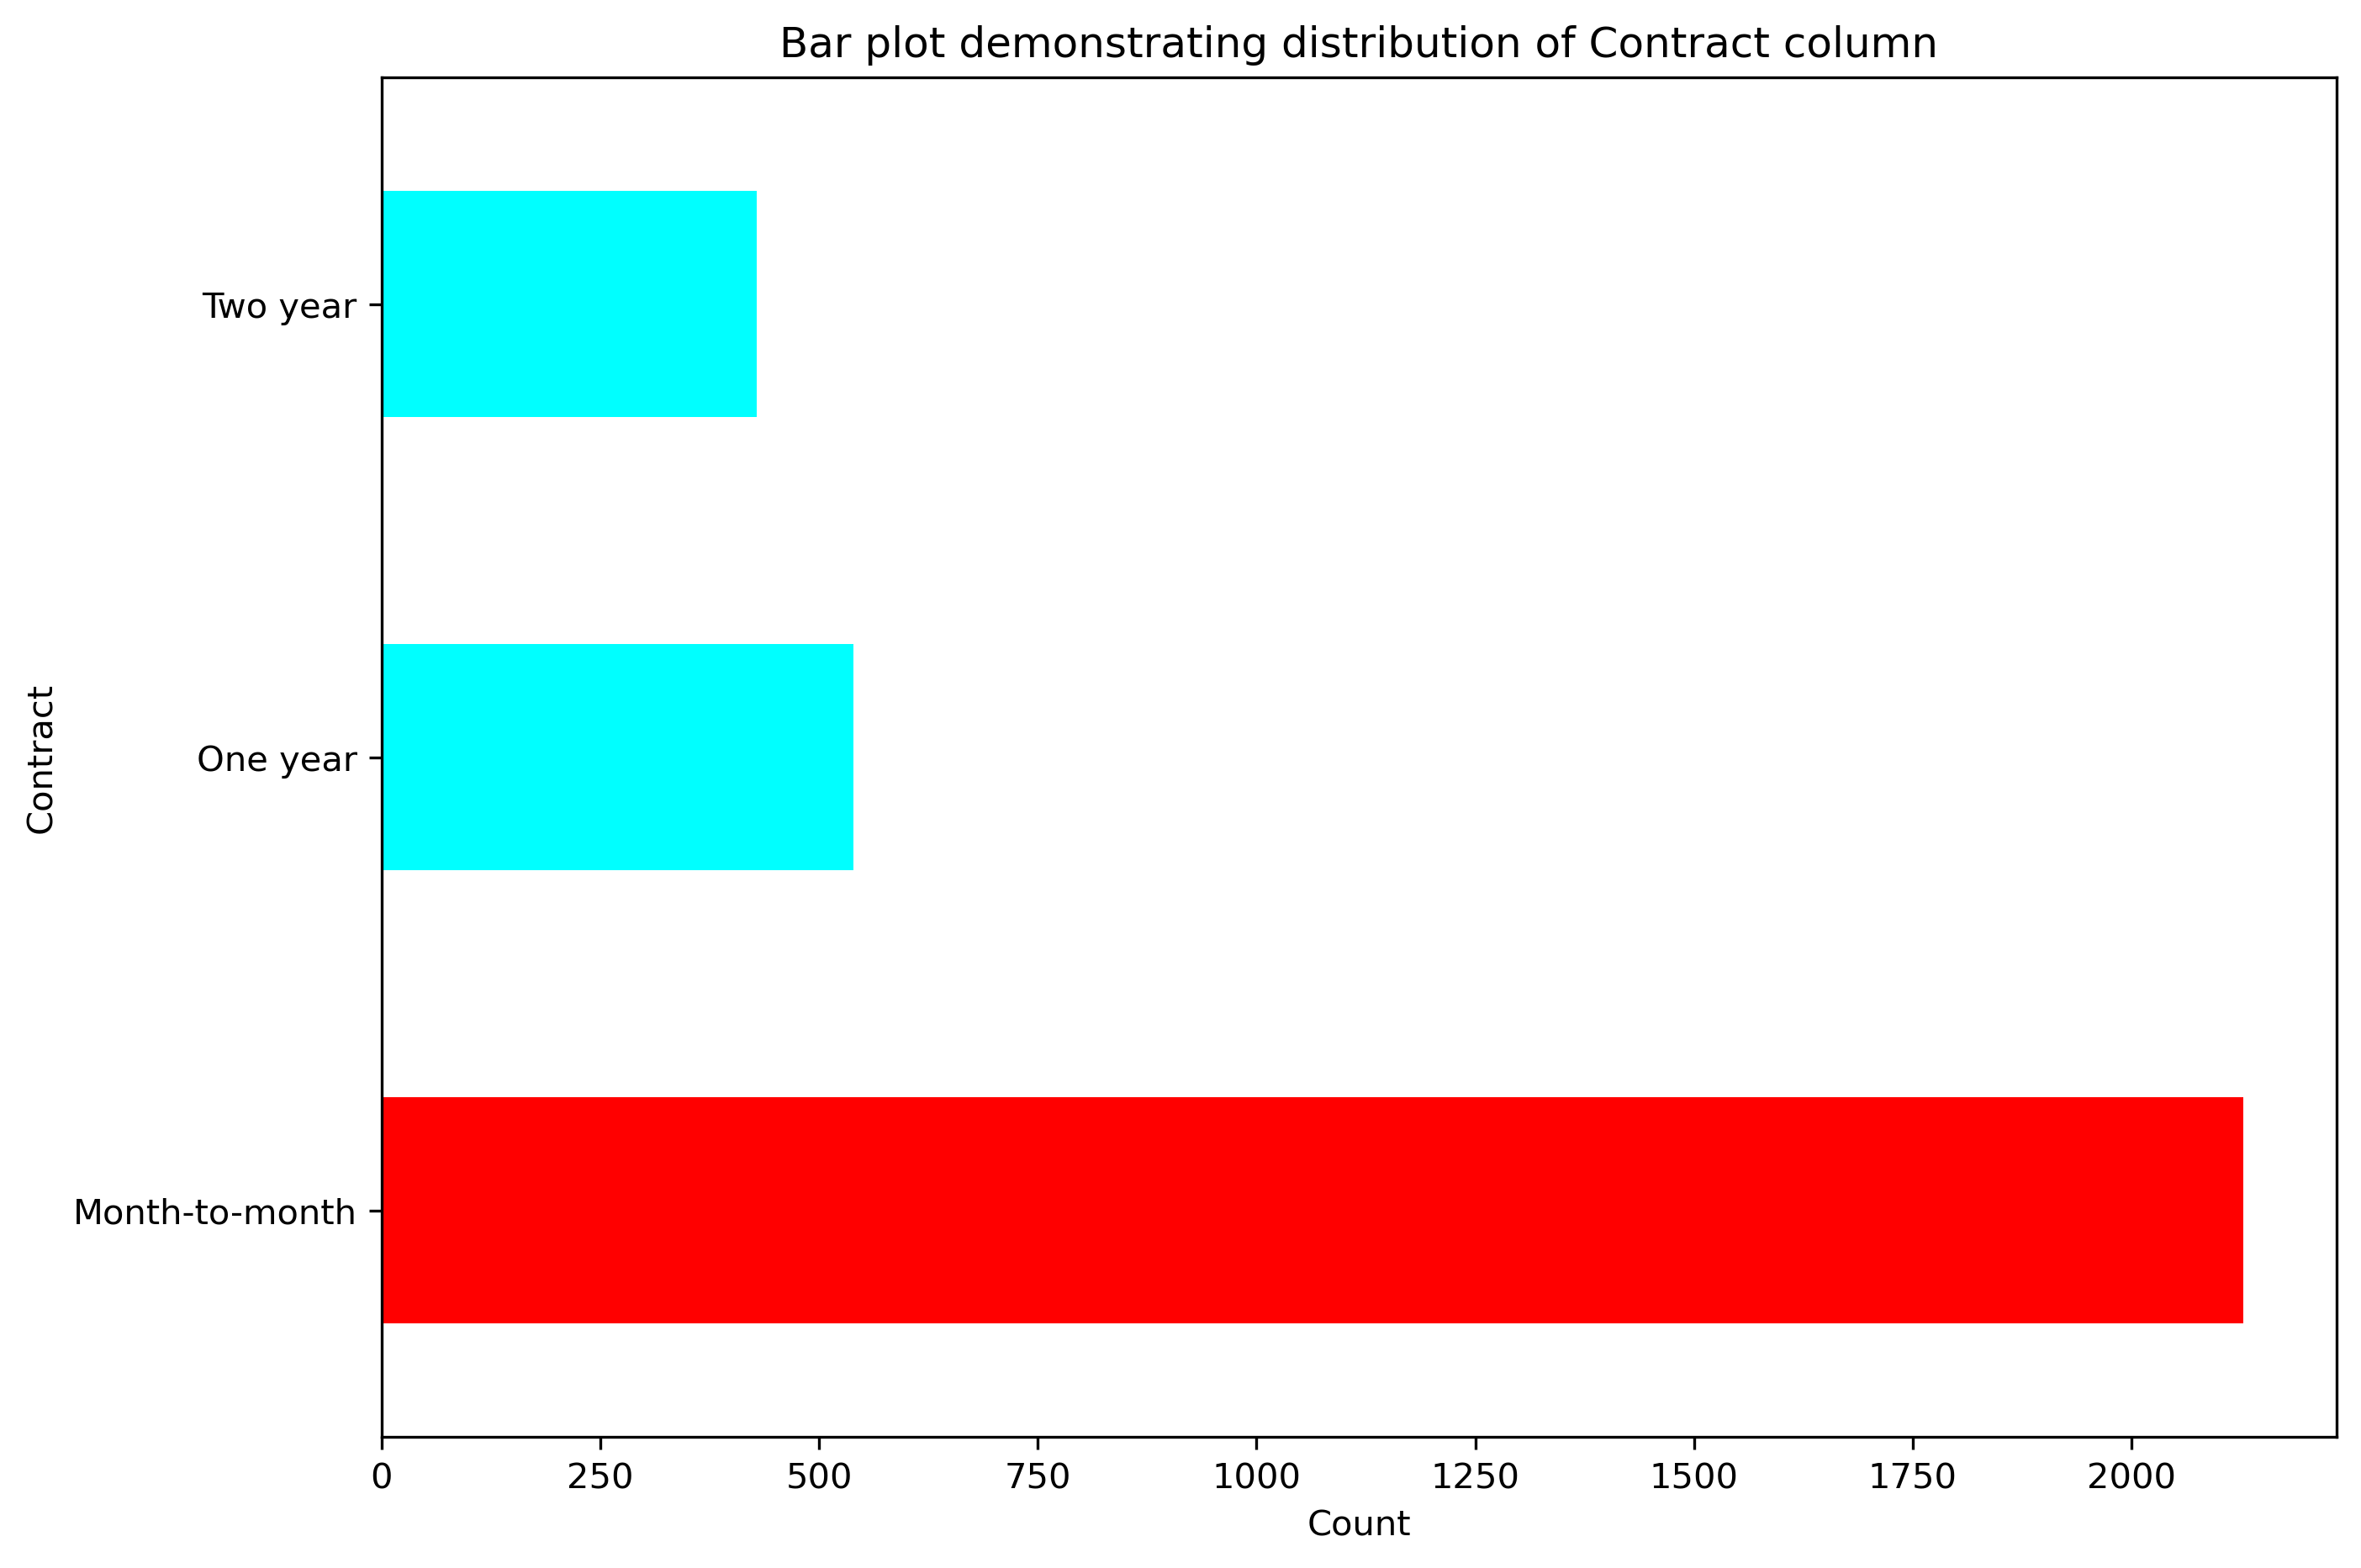

In [61]:
fiber_optic = telco_df[telco_df['InternetService']=='Fiber optic']

capstone_utils.horizontal_bar_plot_count(fiber_optic,'Contract', color =['red','cyan','cyan'])

Another reason for the high churn could be the fact that a large proportion of the customers who had Fiber Optic had month-to-month contracts. Therefore, they were not tied down to the company and were more economically independent should necessity arise, for them to leave the company. Meanwhile, if the customer was in a one-year or two-year contract they would find it very hard to leave unless they wanted to pay a large monetary fee to cancel the contract.

Let's see if this is the case for DSL customers too.

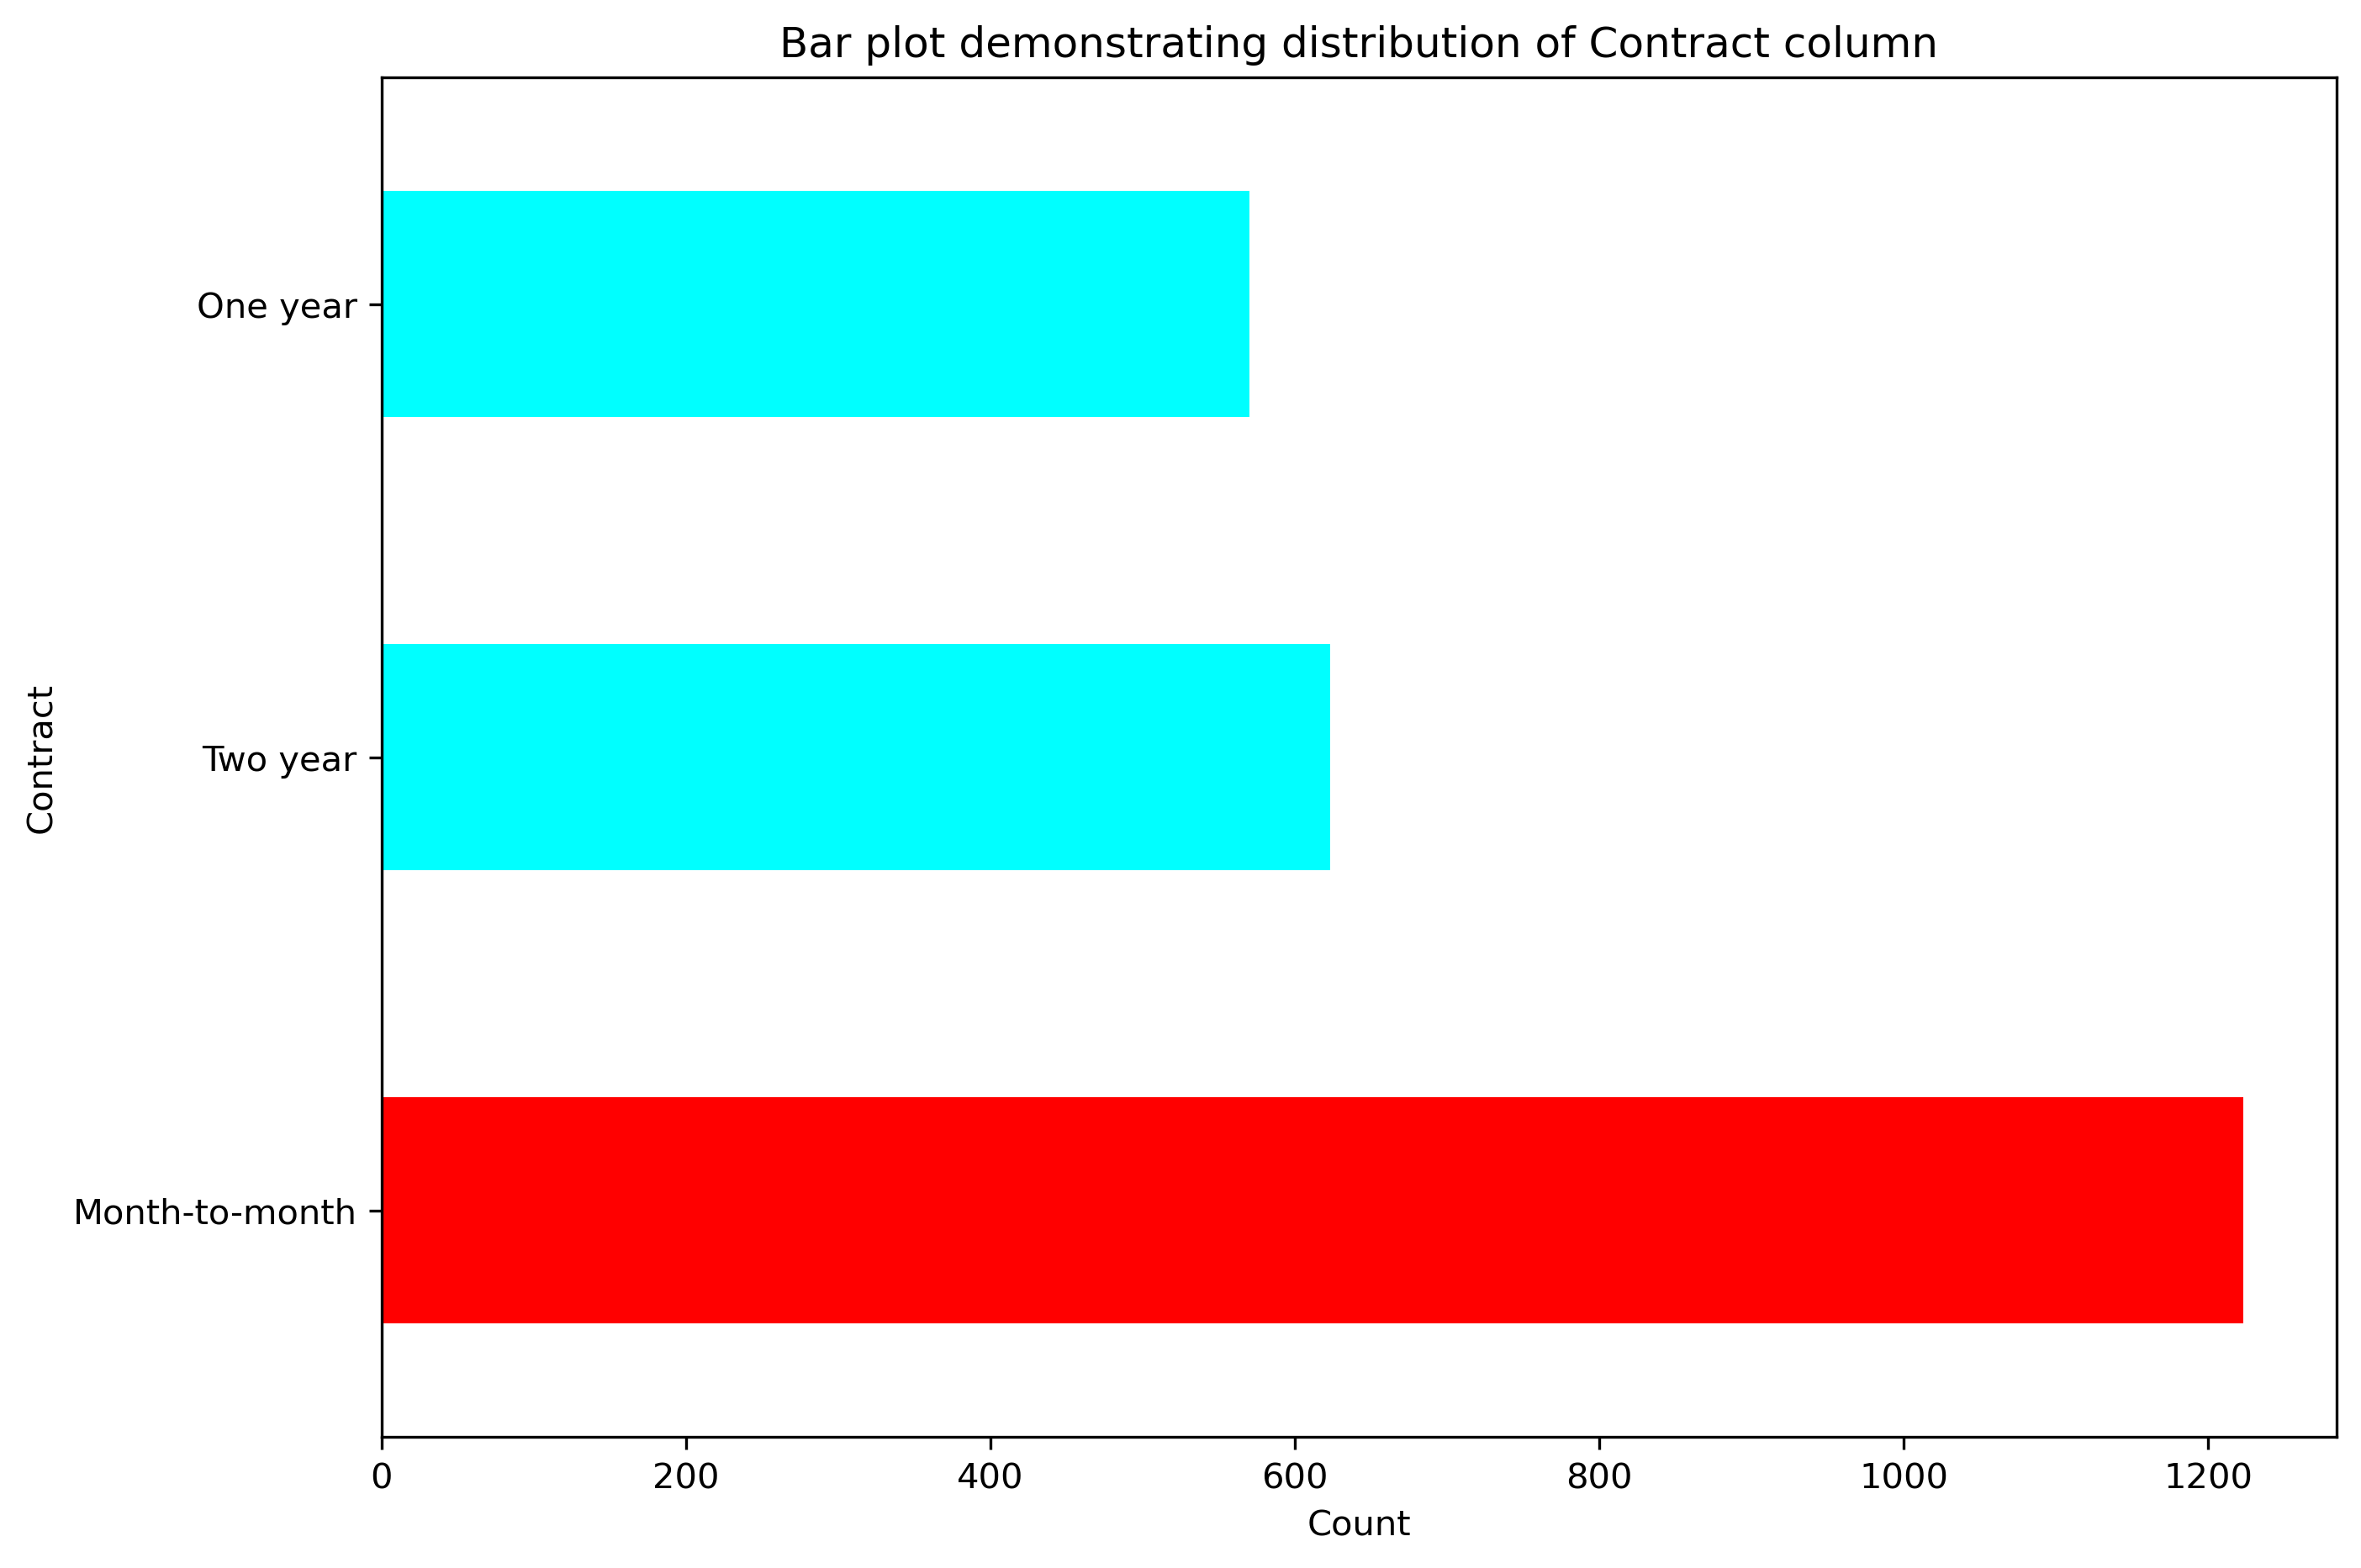

In [62]:
dsl = telco_df[telco_df['InternetService']=='DSL']

capstone_utils.horizontal_bar_plot_count(dsl,'Contract', color =['red','cyan','cyan'])

Yes, as expected there is a highly disproportionate amount of customers who pay for month-to-month contracts comapared with fixed term contracts. However, there is a higher number of fixed term contracts made by users. This is very interesting - customers feel that with DSL it is worth locking into a long term contract. 

Lastly, I want to explore whether those customers who did have Fiber Optic paid for any other services provided by Telco. To do this I looked at the TotalCharges.

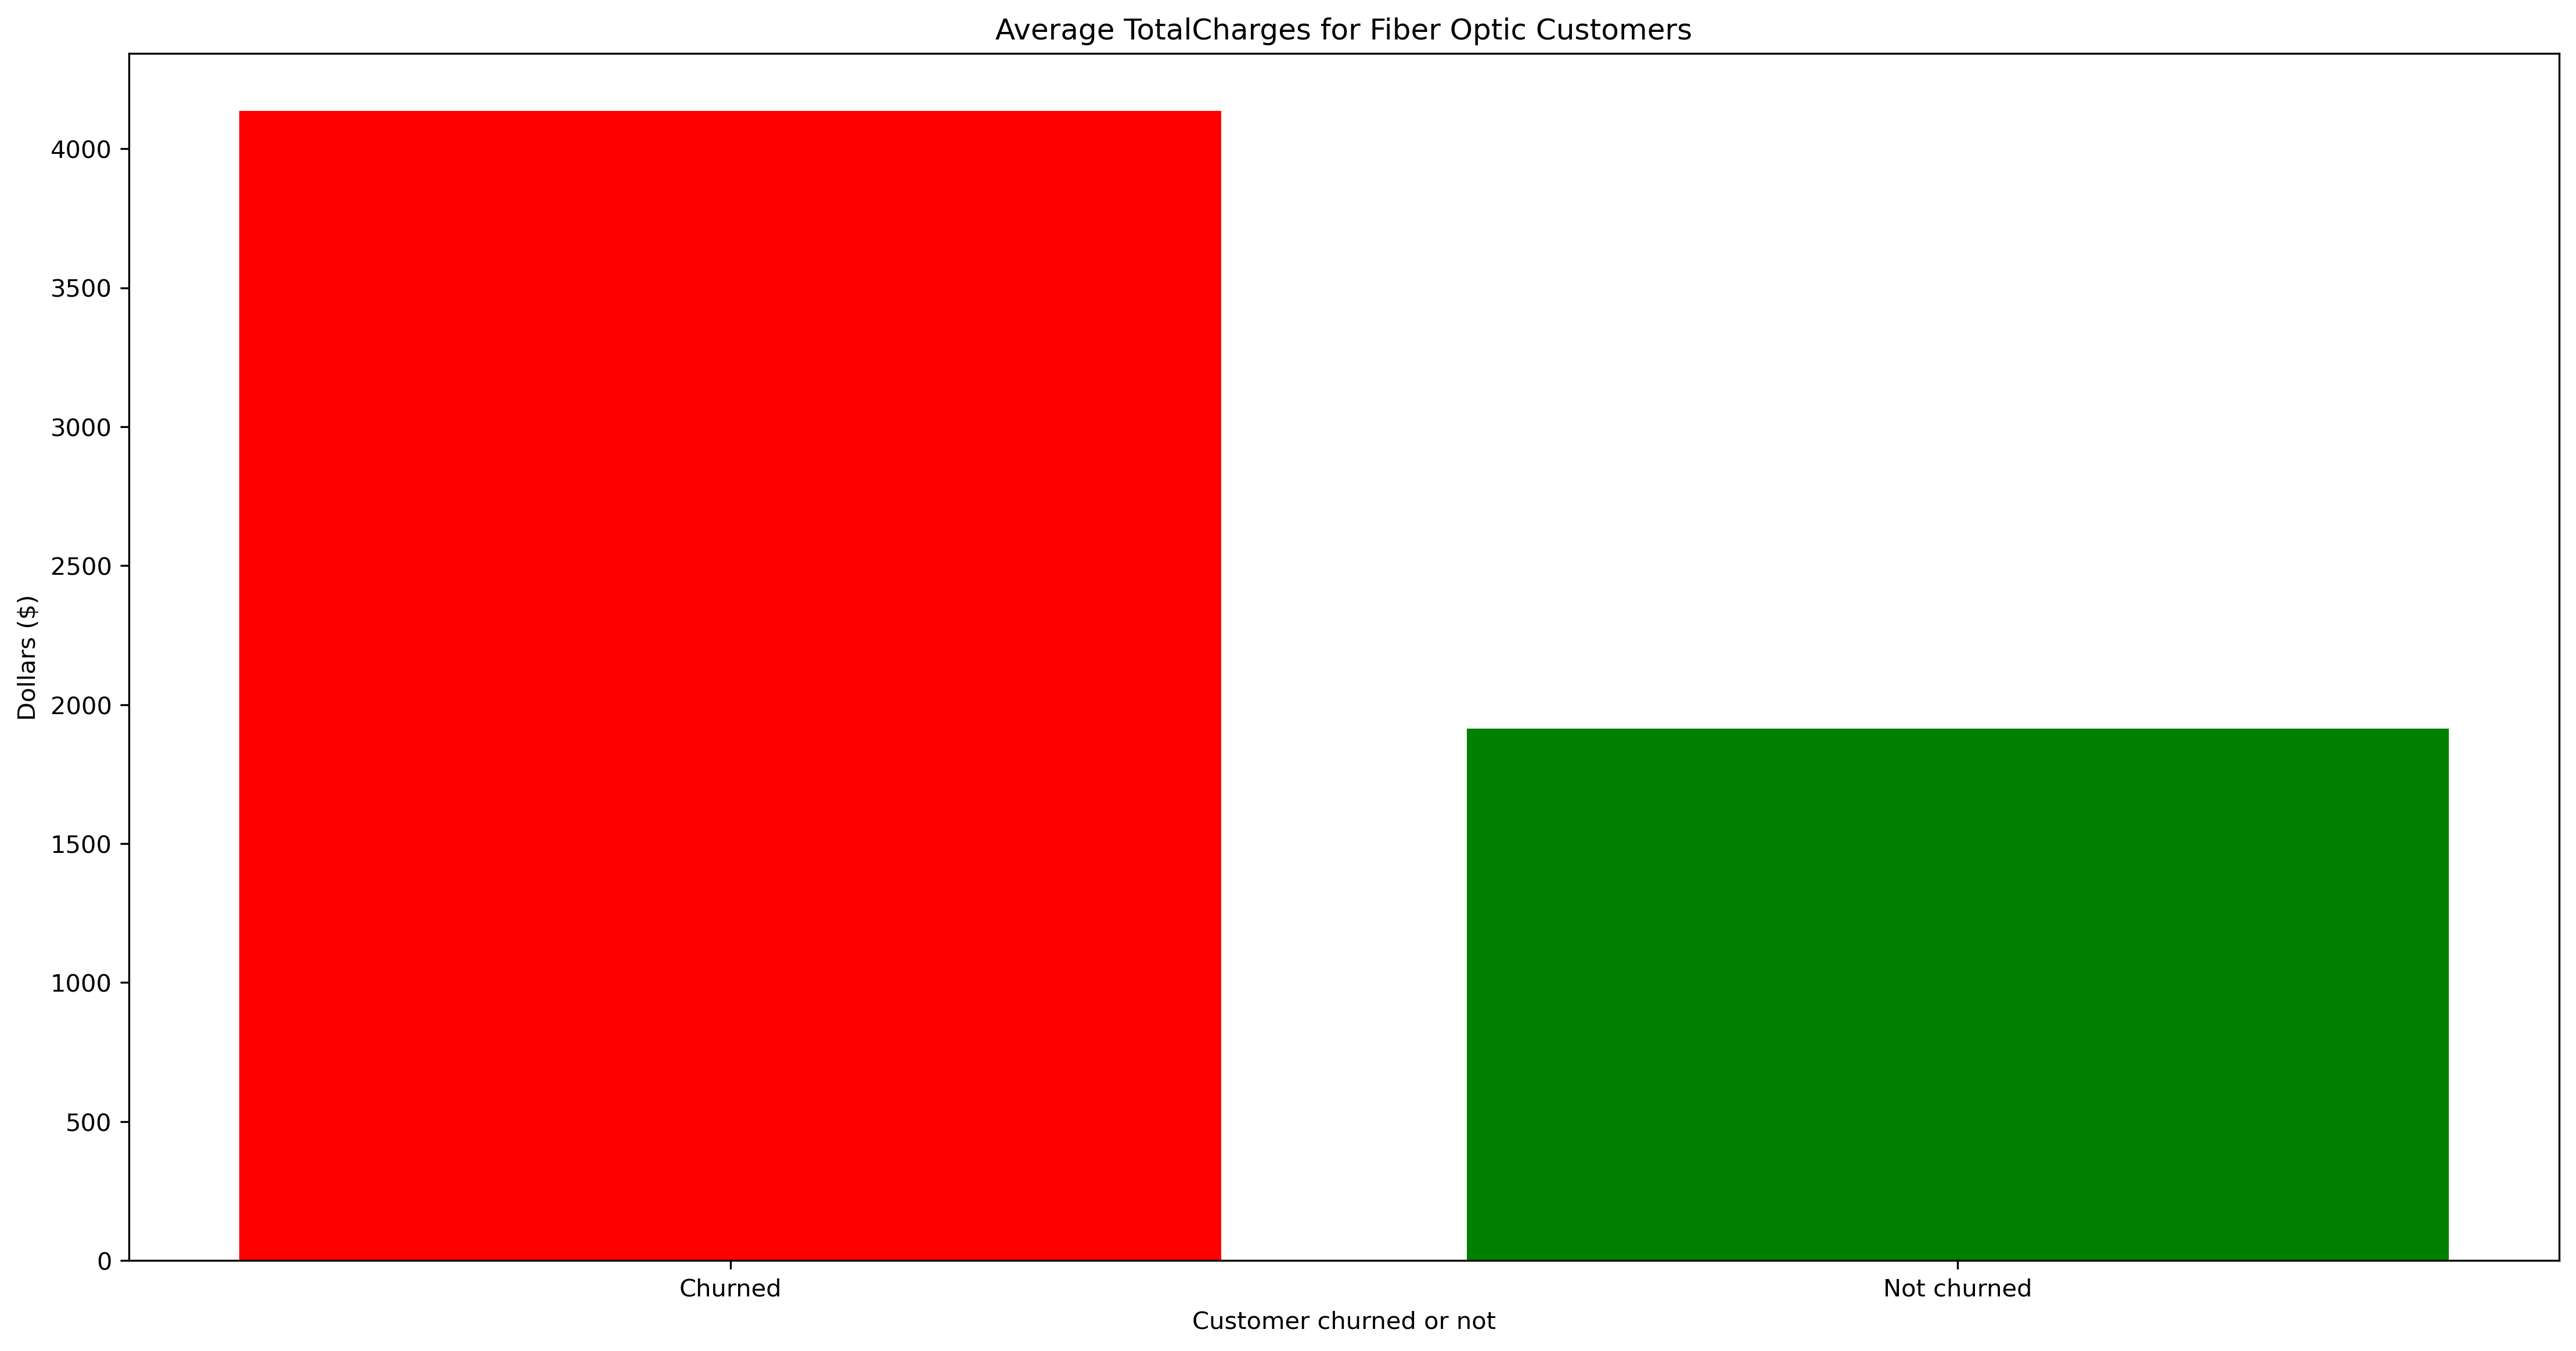

In [63]:
mean_churn = fiber_optic[fiber_optic['Churn']==0]['TotalCharges'].mean()
mean_non_churn = fiber_optic[fiber_optic['Churn']==1]['TotalCharges'].mean()

labels = ['Churned', 'Not churned']
data = [mean_churn, mean_non_churn]

plt.figure(figsize = (18,9))
plt.bar(labels, data, color = ['red','green'])
plt.title("Average TotalCharges for Fiber Optic Customers")
plt.ylabel('Dollars ($)')
plt.xlabel('Customer churned or not')
plt.show()

Looking at the bar plot above, it is strange to see that the Fiber Optic customers who churned spent a lot more than those who did not churn. This could be due to the fact that those customers who did churn were not satisfied with the services they were being provided. Or they were not satisfied with the fact that they were spending much more money for the services compared to competitors. Meanwhile, those who did not churn spent much less and therefore did not feel like they had to leave the company.

In addition, out of the customers who paid for fiber optic they may have not been able to experience the full satisfaction of fiber optic as they were not paying for other services which compliment it. Such as Online back up, onlin security etc which could be another reason as to why they churned. 

### Distribution: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

I have decided to streamline the EDA process for these 6 columns as they contain similar information. 

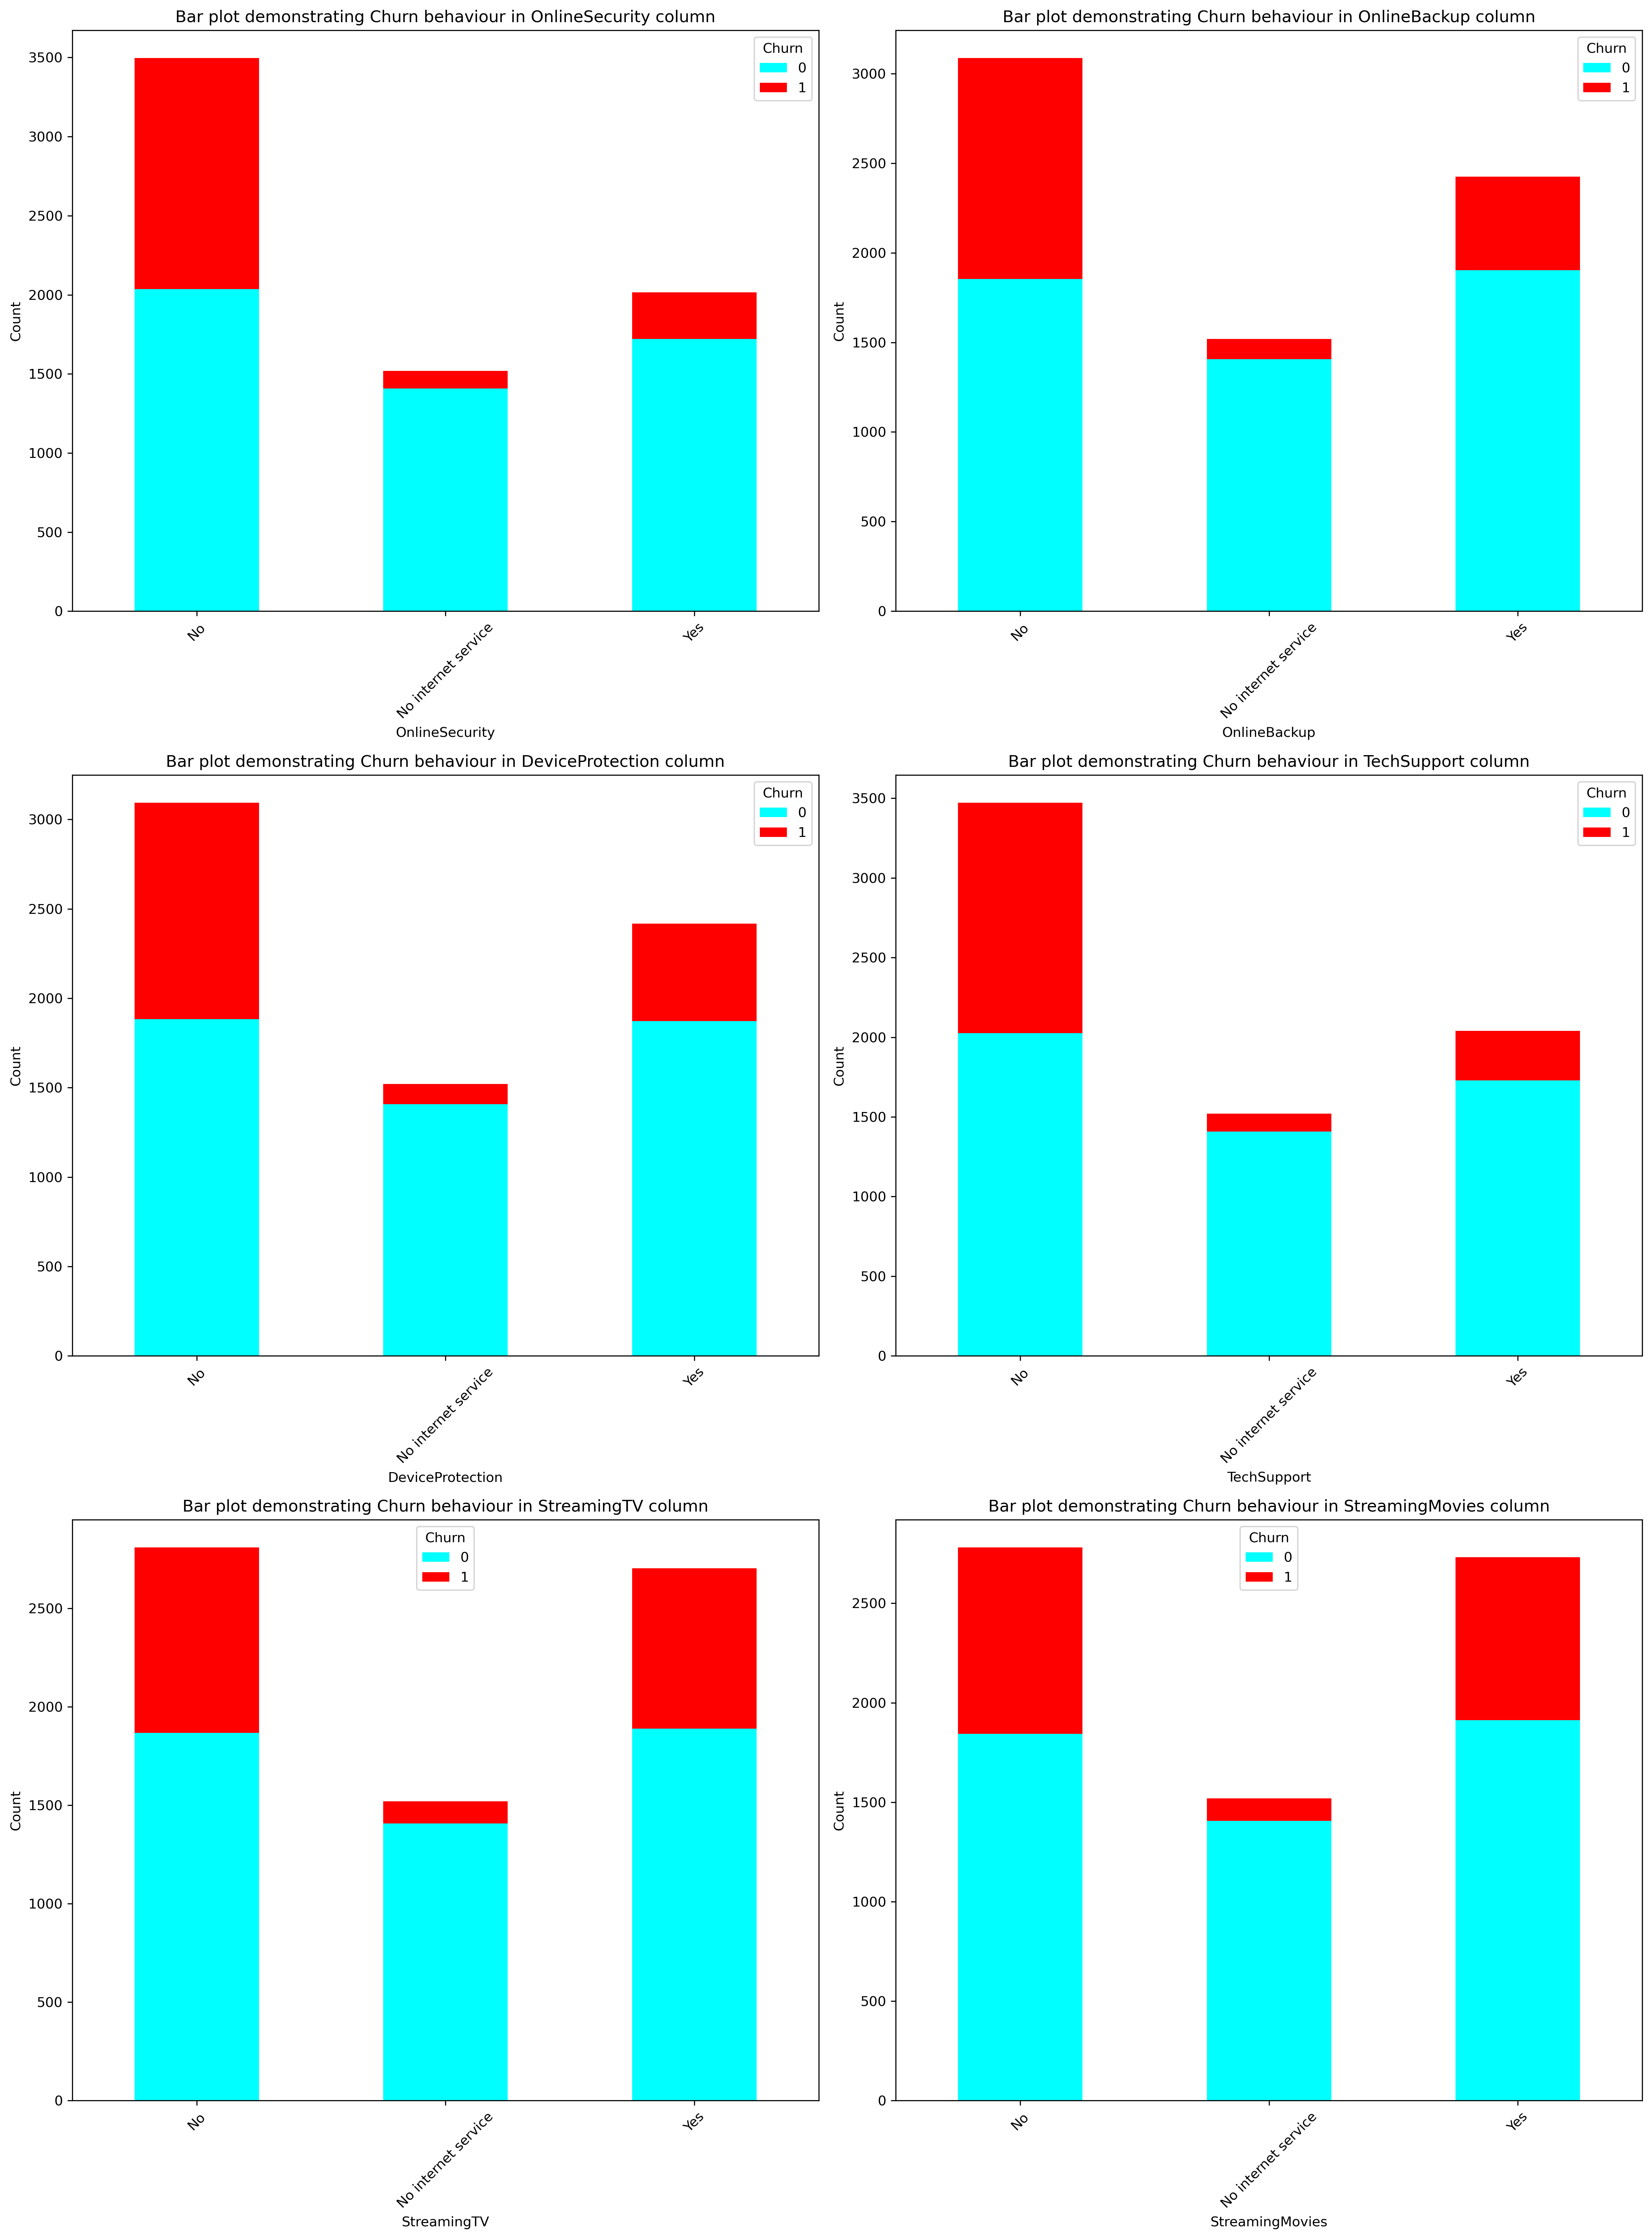

In [64]:
services = ['OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']

fig, axs = plt.subplots(3, 2, figsize=(17, 25))
count = 1

for serv, ax in zip(services, axs.flatten()):
    plt.subplot(3, 2, count)
    capstone_utils.plot_stacked_dist(telco_df, serv,figsize = (17,23),ax=ax)
    plt.xticks(rotation = 45)
    count += 1
    
plt.tight_layout()
plt.show()

As expected, the highest category is 'No' and as expected these customers churned the highest. My hypothesis as to why these customers churned the most is because these customers did not subscribe to all the services provided by Telco. Therefore, they felt no attachment to the company and as a result were able to churn easier than other customers. However, the StreamingTV and StreamingMovies column are nearly equal into distribution - I will explore whether I can combine the two columns in Notebook 3. Given that those who streamed TV would also highly likely stream movies - I shall just explore the StreamingTV column.

#### Exploring StreamingTV further

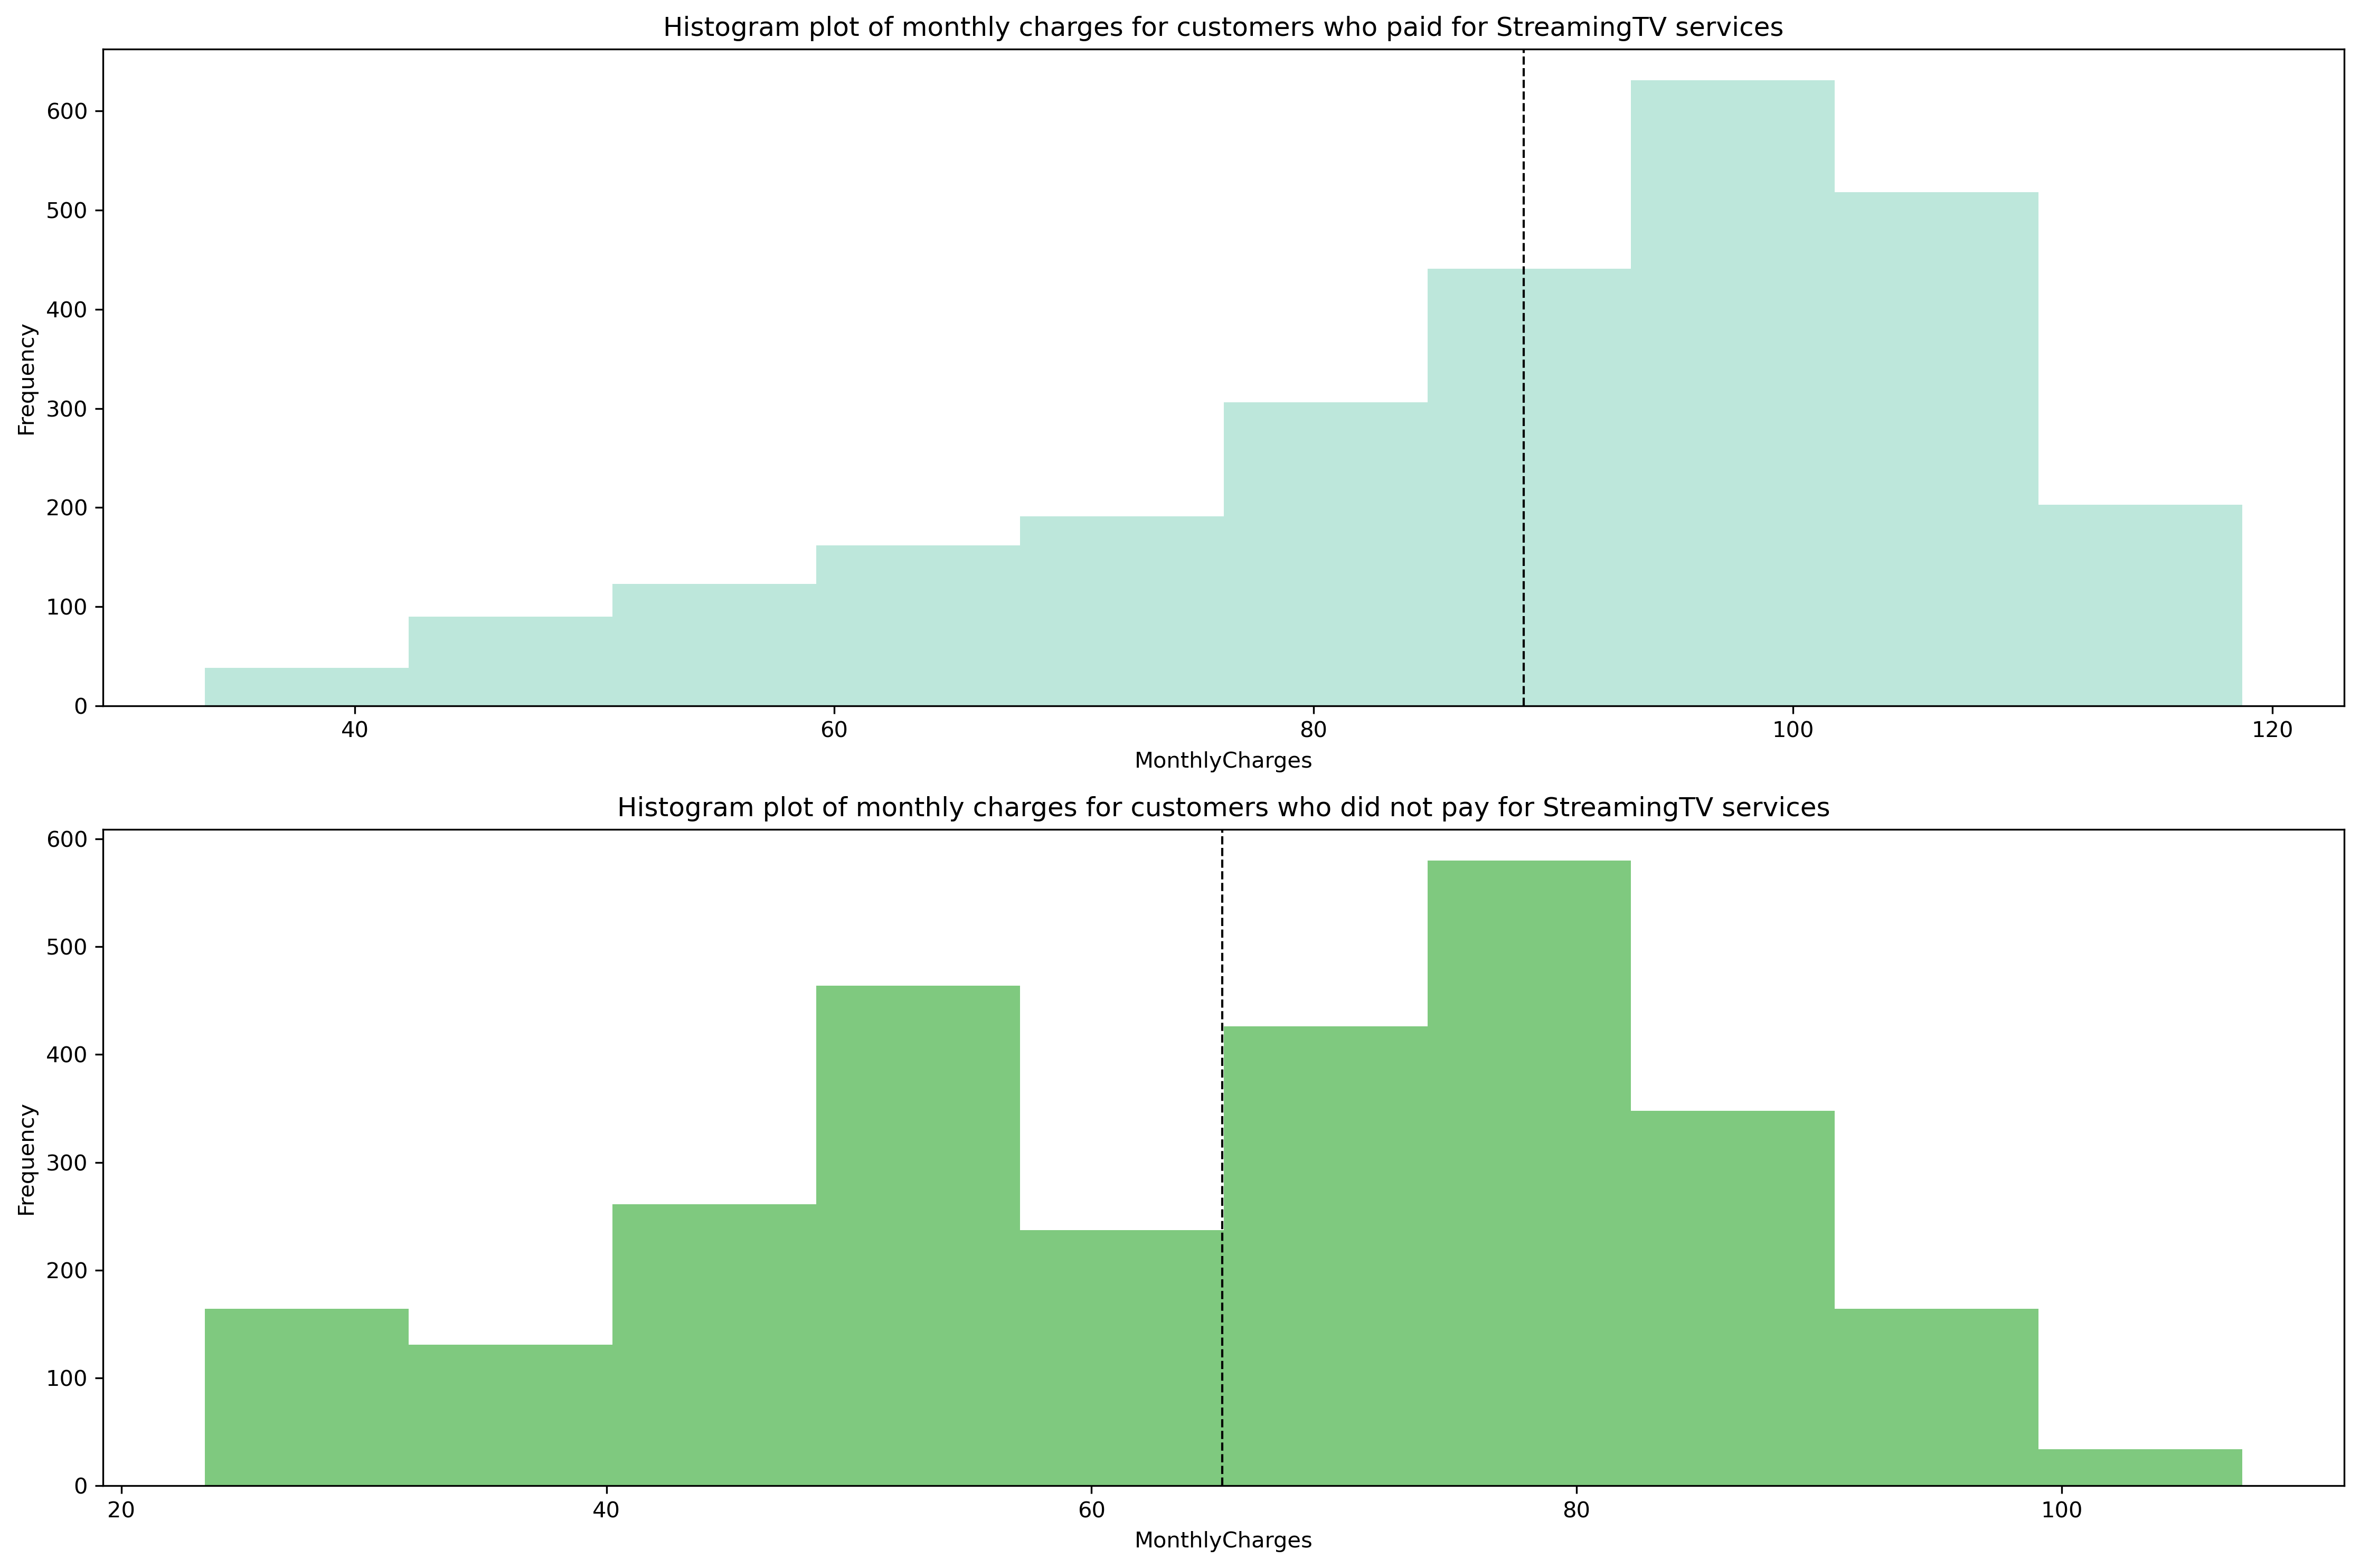

In [65]:
stream_yes = telco_df[telco_df["StreamingTV"]=='Yes']
stream_no = telco_df[telco_df["StreamingTV"]=='No']

titles = ["Histogram plot of monthly charges for customers who paid for StreamingTV services","Histogram plot of monthly charges for customers who did not pay for StreamingTV services"]
dfs = [stream_yes,stream_no]
colors = ['icefire','Accent']
count = 1

plt.subplots(2, 1, figsize=(15, 10))
for frames in dfs:
    plt.subplot(2,1,count)
    capstone_utils.df_histogram(frames,'MonthlyCharges',bins = 10,figsize=(15,10),colormap = colors[count-1])
    plt.title(titles[count-1])
    count +=1

plt.tight_layout()
plt.show()


As expected, price is the biggest factor for customers and it has a direct impact on churn. Looking at the histogram plot of the customers who pay for StreamingTV compared to those who do not, those who pay for this service on average are spending more per month compared to those who do not. As mentioned earlier - with the rise of streaming services such as Netflix telco companies are partnering up with these services. Another company maybe providing a more attractive service at a cheaper price causing customers to leave.

 This may be the first reason as to why those who did pay for this service churned. Let's explore this further.

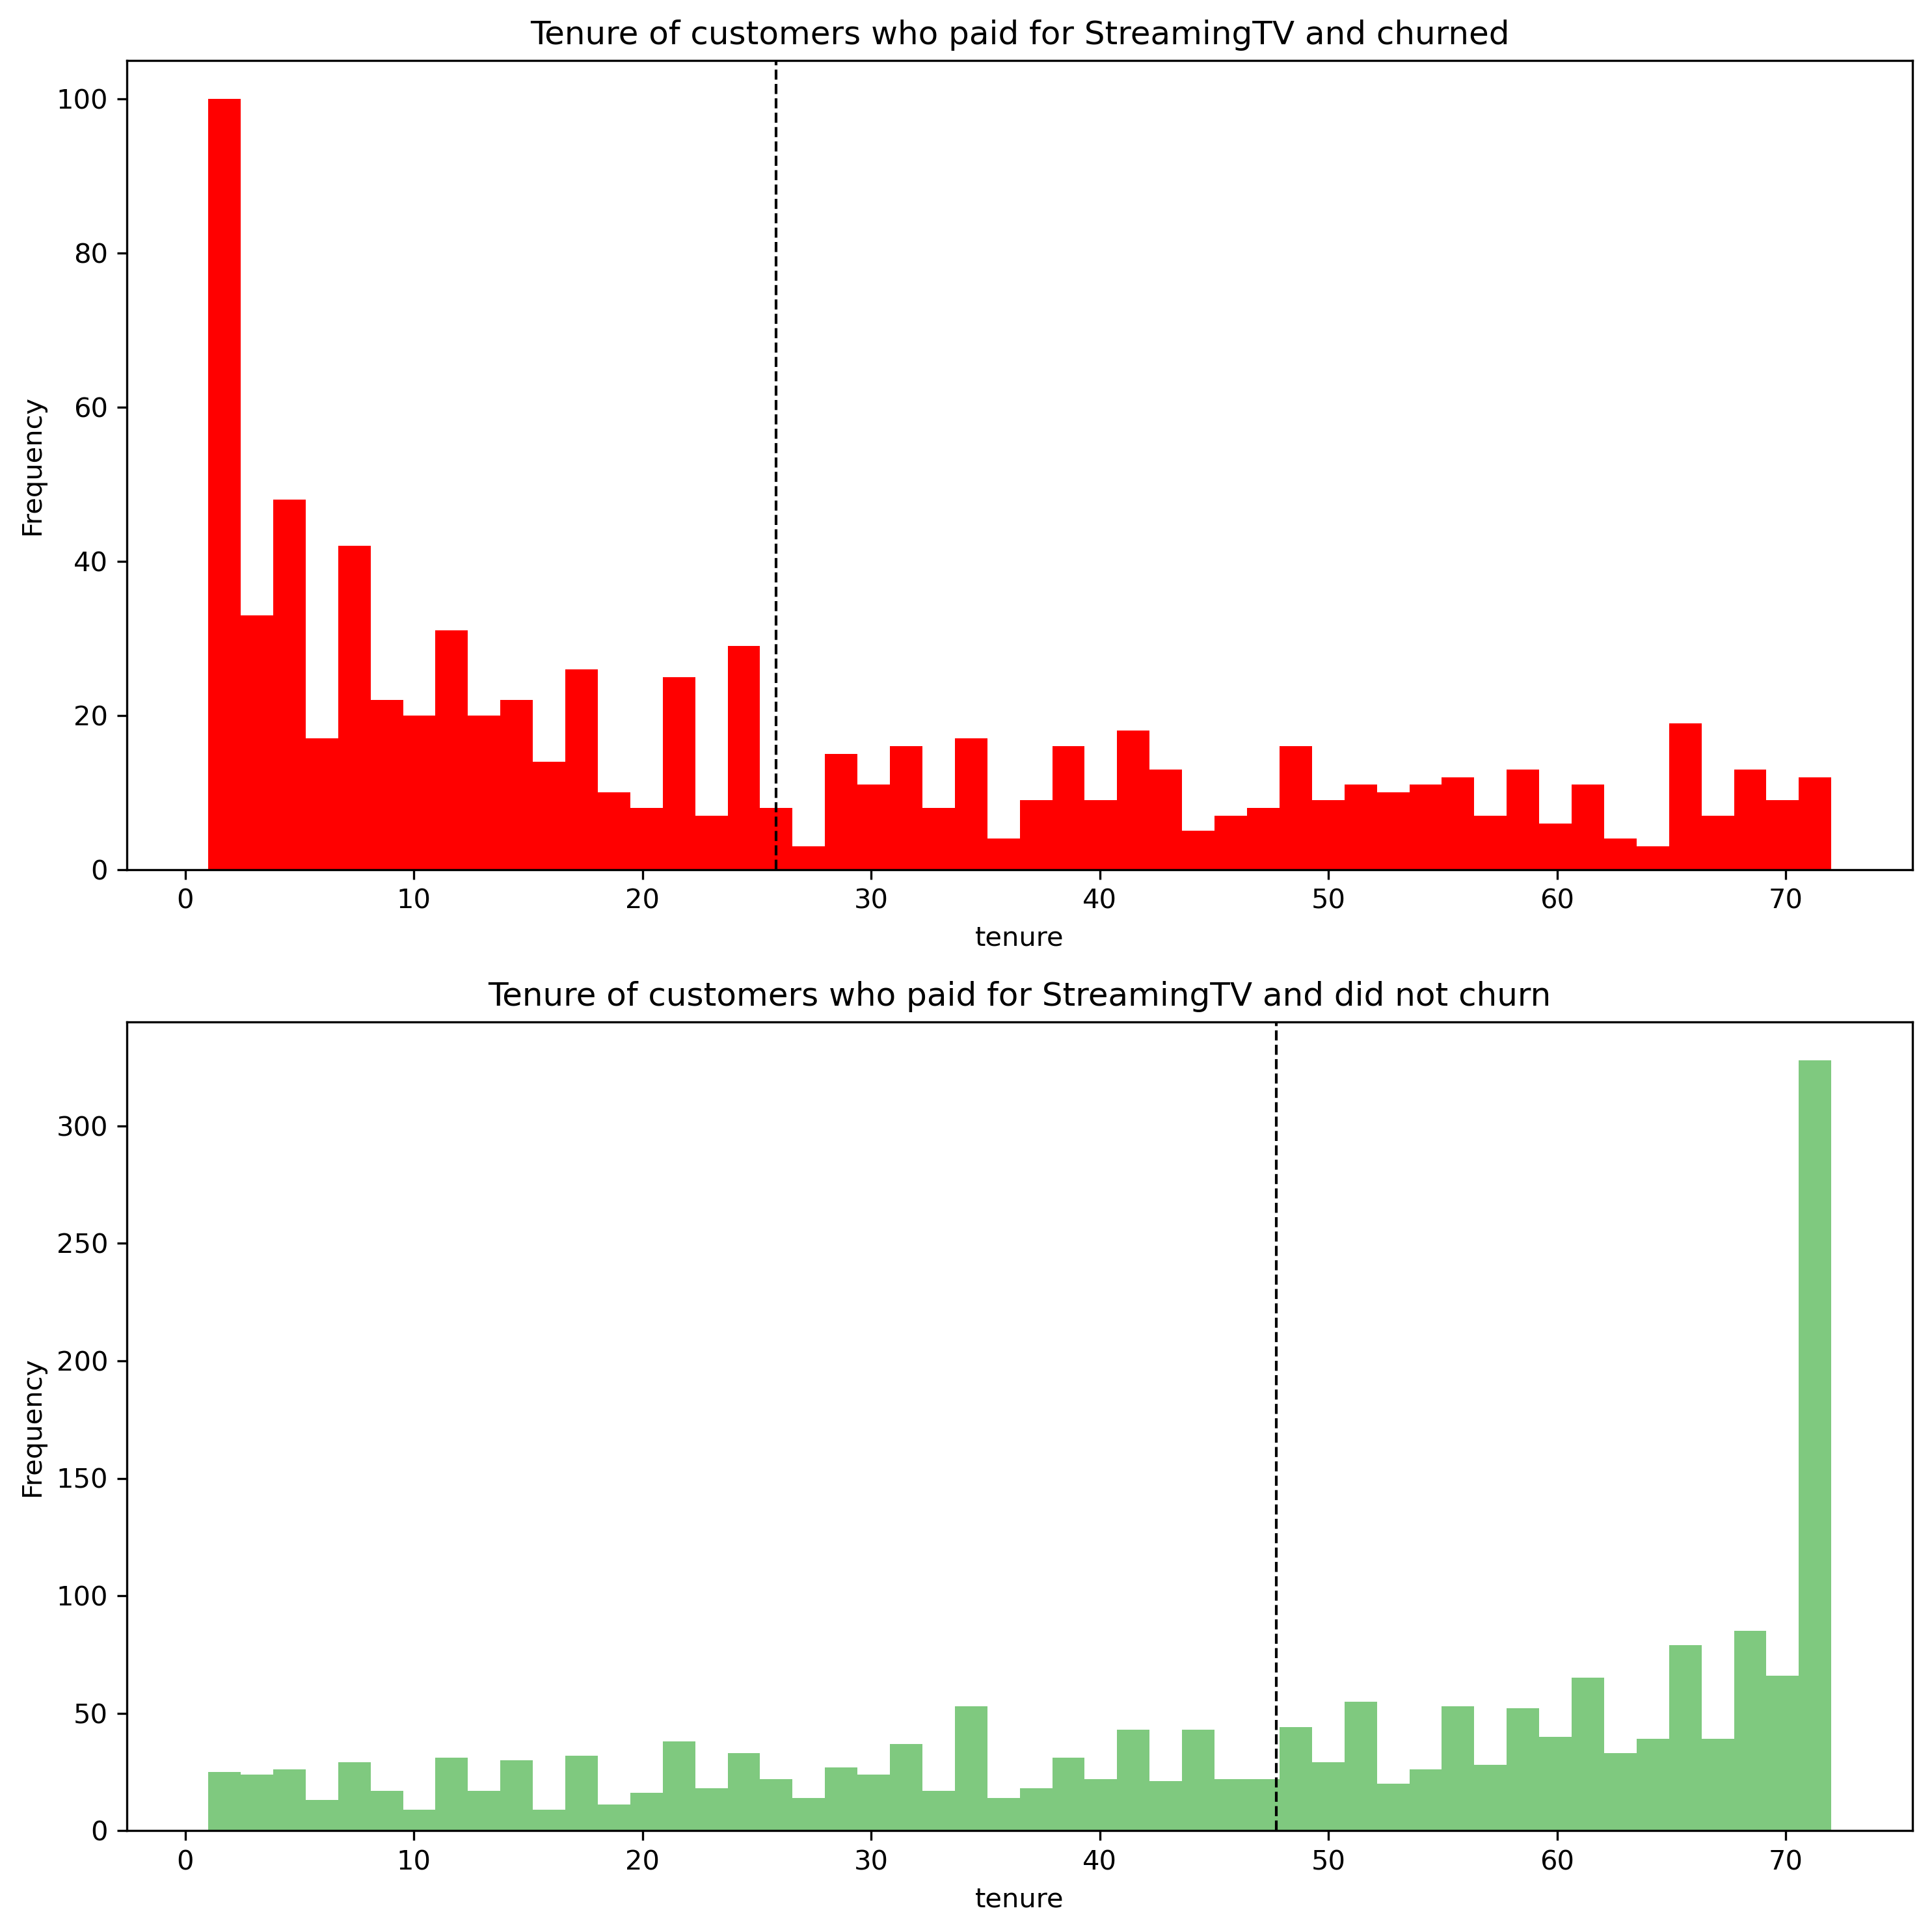

In [66]:
churned = telco_df[(telco_df["StreamingTV"]=='Yes')&(telco_df['Churn']==1)]
not_churned = telco_df[(telco_df["StreamingTV"]=='Yes')&(telco_df['Churn']==0)]

dfs = [churned, not_churned]
titles = ["Tenure of customers who paid for StreamingTV and churned","Tenure of customers who paid for StreamingTV and did not churn"]
colors = ['autumn','Accent']

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
count = 1

for frame, ax in zip(dfs, axs.flatten()):
    plt.subplot(2, 1, count)
    capstone_utils.df_histogram(frame,'tenure',figsize = (10,10),colormap = colors[count-1],ax=ax)
    plt.title(titles[count-1])
    count += 1
    
plt.tight_layout()
plt.show()


Looking at the two plots, they mirror each other. One of the biggest reasons a customer churns other than price is brand loyalty - this can be represented by how long a customer is with the company. Looking at the churn histogram on the left, customers left the company within the first year with a massive proportion in the first 10 months. This could be attributed to massive customer dissatisfaction of the service - which was represented by the fact most of these customers had a month-to-month contract. 

Meanwhile on the other hand those customers who did not churn stayed with the company for a massive 6+ years, these customers have massive brand loyalty and it will be hard to sway these customers. They are happy with the service they are being provided. 

### Distribution: Contract

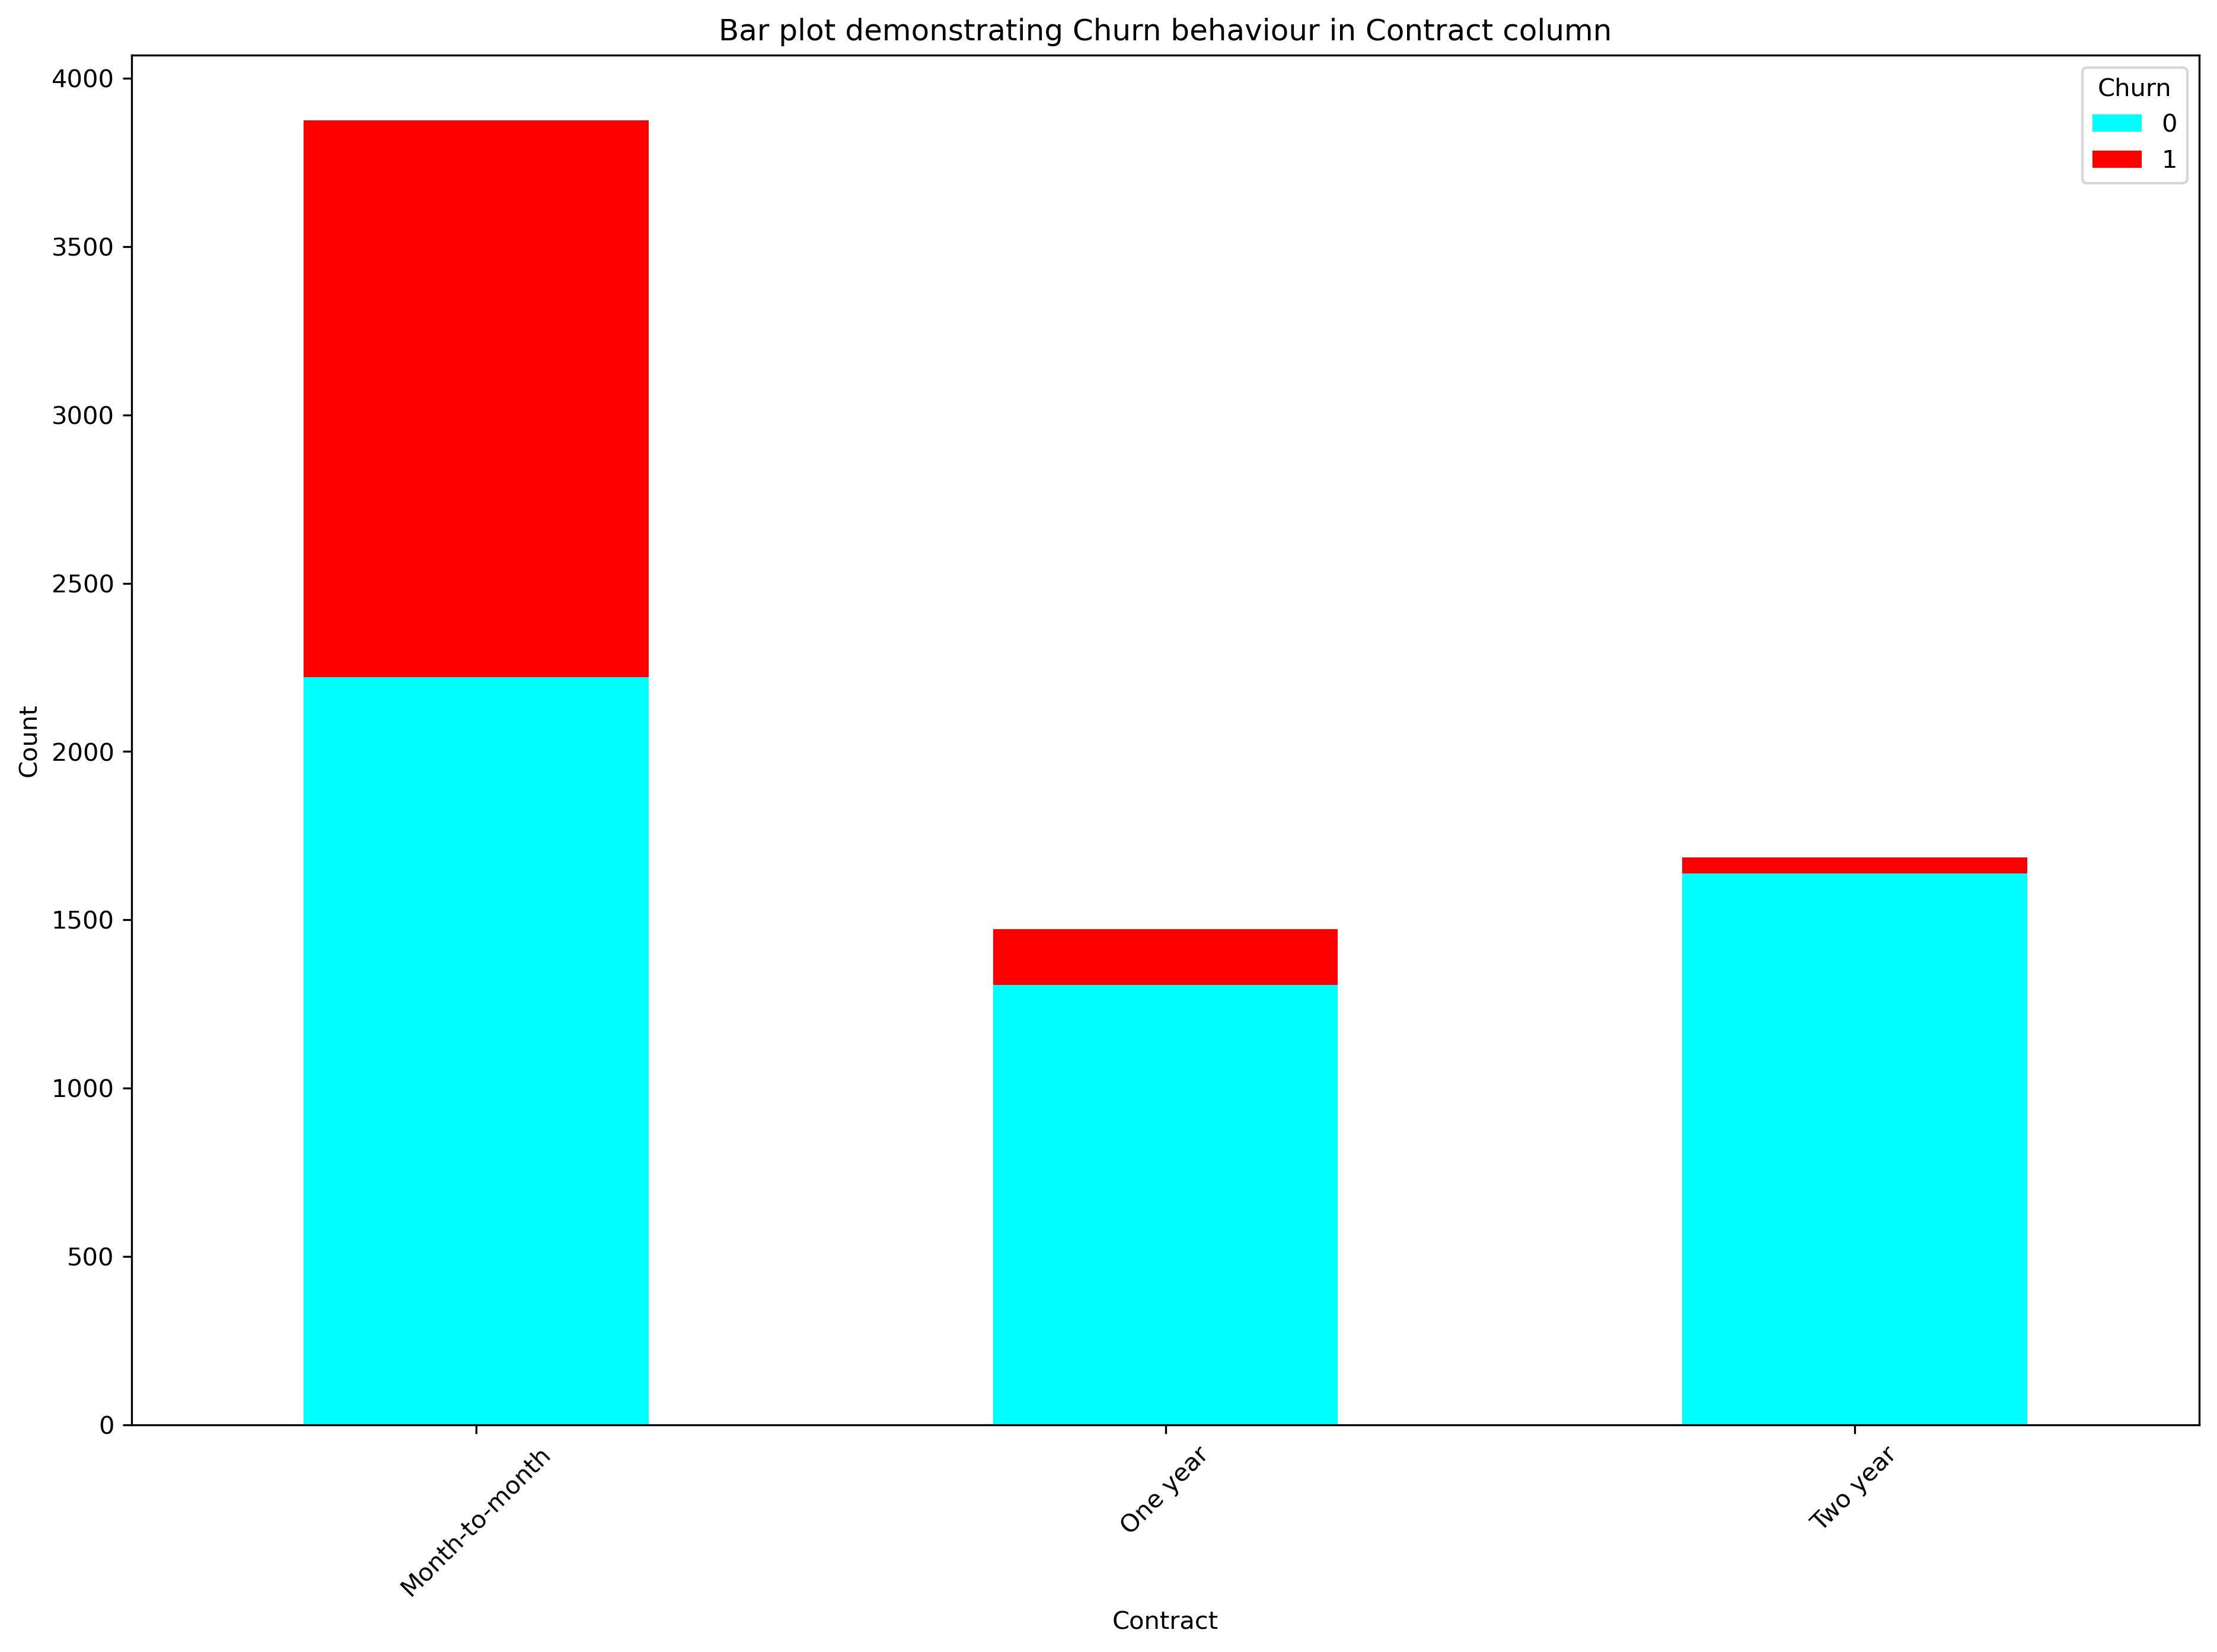

In [67]:
capstone_utils.plot_stacked_dist(telco_df, "Contract")

In [68]:
capstone_utils.churn_percentage(telco_df, "Contract")

Contract
{'Month-to-month': 42.7, 'One year': 11.3, 'Two year': 2.8}


As demonstrated a massive proportion of the customers who were on month-to-month contracts churned compared to the other two fixed term contracts. This is to be expected. These customers who are on month-to-month contracts have no ties to the company and more economically independent, they don't face the possibility of massive monetary losses if they were to leave the company. The goal for Telco is to be able to get these customers on fixed term contracts if they want to retain more customers - be it through discounts or more appealing prices. 

I want to see if there are any customers cutting their contracts short and explore the data to see if there is a reason why.

In [69]:
one_year = telco_df[(telco_df['Contract']=='One year')&(telco_df['Churn']==1)]
count = 0
for row in one_year['tenure']:
    if row < 12:
        count += 1
    else:
        pass

pct = round((count/len(one_year['tenure']))*100,2)
print("Percentage of customers on One year contracts cutting their contracts short: " + str(pct))

Percentage of customers on One year contracts cutting their contracts short: 4.82


Looking at the percentages above and below, out of the customers who churned a very small amount of them cut their contract early - which shows that the customers who are in fixed term contracts stay with the company for the duration of the contract.

In [70]:
two_year = telco_df[(telco_df['Contract']=='Two year')&(telco_df['Churn']==1)]
count = 0
for row in two_year['tenure']:
    if row < 24:
        count += 1
    else:
        pass

pct = round((count/len(two_year['tenure']))*100,2)
print("Percentage of customers on Two year contracts cutting their contracts short: " + str(pct))

Percentage of customers on Two year contracts cutting their contracts short: 0.0


I want to see if the customers who have month-to-month contracts are spending more per month compared to fixed term contract customers. 

In [71]:
capstone_utils.contract_month_averages(telco_df)

Month to month   One Year   Two year
0        66.39849  65.079416  60.872374

As expected the monthly average spend for month to month contracts is higher than fixed term contracts which is expected - companies will price contracts at a lower price to entice customers to join the company through these contracts. 

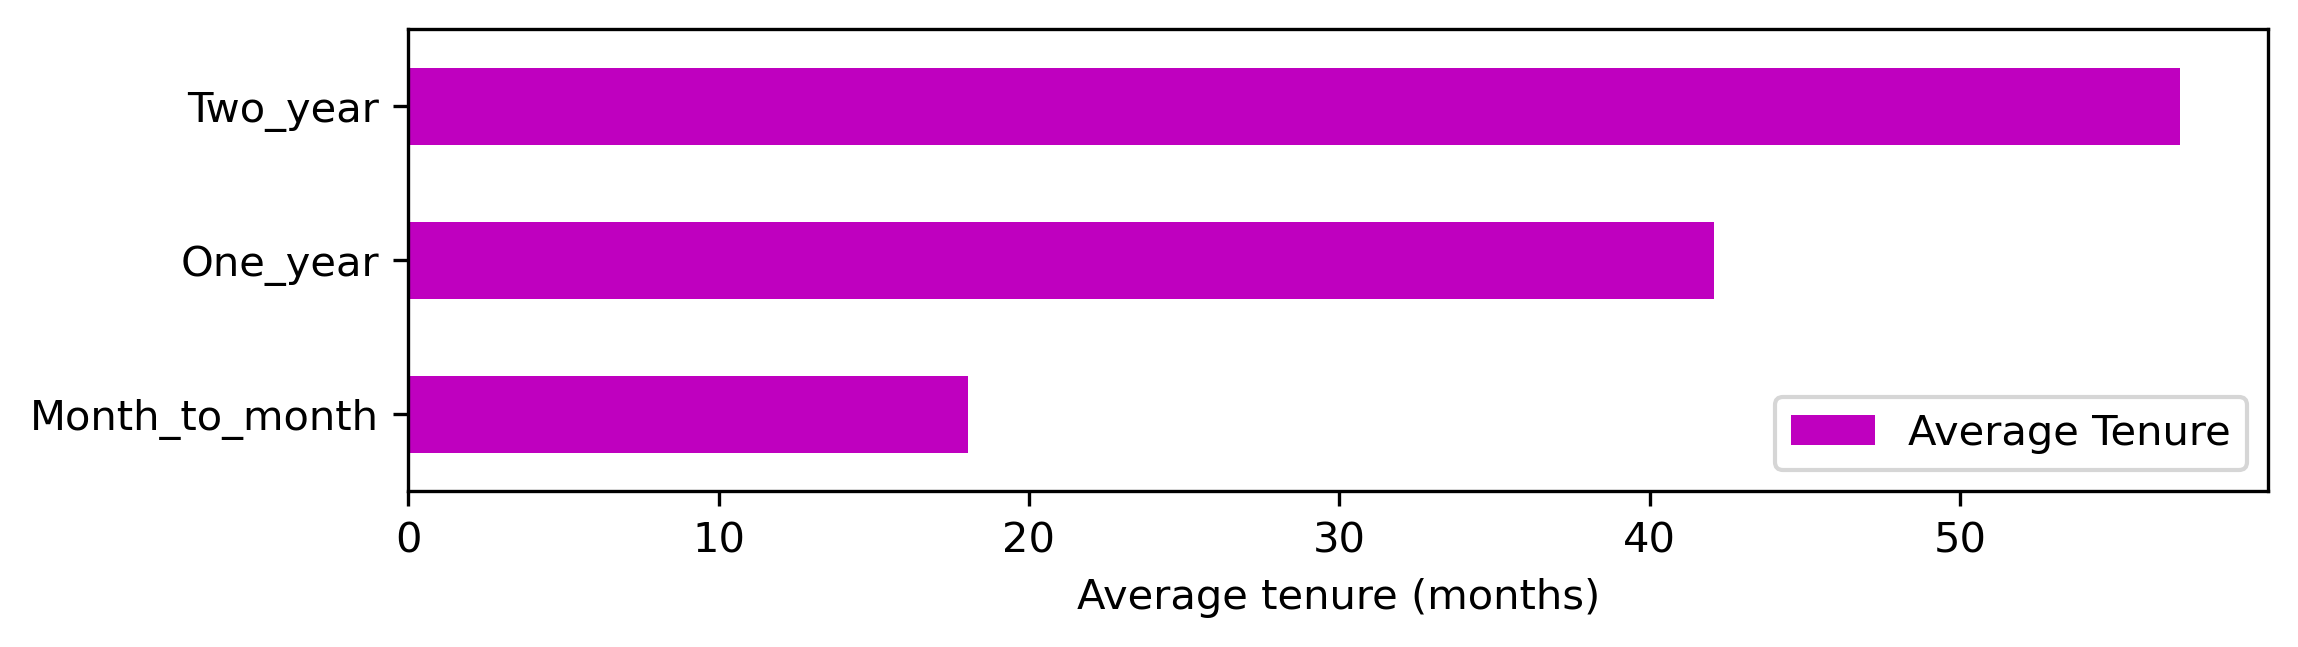

In [72]:
capstone_utils.plot_contract_tenure(telco_df)

### Distribution: PaperlessBilling and PaymentMethod

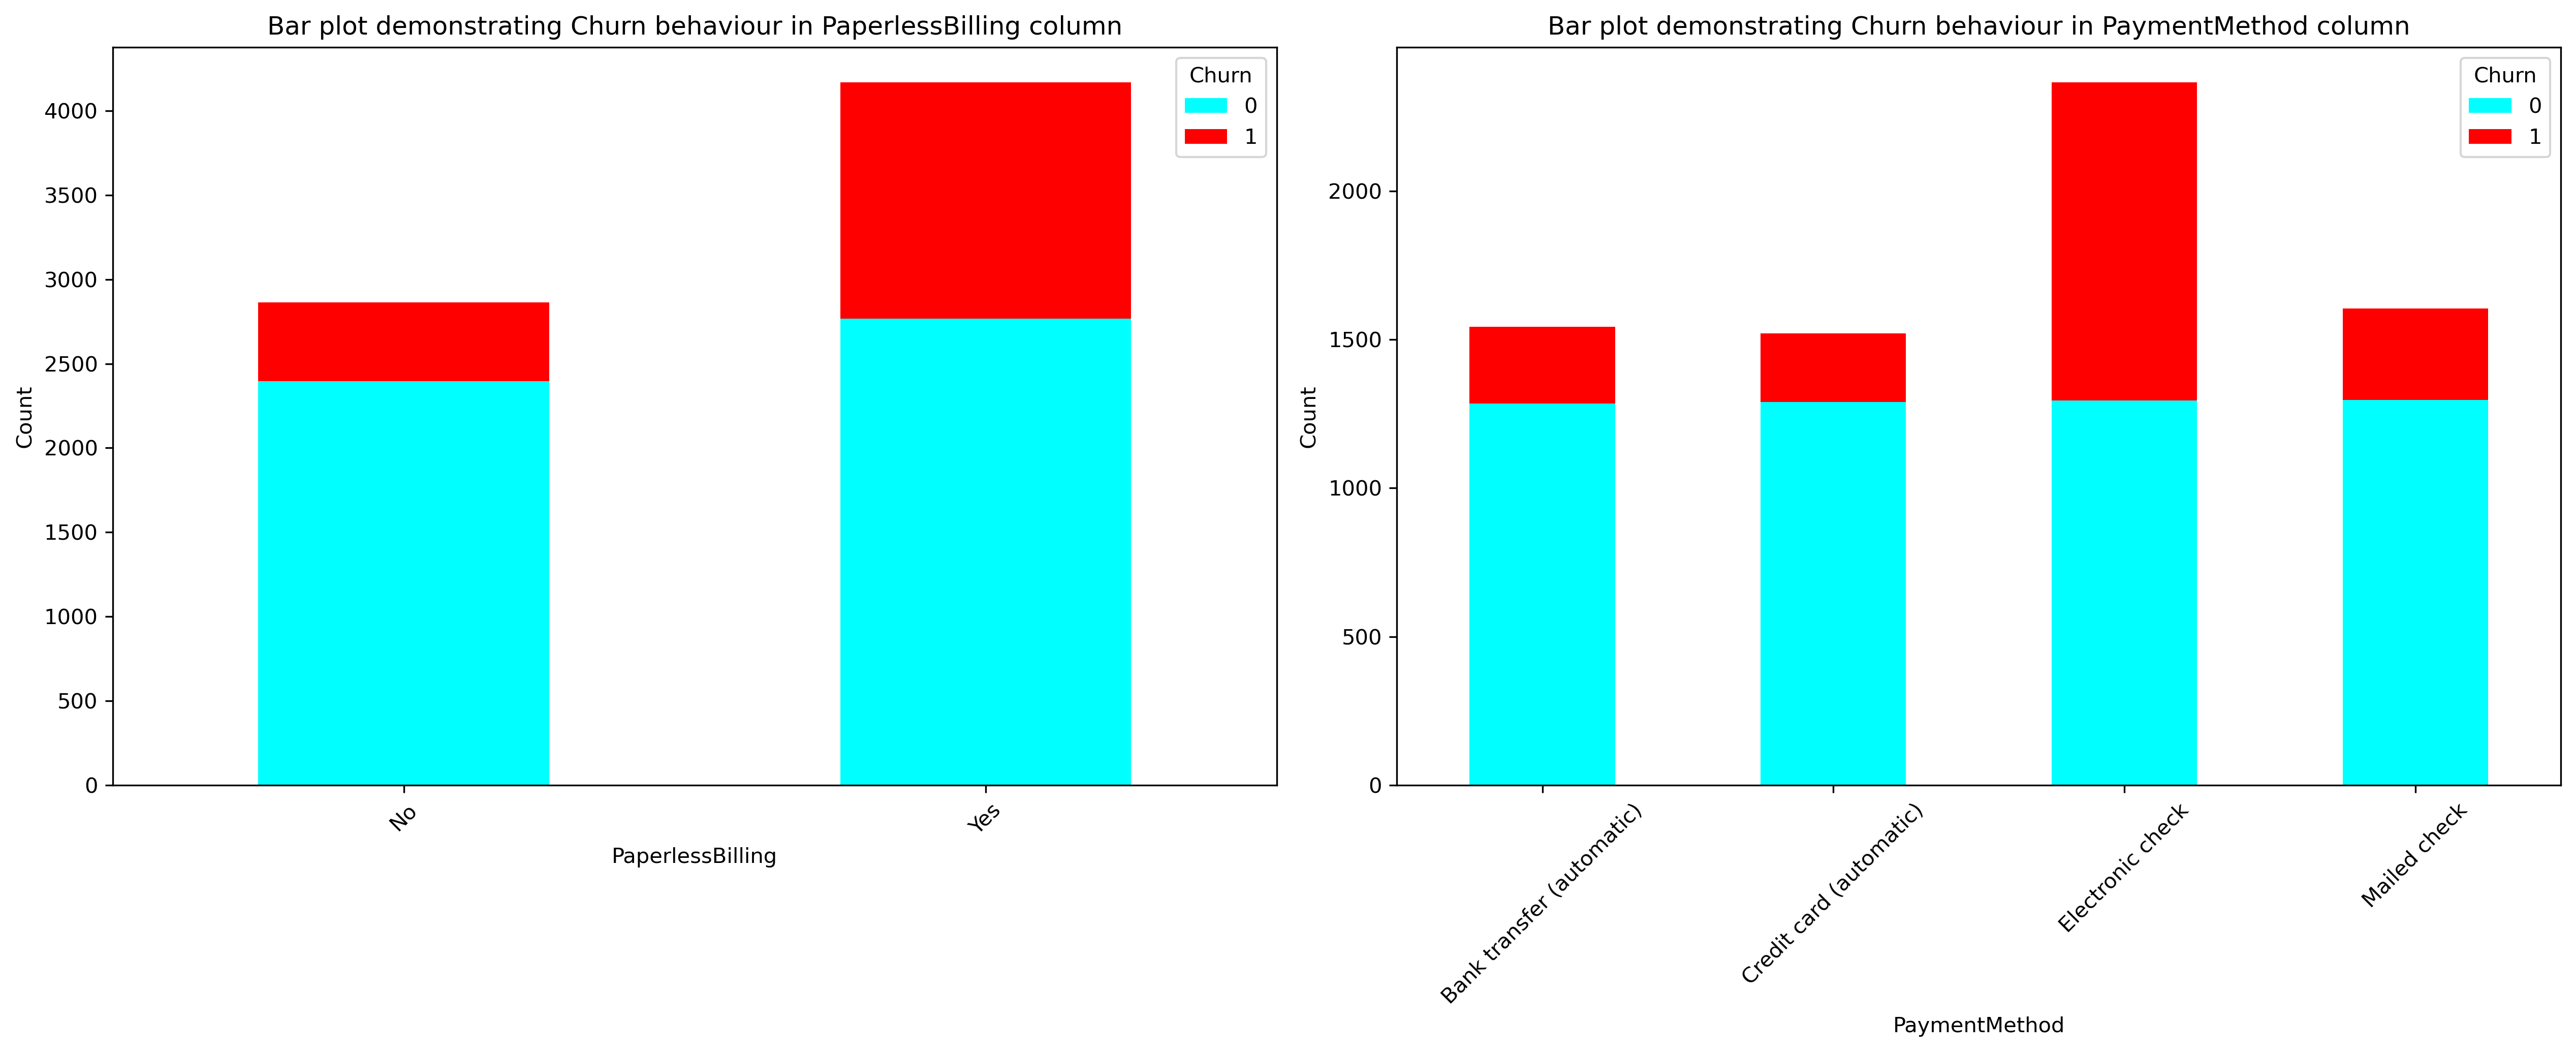

In [73]:
payments = ['PaperlessBilling','PaymentMethod']

fig, axs = plt.subplots(1, 2, figsize=(17, 25))
count = 1

for i, ax in zip(payments, axs.flatten()):
    plt.subplot(1, 2, count)
    capstone_utils.plot_stacked_dist(telco_df, i,figsize = (17,7),ax=ax)
    plt.xticks(rotation = 45)
    count += 1
    
plt.tight_layout()
plt.show()

In [74]:
capstone_utils.churn_percentage(telco_df,'PaperlessBilling')

PaperlessBilling
{'No': 16.4, 'Yes': 33.6}


In [75]:
capstone_utils.churn_percentage(telco_df,'PaymentMethod')

PaymentMethod
{'Bank transfer (automatic)': 16.7, 'Credit card (automatic)': 15.3, 'Electronic check': 45.3}


Given that both the PaperlessBilling and PaymentMethod columns compliment each other, I have decided to study the data of them together. Firstly, looking at the graph on the left, customers who have signed up for paperlessbilling are more likely to churn compared to those who do not. This compliments the graph on the right that demonstrates that customers who pay for the service through electronic check churn at a much higher rate compared to other methods.

Furthermore, the graph on the right demonstrates a very interesting pattern of behaviour. Customers who pay automatically churn less than those who do not. This is because there is less effort involved from the customers end in paying for the services. However, for customers who have electronic check or mailed check - they have to go through the process of looking at their bill each month and sending the correct amount of money. They therefore have more knowledge of how much they are paying and for what - which can mean that they can identify when they are being overpriced etc. Or they don't like the hassle of sending checks each month and this causes them to churn. 

## Conclusions <a id='conc'></a>

To conclude, the length of contract determines how much a customer is likely to churn. The longer the length of the contract the less chance they will churn - month to month contracts will cause the most churn. 

Fiber optic customers are more likely to churn followed by DSL customers - this could be due to a multitude of reasons. Price being the biggest factor as they could be paying a higher price compared to competitors. Furthermore, customers who pay for fiber optic seem to pay for less services provided by Telco. This could be another reason as to why they churn because the services provided by Telco compliment the internet service being provided. 

Lastly, the method of payment seems to have a direct impact on whether a customer churns or not. With customers who have a direct involvement in paying for pills as a opposed to automatically paying each month seems to raise the rate of churn.